## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [17]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [18]:
train, test = keras.datasets.cifar10.load_data()

In [19]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [20]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [21]:

  

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


    """Code Here
    建立你的神經網路
    """

In [22]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.9,0.92,0.94,0.96,0.98,0.99]

In [23]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for mo in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MO = %.6f" % (mo))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=1e-2, nesterov=False, momentum=mo)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-mo-%s" % str(mo)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



Experiment with MO = 0.900000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

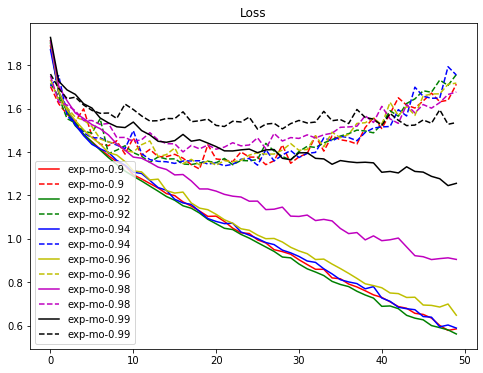

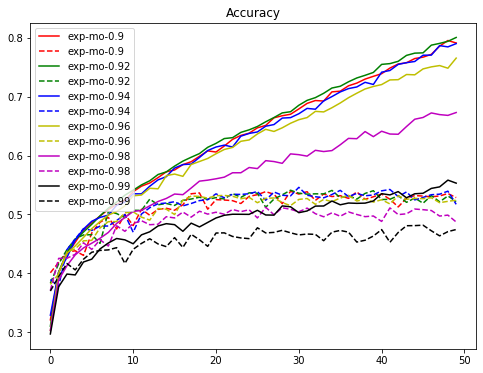

In [24]:

"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
#optimizer = keras.optimizers.SGD(lr=1e-2, nesterov=True, momentum=mo)
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeMAAAF1CAYAAADbSIJmAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjAsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+17YcXAAAgAElEQVR4nOzdd3xN9//A8dfJzd7bJhIJQkiNxKgaQdGWnxgdtq9S1KrdVrXaqg5qtFbtRovaVVWqQkvUqB0zMgSJ7HmT3PH5/XHSFAnSIoPP8/E4j+Tee+7nfM4NeedzzufzfitCCCRJkiRJKj0mpd0BSZIkSXrayWAsSZIkSaVMBmNJkiRJKmUyGEuSJElSKZPBWJIkSZJKmQzGkiRJklTKZDCWJEmSpFImg7EklTGKooQqipKiKIpFafdFkqSSIYOxJJUhiqJ4AK0AAXQtweOaltSxJEkqTAZjSSpb+gOHgVXAgL+fVBTFSlGU2YqiRCuKkqYoyh+Koljlv/asoiiHFEVJVRTlmqIoA/OfD1UUZchtbQxUFOWP2x4LRVFGKopyGbic/9y8/DbSFUU5rihKq9v21yiK8raiKBGKomTkv15NUZSvFUWZfftJKIryo6IoYx/HByRJTyIZjCWpbOkPrM3fnlcUpUL+818AjYEWgDMwCTAqilId+BlYALgB/sDJf3G8/wMCAd/8x0fz23AGvgN+UBTFMv+1t4BXgS6APTAYyAZWA68qimICoCiKKxAEfP9vTlySnmYyGEtSGaEoyrNADWCDEOI4EAG8lh/kBgNjhBDXhRAGIcQhIUQu0Af4VQjxvRBCJ4RIEkL8m2D8iRAiWQihBRBChOS3oRdCzAYsgNr5+w4B3hVCXBSqU/n7HgHSUAMwwCtAqBAi/iE/Ekl6ashgLEllxwBgtxAiMf/xd/nPuQKWqMH5btXu8XxxXbv9gaIo4xVFOZ9/KTwVcMg//oOOtRrom/99X+Dbh+iTJD115KQNSSoD8u//9gY0iqLE5T9tATgClYAcwAs4dddbrwEB92g2C7C+7XHFIvYpKNuWf394MuoI95wQwqgoSgqg3HYsL+BsEe2EAGcVRWkI1AW23qNPkiQVQY6MJals+D/AgHrv1j9/qwv8jnofeQUwR1GUyvkTqZrnL31aC7RXFKW3oiimiqK4KIrin9/mSSBYURRrRVFqAf97QB/sAD2QAJgqivIe6r3hvy0DPlQUxVtRNVAUxQVACBGLer/5W2DT35e9JUkqHhmMJalsGACsFELECCHi/t6Ar1DvC08BzqAGvGTgU8BECBGDOqFqfP7zJ4GG+W1+CeQB8aiXkdc+oA+/oE4GuwREo47Gb7+MPQfYAOwG0oHlgNVtr68G/JCXqCXpX1OEEA/eS5Ik6QEURXkO9XK1hxDCWNr9kaTyRI6MJUl6aIqimAFjgGUyEEvSvyeDsSRJD0VRlLpAKupEs7ml3B1JKpfkZWpJkiRJKmVyZCxJkiRJpUwGY0mSJEkqZaWW9MPV1VV4eHiU1uElSZIkqUQdP348UQjhVtRrpRaMPTw8OHbsWGkdXpIkSZJKlKIo0fd6TV6mliRJkqRSJoOxJEmSJJUyGYwlSZIkqZSVqapNOp2O2NhYcnJySrsrTzVLS0uqVq2KmZlZaXdFkiTpqVCmgnFsbCx2dnZ4eHigKMqD3yA9ckIIkpKSiI2NpWbNmqXdHUmSpKdCmbpMnZOTg4uLiwzEpUhRFFxcXOTVCUmSpBJUpoIxIANxGSB/BpIkSSWrzAVj6cGOHz+On58ftWrVYvTo0RSVXzwlJYXu3bvToEEDAgICOHv2bCn0VJIkSSoOGYzLoeHDh7N06VIuX77M5cuX2bVrV6F9Zs6cib+/P6dPn2bNmjWMGTOmFHoqSZIkFYcMxkUICQkhICAAf39/hg0bRnR0NN7e3iQmJmI0GmnVqhW7d+8mKiqKOnXqMGDAABo0aEDPnj3Jzs4u1F5oaCitW7emd+/e+Pj4MGXKFNauXUtAQAB+fn5EREQAEB0dTVBQEA0aNCAoKIiYmJhCbd28eZP09HSaN2+Ooij079+frVu3FtovPDycoKAgAOrUqUNUVBTx8fGP+JOSJEmSHoUyNZv6DmPHwsmTj7ZNf3+Ye/9yq+fPn2f9+vUcPHgQMzMzRowYwf79+5k8eTJvvPEGgYGB+Pr60rFjR6Kiorh48SLLly+nZcuWDB48mIULFzJhwoRC7Z46dYrz58/j7OyMp6cnQ4YM4ciRI8ybN48FCxYwd+5c3nzzTfr378+AAQNYsWIFo0ePLhRor1+/TtWqVQseV61alevXrxc6XsOGDdm8eTPPPvssR44cITo6mtjYWCpUqPAfPzxJkiTpcSm7wbiU7N27l+PHj9O0aVMAtFot7u7uvP/++/zwww8sXryYk7f9kVCtWjVatmwJQN++fZk/f36Rwbhp06ZUqlQJAC8vLzp27AiAn58f+/btAyAsLIzNmzcD0K9fPyZNmlSonaLuDxc14WrKlCmMGTMGf39//Pz8eOaZZzA1lT9uSZIkUH+X6ow6tDotWr0WrU5Ljj6n4HutXosQgg5eHUqkP2X3t/MDRrCPixCCAQMG8Mknn9zxfHZ2NrGxsQBkZmZiZ2cHFA6EiqLw559/MmzYMABmzJiBvb09FhYWBfuYmJgUPDYxMUGv1xfZF0VRMBgMNG7cGICuXbsyfPjwgn6Auja7cuXKhd5rb2/PypUrC86pZs2act2wJElPNKMRwsJg0ybYvRtsbaF69Tu3ipXzOJTxPQvOfEBUShRkVYC0apBeLf9r1YLvNYo5+sJ3Cx+LshuMS0lQUBDdunVj3LhxuLu7k5ycTEZGBl988QV9+vShRo0avP766+zYsQOAmJgYwsLCaN68Od9//z3PPvssgYGBd4yeQ0NDi3XsFi1asG7dOvr168fatWt59tln0Wg0d7QFYGdnx+HDhwkMDGTNmjWMGjWqUFupqalYW1tjbm7OsmXLeO6557C3t//vH4wkSVIZpNfD77+rAXjzZrh5E8zNoU0bNTifOgU//gj/pE4wBwZgYv4yGqMZBr3mjvbMLQy4VcqhQnUdVavpEQJKYrWnDMZ38fX15aOPPqJjx44YjUbMzMyYM2cOR48e5eDBg2g0GjZt2sTKlStp27YtdevWZfXq1QwbNgxvb2+GDx/+n489f/58Bg8ezOeff46bm1vByPZuixYtYuDAgWi1Wjp37kznzp0BWLx4MQBvvPEG58+fp3///mg0Gnx9fVm+fPl/7pckSVJZYjDA3r2wcSNs2QKJiWBlBZ07Q8+e8MIL8PfYI1uXzZJjS/l0zzLir5tT17wTbZz6Y5VVG3NzhWrVoFo1qFpV/eriokFRbDAYssjKuoyiuJbIOSlF3YMsCU2aNBF31zM+f/48devWLZX+/BdRUVG8+OKLT+Qa3vL2s5Ak6elw+TIMGgQHD4KdHbz4IvToAZ06gY3NP/tl5mWy6Ogivgj7gltZt2jr0Zb3Wr9H6xqt75nYKC8vkaSkH0lM3EJK4i5M8hRatM/ARGP+SPquKMpxIUSTol6TI2NJkiSpzDMa4auvYMoUMLcwMuKj49RufYJ04y3+yE5i2+4kkrRJJGWrX29k3CBbl00Hzw5Me24arWq0KrJdrTaKxMStJCZuJS3td8CIRboVlfbocE2ph9IsCxweTTC+HxmMH4KHh8cTOSqWJEkqS65eVUfDBw6AZ8B54tt1Y6H+MuxVX7c1t8XFygUXaxdcrFyo6VQTN2s3XvN7jWZVm93Rlk6XQnr6YdLSDpKc/BOZmeqcHBub+tTI6IbrB3uxPZuD8vEXMHcsaDR3d+exkMFYkiRJKpOMRliyBCZMNKITuWi6jyay4Qpeqf8ybwasoqZjTZytnLEwtSjy/UIYyco6T3r6IdLSDpGeHkZ29vn8VzXY2wfi6fk5riatsB7zmToDLDAQTq6COnVK7DxBBmNJkiSpDIqOht590znyhz147cG8+0iGtunIhBaX8XTyvOf7jMZcEhO3Eh8fQlraH+j1qQCYmjpjb9+cChX6Ym/fAnv7pmg0NrBhA4x8EdLT4dNP4a23oBRyMshgLEmSJJUIIdQJWHv3QlKSuizp702n++f7a8m32LnVBoNRwbL7GMaOsGFss4NUsL13BsGsrHBu3lxGXNwa9PokLCyq4+bWC3v7Fjg4NMfKyuefiVtCwPXr8NYg+OEHaNIEVq8GX98S+iQKk8FYkiRJemxSUtTgu3u3ukVH3/m6RqMORNVNkEcWWoMBc4/DTPjwMlNfnIGDpUORbRsMWdy69QM3b35DevohFMUMV9duVKo4BKeblVAuRUNsLMSuyf9625adDWZm8PHHMGlSqYyGbyeDcTl0/PjxgnXGXbp0Yd68eYWm6qekpDB48GAiIiKwtLRkxYoV1K9fv5R6LEnS00IIOHwYdu2CX36Bo0fVe7/29tCuHUyeDB07qtmwNBowyS9XFHYtjIHbBnIp6RLDmwzn0/afYmcRVKh9ozGX1NTfSUzcRHz8dxgM6VhZ1cbT41MqRnljvjQUtg6F2wvtaDRQubK6mNjfX10PVaWKujC5jCzhlMG4HPq7hGKzZs3o0qULu3btKkj88be/Syhu2bKFCxcuMHLkSPbu3VtKPZYk6WmQnAzDhqnJOExMICAA3n1XDb4BAepA9G5anZb39r3HnMNzqGpflV/7/UqQ551BODv7CsnJu0hO3kVq6j6MxmxMTCxxcw6mUnR9HFZfRPnxM/Xat4WFesD33gM/PzUAV6hQYrOi/ysZjIsQEhLC/PnzycvLIzAwkLfffpv27dsTFhaGs7MzrVu3Ztq0afj4+NCpUycCAwM5ceIEPj4+rFmzBmtr6zvaCw0NZfr06VSoUIGTJ08SHByMn58f8+bNQ6vVsnXrVry8vIiOjmbw4MEkJCQUZOCqXr36HW3dXkIRKCiheHcwDg8PZ+rUqcCdJRRl1SZJkh6HvXthwAC4dQtmzlSDsrNz4f2EECQkbCIv7zrRaXEsObGayNSbTGvSmdebjsLOwoGsrHC02qsFATgnRy0za2VVi0qVBuOU5oPj7L2Y/rgNsr4DBwd1tNu9Ozz/vJqUupwp28G4TZvCz/XuDSNGqNf7u3Qp/PrAgeqWmKjmRbtdMXJEyxKKkiRJxZebC++8A7NnQ+3asH07NGpU9L5GYy4XLw4jPn51wXODqwJVAX7m8rmf79jfxMQaJ6d2VKs2Dien57G28oJly2D0aDXdVv/+agBu3VpNSF2Ole1gXApkCUVJkqTiOXcOXnsNTp9Wx0iffw53XRgskJeXwF+nXiAn6yjb4pxYHpHCwAav8s6zE7Ax02AwZGM0ZmMwaDEaszEzc8XBoSUmJvlriDMzoV8/WLsWOnSAkBBwdy+5k33MyvZv5/uNZK2t7/+6q2uxRsJ3kyUUJUmS7u/v1JSTJqlXiHfsUIszFCVHn8NP575Ck/AeVoqWTy+CzqoeP7z8Ls/Xer54Bzx7Fnr1gosXYcYMePvtMn8P+N8q28G4FMgSipIkSfd286aamvKXX9QAvHy5Oj/qdkIIjt88zsoTK7l4bQ3jamWSJ0w4ZTKIJS9PxdvFu/gHXLkSRo5Up2P/+qs6JfsJJIPxXWQJRUmSpKL98AO88QZotbBwofr97RcHE7ISCDkdwoqTKzh76yyvVDfl7doGMK9F20a/0t2qRvEPlpWlBuHVq6FtW/juO6hY8dGfVBkhSyg+BFlCUZKkp0FKCrz5phoPmzaFNWv+Sd2sN+rZHbGb5SeW8+PFH9EZdTSv0oRJdSxx1P+Bq2swdeuuUVNPFkduLhw6pB7w/HmYNk1dpvQEXJaWJRQlSZKk/2TPHvWydHw8fPCBervW1BSuJF9hxYkVrD61mhsZN/BxcOb9Zt3pWN0XTfZe0tJ+p3r1d6hZcwaKYnLvA2RlQViYWpLpwAE1Y0hurjo5a/duaN++5E62FMlg/BBkCUVJkp5UWVlqtqyvv1aTVG3dqqZw/j1iIz/89S6Z2RepZgVz6tvjbmGJIpKBDWTeBI3Gljp1vqVixb6FG05Phz/+gP371eB77JiakNrERF0TNXIkPPecurTVoeg0mE8iGYwlSZKkOxw+rC7hvXwZxo2D6dNvkpHxA7/8vgALwxWC3UBggrlFdexs6mJl5YO1tTdWVj5YWXljaVkNRcm/rJydrV52/u032LdPzY9pMKjpuAICYOJEdZ1w8+bqJK2nlAzGkiRJEnl56oB10yZYvBjq1Enkt9824eS0jhMn9gOCa5kQrfdkRKtvqeDUBBOTIhJtGI1w8JCakuu339TInpenXtsOCICpU9UJWc2bg5VViZ9nWSWDsSRJ0lMqPh527oSfflJvz2ZlGQgK2siaNauoUmUPYCAn14fj2nrMP3uWIJ9BLH5pMeaaIoJwaiqsWqVe175yRZ1m3agRjBmjLkd69tkylaYyJzoHbaQWEzMTFDOlYLv9sYm5CeYVSiazlwzGkiRJT4mcHDh1Sq2o9NNP6hVjgCpVjEycuJkWLaaj0YRjaemBu/tEzOyf57Uf3+WPmIPMbDeTKc9OKZzx7+xZNQB/+616o7lFC3j/fTVdsZNTiZ/jgxjzjMTMiiH6o2iE7v6riTQOGlqltiqRfslgXA49TAnFa9eu0b9/f+Li4jAxMWHo0KGMGTOmlM5EkqTHQQi4cUMNvKdPq19PnYJLl9TbtYoCzZrBRx8JOnbcDkwnK+sU1tZ18fBYj5tbTy4nX6Hj2i7Epseyrsc6Xq7/8j8H0Oth2zY1DVdoKFhaqnkxR468d2LqMiD9WDoXB18k60wW7q+6U2lIJYReIHQCo86I0ImCzagzomgKpxp+bIQQpbI1btxY3C08PLzQc1JhTZs2FYcOHRJGo1F06tRJ7Ny5s9A+EyZMEO+//74QQojz58+Ldu3aCSGEuHHjhjh+/LgQQoj09HTh7e0tzp07V+j98mchSeVPWJgQ7dsL4eIihBqS1a1GDSG6dhVi2jQhfvhBiPh4o0hM/EkcPdpY7NuHOHy4loiLCxFGo14IIcT+qP3CaZaTcP3MVRyMOfjPAbKzhZgzR4iqVf9p+NNPhUhMLJXzLS59tl5cmXRF7DPZJw5WPigStieUSj+AY+IeMfE+i7+eXiEhIQQEBODv78+wYcOIjo7G29ubxMREjEYjrVq1Yvfu3URFRVGnTh0GDBhAgwYN6NmzJ9nZ2YXaCw0NpXXr1vTu3RsfHx+mTJnC2rVrCQgIwM/Pj4gItTxYdHQ0QUFBNGjQgKCgIGJuL46d7/YSioqiFJRQvFt4eDhBQWpN0NtLKFaqVIlG+X+52tnZUbdu3SKrPkmSVL78/LN6a/bCBQgOVgetBw6ot3KjotSB7AcfCHwD1nDuSn3OnHmBtOxrpNoMJdxsMptj0pl7eD5Tf51K+zXtqWBbgT+H/EmLai3UCViLFkGtWvDWW+DtrTYYEaEmqHZxKe3Tv6fUP1I55n+Ma59do9LgSjQ91xTXl1xLu1uFlNnL1GN3jeVk3MkH7/gv+Ff0Z26nuffd52kqoRgVFcWJEycIDAz8tx+lJEllyHffqbWE/fzU+8F3FzPKy0skPn41V2PmI3Qx3MqBkBjYFXcLvVgKLL1j/w6eHVjfcz1OZnZqbugPPoDoaHUS1tq1RZe3LWP0mXoip0Zy/evrWNawpMGeBji3L6LAchlRZoNxaXlaSihmZmbSo0cP5s6dKwtISFI5tmCBWt63dWu1lvDf/52FEKSmhnLz5lISEjYjRB5ROXbsvGnPG63X8259Jz4ytcTyrs3C1AJLE3NYvx6mT1cXGzdpAkuWQMeOdyajLqPSj6YT3jucnOgcqoyqQs2Pa2JqW7bDXZnt3YNGsI+LeApKKOp0Onr06EGfPn0IDg4u5icjSVJZIoQ6aXnGDPi//4Pvv1fnUeXlJRAXt5qbN5ei1V7G1NSRypWHcyqrKoO2TWTZS8to59np3o1u26bmgz57Vh1qb90KXbuWiyAMcHPlTS4Nv4R5RXOe+f0ZHFqWjyxexQrGiqJ0AuYBGmCZEGLWXa9XB1YDjvn7TBFC7HzEfS0RT3oJRSEE//vf/6hbty5vvfXWf/+gJEkqNQYDjBoFq1ZlMHnyaUaMOEl09EkyM0+SmXkKIXQ4ODxLjRrv4ebWA51Q6PBVHfwr+jPQf2DRje7fD1OmqEk6fHxg3Tq1hrBJ+ZhaZMwzcmXsFW4suoFjkCO+63wxdy2ZNcKPwgODsaLmNPsa6ADEAkcVRdkuhAi/bbd3gQ1CiEWKovgCOwGPx9Dfx+5JL6F48OBBvv32W/z8/PD39wdg5syZdOnS5T/3W5KkkpGVFU58/Fb27TtJixYn6N37CgBXr4KpqQu2tv5UqzaeChX6YWPjW/C+z37/hOi0aFZ2W4nG5K7qR6dPq1mxdu6EKlVg2TL1BrRpmb1wWkjuzVzO9TxH+qF0qk2sRs2ZNTExLR9/RPztgSUUFUVpDrwvhHg+//FUACHEJ7ftswS4KoT4NH//2UKIFvdrV5ZQLNvK289Ckp5kBkMO0dEfcu3aZwih5/p1L6ys/GnUyB9bW3WzsKhS5PyRuMw4vBd4096zPVte3vLPC1FRamnCkBC1IMPUqepwuwRTVOoz9eRdzyP3ei65sbnq1/zvTe1Nce7ijHMnZ8wcze7ZRtqhNM71PIc+TU+dFXVwf9n9nvuWtoctoVgFuHbb41jg7um37wO7FUUZBdgARda8UhRlKDAUoHr16sU4tCRJ0tNLCDhxYh+3bg3D0vIyv+zpx5LFn/LZZ+706VO8+r7v/vYuufpcPu/wufpEQgJ8/LG6VMnERC3UMGXKY8+WlXszl7Tf09TtUBraCC2GNEOh/UwdTTGvYo4uXkf8t/GgAcdWjri86ILLSy5Y+1gD6lyYG4tvcGXMFSyqW9Dol0bY+pWddJv/VnGCcVF37e8eTr8KrBJCzM4fGX+rKEp9IYTxjjeJf+bQN2nS5P5D8nJAllCUJOlRi45Wayz8/nsy1atPpG3bFSQlefHlstUcz8yGbr3YbV+ZAYa1mGnuPWIEOBl3khUnVjCu2ThqOXqqAXjKFMjMhMGD1dnSty2VfFSEEGgjtP8E39/T0F7RAmBibYJ9M3sq9quIeRVzLKpaYFHFQv1a2QKNjfpHhjAI0o+kk7QjiaQdSURMiCBiQgRW3la4vOiCLklH/Jp4nDs7U3dtXcyc7v9ZlHXFCcaxQLXbHlcFbty1z/+ATgBCiDBFUSwBV+DWo+ikJEnSk8xohB9+UAesZ84I2rbdwOjRo7GzT2LryQAWx16n7ZDvOdPhc3ZHZDN+93j0Rj3req4rumgDakB865e3cLZyZlqFXmqN4IMHIShIXQ/1iG9DGXVGUvelkrApgaQdSeTdyAPA1NkUh2cdqDSsEo6tHLFtZIuJ2YPv5yoaBYfmDjg0d8DzY09yonNI+kkNzNcXXkfkCmq8WwOP9z1KNm3lY1KcYHwU8FYUpSZwHXgFeO2ufWKAIGCVoih1AUsg4VF2VJIk6UljNKorh6ZPV1cStWwZw9atI3Bw+IlrOTZM+MuAjW0O24evoKOXmpugvnt9TE1MGbNrDL1+6MWGnhuwMLUo1Pb2i9vZF7WPr0RnHAOeAzs7tapS//6PbJmSIcdAyp4UNQBvT0KfosfExgSXLi44tnPEsZUj1nWtUUwe/niWNSypMqIKVUZUwZBlQJekw7K65SM4i7LhgcFYCKFXFOVN4BfUZUsrhBDnFEWZgZpnczswHvhGUZRxqJewB4oHzQyTJEl6SgkBO3ao86fOnNHRvfsuPv98JZZWO9AZjXx9BcLS7PgwaAH9G/YvNAN6dOBoTE1MGblzJMEbgtnUexOWpv8EpjxDHhO2v4lvmjnD5v0ML78Kc+cWTs31HxiyDCT9nETipkSSdiRhyDRg6miKS1cX3ILdcOrohMaqePez/yuNjabgcvaTolhz1/PXDO+867n3bvs+HGj5aLsmSZL0ZBECfvlFDcIJCWd55ZVVfPFFCBpNPDps2RRr5Kc4cwY2mcKq5uOxMbe5Z1sjmo7A1MSUYTuG0X19dzb33oyVmRWkpfHVh124YhfLz4fdMN2xGvKXP/5X+jQ9STuSSNiUQPKuZIxaI2ZuZri/6o5bDzcc2zpiYl6+lhKVNeVnIZlUQJZQlKTy59AhmD49GVvb73njjVV4eh5DUUyxtGvLssvXWXkxnBd8uvLH0EVUtiucVa8oQxsPxdTElCHbh9B14bNsuxVE9rpvmdE7jk66GnTafRZs/9sMY12SjsTtiSRsSiBlTwoiT2Be2ZxK/6uEaw9XHJ51KHdrecsyGYzLoeHDh7N06VKaNWtGly5d2LVrV0Hij7/NnDkTf39/tmzZwoULFxg5ciR79+7F1NSU2bNn06hRIzIyMmjcuDEdOnTA19f3HkeTJOlhREbCp5+GY2c3h4kTQzA3z8XaugGVKs1hV5yecbs+wNTElBXdVtOvQb8i1woXotPB0aPw228M/u03NBkaBr3wFy9e/4ua7SuQaaVh9vCdxQ7EhmwD2qtatFe0aC9rSdmdQsq+FDCARQ0LqrxZBbeebtgH2j+S+79SYTIYFyEkJIT58+eTl5dHYGAgb7/9Nu3btycsLAxnZ2dat27NtGnT8PHxoVOnTgQGBnLixAl8fHxYs2YN1tbWd7QXGhrK9OnTqVChAidPniQ4OBg/Pz/mzZuHVqtl69ateHl5ER0dzeDBg0lISCjIwHX3euzbSygCBSUU7w7G4eHhTJ06FShcQvHvghW3l1CUwViSHq3UVMHSpb8Bs3nllZ8xGCypWHEg1asPI9Xoyv+2/489V/fQwbMDy7sup5pDtfs3qNOp5Zk2bFBrI2Zmqs/7+zOg3WhMPRX6m3zJPhHPiMYj8HUr+v908u5kMo5nqIE3Qg3Aedfz7tjHytuK6pOq49bDDdtGtsX7A0F6KGU6GLdZ1abQc73r9WZE0xFk67LpsrZwCseB/gMZ6D+QxOxEem7oecdroQNDH3hMWUJRkqSHkZeXx8aN68jLm0NAwCm0WnecnWdQp85wzMxcWH1qNWN2jcFgNLD4hcUMbTz0/sFOq4UVK+CzzyAmBry8oG9fdZkFoWsAACAASURBVIlSmzbgqtbm7QOYnwtkyfElfND2gyKbujb7GhET1PrpZhXMsKplhVN7J6xqWf2zeVmV+zW75VGZDsalQZZQlCTpv9DpUgkNXUxW1gIqV77BrVu+WFoup1Wr19ALhX1RoXx19Ct2XNrBczWeY2W3lXg6ed67wYwMNUnHnDkQHw8tWqiPO3e+59KkXvV60ateryJfi/8unogJEbj1cqP28tqY2slf/2VJmf5p3G8ka21mfd/XXa1dizUSvpssoShJ0r+RlJRAaOhcrK2/wsoqnRs32mNmtpzWnRuxK+JnvtjUl18ifiEzLxMbMxvmdJzDmGZjMFHuMfkpKQnmz1e31FTo0AHeeUdN2vEfLxcn70nmwsALOLZxpM6aOmgsn6xlQU+CMh2MS4MsoShJ0oMIAYcP3+TEiS/w9FyMk5OWU6d6ojN7HV29k6yN/JCwOWEIBJXtKtPHrw8v+bxEu5rt1OVHRUlJgU8+gYULIStLLVL89tuQf5Xuv8r4K4NzweewrmtN/a31ZSAuo2QwvossoShJ0r0kJ8O6ddEkJn5Gs2bLqV1bT3T0a5i4B7PZYQ5/XOsIB6BRpUa81/o9XvJ5iUaVGt3/nnBennr5ecYMNSC/+qpaQal+/Yfur/aqltNdTmPqbEqDnxtg6iB/5ZdVDyyh+LjIEoplW3n7WUjS4yKEukY4JCQCR8eZBAWtARSysgbiXieYWScWsf3idiraVmRyy8n09O1JVftiFF8QArZtg0mT4PJldULW7NnQsOEj6XferTxOtDyBLlnHMwefwabOvROISCXjYUsoSpIkPXUyMtRSv998k4uf36f07fsxJiYmWFsPx93rVT48tIQ167pgZ2HHx+0+ZkzgmPtmzLrD8eMwfjzs368WbNixA7p0eWQ5o/WZes68eIbc67k03NtQBuJyQAbjhyBLKErSk+fMGfWq8bffgpfXfqZOHUaFChdxdn4Ft+rv8Nnh5Sxc2gYFhfHNxzPl2Sm4WLsUr/Fr19TJWN9+qy5JWrgQXn8dTB/dr2Kjzkh4r3AyjmdQf2t9HJo7PLK2pcdHBmNJkp56QsCmTTBvHvzxB7i6JjF79kR8fFZiaVkTr1o7WHUxnA8XtSBLl8Ug/0FMbz39wYk6/padra4T/uwztVTT5MnqfWGHhwuUQgiEXmDMNSJyBcY8I1enXiV5VzI+3/jg+pLrQ7UvlRwZjCVJeqoZDDBmDHz9NXh5CVas+JZatcZjNKZSrdoUzJz/R+9trxMaFUrX2l2ZFTSLum7FnE8hBGzcCBMmqAk7eveGTz8FD49Cu2ZfyiZpRxK513MxZBruuRmzjRjzjGoAzhNqnby7eMzwoPKQ4uW3lsoGGYwlSXpqZWfDa6+p86imT7/E//3fcFJTf8PGpjk+Pkv4NTaC/y0NJFefy6puq+jfsH/xU0OePg2jR6v3hRs2hDVroHXrgpeFUZB+JJ3ErYkkbUsi+0I2ACY2JmhsNXdspk6mWFSzUB9baVAsFEwsTDCxMEExv/N7i6oWuLxQzMvmUpkhg7EkSU+lxER46SVISTnGli1f4uS0gYwMG7y9F+Hk1o/xuyew+PhiGldqzHc9vsPHxad4DSclwbRpsGQJODqqN6Bffx00Ggw5BlL3ppK4LZGkH5PIi8tDMVVwbONI5ZGVce3qimV1ywcfQ3riyGBcDj1MCcW/GQwGmjRpQpUqVQoSmEjS0+LKFT3vvruVvn3nUq/eQTQaOypVepNq1SZxKTWR55cFci7hHBOaT+DjoI8x15g/uFG9Xg3A06ZBejqMGAEffADOzuiSdFz7IprrX1/HkGFAY6vBuYszrt1cce7ijJmjzAX9tJPBuBx6mBKKf5s3bx5169YlPT29pLsvSaVGr0/jzz+Xcf36At54IxqoiZfXl1SqNBiNxo6vj37NhN0TcLR05Je+v9DRq+ODG718WS3ksHo13LwJ7dqpM8Hq10eXrOPaO1e5Pv86hiwDbr3dqDiwIk5tnTCxkLWApX/Ifw1FCAkJISAgAH9/f4YNG0Z0dDTe3t4kJiZiNBpp1aoVu3fvJioqijp16jBgwAAaNGhAz549yc7OLtReaGgorVu3pnfv3vj4+DBlyhTWrl1LQEAAfn5+RESoVVSio6MJCgqiQYMGBAUFERMTU6it20soKopSUELxbuHh4QQFBQF3llAENZ/1Tz/9xJAhQx7lxyZJZZZOl8Tly6P5/feq6HQTSEmpgZPTZlq3vky1amO5knqDl75/iVE/jyLIM4jTw0/fPxBrteoi5DZtwMdHnSXduLG6XvjXX9FVqU3ktEgOexwm5pMYnLs40/RMU+qtq4dLJxcZiKVCyuzIeOxYuCsl80Pz94e5c++/z9NQQnHs2LF89tlnZGRk/LcPUpLKkezsS5w58wLZ2VHs2fMq586NZenSRlSoABcTLzLjwAy+P/M91mbWzH1+LqMDR997ktZff8GyZWpd4bQ0tZzhzJkwYABUrowuVUfsB1HEfhmLId2AW083akyvgW1925I9aancKbPBuLQ86SUUd+zYgbu7O40bNy52AQtJKq9SUvZz8mR3tFoNkybtp0aNFqxfDzdzLzNhywy+O/MdlqaWTGwxkQktJuBm41a4kdhY+P57dSR8+jRYWkKPHjBkiFpJycQEIQQ3l9zg6pSr6FP1uHZ3xeN9D2wbyCAsFU+ZDcYPGsE+Lk96CcV169axfft2du7cSU5ODunp6fTt25eQkJDif0iSVMbp9bBz5xqsrYdw/boXs2f/RL9+nnQbdIWRv35IyOkQLDQWvNXsLSa2nIi7jfudDaSlqVlAQkIgNFRdLxwYCF99BX36qLOk/z5Whp5LQy9xa90tHIMc8frCCzt/u5I9YancK7PBuLQ86SUUP/nkk4I/NEJDQ/niiy9kIJaeGNnZsGqVkYiI6bz00kdcuNAOc/ONLP8xloUnB/HO4m8x05gxNnAsk1pOooJthX/enJcHP/+sBuAff4TcXKhVC6ZPVxcje3sXOl7mqUzO9TqHNkJLzZk1qT65OorJo8kvLT1dZDC+y5NeQlGSnkTJyeqgdfHiHIYMGchLL60nWzsATePmLDnViSOrjmBpasmogFFMfnYyFW0r3tnAgQPw8ssQFwdubjB0KPTtq9YSLuI2kBCCm8tucmX0FUydTPHf54/jc46F9pOk4pIlFB+CLKEoSaXLYIBvvlFrLxgMCSxc2I3KlcM4mRvIe3+dIyMvE183X15v9Dr9GvQruqDDN9+oa4K9vGDOHOjQAczuve5Xn6nn0huXuLX2Fk4dnKgbUhdz92KsQ5aeerKEoiRJT5ywMMHEiSnExcXQs9cluvUchZlJAtPPwZHUU7xc72Veb/Q6Laq1KHp2tF6vljGcPx+efx7WrbvjXnBRMs/kX5a+rMVjhgc13q6BopGXpaWHJ4PxQ5AlFCWpZKSm7ict7RA5OdFkZMQQGxuNuXkMH32UWbBPch4sjq1F76Zj2dagD46W9wmsKSnqZek9e2DcOHSTP+bmkgR0KUn3fItRa+TmNzfR2Gto+GtDnNo6PcpTlJ5yMhhLklRmCSGIiZlJZOS7AOj1LkRHVycuzgeDrQ8XrHdzIy8b30pt6dfkXbZ1aPvgQg4XL0LXrhAZif6rFcQmteWa9zEMGQYUi/u/16mtE7VX1saiosV995Okf0sGY0mSyiSjUcelS8OJi1uOorzGxImLOHrUnooNThP/3CuYul9hQM0BLGkxgdqutYvX6O7d0Ls3BlMbbgz9lZj3NegSo3ANdqXmjJrY1LN5vCclSfcgg7EkSWWOXp/OuXO9SEnZzcmT7zJu3AwsXW5B74FkNNzD+CZvMLbZWKrYVyleg0LA/PkYx00krvIgogx9yfvagFNHB2p+VBP7pvaP94Qk6QFkMJYkqUzJyYnl9OkXyMo6x1dfLWXr9oHQ6mNsn/+Gac8NY3iT5ThZ/Yv7tUeOICZP5VYoRNmsR3vdCfvmNtT9viZObeR9X6lskMG4HJIlFKUnVWbmKY4de4GcnHSmTdvJqXQzlBENmfJSN6a1Po+1mXXxG7twAf3kD4jbriPW5HVyqIiNlw31P66JywsuD763LEklSAbjckiWUJSeRFev/kJERE9SUx1475PtXPBeQGCHG3zz0nr8KvgVv6HYWLTjZ3N9g46b9MOANfYBNniOr4FbsJvMkCWVSbKOVxFkCUVJKjkxMRmEhCwmMvIFomO8eHP1QK7/36t8PSGIg4P/KHYgFklJpL46i7M11vDnhpe4bhKMS49KNDrSiEZhTXHv6S4DsVRmlemRcZs2hZ/r3VtNlpOdDV26FH594EB1S0yEnj3vfK04KaJlCUVJevRyc2+g1V4hPf0qUVERJCRcRaeLwMrqKg4OCVStCsfONuO9K0l07n+e+Z2OFWtylhCCrD0RpHzxG/F7Tck0NsPUIofqQ5yo8rYvFpXlEiSpfCjTwbg0yBKKkvTo5OZe56+/hpKbu7PgOYNBQ25udVJTPck1dCYmN5Oj2ae4ZnuNdcMX0rV21/u2qb2qJWVPEqnfnSflcB66PBvABxv7BHzG2VBhcis0VprHfGZSaUlOTmb8+PFs3bqV9u3b88orr9ClSxesrKxKu2sPpUwH4/vFCmvr+7/u6lq8kfDdZAlFSXp4Qgji40M4f340ubl5bNjwIYoSSI0anjRsWA2N1yF+uPABoVFrcLZyZtRzoxjffDx2FoVLDwqjIHF7Ikk7kkjdnUjONfX/izlpOFuex/ElF5ymPI9lizYlfJZSSdu0aRMjR44kMTGRbt26ceDAATZu3IitrS3dunXjlVdeoWPHjpibF50rPDMzk/DwcM6ePcvZs2dJS0sD1N+1f2+3P7axsWH27Nklcm5lOhiXBllCUZIeTm5uHJcuDSMpaTtnz7bkp59W8c03tahcxcDm85uZcbA3f538iyp2VZjTcQ6vN34dW3PbQu0IoyBxayJR06PIOpuFqVkOjrqjVOMvHFtYYf1WT5SuU+5b1EF6Mty8eZORI0eyZcsWGjVqxK5du/D390ev17N//37WrVvHpk2bWLt2LU5OTgQHB9O9e3fS09MLAu+ZM2eIjIwsaNPKygoXFxeEEAUbcMdjBweHEgvGdxy4JLfGjRuLu4WHhxd6rjSsW7dONGzYUPj5+YlGjRqJ0NBQERgYKPR6vRBCiO7du4sVK1aIyMhIUbduXTFs2DDh5+cngoODRVZWVqH29u3bJ1544YWCx61btxZHjx4t9FpkZKRo27at8PPzE+3atRPR0dFF9u/o0aOiXr16wtPTU4wcOVIYjUYhhBCLFi0SixYtEkIIcejQIVGrVi1Ru3Zt0b17d5GcnPzAft2urPwspPLDaDSKuLjvxYEDzmLPHkvRq9dsMWiQXqRn5ollx5cJnwU+gvcR3vO9xbLjy0SOLuee7SRsTxBH/Y+KfewThx22iTjaCaOruxCTJwtx5UoJn5lUWoxGo1ixYoVwdHQUFhYWYtasWUKn0xW5b25urtixY4fo16+fsLOzE4AAhEajEb6+vuLll18WH374odiyZYu4cuVKwe/zkgQcE/eIiTIYP4TIyEhRr1690u7GY1HefhZS6crNvSXOnOkh9u1DLF8eKDw8zosFC4SITbsumi9rLngf8cziZ8SGsxuE3lD0L0Gj0SgSdyaKY02OiX3sE2FVQ8XNCv2EAY0QEycKodWW8FlJpenq1auiffv2AhCtWrUSFy9eLPZ7s7Ozxa+//ipOnz4tcnKK/qOvNNwvGMvL1JIk/WdCGLl1ax1XrowlLy+N1atnsWvXeNavN8XM8xBNvulBRm4G3wV/xyv1X7lnoo3kX5OJei+K9LB0LD0sqN31AhV2jMGkakUI3QutW5fwmUml6ZtvvmHs2LFoNBoWLlzIsGHDMDEp/kpcKyurgqWd5YUMxg9BllCUnlZCCBITtxIVNZ2srDNkZDRm9OhVuLjU58gRwc+3ljBq1SiqO1RnT7891HevX2Q7GSczuDrpKil7UrCoZoHPDAcqbh+JyfYw6NcPFiwAB4cSPjuptBiNRiZNmsTs2bPp0KEDy5cvp1q1aqXdrRIhg7EkScUmhCA5eSeRke+RmfkXpqY+bNv2HfPn96ZvXw3zvspl4r43WXZiGZ1rdWZt8Noi80jnxOYQ+W4k8WviMXUyxWuOF1VMd2Iy5S2wsIANG6BXr1I4Q6m0ZGdn07dvX7Zs2cKoUaP48ssv0WieniVqMhhLkvRAQghSUn4lMnIaGRl/YmFRk/PnVzF+fB80GlMWLICufa7TaX0P/rz+J28/+zYz2s5AY3LnL1N9mp6YT2OI/TIWIQTVxleleodbmM17A3buhA4dYOVKqFLMakzSEyE+Pp6uXbty9OhR5s6dy5gxY0q7SyVOBmNJku4rNfV3IiPfIS3tdywsqpGTs5TXXx/IlStmvPYafP45XNX/QZNvepKZl8nGXhvp4dvjjjaMOiM3ltwg+oNodIk63Hs44FnnIJZbRsAX4WBjA/PmwZtvwr+4NyiVf+Hh4XTp0oVbt26xZcsWunXrVtpdKhUyGEuSVCSjUcfVq1OJjZ2NuXklnJy+Yvr0IWzbZoGvL+zbBwEts1nw5wLe3fcuNR1rsrf/Xuq51/unjVwjt9bfIvqjaLSXtTg2MODZYBP225fBJh00awbffAMvvwx2hRN+SE+23377jeDgYCwtLTlw4ABNmjQp7S6VGvknaDl0/Phx/Pz8qFWrFqNHjy4yRWZKSgrdu3enQYMGBAQE3DHRLDU1lZ49e1KnTh3q1q1LWFhYSXZfKgdycqI5efI5YmNn4+4+gr17IwgMHMnevRZ88QUcPJLFcfPZeM7zZMreKXTx7sKR148UBOK8W3lEfRjFYY/DXBhwASU1gfquc2h4uj32pzaoI+CzZyEsDIYMkYH4CaLVaomMjCQpKQmj0XjP/VatWsXzzz9P1apV+fPPP5/qQAxyZFwuPWwJxTFjxtCpUyc2btxIXl5ekZWmpKdXYuJ2LlwYiBAGEhI2MGhQL6Ki4JVX4P2PM9l642u8F35BYnYiQTWDWP/celp7qEuPMk9nEjsvlvi18YhcgXOdNKqmz8Ep4XeU5zvC/zZA167qJC2p3DAajeTl5RVsaWlpREZGFmxRUVEF3/9dHQ7UdL/Ozs64urreseXk5BASEkL79u3ZuHEjDnLGvAzGRQkJCWH+/Pnk5eURGBjI22+/Tfv27QkLC8PZ2ZnWrVszbdo0fHx86NSpE4GBgZw4cQIfHx/WrFmDtfWdBdBDQ0OZPn06FSpU4OTJkwQHB+Pn58e8efPQarVs3boVLy8voqOjGTx4MAkJCbi5ubFy5UqqV69+R1u3l1AECkoo3h2Mw8PDmTp1KnBnCUUrKysOHDjAqlWrADA3N79nHlfp6WI05nH16hRiY79Ep2vE++9v4NAhL555BuYvyuKMzTxabJxNsjaZ572eZ9pz02hZvaWatvLHRGLnxpL6Wyom1iZUaq+jyrkPsblwQC2vNuc81K5d2qco3UdCQgLff/89a9euJTIy8o7gazAY7vk+jUZD9erVqVmzJi+++CIeHh5UrlyZzMxMEhMT79giIiL4888/SUlJYejQoXz11VeYyXSmQDGDsaIonYB5gAZYJoSYddfrXwJt8x9aA+5CCMeH6djly2PJzDz54B3/BVtbf7y95953nye9hKJGo8HNzY1BgwZx6tQpGjduzLx587CxsfmPn6r0JNBqowgPf5mMjCOEho5i5szPqV3bnHkrr5FQ/Rv6H11Aak4qL3i/wLTnphFQKYC0g2lcnn2ZxM2J5MbmYlHVAs+J9lQ69QlmP20Eb2/YsQNeeKG0T0+6h5ycHHbs2MGaNWv4+eef0ev1PPPMM/To0QMLC4uCP9bv3mxtbfHw8KBmzZpUqVIFU1M5rntYD/wEFUXRAF8DHYBY4KiiKNuFEOF/7yOEGHfb/qOAZx5DX0vEk15CUafT8ddff7FgwQICAwMZM2YMs2bN4sMPP/xXn5P05EhI2MrZs4PIyRHMmrWRmBtd6DxpE+fdZzAm+iJEQ9faXZnWbBqeFz1J+DCBQ1sPobulQ7FQcO7kjNdHlXE9swiTuXPA0hI++wzGjAF51aXMEUJw6NAh1qxZw/r160lLS6Ny5cq89dZb9OvXj/r1i07QIj1exflzJgC4IoS4CqAoyjqgGxB+j/1fBaY/bMceNIJ9XMQTXkIxOzubqlWrEhgYCEDPnj2ZNWtWofdLT760tEOcODET+ImLF5swZ/FCEn1DSGnTm1hTE9o4teGtxmNpF9sOw08GkoYncTr1NBpbDc4vOOMW7IZzOxtMN6+FKdMhLg4GDoRPPoGKFUv79J4at27d4uzZs5w7d46zZ88WXGLW6XTo9fpCW1paGvHx8VhbWxMcHEz//v1p167dU5VgoywqTjCuAly77XEsEFjUjoqi1ABqAr/d4/WhwFCg0L3QsuJJL6Fob29PtWrVuHjxIrVr12bv3r34+vr+9w9MKlf+Tt5x8eLH5ObuJzXVlU07JrE+OR5NcBCda7enu88q2txqQ/ambBJGJ3Aj9QamTqa4dHPBrYcbTh2c0GSmwMKFMOpruHULAgNh61b1q/RYaLVaTp06xcmTJwsC79mzZ0lMTCzYx8nJCW9vb6ysrLCyssLU1BQzMzNMTU0LNgsLC9q2bUtwcHDBoEIqfcUJxkVldi98rVT1CrBRCFHk3X4hxFJgKUCTJk3u1Uap8vX15aOPPqJjx44YjUbMzMyYM2cOR48e5eDBg2g0GjZt2sTKlStp27YtdevWZfXq1QwbNgxvb2+GDx/+n489f/58Bg8ezOeff14wgasoixYtYuDAgWi1Wjp37lwweWvx4sUAvPHGG5w/f57+/fuj0Wjw9fVl+fLlBe9fsGABffr0IS8vD09Pz3seR3pyCGEkMXE7kZEzyc4+SkJCFX7Y9Dk/piTQpMcJNrQaQcvMz0nfkE78+HgirkdgYmOCW3c33F9zx6m9EyZmJnDxIox9F1avhpwcdXLWW29Bu3ZwjyIQ0r+Xm5vL6dOnOXbsWMF27ty5golUtra21K9fn27dulG/fn3q169PvXr1qFix4j2LcUhlm1LUPcg7dlCU5sD7Qojn8x9PBRBCfFLEvieAkUKIQw86cJMmTcSxY8fueO78+fPUrVu3+L0vZVFRUbz44otPZLGI8vazkIpmNOpJSFhPdPQnZGefIz7ek2+/nUJYogvJLcbySYsRvHzhZRK+SyD7fDaKqXoP2L2PO64vuaKx0YAQsH8/zJkDP/6oLkvq1w/GjQN5VeWh5OTkEBERweXLl7l06RKXLl3ixIkTnDlzBp1OB4CLiwtNmjQp2J555hmqV68ug245pCjKcSFEkQuqizMyPgp4K4pSE7iOOvp9rYiD1AacAJlBQpJKmRCCpKSfuHp1ItnZF4iLq8eyZWuJjG9LbPPXaFVFwzvhq1HmK0QbonF41gHvRd6493LHzOW2pSZ//gmjR8ORI+DqCu+9ByNGQIUKpXdy5VRERAQ///wz58+fLwi+MTExd0zKdHd3p0GDBowfP74g+MrA+3R4YDAWQugVRXkT+AV1adMKIcQ5RVFmoBZK3p6/66vAOvGgofYTRJZQlMqijIwTRERMIDX1N9LSfJg9exOXr3TF98VVPKMZzac7RuJ60xVTF1MqvVWJysMqY+VldWcjKSnw9tuwZAlUrqx+7dcPrKyKPqhUiBCCc+fOsXnzZjZv3sypU6cAdXJl7dq1admyJYMGDcLb2xsfHx+8vb1l8ounWLEWhwkhdgI773ruvbsev//ouiVJ0r+VkxNLZOS7xMevwWBwZuXKBWzcOIw3u92kQ+5smq5siKV+JHbN7ajyaRXcermhsbxrBq0Q8N136n3gxEQYOxY++ECmqywmIQTHjx9n06ZNbN68mUuXLqEoCi1btmTOnDn83//9Hx4eHnKkKxUiV2pLUjmn12dw7dpnXLs2G6PRwB9/TGTWrLcJqGfJSr/dVNpgQ45ZQ8x7mNN4cmPsnrlHYL14Ub0E/dtvEBAAu3bBM+U2ZUCJio6OZunSpYSEhBATE4NGo6Fdu3aMGzeObt26FeQYkKR7kcFYksopIQRxcau5enUKOl08cXGvMnHiTDKzavBar59p+2M6bimu7O+1nyFfDqHKvWoE5+Soa4NnzVIvQy9aBK+/DnLd6X0ZDAZ++eUXFi1axM6d6oXDTp068cEHH9C1a1ecnZ1LuYdSeSKDsSSVQ0ZjLpcujSQubjlGY0s++WQbv/4aSIMOp2hsNYDgkNfQ2dpgscGC6T3uk4Nn71544w24cgVeew1mz5YJOx4gISGBFStWsGTJEiIjI6lQoQJTp05l6NChZTZ/glT2yRKK5ZAsofh0y8m5SVhYW+LilhMW9g7t2x/grwue2A3sSruUVYzdPhjrJtZ0PN+RVj1aFd1IQgL07w/t26uP9+yBtWtlIL4Hg8FAaGgoffr0oWrVqkyZMoUaNWqwfv16YmJi+Oijj2Qglh6KHBmXQ7KE4tNFCIiIgH374OzZI7Ru3R0rq1Q+/XQDJ863x7TdR//P3nmHRXW0UfwsTVDshhJsqFgRUT9b1Fiwxd57i71rErtGsTcs2CMq0dh77A0XQUVRxAKIdKRI73WX3fP9cQ2KoNFYQJ3f8+yj3Dpzt5yZd96ZA82aO7Dlog2MfI1Qbno5mK4whYZWHm1tEvjrLylBKzERmDdPeoks6VyQxJ07d3Do0CEcPXoU4eHhKF68OMaNG4dx48aJefiCj4roGefBvn370LBhQ1haWmLs2LEIDg6GmZkZYmJioFar0bx5c1y+fBlBQUGoXr06hg0bBgsLC/Tu3TtPYXN0dESLFi3Qt29fVK1aFbNnz8b+/fvRsGFD1K5dG/7+/gCkJBArKytYWFjAysoKz549y3WtVy0UZTJZtoXi63h5ecHKA+m/lQAAIABJREFUygpATgvFpKQkODk5YeTIkQAkC8USJT7IYEvwiYiOBkaNAsqXlwyQjh/fg06dfoS2tg4eB55AeOtdSBpfClOaJuHogf0wiTBBrWO1UHlN5byF2M8PaNsWGDZMsjN88ABYulQI8SuQhLu7O2bPno1KlSqhSZMm2L59Oxo1aoRDhw4hLCwMtra2QogFH50C3TN2d2+Za5uBQV+YmEyASpWGR4865tpvZDQcxsbDoVDEwNOzd459des6/us9hYWioCDg5wf89BMQEgJ065aFvn1noHTpDShevBXkqc0x/0EXlNErg8sRl6G9QRt61fVgfsIchasVzn0xhQKwsQGWLJFclLZtA8aMATS+3bY4SSQmJiI0NBQhISEIDQ2Fn58fTp06BR8fH2hpaaFt27ZYtGgRunXrJub/Cj45BVqM8wNhoSjIb+7cATp3liLKDg6xKFKkHxISHFCszM/49Z4fHIMXo3/5/ph+fDqSzyXDoL8BqtpVhZb+a1/nrCxpetKcOYCHB9C7N2BrKy3i8ZWiVqsRFxeHyMjI7FdUVBQiIyMRERGRQ3xTUlJynKuhoYGWLVti+vTp6NmzJ0qXLp1PtRB8ixRoMX5bT1ZTs/Bb9+volHmnnvDrCAtFQX5y6pSU1Fy7diC2bj0KhWIrEhOfI7bwKHQ7ewQksb/6flSaVwkpwSmoYlsFJpNNcn4OHz6UjBwOHAAiI4Fy5YDTp4EuXfKvYp+QxMREzJo1C6dPn0ZUVFS2mcKraGlpwcDAAOXKlUOtWrXQoUMHlC1bFuXKlcv+18jICNra2nncQSD49BRoMc4PhIWiIL/4449nuHbtKLZvP4Ly5V2RnAzoFamPoxGVsOXRTjQr3wxb07cifng81KXUsLxuieI/vAifRkRI4rtnD/DoEaCtLYnv0KFSvFtHJ38r94m4cOECRo8ejefPn6Nfv34wNTWFoaFh9svAwACGhoYoWbIkNL7hsLyg4CPE+DWEhaLgc5KREYqoqGNwczuCatVcUK0aUKTI/1C4xHxcCE/HWqf9iE17hJXNVqLb4W6IsItAiVYlUPNQTeh8py11pe3sgEuXAJVKWjlryxagXz/gKw6zJiQk4Ndff4W9vT1q1qyJkydPZg8tCQRfIv9qofipEBaKBZsv7b34klCrlYiJ+RvPn/+B+PirAABfX0ukp/dF1TbGsPM4g9NPTyNLnYXWpq2xuvpqYCKQfC8Z5WaVg+lSU2jccwV++w24dQsoW1YycRg6FKhePZ9r9+k5d+4cxowZg8jISMyaNQsLFizIMQwkEBRUPtRCUSAQfATS04Pw/LkdIiJ2Q6GIgJZWOVy7Zg17+wGo3SUET6qORtDRQJQpXAbTGk3DmPpjUMq1FJ789ATMImqdrIXv6qQAgwcChw9LC3Ts3AkMH/5NLF0ZHx+PX375BXv27IG5uTlOnz6dnU8hEHzpCDH+AISFouDfUKuzEBd3DuHhfyAu7iIAGXR1O8HJaSxWrGwHhRJAj2EINTyIliVbYmX9FWgW2gwpx1IQOy4WYYFhKFK7CGrZl0fhQ6uBfhsl4V2wAJgxA9DXz+8qfhbOnj2LMWPGICoqCvPnz8f8+fNFb1jwVSHEWCD4BJBqhIVtwrNna6BQhEFH53sUKvQ7du0aBXv7spBpqsA6u1Gq6S78atgdbZ7/AtlpGVLcU+BLX2gW00TJ1iVR7pfvYaQ4Dc32PwFxcdKCHUuXAm8yffjKSEhIwLRp07Bnzx5YWFjg7NmzqFevXn4XSyD46AgxFgg+MgpFNLy9hyEu7gJKlGgNhWILli7thAsXtFBEX4XSbeyRWN0aq4N+g+X21WAmkaadhmI/FEPFxRVRsk1JFP1fUWlceHhvydqwdWvJxMHSMr+r99m4ePEiRo0ahYiICPz++++YP38+dL7SrHCBQIixQPARSUhwgpfXACiVMcjM3ILx48fj9m0ZDAyIVqMu43qZAbBMrYFFZ+2hGaAJg2EGMOhvgBLNS0CzyItxX5UKWL4MWLRImiN89izQsSPwjRjSJyUl4bfffsPOnTtRs2ZNnDp1Cv/7X545LwLBV4MQY4HgI0CqEBy8AkFBC6GhURnbt5/DoUOWMDUFZi4Pwhm9XrgR+xjrvWxgccoChUwKodrlaijV9jXP26AgKTP6xg1g0CBpmtI3tBSjg4MDRowYgdDQUMyaNQvW1tbQ1dXN72IJBJ8cMQv+C+RDLRTXr1+PWrVqwdzcHAMGDEBGRsbnLP5XR2ZmBB4+bI+goN/h5zcAHTq44epVS6zboETPLXNgo6yM0sGFcfHwRVicsIDxCGM08GiQW4gPHgTq1JFW0Nq3T3p9I0KckpKCCRMmoE2bNtDT08PNmzexcuVKIcSCbweS+fKqX78+X8fLyyvXNkFuGjRowFu3blGtVrNDhw48f/58rmOmT59Oa2trkuSTJ0/YunVrkmRoaCgrVqzItLQ0kmSfPn1ob2+f63zxXrwbsbGX6exswKtX9di5827q6qrYY9QT9vtrDEutKkWt+Vrc2Hcj5Zpy3jS5yZgLMbkvkphIDhlCAmSTJmRAwOevyCcgKCiINjY2bNy4MbW1tamnp8fixYvTwMCAZcuWZaVKlVijRg3WqVOHRkZGlMlk/OWXX7I/mwLB1waAe3yDJoowdR7s27cPGzduhEKhQKNGjTB37ly0adMGLi4uKFWqFFq0aIHff/8dVatWRYcOHdCoUSO4u7ujatWq2Lt3LwoXzumc4+joiIULF8LQ0BAPHjxAz549Ubt2bdja2iI9PR2nTp1C5cqVERwcjBEjRiA6Ojp7Ba7XDctftVAEkG2h+LqfsZeXF+bMmQMgp4UiAGRlZSE9PR3a2tpIS0vLc21rwdtRqdIRGLgEISErERJSEwsWyKEs9xyqiVVxsqg/SoWVwgjVCHQ61gnwBoyGG6Hy+srQLvHa2se3b0vh6KAgwNpa8hbW+nK/loGBgTh27BiOHTsGV1dXAEDdunUxdepUAIBCoUBmZiYUCkWO/5uamuLXX39F8+bN87P4AkG+UWC/9b7TfJHyIOXfD3wP9C31YbbB7K3HfO0WivXr18f06dNRvnx56OnpoV27dtkOUoJ/hySio4/D03M6ZLJgnDs3CpvPdkdm+8GoVCsRs4oOhNUjK+ie1UWGXwZ0jHRQ9UxVlOlcJueFYmKAZcuATZukJC1nZ+CHH/KnUh9IWFgY9u3bh6NHj8LNzQ0AUL9+faxcuRK9evVClSpV8rmEAkHBR4wZv8arFoqWlpZwcHBAQEAARo0aheTkZGzfvh02NjbZx79uoXjjxo08r/uPhWKhQoVyWSgGBQUBkCwUBw4cCECyUMzrWnwPC8X4+HhYWlpi06ZN2RaK8fHx+PvvvxEYGIjw8HCkpqZi37597/eQvlFSUh7h7t3W8PLqg4CA4pi24C+cztTHotWecK30B44cPAKrEVaALaBbXhfVdldDQ5+GOYU4JUXyFa5UCdi4Efj5Z+DBgy9WiO/cuQMLCwvMnj0bGhoaWL16NQICAnDv3j3MmjVLCLFA8I4U2J7xv/VgPxX8yi0UL126BFNTU3z33XcAgJ49e+LWrVsYPHjwOz6hbw+FIgaBgb8jPHwHkpNLYufuTbiYkAj7joVgcWsE4nrFITUrFUXMi6DSqkowGGgA3bK6r19EMnRYskSyNezeXeoZf8GOWRcvXkSvXr1gZGQEZ2dn4f4lEHwABVaM84uv3UKxfPnyuH37NtLS0qCnpwcHBwcxh/MNqNVKhIdvg7//QmRlJePUqUnYe6096lgexNXg0VDPUSP5+2SU/aUsDAcbQt8ij6Up1WppHen584GAAODHH4GTJ4EXY/5fKvv378fw4cNhbm6OCxcuwMjIKL+LJBB80Qgxfo2v3UKxUaNG6N27N+rVqwctLS3UrVsXY8aM+c9l/hohidjYM/D3n4P0dC+4ubXBDvvlSDbei2WFA2B+YCS0vtdCpT8rwXCwIWSaeSzGoVAA585JPWF3d8DCQvr7p5+++MU7bG1tMW3aNLRs2RKnTp1C8W9k+pVA8CkRFoofgLBQ/Logifj4qwgMnI/kZFdERlbBpk02eK7SQVvVJfRx7wJtHW2Un1ke5aaXe7li1ssLAPfvA3v3AgcOSElaFStKgjxwIPCFm9uTxLx587BixQr06NEDBw4cEPOABYL3QFgoCgT/QkLCDQQGzkNiohPi4spj585dCAjsjQYGGzDd3QLF07vBeJgxTJeaopDJa25Bz59LC3Ts2QN4egI6OkC3bpKpQ7t2gLZ23jf9gsjKysK4ceOwa9cujB49Gtu2bYPmN2DbKBB8LoQYfwDCQvHLJynpHgID5yM+/hKSkoxgb78JT7xHomPdK+gXewoVvH+EZhNNWG62RNF6RV+eqFYDJ04Au3YBly9LfzdpAmzfDvTtC5QsmX+VegNKpRKRkZF4/vx5jldCQgIMDQ1hYmKCsmXLwsTEBCYmJtB/Yc+Ynp6OgQMH4tSpU5g/fz4WL16cZwa/QCD47wgxFnyTpKZ6IzBwDmJiTiE1tTT++ms13N0nwKr9bfzgswUNDv4PCUZqlDtUDpX6VsopPg8fAhMnAjdvAuXLA3PmAEOHAlWr5l+F8iA6OhqrV6/G5cuX8fz5c8TExOQ5NU5fXx8pKbnn9BcvXhwmJiZQKpXw9fXFxo0b80wWFAgEH44QY8E3hUqVgeDg5QgOXonMTD0cOLAYLi5TYNXbF53jFqH91jagVm1ozdZCV+uu0Cj0yjhvYiKwYAGweTNQqhSwe7cUii5gY8Hx8fFYu3YtNmzYgPT0dLRt2xZNmjSBsbFx9svIyAjGxsYwNDTMXoktLCwMYWFhCA0NzfFvTEwMli5dir59++Z31QSCrxYhxoJvhmfPrsHLaxx0dX1x5cpgHD26Fu37J6C5zky02toahkkdkdU5C822Ncs5T5gE9u8Hpk8HoqKAceOApUslQS5AJCUlwdbWFmvXrkViYiL69esHa2trVK9e/V/PLVy4MMzMzGBmlj/z+wWCbx0hxoKvGhK4fTsanp7TUaXKXsTGVsalS5dRvWFVNBw6G5V2m6Ne0AAoqipgcdoCpVq8JrCPH0shaWdnoGFDaXrSi0VYCgqpqanYsmULVq1ahbi4OHTv3h2LFi2ChYVFfhdNIBC8I0KMv0Dc3Nyy5xl37NgRtra2uRJq4uPjMWLECPj7+0NXVxe7d++Gubk5AMlCcefOnZDJZKhduzbs7e2/uikqKSnA/v2Em9sedOo0HRUrJsLLay6MagxAYYvNSNxVHCMeDQL1iYqbKqLC+Ao55wsnJ0vGDba2QIkS0upZI0bke0iaJCIiIhAYGIigoCB4e3tjx44diIyMRIcOHbB48WI0aNAgX8soEAjeHyHGXyDjx4/Hjh070LhxY3Ts2BEXL17M5dq0fPlyWFpa4uTJk/D29sbEiRPh4OCAsLAwbNy4EV5eXtDT00Pfvn1x6NAhDB8+PH8q8wm4fRuYPPkJBg6cgIEDHZGe/gOKmcxD6JUbyFxzBf2D+kOlq4LhWENUW1IN2qVfm3p08SIwdiwQEgKMHg0sXw6ULv3Z65GcnAx7e3t4e3sjMDAQgYGBCA4OzuU/3apVKxw/fjx7jXSBQPDlIcQ4D4SF4peJWp2FI0fOIDR0O9asuQygOEoUW4G7f2nA5GQC2sW3Q7pBOoyWGqHyhMrQLvmaCMfGAr/8Avz1F1CjhpQtnQ/LVpLE8ePHMW3aNISFhaFkyZIwNTWFubk5OnfuDFNTU1SsWDH739c/bwKB4MujQIuxe0v3XNsM+hrAZIIJVGkqPOr4KNd+o+FGMB5uDEWMAp69PXPsq+tY91/vKSwUvzwyMkIQFrYTPj47YWQUjsKFy6JQ0u/wsjOE8WVTNFAURmytWJhsNEHl/pWhofVaqJkEjh4FJk0C4uOB33+XfIULFcr7hp8QX19fTJ48GZcuXYKlpSWOHj2a3fASCARfLwVrTkYBQFgofhmQKsTGXsDjx91w+3ZFPHu2BA8f1sGji6ehs2sn0rq3QPkLVRHdLBrlr5dHL49eMBtslluIw8OBHj2Afv2AChUANzdg8eLPLsTp6elYuHAhzM3NcevWLdja2uLu3btCiAWCb4QC3TN+W09Ws7DmW/frlNF5p57w6wgLxYJPfLwcT5+OQkZGAGQyA5w+PRuOh3/GYrMsFHYOh1JDiRttbmCg7UC0rdE274uQwM6dwIwZkqmDjQ0wdSqg9fm/EhcuXMCkSZMQEBCAAQMGYO3atTA2Nv7s5RAIBPlHgRbj/EBYKBZc1GolgoIW4NmzVdDTM0Nc3BH8OqQDhsieY11mGLKilDj1v9NQj1PDZogNdLXyyBBPSpLWkd6+XZq21LKllCldpcpnrUtUVBTc3d2xY8cOnDhxAtWqVYODgwNat279WcshEAgKBkKMX0NYKBZM0tL88OTJQCQn34WBwWgc2rIKCVtjsFN2H5qahLyRHHaN7bCg/wKMrT82d+j+wQNg2zZp8Y7UVKBuXcnYYciQT2ppSBLh4eG4f/9+jtc/0Q09PT0sW7YMv/32W47oiUAg+LYQFoofgLBQ/PSQRGTkXvj6ToJMpo3oaDv8NfZHjI5+gkIaRFq3VEyqPAEKIwWO9z2OJuVeGWNNT5cSs7Ztk+Y76eoC/fsD48cDDRp8EhEmCS8vL1y9ehUODg64c+cOoqKiAEjDDtWrV0e9evVQt25d1KtXD/Xq1RN+wALBN4KwUBR8kSiVCfD1HY+oqEMAWmDZsr+gf1UDk+EJVC8Kx1l/Y0nwEjQt1xRH+xyFcdEX46wZGcCyZcDWrUBcHFCtGrB+vbSO9CdwU3r27BkcHByyXxEREQCAKlWqoFOnTqhfvz7q1q2LOnXqoEiRIh/9/gKB4MtHiPEHICwUPx2JiTfh5TUImZmhuHVrGRbMn4mpRYLRBSHQbKuJxb1n42rwVUxsMBHr2q+DjqaOdOK9e5KD0pMnQK9e0lKWLVt+9F5wSEgI1q5di/Pnz8PX1xcAYGBgACsrK7Rp0wZWVlaoUKHCR72nQCD4ehFiLChQKJWxCApajLCwzUhJqYg5c24iNLABDtR+AoNH0XBt6Yo5jedAP04f9t3sMdxy+D8nSr3hpUsBQ0NpFa327T96+SIjI7FixQps27YNJNGuXTtMmDABVlZWMDc3Fz6/AoHgPyHEWFAgUKszERq6CcHBS5GVlYzLl0dh8+Y1GNJbG+01L6H4Qz3YWdnhRqcbWNN4DUbVG4VihYpJJ3t5Sb1hNzdg0CBg06aPHo6Oj4/HmjVrYGtri8zMTAwbNgwLFiwQvV+BQPBREGIsyFdIIjr6CAICZiMjIwiPH/+EdetWo3JVM4xauBuWawujSJQJDv58EF1+7YI9NfdAS+PFx1alAjZskFbLKloUOHZMCk1/RJKTk2FrawsbGxskJiaif//+WLRoEapWrfpR7yMQCL5t3kmMZTJZBwC2ADQB7CS5Mo9j+gKwBkAAD0kO/IjlFHyFJCbehJ/fb0hOvoOICAvY2FxGbNIPMB28Gc8SdmHMkqUoriwOnT062D5oe84QcEAAMHy4ZG3YrRvwxx9SePojQBLBwcE4ceIEVq5ciejoaHTt2hVLliwRtoQCgeCT8K/LYcpkMk0AWwD8BKAmgAEymazma8eYAZgDoCnJWgCmfYKyCl7g5uaG2rVro0qVKpgyZUqeS2TGx8ejR48esLCwQMOGDXMkmtna2sLc3By1atXChg0bPmfRAQDp6QHw8OgNd/dmiIwMwerVuzB+nDNkJR+iWo3eqCOPwGb7zTDSM8IPt37Aj4N/fCnECgWwZg1gYQE8fAj8+Sdw8uQHCXFaWhqcnJywatUq9OjRA99//z1MTU3x22+/oU6dOrh9+zb+/vtvIcQCgeCT8S4944YA/EgGAIBMJjsEoBsAr1eOGQ1gC8l4ACAZ9bELKnjJh1goenh4wM7ODq6urtDR0UGHDh3QqVMnmJmZffJyS1689vB5OBNZD2riwYldSLxfH711wvFrpiu0rv4PwP+goaeBYk2Kofru6tCt8MoqWg4OkpmDtzfQpQuweTPwmqvVu6BQKHDp0iVcunQJLi4uePjwIVQqFQDAzMwMbdu2RZMmTdC0aVMhwAKB4LPwLkYRJgBCXvk79MW2V6kKoKpMJrspk8luvwhrf7Hs27cPDRs2hKWlJcaOHYvg4GCYmZkhJiYGarUazZs3x+XLlxEUFITq1atj2LBhsLCwQO/evZGWlpbreo6OjmjRogX69u2LqlWrYvbs2di/fz8aNmyI2rVrw9/fHwAQHBwMKysrWFhYwMrKCs+ePct1rVctFGUyWbaF4ut4eXnBysoKQE4LxSdPnqBx48YoXLgwtLS00KJFC5w8efIjP8HcKJVx8PLqi6cXlyBzkB005yxG/buVULtwIIpYJKH4lOKoebgmGjxpgObJzWHpYPlSiENDgb59gTZtpJ7x2bPA6dPvJcQqlQoODg4YNWoUDA0N0bVrV+zZswclS5bE7NmzcfbsWURHR8PHxwd79+7F+PHjhRALBILPxrv0jPOaq/F6XFQLgBmAlgDKAnCWyWTmJBNyXEgmGwNgDIBcPr2vM23atFxrMn8olpaW/xqW/dotFM3NzTFv3jzExsZCT08P58+f/+RrU8fHO8LbewgynMtCOd8OSVm6ONLVBX1nmaJrwy4opPWGZSAVCmmxjiVLpGStRYuAmTOllbTeAZK4ffs2Dh48iCNHjiAyMhL6+vro3r07BgwYgLZt20JbW/vfLyQQCASfmHcR41AA5V75uyyA8DyOuU1SCSBQJpM9hSTOd189iOQOADsAaTnM/1roT8mrFoqAZG1nYGAAa2trHD16FNu3b8/RSHjdQnHjxo15ivE/FooAclkoyuVyAJKF4okTJwBIFoozZ87MdZ33sVCcOnUqLC0tUbt27WwLxRo1amDWrFlo27Yt9PX1UadOHWh9IqeiV40d0g+PhM72QXimLYPHhls4NHk6NGRvCcxcuQJMngw8fSolaK1fD5iavtN9FQoFbGxsYGdnh6CgIBQqVAidOnXCgAED0KlTJ+jp6X2kGgoEAsHH4V1+he8CMJPJZKYAwgD0B/B6pvQpAAMA/CmTycpAClsHfEjB8iOxCPj6LRQBYOTIkRg5ciQAYO7cuTl62h+LtDRfydgh4T6eL9wM45s14VIiESWOx2BD69yNDACSo9KRI8Du3YCLi+SkdP488Np4+Nvw8PDA0KFD4e7ujrZt28La2hrdu3cX6z8LBIICzb+KMcksmUw2CcAlSFObdpP0lMlkiwHcI3n6xb52MpnMC4AKwAySsZ+y4J+Kr91CEZDs+wwMDPDs2TOcOHECLi4u//Fp5UZK0voTvr6ToUouBv+fz6NKdCGcrOaJzqerom3Vka+fADg5Afb2kqlDWhpQs6bUEx437p1D0iqVCuvXr8e8efNQvHhxnDp1Ct26dfto9RIIBIJPCsl8edWvX5+v4+XllWtbfnDo0CHWqVOHtWvXZr169ejo6MhGjRoxKyuLJNmjRw/u3r2bgYGBrFGjBseOHcvatWuzZ8+eTE1NzXU9uVzOTp06Zf/dokUL3r17N9e+wMBAtmrVirVr12br1q0ZHBycZ/nu3r3LWrVqsVKlSpw4cSLVajVJctu2bdy2bRtJ8tatW6xSpQqrVavGHj16MC4uLvv8Zs2asUaNGrSwsODVq1fzvMd/eS8yMsL48GEnyuXgyR1daa95k1ch59D2M+gZ5Znz4JAQculSsnJlEiCLFSPHjiXv3CFf1OddCQgIYPPmzQmA3bt3Z2Rk5HuXXSAQCD41kDqweWqisFD8AISFogRJREbug5/fFKhUmbj15zqY/WkBXY0MHBq/H2tXLoeh/ot5wCkpknnDvn2AWi2ZOIwYIa2cVbjwe5WRJHbt2oVffvkFGhoa2LRpE4YMGSLWhxYIBAUSYaEo+GRkZj6Hj89YxMaeQXx8U/w5bivGRyUgQS8OZ5aehd3kzdDTfpEw5ekJ9O4N+PgAv/wi+QpXrvyf7hsREYFRo0bh3LlzaN26Nezt7f81Q18gEAgKKkKMP4Bv2UKRJKKiDsDXdzKUynQcOLAWYbv64Tf6wM8wEJGbQ7Gt19aXGdN//SWNARctCly9CrRq9Z/uGxkZia1bt2LTpk1IT0+Hra0tJk2aBA2Nd5kyLxAIBAUTIcaC9yYzMwI+PuMQG/s3QkKaYN7c3eim0MBM+sK9ygOUP1AeYxuMkA7OyACmTgV27AB+/BE4dAh4McXrffDw8MD69euxb98+KJVKdO7cGatXr0b16tU/cu0EAoHg8yPEWPDOqFTpCA/fjqCgpVAoUrFz5xpcuzIVc8o5wfKBJlwbuKLrqa6o/v0LgQwIkMLS7u7ArFmS1/B7zGkmiStXrmDdunW4dOkS9PT0MGrUKEydOlW4JgkEgq8KIcaCf0WlysDz53Z49mwFFIrnePzYCjY2m9HOqiIWVdyH6m6meNDlAcYfGY+iutL8a/z9NzBsGCCTSUtXdunyzvdLSUnBkSNHsG7dOnh6esLIyAjLli3D2LFjUbp06U9US4FAIMg/hBgL3oharcDz57vx7NkyZGaGIizsR6xZcxDa2i2wdqMvYmfsQTXfagibHIaptlOlLObkZMDaGli3DqhfX5o7/A4rZ/n5+eHcuXM4d+4crl+/DoVCgTp16mDPnj3o169fjkVTBAKB4GtDiPEXiJubG4YPH4709HR07NgRtra2uabzxMfHY8SIEfD394euri52794Nc3NzAJKFop2dHUhi9OjRmDYtp+MlqYZKlYI7d6oiMzMYSmUTLF/+J27dao1Fi2SoUO8okoYlo3J0ZchsZRg0ZRCgVAJ2dtL60VFRUqb0unVvXLRDoVDA2dk5W4B9fHwAADVq1MCUKVPQtWtXNGvWTExTEggE3wRCjL9APpWFIkm9P2ZAAAAgAElEQVRkKeORmRgNZUoy1Nfa4IFjP7hcrYamxirM7nwPfuddobniO5hkmqDi8Yqo0rUycOwYMHcu4OsLtGgBnDkDNGyYZ9mVSiVmz54NOzs7JCcnQ0dHB61atcKkSZPQqVMnVKpU6XM8QoFAIChQiPkgefAtWiiq1RlISwxAxlMVGPw9kFASyvmDYXlVG+MRAKuIICjOR+C7x99Br7weGjo1RJWS4UCTJkCfPoCOjmRtKJe/UYhjY2PRvn17rFu3Dl27dsXff/+NuLg4XLx4EZMnTxZCLBAIvlkKdM+4ZcuWubb17dsXEyZMQFpaGjp27Jhr//DhwzF8+HDExMSgd+/eOfa9yxrR36KFYt26NZAaGQQ8NwJkGkgqUghxMTqwqVEXpkP/xKGURUjXScekxpMwu9lslA6KBGYPk3rAJibArl1Sspam5hufq6enJ7p06YKwsDDs2bMHQ4cO/df3QiAQCL4VRM/4NV61ULS0tISDgwMCAgIwatQoJCcnY/v27bCxsck+/nULxRs3buR53X8sFAsVKpTLQjEoKAiAZKE4cKBkiDVkyJA8r5XX8qVvslCMj4+HpaUlNm3alKeFYvv2bVGzZjnIMgCEmQA6WgjR0EdEmjY09RW4NagS/lD8iu4NuuPp1KdY03oFSq+0BWrXBq5fB5Yvl1bTGjHirUJ85swZNG7cGOnp6bh+/boQYoFAIHiNAt0zfltPtnDhwm/dX6ZMmXd2S3oVfgMWij//PBQDB7ZGVmY8Fs3ag+9LVIBaXwsBqbqQaamhaeCHjNBItKjUFMutlsPcwBzw9wc6NAdu3waGDgXWrgXKlPnXZ7lq1SrMnTsX9erVw6lTpz6JXaNAIBB86Yie8WtYWVnh2LFjiIqKAgDExcUhODgYs2bNwqBBg7B48WKMHj06+/h/LBQB5LJQfPDgAbp27frO9/7HQhFALgvFBw8eYPHixTA2Ns62UCSJvXv35mkVmJCQAIVCAQDZFopFixaFQhGNoCAnZKWmIuSODk5fuoDOvQfBN0UXKJSOrFKPUUhXBUN9Q5wecBrm39UC9u4FLC2BJ0+kFbT27PlXIU5PT8fgwYMxZ84c9OvXD05OTkKIBQKB4A0U6J5xflCzZk0sXboU7dq1g1qthra2NtatW4e7d+/i5s2b0NTUxPHjx2Fvb49WrVqhRo0a2LNnD8aOHQszMzOMHz/+P99748aNGDFiBNasWYPvvvsuu2f7Otu2bcue2vTTTz9lZ1Jv374dADBu3Dg8efIEQ4cOhaamJmrWrAk7u+1IT/eDSpWIwQPmIC46Cdra2liwYDOSZIZAkSigRDgqFDNBmcJl4B3jDSQkSOtJHz4sLWX511/AO5gxhIeHo3v37rh79y6WLl2KuXPniilKAoFA8BaEheIH8KVYKCqV8cjICAaohmZcRahitIHCmghW6iBDqQEUf4ZSZdQoV6wctDW1AQBP3N1Ro3t3IDxcmjs8a9Zbx4XVajVcXFywf/9+HDp0CAqFAvv378+z1y4QCATfIsJC8RuFVCEj4xmysmKhoSoGhBtDlQaoimnBP1kHlKmgbRgMU4PvUKxQMekktRp4/hyIjAS0tYGbN984VQkAHj9+jAMHDuDgwYMIDg6Gnp4eunbtivnz52cvMiIQCASCtyPE+AMoyBaKWVnJyMgIBKmAVkY5ZIUWBgAkFNVAZJIeoJMCw7IpMClpKtkckkBSEhASIjkt6etLBg8vEtVeJTg4GAcPHsT+/fvh4eEBTU1NtGvXDkuXLkW3bt2yk9sEAoFA8G4IMf7KINXIzAyHUhkBGXShFVcNWdGArLAGnlEDacl60NZPgFklXRTWMZJOSksDQkMlMS5UCKhSReodvyaq6enpmDdvHjZs2ACSaNq0KbZs2YI+ffrgu+++y4faCgQCwddBgRNjkiLZ5z+iViuQnu4LtTodWjSEOrQUstLUQEkt+CRrQZ2liaIGsaharpT0jBUKaUw4JkayNixXDvjuO1Amk8T4Fdzc3DBkyBA8efIE48ePx4wZM7KnSgkEAoHgwyhQYqyrq4vY2FiULl1aCPJ7olZnIi3NB2QWdBRmUDzTAKBGRhkdBMdoA5pKGFZMQrkypQGVCoiIkMaFScDQEDA2BrS0QBKxsbHQfWHwkJWVhRUrVmDx4sUwNDTEpUuXshcsEQgEAsHHoUCJcdmyZREaGoro6Oj8LsoXhVqthFIZCZLQTDOAKjkAMh0NJGtqIjVSE9BKR+kyQEq0Hp4EBkhTllQqoHBhoGRJICVFMnl4ga6uLsqWLYunT59i6NChcHV1xaBBg7Bp0yaULFkyH2sqEAgEXycFSoy1tbVF6PM9SU31wsOH7aG6ZQHNLfOgCEpAkSEmGOhiCD9/fei3s4HDztZooF8FGDNG8hdu0kSyN2zcOM9rqtVqbNmyBbNmzYKenh6OHDmCPn36fOaaCQQCwbdDgRJjwfuRkvIQD670g8p2Gni9EQpV10XMIjP8tLoIMpiEChPHwWnpfJT3DAUGWgJhYcDKlcCMGYBG3ouvBQUFYfTo0bh69So6duyInTt3wtjY+DPXTCAQCL4txHKYXyiJcXdxf/Y6ZA1eD9xphFKzTLGuVj10W1gSGcUfoNnSqXi4ciXKb/5LWj1LQwO4cUNavCMPIQ4LC8OECRNQtWpVuLi4YMeOHTh79qwQYoFAIPgMiJ7xF0j4lZvwGe8D+P+MYu304FzPAnM26iBDqQRaLcLPE2PwR6Pl0O7SW/IX7t8f2L4dKF4817UiIiKwcuVKbN++HWq1GiNHjsS8efPEOtKfCRL4EnIVvb2B6tXzuxQCwdeL6Bl/QSgTlHg83BE+7ZSQJRcHrQ0xMPh/mLZSD+nlzqH09B9xZJMFdul0hLZlfeDOHWD3buDAgVxCHBMTg1mzZqFSpUrYvHkzBg0aBB8fH2zbtk0I8SeGlPLnAODgQaBTJ8DL69PcZ9IkyePjlfy8XGRmRiA5+UGu7Wq19K+Xl+Sa2aOHtCaMQCD4BJDMl1f9+vUpeHcSXRN5o4ID5ZpXeb3/fI4ZEkqA1CoVTAzoxLFnxjI+NoycMoUEyDp1yCdPcl0nPj6ev//+O/X19SmTyTh48GD6+PjkQ42+TZ4+Jdu1I5cskf7etYssXpzU1CQnTCCjoj7evcLDSQMDUlubLFmSlMul7Wq1mhERB+nvP4dqtZr37jWki0tlZmWlZp/77BlpaUleu0YqFOSqVaSeHqmvT65fTyqVH6+cBYn74feZkJ6Q38UQfKUAuMc3aKIQ4wKOWq1myMYQyrWvUW5wiBdsetD4+whqaGcSLRay2jpLOgc7k2fPkhUqSG/plClkenqO64SGhnLGjBksWrQoAbBPnz709PTMn0p9g6SmkvPmkTo6ZLFi5LZtL/dFR5OTJkmCXKwYuXu3tP158nNuu7uNSRlJ//m+ERGkry9ZowappUXu3RtND48+lMtBN7fGVKkyGBd3jXI56Oc3kyTp7U2WKyeV5fr1l9cKCCB/+kn6iDVuTGZl/ediFSjUajUTMxKpyFKw/PryNLYx5jHPY1Sr1fldtBw8eyb9m5xMHj+ev2V5G2mKNO59sJdhSWH5XZQChxDjLxRFvIKPez6iHHLKf1jKP2z6UFc3mVrVLlH7l+pc7LiYGUF+ZM+e0ltZs2bOX0+Snp6e/Pnnn6mtrU0NDQ3279+fDx48yKcafTkolaSDw8fpAcrlL9tJQ4aQz5/nfZyXF9mpE7ltTzQnnZtEbevC7Ly/y3uLcVwcuWZNTrFMSCCnTDnFa9cM6OiozaCg5VSplLwedJ2RKZH09h5FuVyTrq5u/O478rvvyPv3c19brSaPHCHXrn257bV23xfHgUcHaLjGkE9jnvJu2F1abrckrMGuB7vyWcKz/C4eSdLRUYpM7NpF/v679FnatSu/S5UbtVrNLge6ENag5iJN9jzck1f9rxa4hk1+IcT4CyTxbiJdTG9RrnWV8vF9+NtvU6itl0z0HMgfd7egd4SHFC/U1yd1dcnly8nMTJLSF8LZ2ZldunQhAOrp6XHy5MkMCAjI51p9PD71d3v5cunb0aCBJJL/hX/KeO8eaWGRq52Ui8D4QI4+PZpai7SptViL9QadYL2GaXmNNrwRlYrs3FkKTT969HJ7ZmYUr18vQlfXOkxOfsjTp9Vc5bCFmos0OfLvkVQo4nj9uhF37qzLihWVfPr03e53/jxpYiI1XPKTpIykt/bEoqPJqVNJOzvS01N6TiQZlRLFMqvLsKFdQ2appNaLUqXkmptrWHhZYeov16d3tPfnqMIbuXNH+prXqCENY2RkkO3bkzIZefBgvhYtT848PUObmzaccXkGS68qTViDq2+szu9iFQiEGH9B/BOWdtSW09HwBK9tMmfPnrbUNHxCnSl1uMV1C9W3b5N160pv308/kf7+2eeeOnWKTZo0IQCWKVOGixYtYnR0dD7X6uPi6UkWLUr26JFTcD4W0dFSiLZePbJ0abJQIfLmzXc/PyqKnDyZnDnTnSkpkpLnajw8fy79qpLZvYa/vf+mzhIdTjg7gUHxQdy7lyxThtQrrGS/he8Wl/ynEbFpk/R3SopX9vUTE+9QpcqkT0AaNbQUhKE7220eycSMRKZkptDu+lAeODCQwcGJ71zXu3fJKlXIihVfCtz7EpwQzEZ2jfg48nHeB6SkkOPGkePHv9wWE5Pjobbd25b6y/V5N+zuG++zZo30bACyRAnpq1N3+B5qL9bO894BcQGc7zA/+/nFp8f/twp+AI8eSeP9pqZkaOjL7amp5I8/SkMPf//98e6nyFJw4+2NPPDowHv1ZjOzMnkt4Fqu7enKdP718K/sCMMF3wv8+dTPb32fvmaEGH8hSGHpx5RDTscf1vHSUUM2bnyGqPMnq6+rz8cBt6UsH5mM/P578ujR7B+kJ0+esHXr1gRAU1NTbt68mampqf9yxy+Tzp2lnkKxYtKjuHLl414/MpIcOVIS/YgIcsYMKYmJzA4+5ElKCrl4MVmnjhuXL+9MuRx0cirG5OQH0kDfuXPkL7+QtWuTAMNO72f/Y/254MRkUqmkWq1meFJ4jmuGhJDGNQKkEPfo2Lfe/+pVUkOD7N9f+lgkJd2nk5M+IyIOZB8TmhjK+n/UJwa1Z6Ei6TQyUnP5cnLd+ROENTjz8sz3fl779km/JI6Obzhg/nzS2fmN548/O56wBg8+zqObl5BANm0qVWzo0Jfba9aUPgA//EDXST0Ja1B7kRb7HOmT6xJqtdTgycyMpbe3mvb25OjRZHmzRKLKOVrLrUmS/fqRo0aRW7eSLi6S4P3Ds4RnLLGyBGdfmc0MZcY7PJUPJzGRNDKSvup5BbWSksiGDaUhkIyPUKS7YXdZZ1sdwhqENdjtYLfsaMHbUGQp2O1gN2ou0qRvrO9bj918ZzOLLCtCWIM/2v9Ix8C8PzRXrpA7d359iYJCjL8AlAlKutZxpVzrGuXjh/D4se9pVt2F6DqCY06PZeqTR9IPkIaGlKCVKPVeUlJSOGfOHGpra7NEiRLcunUrlV/BJ/hNrXJvb0mAV64kY2PJFSteCuWVK9lBgk9CbCxZqRK5bl3u5CVHR+mHs1WrQ5TLQUfHkgwIWMibN03o6zpcihsDUjfbyopZK5az2dYG1Fuqx6XtC0tK8E9FXiMkLpLaTTdRpqmkm1veZcvIIMuWlUKZyclkWpo/b9ww5K1b5ZmR8TJ8G5Mawzrb6vC092l6eEg9WoAcMUKdLYp7XK3p4zP1nXtGqalSpOLnn/PYefu2dIPly6VU8qFDc6hcXFociywrwqEnh+Y+NzJSigBpa0sD1a+yaxc5cSLZvDl7DdJmiVmgx8iuTFemS+pbuTLZsCHVfXpx4cCVPLmvJuVy0Nm5NL29x5Akx5wew2bbajJDmcasLCnLvVSpl71nDQ1y1izpdrGpceywZBUxuj5NJ4/jiq3B3LiR/Cf9wtubbNuW7NKFPHny4yW37dnz2jBJRAR56xYZHEwqFIyNlRL0/iFdmc4zT88wMePdoxsk6RXlRY1FGjS2MeZxr+Ncd2sdZ1+Z/a/nKbIU7HW4F2ENbr6z+Z3ulZCewA0uG2hsY0xYg4NPDM6xX60mmzeX3oN69UhX1/eqSoFGiHEBJys9i/db3qdc6xqvrWzMnTstaGDmTP0pTXnU8yh5+bIUqypVKntw7p+QdPny5QmAw4YNY2RkZD7X5MNRq9Wce3UujW2M39jKfviQTEgIY2ZmVLZgqFRSKE9Lixw79mXm6fuyapWa207d41WPlbx3rwEfP+7F4OCVjIu7yufPU9m5s/StadaM9PGRkqWSkx/T1/cG27Qhb9xIZFDQMirvOZJr1zIjI4xqpVJKpb58mUxLI0muublGEr4He17GT3v2fGPXe6F8ITGlUnZ4zzePR+PiIv1wZ2ZG8vbtKnR2LsWUlCdUq9U87HGYmVnStVXql/HkqOdZ3LFDEnOlSskO+zqw6w4NyuVgePjOd35uI0ZIIfVc7Yn27aUdycnkX39JCte4sRRmJrnCeQVhDT6MeMgMZcbLUOc/v8h6euSFC2+8ryJLwdZ/tubcE5OyW2JxCc/583Qzxv7Uki4Ly1EuB8/tK8XAXT/S23sUA3zmkkuXUuXqSienkrx+vQjd3H7g06fj6eMzmZ6ex3jyJLloURKvXGlKV9c6dHauzOPHDXnyZBn267eaAFm8eBQvXKhOV1cL3rhRn3v2NObixcOoq5vMChWk6WCJ76eJJKURjFyBhORkcvp0qvUKUa3xorUgk5E7dkiPKyiY8/53kfPHz8xOnhp4fCAv+V3K0btNT3/Gp08nMjR0K5XKJAbGB2bvs3Ozy3Nal3OwM3sd7sWI5Igc25UqJfse7UtYgxtcNrxXHbOyUpmamcr1Luv5p/ufJKX30jXU9cV+qWrffy9Vc8IEMv7zjxJ8dIQYF2DUWWo+6uEuZUzPs+KKFR2pV3cPG25uw6C4QKkbpqFBmptn/9j4+/uzU6dOBEBzc3M6OTnlbyU+IgvlCwlrUGORBhvaNaQi6+Wve3Ky9G9IyCbK5XgRBtZnenoQSdLX9zrXr7dls2ZnaGbmQVvbvLsnefX41Go1N55yImQqGnaazivXNOjiYsprTsbZ90pJ8aBaTR465MjBg9ezYcML3LSpH+VyGd3cGr+82IMHUsOpQgUpzEqpp+rlNYRZWWl8HPmYOkt02P1Q95dlWb9e+jp27ZpnzDExI5GlV5Vm271teeGC9JFYtEhqhDx8+PI4lUrJe/ca8Pp1PSYk3GK6Mp3DTw0nrMGtrltzXvT0adLM7GXL5eFDJqYnsPbWWtx+RpdOTsWZkZEzbP4mQkOlyEEObtyQ6rRmzcttx49L0YEaNagODmaVjVXYdm9bkuR8h/nUXKTJgLgXMVk3N/IdP9vZyVfKRDo9msjyq3XYeGdjjp94ix06HGKUd1S2Mrqe20G/kqBKAwzvXZQ+m6vx/sVqdHYqTmfnkgwImP/iWWbQ3b01Hz3qykePBvLq1TG8eHE8z189SKu1Ezli31g+ftyHjx5148OHHenubkW5XJOnTx9iixbSNLaIF/qVkvJO1WBsrDSK8U/7JXtcPDOTWdUq0n2/EW87mFBlt41cuJD/hEpizt1mRVkQSyGGmyrU4vhpZiy5siRhDZqsNcnuKQcGLqZcrkm5HLx0TYu/HdDg45C3Dzrvvr+bhZYUYulVpXnY43D29iMeRwhrcO2ttTmOjwxV8MrS21Rn5Z1EkJrqTWfnknz8uCdVqpff7133dxEDf6LV1oHZjc7ERCnxTlv733vId8Pu8qjnUW68vZEzzy/ggE1reOhcGK9dexnu9vKSxtiP70/nEZtgHvszmWfOvIxkBAeT7u7Scf7+bx+W+i8IMS6gqNVqPh5xg3LI6TChDwcMWEFZ29849+o8KlOTyWHDpLeoRw8yOZnp6elcvHgxdXV1qa+vTxsbGyreENr8Ujnvc54Tz03M/qIvuLaApKRPlSqRdnbrKJeDjx51ZkjIBvr4TKVKJYmXr+8v2cIpl4Pbt9fn/ftB2dfOjM5k8KpgulR2YXqwNB8n6V4SL3tfZt3tdYnKF6lROI5rHOwYHLqDwbGSaA4+2o0xMRepVkvfWD+/GZTv+57yxst57YcV9Ln/OxWKGKoUKinjpnRpaaLuKzHzqKiTlMtlfPy4O88/PcOqm6oyMuW1SMbmzdL7vWhRns/G3t2eu+/vZnKymkOGvAzjAeSpUy+Pe/58D6OjzzAlM4Ut7FtkP8fsHnFmpjR2DUhhYH9/MjBQEskff2SQ6xU+Cb9CR8dCfPy4139/M1u3Jg0Ncw6+klJMv1gx0sSEMZ536e67ku7uVnS524gbTsp48ERx+vhMzT7c1/dXenj0oZfXUD59OpF+frOkOqZGMywpjDEx5xkTc47+/nPo5FRc6gnfG0nZRHNCpuLMWS8bZSmZKaxkW4l1NtWieu9ectAgSfkAKRvtHVGr1dmRBrdwN9q721OtVjM19WUa+qsJV82aSR39vXuliPsff7wcY09NJXv1Ilu1koYadHTIK2fSpa61hQWZnk6VSsGH9zu8mA8+PbsMSmVy9j38/cnvjVUsUziFSzCPgQ068eijQ5xzZQZTUqSU/DlXZnLx1QlsvLkY5xyS8eo1Ld5za/ZKvfJuwHpGebLBjgaENdjnSB9Gp0ZTrVbzRvANqtVSm2DxYmkMWyZTc3PpBVIyQR7PTWosFqFcDnp6Dsy+5wPPFGrrZlKnzjHCGqy+uTqt9lhlP8txZ8bRfKs5jfssp5l1R5ptNGML+xZUqaRGaYMdDYi+PYnvXQnNzOzhBoCMc7hPDh3KmSb7cmz/55UVHUcqlRw3Lud2d/d3/ki8E0KMCyBqtZoPfz1EOeS80ONX1q4jJ3oM4hGPI9LSSY0aSW/PwoVUZ2Xx8OHDrFixYvaCHSEhIfldhY+KR6RHrm3rbq1jcEIws1KyuHVmChvJoujw6yzeHrOaT0Z6UREnNURUmZLISEk6kZQ/2cIef+jywmVdurk1ZcLtBK79YS2vaF+Rnnf9C3S+6MxYv1he173O803Ps/LokWzU6By3bruRowz/hFH3PtibvS36dDSdil+nU4lrdK3rQrVK6r1493LhTY3jfKS7loFT3Bh9JprKxJfj9yEhGymXg0+fjqMy6w3j+qdPZ4ey34ZaLf2g6+iQP/xAZmSomJLychGXhNgEzhg0g2sqr+F+9/0kyaDlQfTodIf+Rr8zDJ0Z220J07xehCVVKiljplQpKdY/Zw6DfBdJ4erIE6/dW82MjFDGxl7M7tknJd2ni8tVNm+ukDraKpXUI96Zd6hbcd+J6t69yNRUPn7ci3fuVKf79Xo8vE/GzSfB+/deNgIePerGO3eq89atCnR2LkVHRx0+fPgTZ1yeQb2lerxx45/ohYweHr2ZmCiJ6v/a+hM6iexpPzq7IfLrxV8Ja/B60CvzzFQqSYj/Yzr46NOjCWuwx6EejEqRllBLSLjFR4+6MSsrlSoVaWMjDaO8+kM/dqx0flYWWauWlKfWpZOKlyb+LSUgAGSHDlSHPqOn5wDK5WBY2Pbs+0ZEHODNm98zJuYcSWm8uKPtL6zfLE5qqJWLZFqaH+/d+x9v3jRmhiIhW1Cb7GxCj0gPKhSx2UKdmRnBmzdNeOfOLLq4vBznSUyUksUyFEoud1pO/eX6vOp37cVngaxWTSqqDCo2sszg4kUq+hk3I1u2ZF4/UykpHkxIuMGgoBWUy0F//3nMypLqX7w46eWXxGWHJ7Hn0tocvavbiw+Mgkv3jWGndT2pXTiJGtqZNG11haZ1fVi8OHnvdBjv/zaQ65rOY9OiLpypbcPVJXrztLWccjmpOHeZLFuWIY17062rNR9MsuPj1ef58IFa6nGPGUMaGvLhsLU8YfuMBw+Sf/4pDUN9TIQYFzAUini6/r6Acsh5vNFGliodTgz8icuclkmTCr//nixShDx2jHfu3OEPP/xAALSwsOCVj506/B5kZmZHXenjQ3boIIWQtmyRMnlDQv7b/F+bmzaUWcsoD5Az+VEyg1cG81HXR1TESmLrOd1fCuP/89KQ81b5W1RnSTd7Ou4pbxrd5MOfHtJ5ijPbDWzHpgub8m7QKcYHelKu6chLOpe5oOkCVp5QOTtbdPWN1Qz7I4xyTTmPlbzKyweM6ebWOkcYO0uVxea7m7Po8qL0j/FnwPwAyiHn3Xp3mRaYUzQjJhyjp95S3qnkTLlMKuud6neoUko/8q6hrjzs3IZyORgYuOTtDyU+nupJUxhzMozJD5OzBV+RpeAGlw085yP9AIeGSj0rP78ZdHQsxDg/D/rP9adjCUfKIecly0vMCJciB34z/ehS7DQdcSX7WbpUcnn5/kZnSvOyhg8nAd76wYS97MBBx/owNOoKH3gM4527jejsXCI7+uD27Bzvht3lI4+BlMvB06dL8MiRgYyMPEylMveAaVKSO728hvKaXJsd7c0ZGB9Ij9uhNC0Vxx6af3N9+UmUzS3G6ZemZ5+T5pdG3998GbgoUIo+kIxLi2HR5UU54NgApqZ6MzHxNtPSAnPc6+lTctCSE6ywvgLDk8J5O+Q2NRZpcPzZ8cyTyEgpYvD4DVOs3kCWKotrbq6hzhKd7DI5evxOuVyD7u6ts5cZzcqSNP/RI+m7kqvNFRlJGhszOynhRYg+KGgZ5XIwKGjFa8/yHu/cqUW5HPTyGkbXZw6ENXjM8xh9fEgnp8N0cipGJwd9Dum5l6tWSbd4nvw8R96AkxP5229k9+6+XL68O69e1eClS4Xo5zeLSmUCBw582YAoVIgsVkJJM/OXY8trRnjxz5LTGCkzfNn4WraMD2DBwnoqbtz4sryvDxGFhNjy/+ydd1QUZ9vGr6ULKFasYO/dqJ8lYqIm9pJojBo1RmOJGmNiYk/E3jW22Ii9xxbFXpYmTUAB6b1Ilw4L7EspSbgAACAASURBVO5c3x8Di0gRe16d3zl7DuzOPPPM7Ozcz90Viihu2iSOf/gwxUVR06biGwV1Y6OiNJOIQS2OwQnqIYcdzRI4fTrp+28gaWgouvOGDhWDXLduJUNCmJmbyaOeR8v+Eq9dI0eMEBei+QUGov/e+vwv/wWRhPF/iLQ0VzqsGUW57A6PmV9gpUrZxOQe/ObcNxROnBDv9gYNGHH9OseNG0cArFmzJq2srKh6h/UHPT3FcteDh2dxyfXvePJaCDt2FNcMT6/2ra3F7f39xQAML6+yI0u3OW+j2Swz7uq7i/fq3dMICZeWLswOyaYgCPxj9kwenzKFrgeiqYhUaIRbAfGn4uk7wZd2Lex4W+s25ZDTvr4YAaNQkAOrJnLDsu/p7j6U2TkJDEgK4JXAK3SIELXgoBNXeNfQmnerX2DK/eKFI8JSwlhpbSX2tOrJR+Me0W+yH1WKp07qaVdBvnNQmaFk0pUkPrkpOlKz87LZYmcL1ttSl57eY+jm1pVqdXGHlCCoqFSmUX3uEr30/tBcjxCHnXzy5CYTXYPYb0E/ttreikq1qF1HRoqme+9zS2ijZ0O5TE7vL70ZfTffTpqdXegXTkujEBJGRYSCKTYpTLomBlKpc9R0qOlA957ujD8VT/VtOblxI9fZryMswU93gf/eBP++asyAgB8YHb2LXx5qTN3l4sKm7c6mjIg5zs2bJ/HypWqUy0EX55b55yQwMfESPTx6Uy4HbW2NuPGSGVtvM2WuKpcD6/vQGOmsrRNPgGw+6DotDlowzSOdD0b6UK4lp42uDZ2bO2se5nv/2Ms2k9vQI7qEMmFFrqfAVEUqc5Q5bLWrFettqVd6pHFSkmhqmD27zDFLwzvem5NPf8Pq66pyt8suxsYeoVwu4xW7loxLjyi6cW6uWDHl++/FBYA4WTGf+tq1IqvavLwnjI5+xt+fj1qdw5CQJZTLtXnLpjK7bAODk/wYEDBDU/LUb+hoWsCGAKmrK/CLL8TI7wKtb8UK8bHTrZt46kePhvPOnQmUy0EHh5q8ejWNGzeSlpbk/PliEPv8+aQyLkk08wOiau/sXDixx4+p1NLjiKaPCJDnzllTLpeVGBTo50dWqKDizz9fEE/7yhVxTCsrUSUnxRXntWvk6dNi5ZbNmymsXVdYJk7MX9OMmZp6jyqV+FsssG4VBIqVSXw8uWUL/xlgzmortItYxF4HkjD+jxAVtZ3yrR9RrnuTh4xtWMc0m/qzO7O7VXcqzpwgtbSY3r07l/z8Mw0MDGhgYMAlS5YwPf3laxM/TV6e+CPs0UOs3FMeq5xSKWal6OqSzZtHc++ZRpTLwcF/16VKraIgiIvWO3fE/MyCUo8F8UgAWdFY4GCLPK6clc1om3Qm301m5KZIHrQ6SFiC09ZMo11FO3qP9GbM3zHMeVxYDCMgYCnlcnD+uo+57/6e0idKcvDxway/rj79bvvxyY3CaKLbtwWOHLmdt2/r0MmpCTMyCiuFJCb+SxsbXbqcHMp79RwY/FtwsXHT3dJ55tIZ7rm/R6OZaQgMFJ3ZN2+WObf1i9ez6ryqvBVyi2p1nuZBkZUVyNjYQwwM/JHu7j1oa2tIvwdz+PDzh5RDzntDv6Hdz59SfjffF95nKeWQ85LBJV7p9S89ft1D+e+f0tt7JFMzk7lsyDL+eSo/sjUtTXyAtW0rrqTKWBWpslWM3BJJp0ZO4nHr3GPYijDmxOfw9JEF3DKyNnfcXMmzPmc1+9wMvslzvue4122vpvTh/n1qammpeM+iBxNjxG3VaiXt7avS0dGcEREb6RFtR1iCa+3XMiKCrFhR4KYvHKhOSKKDA+nhncmECwmUQ84rsOP6RsE8sjWHaYni/LNysnjB+ALlkNOhpgP9p/oz6WoS1Tnid/PgATl8eNGIeoVSwYkXJtI6wLrM74njxokVQV42R3/9eqpkYI6+NtmgAc8urck7d8GN58E+hz7mtjPzqBg/RrTHAmJO2A8la+oJCRc08RDPIz3djRduV+WAvYZUq1X08hrK4OAFYoBUTg45cSJ90JI/Nb3CWjUFduiQnzKVk8OMe57M+/sI+euvYn7X6tXimGn3Gbm6g7hY2LqV6Rc3UnB1LZTiP/8sapJ//FFyovOwYVSYmvOLEf68fNmEd+50KNKMpIDERHLNmn2Uy8GIiHViBH7t2i8dPZWV5U87O2P6+U2iUpnGlDQ3fnroU+qt1KNjpGOZ+wqCwJW2K1lpFXjhph59gv54qTmUhiSM/wOEhi6jfH9j3jW8zqPajmxtns2ai7vRfKs54/49Turq8nSzZqxVsyYBcNy4cYyIiHj+wC/AypXiN16vnmjNKVhIllYwIDS00HX966+XeeuuEa/eBm/L9WjvNpCk+JCzDrDWaCzKdCV9xvnQta0r3eeE8cgRcvY0VVEzc/5rUqeFHHpiKHPycjR+3wIEQWBw8AJxde8xhRY7RrLCqgr0S8yvDZmXJz4UHj8mg4NJb2+m+j1kQFJ+AM21a0XCe/fvJ9u0ceDVq7Vpa1uBcXGiH/XKlbG8ebMr8/JSmBufqzF9F5jIY6xiaKNvw4f9C+t5a0x8ISHixaxevUzT5l23u7TWs+a/Zv8yN67wAaNUpvPBg0/ztUVDurv3ZGDgHD4Yc5tyLTlj/o4RVzqbNjHXoi2TlwximOtfDNvvzHVdLHnO9DjlkNO28WkmZ8ayh1UPai/X5pk9c0QBLJOJX1716qIWVg4EtcAk6yQ+7C8uBpLvJot2TCMjslkz8XqXwMZ7G9ludzuGnfiHFZDFH3oXxgCoVJl88uQG1fma/MQLE2m02ojJ2eJDPS6OVCgEJl1NYpK1qKmrslS8N9efv0zPprm5eBqNG4sRtTeCb9B4kTHl2+V8NPoR7YztKIecATPE7374cFHWPZ0KoxbUhVHaZWFjw0J7afkRBIGJFxMZ8r0zE2ceofKXpeT48RQsetF5emWeutOS7f9qIxa7mKrD7MkTRDNSKYW9Hz/eWyicykm3/Z35yaFP8ufzzMJLEMgNG8R7YsSIwpV4gW+6wAbdqVNh4fGMDNEhbGjI9MbiYvDBFjB93WTx89TUoqH8z3L/PpV3rOnk2IrW1lXZoEEYHxUPDdHM18dnDOVyMPpLLVFdfwlUqiy6urahvX01KhRR9PQcwHv36jI+LZiNtzVmzY01y6w3vtNlp6hF36hHGxs9pqeXbXl5USRh/A4RBIGhoX9Qvq8J71a+yjO4x14tsth+0+c0Wm1ET+u/qdbX55J8Idy1a1c6P23ueU08fChqt2PGiL/DgsCK9HSxzd7kycV/V/Hx4m/x1CnSJ/wg917W4qjj3RgesV5jbtruvJ2wBAcfH8zgmGA+6POAcm05vYZ58fG+wgd31J9RDN0TSdu9tky4lUiLFgrKtNSc8YOqxCCJguCOgIAfKAhqxqTHsPqG6uywpwNzYqM0EbAJhuDsgWCWLsSHTAFVq4qTTy30bc2fT1apEsubNy1oZ2fCpKREmprmcdCgombL3LhcOtZzpHs3d8oh58N+D0V/KsmzPmfZeXNzZn45pDD3u4wHUq4qlw3+bMDBPw6mbQVburZx1YylVKYyIeECMzN9ijw8FZEKJl5K5Pnz5/l///d/DCgoFF2gKXh48E5D0Ty8a3InJg8dzO7TdaizXEfUXM+cEbWL5cvFSigZGc9Oq1xkBWVpFlkXv9jDOP1+oi+vhKgcQRCoyMsmO3XiisqbeeRAyQFq0WnR1F2hyzlX5zAkUM1Ux1SGLQ+jaztXyiHng0/E8NWY9BgarzHmxnsbKQjiaZibi2uf3FyxhKYmxzxHzcTLicx5nEN3d7IOsrj+xxfXbB99/YgPP3vI5HpDKfToWe790lzS6F73QpGFpmM9R838svyzqMoWv99T8uVceW0os7KCS41cjo8/RblcRk/PQSW6MkpCEAT2+LsHF9xaUPaGly+TffsW/r9/v2j69fUtvdyVIFCdGMtop0V0uCNGqz96NJpJSdc0C6zSePRoNOVyLYaE3OKSJUUP4e0tlvQsqC6mVufRy2uYGDQYXL4CIs/i5/cd5XIZnzy5TpJMS7tPGxsd+viMoU+CDyuuqcjPj35e6v5ZeVlivnWqI2Njn+NnfgkkYfyOEAXxUso3fsQ7Bjd5Co78snMmRxyaSJmljP9e2shMIyN+md/WcMqUKcx93Ylt+Vy4ICo2+bUWNCQkiG4qQ0PxbujdW4x9UKnI1FQnRkaKvqqotCiOODWc4SnhRfbPU+Vxs+NmVlpZiatbrqYcckYdEh/WmbmZvBF8g0vvLKXFQQvqr9QnLMGLThd586YTZ85UUkuLbNAgmadO3WBY2AomJIiRu9nZ4bS0XM5hwwr9QJf8L7Hu5rqidnzrFlM3rGDHVWY0WK7L+4fWiFUvCjh8WDShDRqkMc8WBAwrFDnMyPDk4sUkoKabW9FrolaqGTAzQPTV9jlB4asxoina1pZ3Q+9SZinjjHEmor+sHMWx74bepUu0C5NvJ9PWwJb3O9zXaN4FZAVlMejnIAoqgbGxsRw5ciQBsFOnTsXzogWBdHPjz4s68c7/mbLHLAPqLJPx3I0XK7zwPAqOG+AbQG2ZNtuiLW/qTKK6UQk3EklevMh0PXD6pk+KlfUsIDUslXvd9tIrIowrDHxE4SWT062LG2MOxBSxkPQ70o+1NtUSq2pRNIQ4OIt/K5XiYvFZhg4l1+t40UbPhqF/hGqEYEkoIhUM/DGQ2aFiJFXynWQ61BRTDd2q/cOEUzEaS0lZ1yfxYCDv4R8+7rmGygwlk+8mM/50vGYbx/qOtDWw5YO+HnSY9TPll4xFl4ONDm3vNaCf3yTNmDExf9PGRoceHr1KNOm+Fl6hy4pSmcaQkEW0t69MOztjzRxzc+NLzN9P9D/IqG2fFvEZFBizOnYUu4NpengLAlUqBR8+/Ix2dhWZm/tiNfVjYw9TLgdDQ38v8n54+CrK5WBc3HHeCb1TzELyMPYhBx0fxLScNCqVb7aXtSSM3wGCIDAkZDHli/vxrvYdWsGV3w7O4eLrK8RI3rM/M8rEhJ309KilpcUtW7a88TZjZVXJLGi7V78+Wbmyks7OlpTLtens3IQqVXFTmlKZysTEwmIBYYFhvFjzIkcMHMFx58aRJG+F3NJUA+q8rzN/vPgjv5z6JXV1dfMD0wx5924TyuXgtWuiGSwwcA5J0coMkH8+LV/UambZiRXIsvKy+PGBj6m7QpdXA0sxwf71lzjIQrGs3/379/n1119z7NixdHMjARtWrtyeQc+Ws1KryenTmQdjcX9zczER1MWFJPnrjV8JS/BywOUSD5uiSOHD2Icl+qeeXH9CG32bIlaDDM8MOtR0oF1VO+5eu5uVK1emvr4+16xZo8kjDwoKooWFBQMDA4uNuc9tH8/7ni/2/qsyd+5crly5koIg8IDVAVbSr0Q96HFuxUnMCCpB275xg76jetNwtSH/b/tAXvxXrLedYpfCwB8D6dzMmXLIqYhUcMkSsj1S6LAyXmMpeBZ5mLxIsRJBENhhTwf+dO0nrlghWnSuXiV9fX05Z84cDhjwDYEbXDc/hz7jREHv1NiJSVeLLhyyQ7LpP9WfNro2tNGxYeyRwp6WKoWKj/c+pnMTca7+04t3bMoOzabveF+GLhMf6sK8X6mSGZRYFk0QBCZeTmTQ3CCN9m9XTc6Ag8e5/EJdrjqrwzuu/TXbu7q25f37nd6IUHg6zS58VThjj8Rq4jNeFLU6h+np4ipWEAS6uLSms3NThoVZMisriEplfpxLSIj4G8o3OwuCKIQLFv/nn75tt2wh+/WjKj2hyNjltQ5kZ4fll3EtugBTq5V0d+9BOzsTKhSi608tqGkbbst//f+l0Woj1t1cl49iHOnoaMaIiPUvdU3KgySM3zKiv3Mh5TNGUw45t8KD82fm8djDE4Ql+N3hL+lStQpra2mxorExra2fE1TyCrjaq3jktxRGrI+g95fefPRVodPGb7IfH3zygN4jvOk3yY9Bc4MYsu0+3dy656dLTKBPnCuHnxxeTNMpWG1mZYVq0m5UmSpeD7pOzzjRbJuVl8WbwTeZnpNODw8P1q9fX1O68+TJk/ztt1b09h7BsLA1bNy4Cdu0acXffvuN69bdYevWOWzU6JkYjhUrSIB5jg6aYvNnHj1Ts/gZ1NOm8TLA3h07EgArVarEBQsW0sxMIGDLKlWqsWrVqrx796mOM2lpYsDTr7+WqH7lKHPYfnd7Gq8x1viw5WFyttvdjiZrTTSpU1rLtbinhKCz7ODCnJZUh1TamdjxXt17TPVKZceOHdmrVy/6+xcVAnK5nFWrVmXFihV55tk6zW+Affv2EQB/Loj0Jfn48WMO6DJATLPTbcdcD1+xWMgzHPc6TvRcy+ZaKXRo5MQTOMEdejt4uttpnph7giEPc2hgIMZKlYUgCOxu1Z31t9ZnniqP14KuEZbgAY8D9PEhGzS4SkBsjqKnp8cqVaqyXbuJmhKUjn870rm5KFRjj8RSEAT6T/WnXFtOGz0bBswM0BR/KXZslcD49S5MvydqZ9nB2YxYH8HAOYG00bWhrYEtw5aHidFHRkailaQcpD9Ip8fHHkx1SmVUWhTb7GpDnRU6mtSbtDSXl9KIl95ZyoHHBhZ7P9Mnk2GWYXRt40q3zqKAU+epNRaAgvS7gFkBTL33cgsAQVAzJsYqP/5Blh8DUYFxcflFP/r2FVf5+X5qe3uysoGKE8Y/pXyoVGIi9scfFxk7Kmo779/vWKSYyrOoVIrnKjLZ2SH08hpChUK02u1y3UVYgjJLGbvs68LHaY/p5TUk30/sVuZYr4IkjN8igiAwKHA+5aNmUg45l8Gb2zepeNL7JHVX6LLX7q48Vr0qDQA2qFuX3i+Y01gWanUOc2JzmJx8l35+k+g11Ym3YVOYU9rYif5TCx/ygT8G0qOXB13butLRzJF2lWwp77SF9vaVGR9/isnOyey6ryurrq/K2IzYIsdSKMIpl4Mecw7Rd6JvsXSjwjnl54UmJ/PTTz+ltfUWRkfvKrLaFQSBGzduZJ8+fTRaM1CJkyZtLxzo1i0x+OSbb+iX4MtG2xrxgMeB516T9atXEwDNzMy4efNmpuU/qSMjxXr7ISEhbNWqFXV0dLh7587CaLbMzDLNeY/iH9F4jbGm05B7jDuHnBjC2Vdmc+O9jfzH5x+6RrtqTKwlkeqYytu4zV9q/MIYT3GxEx8fr7lmzxIREaFpjzlr1izmlBJ5JwgCs/OTWMPCwjhmzBjGxJSvrCVJ2tjYUEdHhwMGDCjWdEQQBB7aeoh/fPO7uGAxN6fKz5/ctYtCajrjrOP48MRDjtu9ipWQyyZ6rfK/T/GlX12fbdospr4+GR5OJiUllfkgtQ6wJizBm8E3+cmhT1jLshYVeeI1/fnn32hsbEZgNdu2jaefX56mXejDhw/FRUPbdvx92O98HCJaIgLnBDJobtDzNcKCBhdHRSEZuSVS/B1py+k/1Z+KKHEO2fPn8xTACcOGaVIPrayseO3atVLP6+n3vad7c+MnG1lpfiWutV/70tYxi4MW7G7VXfN/3LE4urR00bgBPCw8GLU9SjO+oBaY7pHOiI0R9BzoSVsjW0ZsFLXGvKQ8hi4NZbpH+gvPR6GIYkTERnp5DWd2dn4FulOnxGt54wZJMv50PG2N7OjcwqVQW794UdzmmYVmYuIl2ttXpa2tEWNji6cZCYLAR4++prf3ly80V4VSwUHHB3HSxUnMzstmZOQmyuVgVNSOFzrfF0USxm8JQRAY5DNfk37yk3Ygz58VuMVxC2EJfry7KxfUqEwA/LhDByZonCWvTnT0bjodHUhbAxtG+u6nra0h5Yv78dinq3lz+W3mxBd/+KjVeYyLO86AgMLUioSEf5mXl8RUx1TKIefmBpt57nTJvXSd5i2kHHL6fedX7IeQm5vLNWvWsEePHpoHulgK7//o5NSg1MCPjIwMbt58iV26jOepU2Id3ISHD3mqYkXmtmxZZpHfhIQEHj58mF999RXP59u/Hj9+zOPHj4vmXl/fwmLBT5GWlsZBAwcSAK27dCl3Jaa0nDRm5BY314aFhdHR0ZEXLlzg4cOHaWVlxRv5DyKS/PPPP7lixQrO+3oeW1dpTQDcvn17sXFKIi8vj/PmzSMArlxZWDgkPj6ex48f53fffUczMzNOzy/vlJ2dTWNjY1avXp1Xrlx57vghISGsVq0aW7RowdTU52hKHh48ZdCVLWDGH9GeXXQ7sQIqsKZBTeaqcmnUwIfaJku4fcd2Lti1gOgLdvusFytXXslFi0ilUkkDAwOamprys88+49ixYzl16lT+m9+gV6FQcNeuXVy7ay1X/bWKaAtq62jz+nUxOCcjI4NKpZIXL4pprvlvkyRTUlK4c+dOdunShQCora3NQYMGlT9DQRDERs29emneynyUyeyQbKrVasrlck6ePJmVjI0JgPXq1WNISAjVajVbtxa/048++ojnzp0rdXElCAKD5gVRri3nNeNr/GXiLy8VM6IW1KxmWY0b5mxgXlJ+FsCBGD749AGjd0Vrir6UOUaumqpMFVUqFa9svcKTspPiAr6hE4PmBTHVMVVjAXthcnLIatWoHvk1A+cEij75rm4M/KnQ5ZLcYTJVdRsyPTmZVlZWtLCwYP/+/enn50eFIooeHr3yrXUTi5QAjY7eVWJBlNLIzY2jl9cwpqcX1rlMTXWijY3OCwv0l+GVhTGAAQACAAQDWFjC55MAJAJ4mP/6/nljvm/CWBAEBnjMp7zjZsoh52TDcNo7qDTl94bv/ZwjTcRArW8HDiym1aiVakasi9CsTl+ExMSLlN/Von2nI7SvYs/cuFzeu/eE48ev5tWrNSmXg56ehSYspTKNkZGb6OgodrRxcWnBvLyiLVE8Ijw4cvBIXq14lXLI6TPOp0jFqZi/Y8RVd+9lTHnioLkG0dHRvHjxIlu0aEEA/PLLL5mSn2OSnHxXTF0opYBBiSiV3J5fBrRm9epcvHhxkQeqUqnkypUr2a1bN8pkMgJgrVq1uC+/m42G7GwxjaNnz+L5izk5VA0bxsMA1flNDcr6Ufr4+PDAgQOcPXs2hw8fzm7dunHiU712GzVqVEQbBMBhw4ZpPjc1NSUAymQy1q1bl6dPn37hh8CNGzc02u+gQYM0x6lSpQpHjhzJ06cLC/r7+vqyXbt2BMC5c+eWqlGT5MmTJ2lqalqib7okTkzZyiqoTBlkbGbcjJP7T+axw8eoVqu5cmNKfn1fgV32dWHT7U2pFtRUKMQ1VXZ2Nrdt28ZJkyaxc+fObNKkCWvVqsU1a9aQFBdSRa6jPjh95nSGlNAnMzFR1LRLwsfHhwsXLmTz5s2Zmb+YO3LkCNevX1/MHVCEDRtIgIKPD+Pj4zVd0W7dukUANDY25qRJk3jnzp0iBXlyc3NpZWXFJk2aEABbtWpFm1KbPZMZXhn0sPCgHHIea3mMjx+UnD5WEpl+mXSd7srL+pcph5zBO4Pp5OSk+c2VB5VKRVtbW86aNYs187M6TKub0udPH3oO9KSNrmhdy/IXzed5SXmlWsJKQ71oKd1rnqEccgbNDSqSr6+4+YBy3OYqg6WsoFuBANi8eXNWqVKF5ubmzMvLo1qtZGjoMtrY6DA5WU6yIFJaj56egygIhSVxMx9lauaqVqr5eM9jpnukU52nZm5uIu/dq0UXl9aaWJj4+FN0cWld7Bn4JnglYQxAG0AIgEYA9AB4AmjF4sJ45/PG4nssjIPcllPeeD/vaN3hN6axfOSXy7FnxxKW4Nj1g9lSV4daANdPm1bswZsdlk33HmIazf2P7pd6o0dGin18PT0LLaipqY60tTWg07rJlEPOx3seMy9PjJwWmwYpGBPzN2NiRJOuUplGe3uxQpKHR28mJl7W3Mik+CAJDg5m7y29WWNxDbq7utPjZw/aGtjS3tSesd5+9Oy7hNvwJ5dVn85xX+nw8DLRz/Po0SPNg7ORmVkxTezhw8/o4FCzxICwUhEEqv/6i1cXLuTQoUOppaVFLS0tzp07V7NJixYt2KVLF1paWtLNza1UTURjLps6tfACKhRixDVA7hBNVKGhoezZsyf9/PwYGBjI48ePc9OmTZphevXqRQCsWLEi27Zty379+nHRokWaz62trXn16lW6u7szKCiIERERfPJUzrNCoXit1dQ2bdrENWvW8P79+6WOq1AoOGfOHALgmDFjyhzvRYvMpHmFM8GpePBSQUGrecsjCUtw2T8nS0urLRGVSsXY2FgGBQVR7ijnFe/na/blZeLEiZp7tXnz5pw/fz4981PUVCoV58+fz5FDhrADwIp6egTAefPmkRQXgKcOHmTW5MllNtBWqVQ8efIk27ZtS7f8kP2wsDBu27aN8+bN4+jRo9mtWzd+9NFHFASBcSfi2F2/O/UM9Lh06VL67vSl5yBPhq0I45ObT6hMLbQmqXPUfNBX7PZ2V+cuF7RawHlT5rF27dqa8xo4sHAB7uPjo1mIkKL7SJH/ZZw8eZIAWKFCBY4aNYr79+/nnj2FsQ7KVCUTLhRa8XzG+tDB1IHBvwZrhF55iNgQwfgzhTEYoaGhXLZsGW9fvMjk6Xt4qfN5DsEQ7qm0h6HLQxkdGE0HBwfNNX/06JGmQ5tKlUl7+2p0dDRnbnYiU2xTGPRLEJ0aO2msdSSZ8TBD46azrWBL957u9Jpxi/IDDRgUNJd5yXlMvpvM6L1RDFkYwkdfPeL9TveZE/1ygW3P41WFcXcAN576fxGARc9s80EL48jQ7ZR32MLb2rc5vnkSQ6LS2fdwX8ISHDOrH40A1pDJeHv37mL7xp+Kp52JHe0q2TH2aGwJo4ukpYmmOEB0ncbEFLQiq0Yn2xZ0rO9A1zpXKXxsQWZk8OpV0ta2+DipqQ708RnLtDSxH5kgCEzKT1PJycmhiYlJMa1uxowZVEQpGG8dpHS1yAAAIABJREFUX+wzHYCrmjQhmW9WrFyZNwEqALHjzKpVZHAw09Lu5xcxeIFIxRKe3OHh4Vy8eDG7d++uWdRkl6OxgoZFi8SLuGuX+P/XX4v/792r2cTFxYU1atQocp4mJiYac7u7uzv9/f1LF/r/YS5duqQROnl5eZpruGzZMl64cOG1Hy82VvT7dtndk40aqzmweIzROyMiIoI7duxgv379qKOjw9GjR2s+q1OnDps1a8aBtWpxdsWK3LplC12f7uG3fr143+RH2JfF04vvgkWAgYEBmzVrxr59+3LKlCmabebsm0O0Eu85YwNjflf9O/6LfzW+X9e2rhqt0u87P4avCed1p+tsOKAhAbB37948fvw4V69ezT/zUxEEQWCNGjWopaXFtm3bcvTo0axTp45mgZmWlsZTp04xo4R8dFdXV0Y/3X6KZJJ1Er2/8KaNjqgxe/TyYMK54i43QS2IC4lbT/XW9PTkI29vfv755xrr0PKnupSlOqXSa4iYmlYQXBexPoLzGs6jjkyHM7vNZNDGIEYcdaGNjRHT0px5v+N9yiEG5XkO8GT07ugiVfyyQ7IZdyKOQXOD6N7DnbYGtvSyWkm5HHy4abNGWNvo2NC5iTMf9n/IrKA3k1b2qsJ4FACrp/6f8KzgzRfGsQC8AJwFYPa8cd8XYRwXd5Ly4T9RDjlnNn3M4LgYtt/dntp/aLNf3/YEwJ4GBoy+d6/YvspUJR2qO9C9m7sm15EkswKzGHv4qXQLlai8aWuT//wjtoQlxWCJQ4f68Mc2XpRDTt/aU5jT4f/EYIiS8kDziYqK4oEDBzhu3Diampqyd+/eJMUCFdMWTeM+q308dOgQDxw4QCsrK83qVK1Wc5elJXd/8w2vXr3K4OBgKvPySJWq8IETGysWpt62TTQJA+TSpUxLc+bDB/2oDChnRZuAALFhxtOOwNeBWk0OGSLmIDs7k25uJVZbCg8P55IlS2hlZUVPT89igUzvA9999x3HjBnDnTt3EgBnzpz5xo61ZYt4K1y79sYO8UqkpKTQ0bEwFU1zP0dHFy+akpUl5lV9XnrxiNIIDg5mQkJCqW4JnwQfwhL8/eTvHDVqFAFw4+qNfHLzCcNWhDHgBzGqWKFQcPv27RqNOzw8nHK5vMQx1Wo1L126xN9//50DBw6kmZkZhw8fzpvPKeGqUChYp04dtmjRosT4lpzYHEasj6BzU2eGLBQtBIJKDAzLTczVVHHT+IbPnuVKgDra2qxatSpXrlzJiD//FH9/z1yPpwPsov+Kpm1PWw6uKPZwN4c5dxnt0viOYw7F0HOPJ63PWXPDhg0cP34827dvX6qrRZ2nZp4ik25unellM4VPbj5hdmj2C5veX4ZXFcZflSCMdzyzTTUA+vl/zwBwt5SxpgFwA+Bmbm7+xk/8TfPkyQ3Kfx5BOeRcUNmf93yDWH9rfVb4rQKb1xd9L7/UrMm8Z0oIZj7K1BQTyPTJLHYT+E3xo42ODTO8xZtt+3bxmyqwHKlUWZpcup07xQLvTZFOgDTQy+Dk2j8wecvqEuf8zTffaLS9mjVrctw347hk6xJOuzSNVddXJSzBr//5+oWuQ1DQ3NL73kZFFRastrYWT6RTJ7GyyKJFouZckD4UGCgmHl6/LpZzrFZN7Pb9uklLI3//vfQ6oB8AgiBw9erV1NbWJgD26dPnjfXG/uor8Wvv3//52/5neVpYbNsmnlB+V6XXexiBDf5swGEnxRgDT09PZuXXyT558iR///13btu2TWOOXrhwYYlBhK8LW1tbVqhQgR06dGByKf0EBUHQFFdJupqkMQnb6Nnw8d7HVKvV4uIjI4O79fU5pWlTMepdqRT7fn/6abnnc+3aNZrXM6dMJuPV/BKvly5dKmLFqlevHgcOHEiv/II8Z86cKXEx8bR77m3xxs3Uz2yvDSDteeP+r2vGaWkutNnelXe1b3Orvhv/lQey2vpqNPnehCYV9FkR4NmOHYtE/wpqgRHrI2ijY8OobaX3I85NzNVozIJaYE4OeeKE+JlanceHD/vz0aPRYv/e/IIJp76ewCo9FxANbxHfd+W93o1IQaB9sD3HLBhDxyBHqgU1L1++zE2bNtHLy4sqtYrNdzQnLEGj1UYcd24crQOsNU3TixAXR375paixPkNIyCLK5drMySnZzJ6QcJa5uQmibX3zZrHgtYlJYbsyv/x605s3i/8X2OJft1YsUYx79+5xxowZRXzar5sJE8Sv9DVm8b1d7t8Xi7n7+4sLuLp1xVJ1b4hZV2bRcLVhsbS4n3/+WSNwLCwsKJfLGZkaSZmljIcfvlgt7Rfh+vXr1NXVZbdu3Z4bT5CXksfondH0GevDdLd0hoSEcNCgQbQqaK04bRpZoYJYpvbsWfHGeEH3SHp6OmfPns39+/eTJGNjY7ljxw7a2NgUu48TExNpZGTEevXq0enpCn3viFcVxjoAQgE0fCqAq/Uz29R+6u8vADg/b9z/ZWGcmelHu3+a806lSzymfY/nTjxhw60NafSZEWUA2wIM+PJLTWu9NOc0hq8Kp1tXN8ohp/dIb+Yll62FxB6NFYvfbyj01wiCQF/fb8XarTFWTHdLp62BLTf8vpqyZWDjpZVoG25Ltx2LGKsFrpoxg4aVDcUf8HCw8rrKHHBsAEeeLtRiNztu5knvk8zMLT1liKTY8FRLS9ReS7gecjkYGbm52GfZ2WGUy7UZFPRLyePm5RWmEiUliS13HBxKFPoS/5tkZJTdT+A/T2ysuHCcN08UInPmiG3K3hBXA6+y8bbG9E8sHunt4+NDZ+fCVpIX/S4SlnhuN6JX5fz589TW1uaKcjZwyMnJ4YoVK2hgYEBjY+PC7AZXV1Hs7N4tpo01aFB2j9XXgIeHBxs2bEhdXV3u3LnzjacvlcUrCWNxfwwCEJgfVb0k/70VAIbl/70WgE++oJYDaPG8Mf9XhbFCEcV7d5rwTqODtJbZcN8f6ex7sC+12msRAMdDm5Gj1jFiXbhmH++R3mKlm9YujLGKKdfNEBAgcKvOQ17XsaMiSkGVKlsjiH/55VP27duXQ02HcqLhRH76XW8OnNSKGQ9dqVKp+MusWTR+KqLypPVJHnpwiNMuTWObv9rw00OfPl/4Pk1srLiafSp951nc3LrS1bVdCecxizY2uprKNxIS/5OMHCm6Td6Ca0MQhHILjGXyZdRarvViv+eXxN7evsQiMDExMXRwcNCY0y9evKhJ7/v666+LBoAJglgsplIlUfw8laXwJklOTubgwaLPeeLEie9MIL+yMH4Tr/9FYZyX94TOzq1512IV70DONSOSONd6LtEyP+oYg3kXdzSRebkJork3OzRbk4xfHpKTxdSklpWz6TYliMp0JQ8c6Ma9e8HQ0GVcu24tG9ZrSFOYUltL9PnVrl1bs3///v35TcOG9Gze/JWKwmv45ZdSteICCpLvMzIKWw3m5sbR1taAfn5TXn0OEhLvkps3xcfltGmv5zdVDsR+4WUfa+iJoWy5s+VbmU8BMTEx7N27N1u2bEkDAwON6dwlP7L87Nmz/OSTT4oUuimCn58Yyde9e9E+l28YtVrNVatWccOGDW/tmM9SljCWiZ+/fTp37kw3N7d3cuyXQa3OhqfnZ0jb2Qyyg9/CtmUj1LG6jWmTpgBBwEL0xgDtP2C+uCEq966MSt0qQdtI+4WPo1QCgwYBtrbAnTtAr15ASEgIunTpBHPzGjh1yxpTzk7B7MWzYVzVGANO1EKCrRwpffqgTefO+XNVQzsrCzA2BrS0Xu3E4+KARo2Ar74CDh8uY95PEBW1CXXqzIKBQT0AQGjoIkRGbkDXrv4wNGz6avOQkHiXCAKgrQ0YGQEZGYBM9kYPdyvkFsacGwPHyY5oXr15qduZbTVD7/q9cezLY290Pk9z6tQpbN26FfXq1UPDhg01r549e8LExOStzeNVuXHjBk6cOAEAyM3NRW5uLipWrIgjR44AAH766Sf8+OOPaNKkyWs7pkwmcyfZuaTPdF7bUd5zAgKmIf2qFmQHv8X9KjXR9VgEBo/6HggHduloo0/NL6A1vC4armj4SsdZsQK4fRs4eJCo32ArvLwSMHrERagyCNPRjdBxX0d0D+uOWhm10OF8B+ju+QV1z55F3ZkzNWNoa2sDlSqJ/6hUgM4rfM0VKgC//gpMmFDmZrq61dCo0doi7+XmxsLUdLQkiCX+99HSAqKiAD29Ny6IAaBZtWZIViTjatDVUoWxQAELei5A06pv9/c1ZswYjBkz5q0e803w999/w97eHvr6+ppXrVq1NJ9Xr14dsrfwXRcgacblID7+OPyuLoVy+n5EoAqa3KmI/hPbIi8yD7tqVMZMAxMoHBxw8NIldOnSBR999BG0XkIjTchKwEH7a7hxRcCwz39DW8Mn+GNZdbg6p2K9sB5ZH2ch6rcoLP9kOaqkVoFBxRygTh1g4kRgz57iA96+DYwdCzg6Ak3f/A+WVCM5+QZ0dU1RqZK4+BMEFbS0pDWfhMSL0uavNqhlXAu3J95+11OReE2UpRm/og3z/UehCEOA51wol65HhqoC6hyshiHjOyEvKg+bPmqK71N0kbHmDJL1ZVi3dx26du0KMzMz/PDDD7h+/Tpyc3PLdRySGHBsAP70nIQJA75He+MnsLrcCI73krBj5w4MmzsMvex7YUXyCtSuWBsGZgbA8eOAQgFMm1byoK1aAcnJwMGDL3fy27cDly6Ve3NSDX//bxEebons7EAAkASxhMRLMqjpINhF2CEjN6PEzwOSAhCSHPKWZyXxppCEcRkIggp+ft9Avf17aMeYImJSVYxf1AlZMVlY8FV3zLsfhOjP9sJ9Qjauu15H1IAoTF0xFd26dcPRo0cxcOBA/PLLLwBEYZuamlrqsW7KsxCz4wAOd6mMpiaV0K7dVRzdFIB//vkHM2bMQIMVDaBVQQv+k/wRdyROzMbduxf46COgU6eSB61TBxg4UPT1qlQvdvJxccCCBcCFC+XeRUtLD6am45CcfAWuri2QleX/YseUkJDQMLjpYCgFJW6F3irx89/lv+Ozo5+95VlJvCkkYVwGERGrkH5JD7Ir/WFdWwdrbvVGSnwKxs62wLpTTlBOnAlPW2Bx9cW4FnkN+hX1sWfpHpw7dw5JSUm4cuUKpk+fDgBwd3dHjRo1MHDgQBw7dgyZmZlFjnXpnDHSQzugRZP9kMkOQansCB0dHYwaNQoAoGOsg3bX2qH6F9VRfXh1ICVF9OeWphUXMGUKEBMD3LjxYie/YYMYTbZkyQvtVqvWtwAAE5OPYWTU4sWOKSEhoaGHWQ/81uM3NKvWrMTPH8Q9QKfapSzEJf73KC3M+k2//uupTampDpSfrMXbFa5zDa7QtHYdwgDstqADVSYVyc6dGfpHIDuhEw0NDGm+xJzDTw6nIAj0ivMqNl54eDgXLFhAc3NzAqChoSHHjRvHmJgY3gtzZdXqufz6a3E7U1NT9unTp3wTfV6zgrw8sY7uF1+U/+RjY0kDA3LSpPLvk48gCAwPX8uMjP/lKg8SEv9tUhWphCW4ynbVu56KxAuAMlKbJM24BFSqNPh4TYCwcgViFNnYWmUOElNiUXdmHVy7mQttHT2oj5zBpk1/wgMeWL5xORL0I2FR3wLr763HR/s+QlhKWJEx69evj3Xr1iEsLAx2dnaYMGECHB0dUbFSRYzfdBgD+3+GLl2GYPjw4cjNzcWuXbtKn2BWlqgZA89PXdLVBXbsECOiy8tLasUAIJPJUL/+Qhgbt3vhfSUkJIqiElSwj7BHZFpkkfc94z0BQNKM3yMkYVwCgYEzkbe/D9J8q+MnvQVIUUSA44hTqa1Q+aE/cPIkHO5FYl/2PgztPRSfj/oce7pUwv/p38WEdhOgraWN5bbLSxxbS0sLvXr1wp49exASEoKbkTeR4dkMrq52+PXXK/D29sbp06fRokUZJt4jR0R/cHh4+U5o9GigR4/yX4D27UV/8WvMr5OQkHhxnmQ/gcUhCxzxPFLkfY9YDwBAx9od38W0JN4AUmrTM8TFHYP/qU1I/dkS07AAafoRyBubi7kt+2DrgrvA6tXA4sUYNWoUnJ2c4eXtBcANXl79YWb2G7KzA3E+rgpWOB2B9w/eaFWjVanHEiig496O+Di7IgY0vYfY2PWoXbslhg4dWvoESaBjR1Ejdncvf86jjw9w5gxgaVn6Pvfvi8Fg2i9erERCQuLN0HV/V2hracNpipPmvdiMWLg+dsXwFsPf4cwkXhQptamcKBShCLy/AOkr5mMuFiBFJwJVJ1dB4zbmWL3aCejfH1i4ELmPc3HkyBHcun0LVapUQUjoEujrm6FevZ+RknILw2tlw0jXCH/I/ygcnASOHQNCClMRLvpfhE+CF778yBf16w/AtGnzyxbEAODmBnh6ioFbL5KQ7uwsVhRxcir+WWioqD137QrkV6SRkJD4bzC46WC4RLsgMStR817tirUlQfyeIQnjfARBBV/f8chYPQ3zU1YiShaO/ks+R3zNeBy0MYGhTA+wsoKzsyscejgg8sdItGzZEmExJ5GV6YbHWn2gr18btWtPRVryeSzqPgWuj12RlpMmHuDPP8UqVkOHAjk5AICI1AiM0BkAbaagTp0fyjfRffsAQ0Ng3LgXO8HRo8VSfgcOFL6XmgrMnw+0bAlcuSJqzV9++WLjSkhIvFEGNR0EgrgRImZEKJQK7HDZgfDU8Hc7MYnXS2mRXW/69V+Lpg4Ls+TVGUPYGq0pgw7nrthIWII/rbEQC8QfOsTo6GhWMarC3ujNxEuJJMmb99rz2FXQPtyGJKlQRNDGRoe+/jML+5FeuiT25+3cmdTWFoukU+wYWLNmNP/6ax0FoRxtxLKySGNjcspLNl747jtx/4z8ZuQ9e4rzmjSJfLqzioSExH8GtaBmzY01OfGC2DXNOcqZsATP+55/xzOTeFFQRjS1VB4JgFKZgoDrJ7Forz784I8x447ikslSNFaaY/VyF2DoUAjjx+Pbz/tDka3A7BazUW1INQDArYyesPb3w4PPugEADAzMYWr6DRLjD6Fxw+XIzSMSNi6FWceOgI0NkJQEwdwMzlGOeHStB+Lj66J79wXlszgbGopmal3dlzvRKVPEalwnTohm7rVrRW25tKIhEhIS7xwtmRZsJ9miYRWx7v2DuAcApEjq9w1JGAOIibLCqnmG8KYnWjY8hKpjnRHqHgpb19Yw0smA+q+/8Ouvv+LO3Tv4Fb/CYrkFAIIUcDfCBTWr9oC+jr5mPHPz+TAwMIdMpoNPj/aD1gRD2A0+B5mREWBkhAu+5zDqn1GYmrAFo0c3Rvv2w54/SX9/oHlz8fWy9OghVuxKyzed9+r18mNJSEi8NZ5uFuER64GqFarC3MT8Hc5I4nXzwfuMBUGFi/PvwiH7ARpoLcaiFc3getoJi1KGo+fVIGDnTizZuRN//vknxtQfg5HNRqLGyBpISDgDF9c2iE7xgIW5RZExjYxaoWGtRdBdsw3jW34NhxhnXM8S8wIFClh+czGaR9bFkP4rMWrUsedrxS4uQIcOwJYtr3ayMpkYyPUiOccSEhLvHJJYcmcJdrruhEesBzrW6vhWOwpJvHk+eM04zv8S9lwIQTVZDShqLMDVJbbYELkBAGCPudD9RRef1qmGhpsbYuqsqciJyAFlaoSHWwKQ4beP16Nv42fqw5Lgd5OQFH0Gw3ssxsbKDbHk7hL0b9If5/3OwzstEGurjEalSmdQI7lv2ROMigKGDwfq1gW+/fbVT/hV2ilKSEi8E2QyGRyjHZGQlYCwlDDM7jr7XU9J4jXzwT+ZD025CH8hCPMxH7e0E2D9pB28URGjdGfDtXES5jbYjGAbY1y71g+Bj7XQvbsh2ghHoFAEoHXrs+hWY2TxQZcvh+z0GUT/2wA5xkexvPdyTPx3Ms76nsVKu5VoUb0FPhsYipygCmhluRHoP1703T5LZqYYfa1QAHfvAtWrv/kLIiEh8Z9kUJNBmH97Pvxm+aGGYY13PR2J18wHbaZ+bOOMvc62MIM5GumMwIOpjTFh/mh8jZpYrjqJaP04CD+bwmFEe8Q80cauXcCYMUq4uy+HllYHeGeYwMXrCTw8nmqKdOIEsHw5MGkSzHvsRG5uFPrWlKFVjVbY5LgJcZlxWNFjAjKy3VC/7veQBYcAixeXPMFJkwBvb+D0abEdooSExAfL4GaDAQB2EXaoZljtHc9G4nXzwWrGJLHz28OIRCRWYAXse99Bfb06ePKHC3aBGDVyFA4dOgQjIyN8/rm4T14e4OZ2Bnl5oajf+B80PTAIHTzv4P65XjA0BHp2U2Oz5360tbAA9u5FVV1dGBm1RXTURtyecAu1jGsjS5mFA3sdIKvdDt2HrgAWGQP165c8ycmTgc8+AwYMeHsXRkJC4j9Jy+otAQDTradj2kfP6dYm8T/HByuMQ6x88HfkOTTVbYKOKgus6ToA7XZo4ZSaWLFgAZauXVssQEJPD+jW7Ws8eWKERxmVoBSUmP1THvRGAY6OwJkz2uiWfQcHJ2RitJ4eZADMzRfAz288dHPdIas4FEa6xvhz6wA0aTIAo0YBWLOm+OTi44GaNYFBg97KtZCQkPjvI5PJsGfwnmJNIyTeDz5IM7UqU4VNP21HIhIxXjUL9k2i0ETfBNvjsnFh/nz8vm5diZGKJKGlpYMaNUbALtIeMsgwvEtnjPkkDtubbMcDD6JjJy2EJFbS7FOjxteoXPlTAAIAwMkpANHROfjmm2cGP3wYWLgQcHAAGjYELlx4g1dAQkLif5Hpnadjdd/V73oaEm+AD1Iztp3tjZOK02hdvy7WxlSAftXp+Ke+AsprejCrIUdu7mPo69dFVpY/lMoEVKjQGDo6VfDgwccwN18EU9OvYBdphw61OsBEIYg1q0NCUHvYMMjlDTQByy4uQOPGOujQ4S4AUZgnJX2BtWvN8MUXN4pOytMT2LoV2LMHMDMDPvnk7V4UCQkJCYl3xgcnjJMfKXDw8BakIx1xme2Ro5yB5kpApwpQo+Ig5OhkQUenCgAgNnY/oqPF3F6ZTAekCrq61ZGnzoNTlBOmtfsOGDJELMhx5QrQoAEKamPl5IhlnnV1RSW3XbschIb+jkqV/JCaOh+VKj0zsVWrxDESEwFra6BKlbd3USQkJCQk3ikfXAvFo61tMNW3PwwqyJCmyMWgvib4aVY6ehxtB+PzD4tsm5v7GFlZj6BQhEChCIGubjXUr78YJBEc7wud6T+gofU9sTXhyOIpTvfviwI5KQk4eXIDKldeAABQqbLRr1+F4pN78kRMY6pX742cu4SEhITEu6OsFooflGacfCMZ53z/RC7yoFboYq5sMXwHHsbH09NguGNRse319etCX79usfdlMhma+iUAVxzFLkolCGIA6NJFbDk8ejQwYcJUXL68ALVrz0Lz5iUIYgCoJqUrSEhISHyIfDABXKEBAm5PtcEVXMFHbfSxHdugaFYFkzyqwlC3zgu1DtzitAUXa6cBAQFi84UyMDUFbt0CpkypgkOHnqBp0z9f9VQkJCQkJN4zPgjNWKUixnaZg6wMG2jrCljYZhiqP2qJk8OWYNcmb2DlqnJ3QlIv+x2WOpsxruNEjBgyolz76OqK7YzV6qrQ+mCWPxISEhIS5eWDEA3ffrMIrhm74AMfjBwpoIL197hfNQnTVYbQ1tMX2wmWh40b4bl/FTIEBSzqWzx/+2fQ1n7hXSQkJCQkPgDee814586dOHFmPUxhiiz9JAzo3wYbznRAhTFzcWW/IzB2LFCjBpCbC4SHi9HMiYlAs2ZA69ZAbKzY5Sg2FpDLYTejA4CH6GUutR+UkJCQkHg9vNfC+OzZs5gzZw5q6logXmmHyYMq46/96+Hc9iaONNGBdmY28OOPAAn07ClGWxVgaSkKY5lMTBiuUQOYPRt2PaLQMCENZiZm7+y8JCQkJCTeL95rYezv74+OHbvBxGMs4mGHlk0bQH2hOVJ/OIqx+52Ajz8GOnUCbG1FQTxvHvD556LgLagXXasWEBysGTPxYK+XMlFLSEhISEiUxnvpMy7InV66dClsbE6hdUs5AEB5dQYmIAJLGptDJyQMmDNH3KFWLeCHH+A+6wvMl91GXrvWQNWqJY5t/509rIZZvZXzkJCQkJD4MHjvhHFUVBQ++ugjuLq6AgBSU88hNDYKlXWM0cqvOR7WjceY665iYY0RYjS0fzXi0k8DcCn8JjY6bkSPv3sg6ElQqcfQ0XqvDQoSEhISEm+Z90oYp6SkYODAgQgJCYG+vj4iIwF7+6OIyEhBfQNTmKiBWpNSoHP7LjBzpqZW5d/X1mDUmVGY12MeLnx9AaEpoei0rxOOeh4tMv6sK7Mw7bLUukxCQkJC4vXy3gjjnJwcjBgxAoGBgbhw4QLat2+P69cfobZxICLU0TBTN0KCgRKjEx8C+vrA1KliBPX06bjkex6fNvwUlfQrYUSLEfCc4YlOtTth4sWJOOt7FoBo+v434F9k5GW84zOVkJCQkHjfeC/srWq1GuPHj4ednR1OnjyJPn36AACSko6iypO6yEQgauvXQXzPHOgeOwp88w1QvTpw7BgChEQEGgBzmg3TjGdmYoa7E+/i4MODGNFCNGX7JvriccZjWJhLwVsSEhISEq+X90IzViqVUKlU2LJlC8aMGQMASEkBoqMF+LmKNbmT22ijZScXIDs/nQkAdu7EpY9rAACGNBtSZExtLW183+l76GjpIDErEf2O9gMAKZJaQkJCQuK1815oxgYGBjh//jy0nqo1eeUKsHv3Rszt/isAIEGrGXqc2A1YWAAdOogtlVxc4Ly6PdpXrYP6leuXOr6Olg561++N0JRQtKzR8o2fj4SEhITEh8V7IYwBFBHEAFC9eiy++qo2ou8FwghGqPGkPgxDIoH1Yn9iBAUB9erh7CxbJOrkljl2lQpVcGrUqTc1dQkJCQldtV2AAAAMHklEQVSJD5z3wkz9LGp1FgwNm2L9+mUISYiEOcwQpPsEMDMDhg8XNxo3DggPh8zEBKZGpu92whISEhISHzTvpTAOCLgIQciCiUEfRKiiUM+gJhrkuAEzZgA6OkB0NEBi1vU5WHJnybueroSEhITEB857KYw9PY8gIaE+Yk5XRzKSUa1aFXRXegG9ewMqFdCjB3KnTsYRryN4onjyrqcrISEhIfGB894JY4UiBjVr3kZk5ATcP+gMAFBXqYnP0v2Adu2Ay5eBqCjYWJgjMy8TQ5sNfcczlpCQkJD40HnvhLGb20loaQkwN5+AuJZig4dUfTO0M6kNVKwI7NgBmJvjctVEGOoaok/DPu94xhISEhISHzrvnTC+dm0a/vjjX3z+eTP4B/tCD3qI1qkEvTbtAR8fQC4HZ8zApSBrfN74c1TQrfCupywhISEh8YHz3qQ2FXD+fEWYmw9D/G8BCAyOgpl2behkxQHt2wMHDwL6+sieNA6D3SPRt1Hfdz1dCQkJCQmJ90sYR0fvxOnTgDpoEmK/ikW41mM0M6qPesIjoN23wJAhwKhRMKpdH7uH7H7X05WQkJCQkABQTjO1TCYbIJPJAmQyWbBMJltYxnajZDIZZTJZ59c3xfJBqhEZuQZaWrdg4hqPHO0cxAuJqG5UCxY5XqJmrKcHdOuGRwmPIFB421OUkJCQkJAokecKY5lMpg1gF4CBAFoBGCuTyVqVsF1FAHMAuLzuSZaHlJQ7yMuLRWz0BMT/f3v3HptVfcdx/P3thRZapFxKufRGBQxoEUJlOC8D57TzgvsDF50mJjPqdEZNnAvbH5tzMbq5TBOzLHGbl0ymkA03QkwYQ8m8DKFgCSADChZaLi2Ei1wGvX33x3PQDqp9Hjzy8zn7vBLS55zn5OHDN5x+ep5zntOX2zg4Yz+OU1BYwewT7XDPPTB/Prs+2kXtb2t5ZuUzIWKKiIicIZ0j4xlAk7tvd/cO4FXgpj62+znwS+BEjPnS1tz8R44cKWHrgsvp2NNB66hNABwrHMX5PcWwfDkUFLBkyxIArj3/2hAxRUREzpBOGY8FWnott0brPmZm04AKd1/yWS9kZnebWYOZNezbty/jsJ+mq+sohw4tYsWKb3PpVwdQ8vUSmo5sIIccDuQVk7u3HR55BObOZfGWxdQMrWFy6RkH9yIiIkGkU8bWxzr/+EmzHOBp4OH+Xsjdn3P3OnevKy0tTT9lPzo729ixcwbrN9zOtLuGMfUfU9nc1MxYxtLDdqirgyef5GjHUZZvX86ciXMw6+ufJSIicu6lU8atQEWv5XJgd6/lwcBFwAozawZmAovP5UVcHZ3juPOupbQd3UXTjq0AfNi+l4r8MUzxdfDUU5CTw7JtyzjZfZIbL9Bdt0RE5MsjnTJeDUwws3FmNgC4BVh86kl3P+zuI9y92t2rgZXAHHdv+EIS96G1JYeKcSf4bvNJ3rn0HV5tfIVdx/dTVjia2cfXw/TpANSPr2fJrUu4ovKKcxVNRESkX/2Wsbt3AfcDS4FNwEJ332hmj5nZnC86YDouvBA2LxvAxbur2FL3Afe++B266aFo4BguLR6Sug0mMDB/INdPvJ783PzAiUVERD6R1k0/3P114PXT1v3kU7ad9fljZa7t5TYA5m1dScuJQbzMcXoGllE+fhoAjXsbWbRpEQ985QFGDBoRIqKIiEifEnFvandn70t7GDJkB+dtX8nwgtTp6uN5gzh28SSWNi1lwYYFPPH2E+TlJOqmYyIikgCJKONj647wn60nGHV4IbzwAht3HKCMMgbkNfOrkduon1/Ps6ue5cqqKykpLAkdV0RE5H8kooyLL8jnkst+R+mjX4PbbuPDXe1UUcX5ue8y7+pHua/uPo51HmPupLmho4qIiJzB3L3/rb4AdXV13tAQ4wXXXV2Qm0tXdydFBUVcl3sj945fzjUbDkJODk0HmqgZWkOOJeLnDxERyTJmtsbd+/zYb3JOoOal/imbN79FR08XJUWjmVo2EXJS5Tt+2PiQ6URERD5V4g4T1617A4D8wpGMnHRJ4DQiIiL9S1wZr313LQBeMCj1axNFRES+5BJXxhvX7mAoQykuaIEpU0LHERER6Vfiyri5eR/VVFOd8x7U1oaOIyIi0q9ElXF39wla9h+mkkqml7RDcXHoSCIiIv1KztXUwPbtb3Oss5OR+WOoreoJHUdERCQtiSrjxsbUldRFhWUMqR0VOI2IiEh6ElXGp24iUlAwCKZMCJxGREQkPYk6Z/zBum0UUcSQwnZ9rElERLJGosp4Z9MBqqmmomAjVFeHjiMiIpKWxJRxV9cRWvYcp5JKJo7uBrPQkURERNKSmHPGra3/4uDxDiqpZPLk0GlERETSl5gyXrMmdSX18PzRFE8fHTiNiIhI+hLzNvXq1akrqYsLB+s2mCIiklUSU8abN2+hgAKGF36k22CKiEhWSUwZtzTvp5JKyobsgqKi0HFERETSlogy7ujYR+vOTiqppGLMgNBxREREMpKIMm5ra6DtQBfVVFNTWxk6joiISEYSUcarVq0AoIIKBs+aFDaMiIhIhhJRxg0NqQ8WD8sfTm6drqQWEZHskogy7vJabuR7lA7qgaqq0HFEREQykogyvvn+bu4svI6hQw/rNpgiIpJ1ElHGm7ZuYMiJwYwcqyupRUQk+ySijGfuqgFg7JTywElEREQyl4gyLmk4CkDRlTWBk4iIiGQuEWU8sDqX8jHvUPiNi0JHERERyVgifmvTeQ/Vc95D9aFjiIiInJVEHBmLiIhkM5WxiIhIYCpjERGRwFTGIiIigamMRUREAlMZi4iIBKYyFhERCUxlLCIiEpjKWEREJDCVsYiISGAqYxERkcBUxiIiIoGpjEVERAIzdw/zF5vtA3bE+JIjgP0xvt7/M80yPpplfDTL+GiW8ch0jlXuXtrXE8HKOG5m1uDudaFzJIFmGR/NMj6aZXw0y3jEOUe9TS0iIhKYylhERCSwJJXxc6EDJIhmGR/NMj6aZXw0y3jENsfEnDMWERHJVkk6MhYREclKiShjM6s3s81m1mRm80LnySZm9ryZtZvZhl7rhpnZMjPbGn0dGjJjNjCzCjN708w2mdlGM3swWq9ZZsjMCs1slZmti2b5s2j9ODN7L5rlAjMbEDprtjCzXDN738yWRMua5Vkws2YzW29mjWbWEK2LZR/P+jI2s1zgN8A3gcnArWY2OWyqrPIiUH/aunnAcnefACyPluWzdQEPu/skYCbw/ej/oWaZuZPAVe5+MTAVqDezmcAvgKejWR4E7gyYMds8CGzqtaxZnr3Z7j6110eaYtnHs76MgRlAk7tvd/cO4FXgpsCZsoa7/xM4cNrqm4CXoscvAd86p6GykLvvcfe10eMjpL7xjUWzzJinHI0W86M/DlwF/Dlar1mmyczKgeuB30fLhmYZp1j28SSU8Vigpddya7ROzl6Zu++BVMkAIwPnySpmVg1MA95Dszwr0duqjUA7sAzYBhxy965oE+3n6XsG+CHQEy0PR7M8Ww783czWmNnd0bpY9vG8mAKGZH2s0yXiEoSZFQN/AR5y949SByGSKXfvBqaaWQnwGjCpr83ObarsY2Y3AO3uvsbMZp1a3cemmmV6LnP33WY2ElhmZv+O64WTcGTcClT0Wi4HdgfKkhRtZjYaIPraHjhPVjCzfFJFPN/dF0WrNcvPwd0PAStInYcvMbNTBxDaz9NzGTDHzJpJncK7itSRsmZ5Ftx9d/S1ndQPiTOIaR9PQhmvBiZEVwcOAG4BFgfOlO0WA3dEj+8A/hYwS1aIzsP9Adjk7r/u9ZRmmSEzK42OiDGzgcDVpM7BvwnMjTbTLNPg7j9y93J3ryb1vfENd78NzTJjZlZkZoNPPQauATYQ0z6eiJt+mNl1pH7aywWed/fHA0fKGmb2CjCL1G8faQN+CvwVWAhUAjuBm9399Iu8pBczuxx4C1jPJ+fmfkzqvLFmmQEzm0LqQphcUgcMC939MTOrIXV0Nwx4H7jd3U+GS5pdorepf+DuN2iWmYtm9lq0mAf8yd0fN7PhxLCPJ6KMRUREslkS3qYWERHJaipjERGRwFTGIiIigamMRUREAlMZi4iIBKYyFhERCUxlLCIiEpjKWEREJLD/AojZdRjdhjH7AAAAAElFTkSuQmCC
    

In [ ]:
#optimizer = keras.optimizers.SGD(lr=1e-2, nesterov=True, momentum=mo)
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeoAAAF1CAYAAAAnXamsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjAsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+17YcXAAAgAElEQVR4nOzdd3hUVfrA8e+ZmcykF9JJSEIJJbQgCCIoIIJiV1zXFQVXUVfXdVFU3NX9qay6uioWLMhaUVfXtbIq9oJK70hCDem990w7vz9uEhKSkAQCIfB+niePyb3n3jkTfPLOOfec91Vaa4QQQghxfDJ1dweEEEII0TYJ1EIIIcRxTAK1EEIIcRyTQC2EEEIcxyRQCyGEEMcxCdRCCCHEcUwCtRBCCHEck0AtxAlMKZWqlDq7u/shhDh8EqiFEEKI45gEaiFOQkqpG5RSe5VSxUqp5Uqp3vXHlVLqKaVUvlKqTCm1TSk1rP7ceUqpJKVUhVIqSyl1Z/e+CyFODhKohTjJKKXOAv4BXAFEAmnAu/WnpwNnAgOBQOC3QFH9uVeAm7TWfsAw4Ltj2G0hTlqW7u6AEOKYmwW8qrXeBKCU+gtQopSKAxyAHzAYWKe1Tm5ynQNIUEpt1VqXACXHtNdCnKRkRC3Eyac3xigaAK11JcaoOUpr/R3wHPA8kKeUWqqU8q9vOhM4D0hTSv2olBp/jPstxElJArUQJ59sILbhB6WUDxAMZAForZ/VWo8GhmJMgd9Vf3y91vpiIAz4GHjvGPdbiJOSBGohTnweSinPhi+MAPt7pVSiUsoGPAKs1VqnKqVOVUqNU0p5AFVALeBSSlmVUrOUUgFaawdQDri67R0JcRKRQC3Eie9zoKbJ1xnA34APgBygP3BlfVt/4F8Yz5/TMKbEn6g/dw2QqpQqB/4AXH2M+i/ESU1prbu7D0IIIYRog4yohRBCiOOYBGohhBDiOCaBWgghhDiOSaAWQgghjmMSqIUQQojjWLspRJVSfYBlQATgBpZqrZ85qM1k4BNgf/2hD7XWC+vPnQs8A5iBl7XWj7b3miEhITouLq7j70IIIYTowTZu3FiotQ5t7VxHcn07gfla601KKT9go1Lqa6110kHtftJaX9D0gFLKjJGKcBqQCaxXSi1v5dpm4uLi2LBhQwe6JoQQQvR8Sqm0ts61O/Wttc5pSN6vta4AkoGoDr72WGCv1jpFa23HqNBzcQevFUIIIU56nXpGXV9dZxSwtpXT45VSW5VSK5RSQ+uPRQEZTdpk0vEgL4QQQpz0OlzmUinli5FycJ7Wuvyg05uAWK11pVLqPIyE/fGAauVWraZCU0rdCNwIEBMT09FuCSGEECe0Do2o6xP0fwC8rbX+8ODzWuvy+lJ5aK0/xygCEIIxgu7TpGk0RuWeFrTWS7XWY7TWY0JDW32eLoQQQpx02g3USikFvAIka60XtdEmor4dSqmx9fctAtYD8UqpvkopK0bi/+Vd1XkhhBDiRNeRqe8JGFVztiulttQf+ysQA6C1XgJcDtyslHJiVOe5UhvVPpxKqVuBLzG2Z72qtd7Rxe9BCCGEOGEdl9WzxowZo2V7lhBCiJOFUmqj1npMa+ckM5kQQghxHJNALYQQQhzHJFALIYQQxzEJ1EIIIcRxTAK1EEKcAJILkjkeFweLIyeBWggherj1WetJeCGBZ9c+291dEUeBBGohhOjhLCYjJUZaWZsFmEQPJoFaCCF6uOHhwwEIsAV0c0/E0SCBWggherii6iIACqoLurkn4miQQC2EED3ck6ufBKDCXtHNPRFHgwRqIYTo4XIrc+nt15s3Lnmju7sijgIJ1EII0cPlVeUR7R/d3d0QR4kEaiGE6OHyKvNYl7WOWz67pbu7Io4CCdRCCNHD5VbmAvDyppcl6ckJSAK1EEL0cIvOWcQlgy/B4XbIgrITkARqIYTo4a4afhWXDLoEgIIq2aJ1tLjdDvLz3ycv791j+roSqIUQogcrrS1lVcYqPC2eABRWF3Zzj05cO3b8hqSk35Cd/eIxfV0J1EII0YOtz1rPhFcnkF2RTbBXMNWO6u7u0glBaxdFRZ+xffsl2O3GLEV09J8ZPvwzEhO/O6Z9sRzTVxNCCNGlGhaSXTDwAm4ff3s396bnc7vtZGQ8QXb2S9TVpWO1RlJdvQurNZSgoCnd0icJ1EII0YPlVeUBEO4b3s09OTFkZj7D/v33EhR0NgMGLCI4+CJMJo9u7ZNMfQshRA+WV5mHp8UTP6sfsz6cxUsbXuruLvVoWtsJDr6AkSO/JjR0ZrcHaZARtRBC9Gi5VblE+EaglOLH1B+xmW3cNOam7u5WjxUbe+9xtxddArUQQvRg88fP5+rhVwMQ6hMqq76PQHX1bry84lFKdXdXmpFALYQQPVhiRGLj9yHeIVLq8jDZ7QWsXz+MmPAH8Vx9LYFTAvGK8+rubgHyjFoIIXq0j3d+zK7CXQCEesuI+nDl5r6O1g5YMZ1d1+1ibd+1bBq/icxnMqnLruvWvkmgFkKIHsrldjHzvZm8te0tAOJ7xRPhG9HNvep5tNbk5CwlIOAM4uadwvDPh9Pv0X64a93snbeXdYPX4a5zA+B2uI95/2TqWwgheqjC6kLc2t0YnB+c8iAP8mA396rnKS39gZqavcTG3o9SiuAZwQTPCCZmQQxVO6uo+rUKk80Y124avwnf4b4Mfm3wMeufBGohhOihGpKdyB7qA1yuGkwmG0p1fMI4L+8tLJYgKp86lT3Ve4hfHN94zmewDz6DfQBwO930mt4LS8CxDZ3tvhOlVB+l1PdKqWSl1A6l1J9baTNLKbWt/muVUmpkk3OpSqntSqktSqkNXf0GhBDiZNWY7MTHCNS/pP/C+FfGNz6zPtnU1OxjzZo4kpNnd+q6+PjnGT74a3JfLsBR6Gizncliot8j/YhZEHOkXe2UjnzkcALztdZDgNOAPyqlEg5qsx+YpLUeAfwdWHrQ+Sla60St9Zgj7rEQQgjgwIi6Yerb4XawJnMNWRVZ3dmto0q7NemPpVO9q3lOc4ejhG3bzsfhyCc8/KpO3dNs9sT+UwzOYifeV3jjcLUdrLtDu4Faa52jtd5U/30FkAxEHdRmlda6pP7HNUB0V3dUCCFEc+fHn8/Ka1cSE2CM8EK8Q4ATu4JW1Y4qUv6awrrB69g4diOZizOpza1kx47LqK3dT2LiSoKDzwPA6aw85L201mzdei55ee+Q+0Yu1ggrf3P+DetDVhatXnQs3k6HdGrVt1IqDhgFrD1Es+uBFU1+1sBXSqmNSqkbD3HvG5VSG5RSGwoKZB+gEEK0J9g7mDNiz8BmsQHG9iw4MWtSV2ypIP8/+fgM82F85nj6P9kf7dDsvW0va6LXUfpLPoMGvUJg4BkA7Nt3D5s3T8Tlqm3znqWlP1BS8iWOQjfFnxUTNiuMTQWbAHh81eO49bFf4d2aDgdqpZQv8AEwT2td3kabKRiBekGTwxO01qcAMzCmzc9s7Vqt9VKt9Rit9ZjQ0NAOvwEhhDhZrdizguW7ljf+3MurF3Dijai1NgLynj/twVXhwhZpo88dfRizeQxjto8h6q5QBl5wBxERV5P+eDq5y3IJDDyDqqqtpKTc0+Z9c3KWYrEEEhxwAb1v6U3grEB2Fu6kb2Bfcitz2ZSz6Ri+y7Z1KFArpTwwgvTbWusP22gzAngZuFhrXdRwXGudXf/ffOAjYOyRdloIIQQsWrOIR356pPFnD7MHZ/U9i1CfE2uwU/hhIWU/lRG3MA6L/4EV1+Xl6/FO8CT+H8PpHXs9AGU/l7Hn1j342s8mKuo2srKeoajo8xb3tNsLKCj4kPDw2XhFBxD/TDwpYSm4tZu/TPwLCsWnuz89Zu/xUDqy6lsBrwDJWutWJ+2VUjHAh8A1WuvdTY77KKX8Gr4HpgO/dkXHhRDiZJdXmdciwcm3s7/lllNv6aYedT13nZt9d+/De6g3kXMjG4+Xla1m8+YzSE39W7P2AxYNwG13s++uffTr9xg+PiPYufNa6uqMhXcpKbBmDeTlLTMqZbmup3RlKdqt2ZyzGYBp/acxvs/4nhOogQnANcBZ9VustiilzlNK/UEp9Yf6Nv8HBAMvHLQNKxz4WSm1FVgHfKa1/qKr34QQQpyM8qryGrdm9QQpKfexf//9nbom89lMalNqGfDUAEwWI2TV1KTw668XY7NFEx09v1l7r/5exNwdQ/7b+VT8XEtCwjuAiaoqY4w4cyaMHw9O5yj69LmT0mW+bDlrC44CBxNiJvDPs/9JbEAslwy6BF+rL3XO7k0fCqCOt3JeAGPGjNEbNsiWayGEaIvL7cL6kJV7z7iXhVMWNh6/48s7SCpI4ourj68xUXX1btatG4JSJsaN24unZ2yHriv4qICSr0oY+OJAAByOUjZvHo/dnscpp6zG23tQi2tc1S7WJazD4mdhzJYxuKnFbDYKbCQnQ0IC3HUXPPYPzZq4NfiM8GHEZyO67s0eBqXUxra2MEuubyGE6IEKqguapQ9tUF5Xzvb87d3Uq7ZlZDyOyWSt/77jW59CLw1tDNIAO3fOoaZmH0OHfthqkAYwe5sZ9PIg+i/qjzIrzGYv3G7N/v1LiI7exH33/Zf33ktn/0el1GXWETEnAqfbyRd7v6CkpqTZvWqdba8aP1YkhagQQvRAod6hpNyWQoBnQLPjId4hFFQVoLU+ruoqx8UtpFev8ykvX42nZ/uZvap2VFG4vJDo26Mxe5qb3Od+wsJ+R1DQ5ENe3+vsXo3fa6358cdyiov/TkiIN1OnplNefiOrHriF2AAzwRcGs6toFzPensGyS5ZxzchrAHhq9VMsXLmQnPk5eFo8D++NdwEJ1EII0QOZTWb6BvVtcTzEOwSH20GFvQJ/m3839Kx1NlskoaGXEBp6SYfa752/l4q1FfS+sTdmT3PjBw8/v1Pw8zulw6+7///2U5dVx9/3D8Zkeov77psKaLxsNxKSVUbYFWGYvcxs3mMsJBsVOarx2kEhgyitLeXH1B85Z8A5nXq/XUmmvoUQogfakL2Bx35+jEp78+xbx1vSk7q6bLZunUZl5YHpeLfbQW7uW7hcVa1eU7SiiJIvS4j9v1g8gj0ASE//B8nJs3G7nZ16fe3S5L6aS+H3pZx//hQGDHiaqKhbefSfw5meN5Z+j/YDYHPuZmxmG4OCD0ynT4mbgpfFi8/2fNbZt92lJFALIUQP9P3+77nn23s4eEHwwOCBXDzoYkydqB51NGVkPElJyfeYzT6NxyoqNrJz5zXk5LzSor3b4Wbf/H14xXsR9UcjW7XdXkB6+qO4XJWYTJ2bCI79ayzlnjbmm/dww3VuoqNvIz5+sTFC9zDx9RoP8vONQD08fDgeZo/Ga708vDi739l8uvvTFr/nY+n4+JcUQgjRKXlVeXh7eONr9W12fHyf8Xx85cetTosfa3Z7IdnZSwgPvwovr36NxwMCTiMgYCIZGU/idjcvgJH9UjbVydX0f7w/JqsRotLSHsblqqJv30forD0ZZp6sHUCsq4rSN7IBqM2oZe2Atex8p4QLL4R//lOzJXcLoyJGtbj+/Pjz2V+6n+TC5E6/dleRZ9RCCNED5VbmEu4TflwtGDtYZubTuN01xMT8pcW5Pn0W8OuvF5Kf/y4REdc0Hvcf60/07dEEXxQMQE3NfrKzXyAy8np8fAZ3ug+DB8M/fgnBdl8QaX9PI/KGSPLezqM2pZaRp3ly1VXwwgvw2bqV9I5oGRIvHHQhFfYKgr2CO/3aXUVG1EII0QPlVeUR7tsy2Um1o5qIJyJ4avVT3dCrAxyOUrKyFhMaOhMfnyEtzgcHn4ePzzAyMv7ZbFrZf6w/AxYNaPwAkpa2EKUsxMV1LlEKQMNtTz9dkfCvgST+mIjJ00TeG3kEnBGAVz8v7rsP6uoUn78xlEEhLbd79fbrzZ2n39nq7/pYkUAthBA9UGvpQwG8LF6U1JY01qruLiaTlbi4B4iNva/V80qZ6NPnbgDs9lzshXb23LaHuuzmmcD69n2YIUP+jc0W1dptDunaa+HOO43vvfp74ZPgQ8WGCqp3VhM+2wi8gwbBpAuyePY5J/n5rd+noq6C//z6nxZ7rI8VCdRCCNEDrb9hPa9d/FqL40opQr1Du72CltnsTZ8+t+PrO7LNNuHhVzFmzDZstkgyn8ok67ksnKUHVnVrrbHZend4S1dTu3bBm2+Ch0fz47v/YJSjCPtNWOMxNelh3F757NnT+r2SCpK48oMr+WJv92R7k0AthBA9kM1iI9AzsNVzId4hFFR33/as3Nxl5OS83u5KaaXMKKWoyS8ia3EG3ueFsmSFDxUVUFLyHVu2TKK2NuOw+vDII+DpCbff3vz4wJcGMvSjoVgCDjyP3mv6jJlL7mLChNbvdWrUqYR6h/Lpnk/Zv98o6nEsSaAWQogeprimmNtW3MbG7I2tng/16b4RtctVQ0rKAvLz3+7QQjet3WxY8AiuCs2bxHLnnTB0qGbbtgXU1qbi4dH5kp0pKfD223DTTRAW1vyc/xh/Qi85cM+i6iLSy9IZHZWI3Q5r17a8n0mZONX9J/77wBUMGKC55RgXJ5NALYQQPUx6WTqL1y0mtTS11fMXDryQc/p3Tyat3NxXsdtziYm5t0PtnaUu3O/PgEk/8M2+dKZNg3POeR+tN9C3798xmzufuvOxx8BsNgpvtGdL7hbAyEh2110wZQotnlX//e/w+T1/w7F7Er+9IZPlyzvdpSMi27OEEKKHyavMA2hzJfJt4247lt1p5HbbSU9/DH//CQQGTurYNXVuQi4NIf/M97hoTxozZizFy+uvmEzDCAu7miuvhPPOg2uugY7uRLv7bpg0CXr3br/tzsKdACRGJBLzR3juOVi40NjWdeaZMGIEXHop2Hxq+WtxHMPOuZvo6L92rCNdRAK1EEL0MA0rultb9d3A4XJgMVmO6T7rvLw3qavLYODApR1+XVuEjaHLEnFuPZtz+y8hJiaW9PS9DB/+KWVlZjIyYM4ceOsteOkl6NtGHpeSEmPK2+mEceOgf/+O9fmPY//IFUOvIMQ7hJCBMGsWPP+8ce7++41APWwYDBvmye/KthPtH92xG3chmfoWQogeJq+qfkTt0/qI+pVNr2B9yNrY7lixWnsTHn4NvXp1bNo9/718KjZWADBw4B0o5cZi8WXQoNfo1es8goLgp5+MwLl6tREwn376wPV33QWjR0NQEPTqBWPGwJ//3Pl+h/oceGb9yCMwbx6sWgUPPNC8XZ+APt2SYEZG1EII0cNU1FXg4+HTIn1og4bSlwVVBYccdXe14OAZBAfP6FBbZ5mT3TftJuDMANJvHE5hYRy/+c1evL3jmrUzmeCWW+DCC43/Pv64EUgBamqMxWKnnQb9+hlfAwe2fK22VDuq+f0nv+fWU2/ljNgzAIiOhqfayBVT66xl7vK5nN3vbK5NvLbjL3SEJFALIUQP8/ez/s4Dkx9oc3QX4h0CcMxWfldVJZGX9xaxsX/DbPbq0DWZizNxljqJ+784bv4zlJbC7Nlxbbbv0weWL4edOw8ce+65I+v39rztvLfjPa4cemWH2ntaPFmfvZ7C6sJjGqhl6lsIIXogs8nc5rmGQH0s9lJr7WLXruvJzl6Ky1XRoWuc5U4yF2USfEEwRcF+/PKL8Wy4vVllpWBIy2ykh21zbssa1O25IP4Cvk/9vkV50aNJArUQQvQw876Yx0sbXmrz/LGsSZ2V9Rzl5WuIj38GqzWs/QuArOezcJY4ib0/ln//2zj2u98dxU62YXPOZoI8g4gNiO3wNRcMvACHy8H6rPVHsWfNydS3EEL0MG9vf5uZQ2a2eT7YO5h54+YxInzEUe1HTc1+UlL+Sq9e5xEWdlWHr1MeirArw/Ab7c/bc2DCBIiLO3r9bMuWvC0kRiR2aoHYxJiJ5N6ZS5hPxz6UdAUJ1EII0YM4XA6KqovaXPENYDFZeOrco189a8+eW1HKxMCBSzoV7GLujAGMLVUeHsa097GmtcZmtnFa9Gmdus7D7HFMgzRIoBZCiB6loLoAjW53NXeNo4ZqRzXB3kevjnL//v+kuno3np59cFY62XvbXtw1bvxP8yf6z8Z+Y+3SKLMRxF1VLkq+KyH4gmCUUgQFwZYt4HYftS62SSnFyt+vPPYvfBgkUAshRA/SXlayBme/eTaeFk++nf1tl/fB7bZjMlnx8RmKj89QtFuzc85OCj8uxDPGE3u+vTFQbzhlA65KF95DvEFD8efFjN4wGp9RftTUgI+PsQWrkdYdT0F2kpDFZEII0YNUO6qJ9I0k0jfykO1CvEOO2vaspKSr2Lnz+saf0x5Ko/DDQvo/0Z/T9p/GyK8OlLYM+20YfmP8qMuoo+TbEoIvCsZvtB8//WTsgV61qsmNX37ZmAuv6Njq8SPxwA8PMP3N6S0rfC1ZArGxrVfn6CaqvTJk3WHMmDF6w4YN3d0NIYToseYun8uKvSvIuiMLAIfDQWZmJrW1tUd0X5erGoejAIslEIvFSKziKHQA4BHicahLQQP1g+WiIqiqMhKMNI6oCwuNg716gZ/fEfWzPXmVebi1m0i/Jh94KiuNjoHRqchIsHTtxLOnpyfR0dF4HFQoWym1UWs9prVrZOpbCCFOQCHeIRRUFaC1RilFZmYmfn5+xMXFHXYaTLfbSXX1DpSKwdt7SON9tNagQZk6dl+3G7ZuNYpm9OvX5ITWkJRkBMmu3DB9EK01tbm1BHkFERcYd+BEXR3k5UFICOzaZUzBDxp00Nz8kb1uUVERmZmZ9G0raXkr2n11pVQfpdT3SqlkpdQOpVSLTKrK8KxSaq9SaptS6pQm5+YopfbUf83pcM+EEEK08OzaZ/ndB803HbsdLVdjhXiH4HA7qLAb08i1tbUEBwcfUa7qurpMtHbg6RmHdmmq91TjqnWhlOpwkAYoLweXC4KbrnNrmN0NCTFG1dXVh93P9thddlzahbeH94EOaQ02G8TEgLc3DBgAERFdFqTBWMAWHBzc6VmNjvTACczXWg8BTgP+qJRKOKjNDCC+/utG4MX6TvUC7gfGAWOB+5VSQZ3qoRBCiEZrs9ayLmtds2Pp/0hn3bB1uGpdjcemxE3h8WmPY1IH/swfSZB2ux04nSVYrZGYTF7U7qvFVe5COzv/+LSoyJhRbja7XVxsDLN9fY1i0kcxUFc7jHt7e3gbI+jdu6HgoOQwfn7GhwaA2toDHySO0OH8G7Q79a21zgFy6r+vUEolA1FAUpNmFwPLtPHAe41SKlApFQlMBr7WWhfXd/Br4FzgnU73VAghBHmVeS32UOe/l49SiqQrkwi/KpywK8IY3Xs0o3uP7rLXNZk88PEZhlJm6jLqcFW4sMXZsPh2/glqZKTxGLrZYLWqypgT9/aGkSO7dCR7MLPJTIAtAK+SSsjIhMDAA0H5YDU1xnR8ZGTHClwfBZ36TSil4oBRwMHL4aKAjCY/Z9Yfa+u4EEKIw5BbmdtsD3XVjiqqd1QTeUMkNXtqSH0wFe3WOFwO9hbvpaSm5Ihf0+WqRmuNyeSBo8iJI9+BR5gH1hDrYd3P29soTdlMZaWxV0upA0Ha5WrWpM5Zx+6i3WSVZ1HnrDus1wbwt/kT7/TH3BCk+/UDk4mNGzcyfPhwBgwYwG233WY8e/f0NObos7OhsJCSkhIuvfRSRowYwdixY/n1118Pux8d1eFArZTyBT4A5mmtyw8+3col+hDHW7v/jUqpDUqpDQUHT0EIIYQAjFrUTUfU+f/NBwWhV4QS939xVCdVU/B+ARnlGcQvjueTXZ8c0eu53Xaqq3dit2ehtcZR6MDsZ8bWx9ZK2/ZniHNzW9l95XIZU92+Tcp27tsHe/cCNG6hspqtaK3Jqcxhe/52dhXuoqi6CHcnM6a46mohK6tZkAa4+eabWbp0KXv27GHPnj188cUXxgeHmBjw94e0NB65/34SExPZtm0by5Yt48+HUwC7kzoUqJVSHhhB+m2t9YetNMkE+jT5ORrIPsTxFrTWS7XWY7TWY0JDQ1trIoQQJzW3dtM/qD+DQwY3Hit4r4CAMwOwRdgIvTwU7yHepD6YSohnfQWtIyzMUVdnTIp6eISilMJ7oDee/T1bPGt1Oo1HzFu2GI98s7ONR7tNvf76W0ydOpbTTkvkpptuIi0tjfj4eAozMnC73Zxx+eV89dVXpKamMvicc5gzfz5DhyVwzkXnUFZRhlKKQSGDGBE+gii/KH5Z+QvTpk5j5hUzGThwIAsWLOCtt95i7NixDB8+nH379gGQtm8fUydNYkRCAmdNmcKKbd+Q3ze8WZDOycmhvLyc8ePHo5Ri9uzZfPzxx0bHTSajracnSZs3M/UMo3b14MGDSU1NJS8v74h+x+1p9+GCMv41XgGStdaL2mi2HLhVKfUuxsKxMq11jlLqS+CRJgvIpgN/6YJ+CyHEScekTKyZu6bxZ+3WxP4tFkuQ8adcmRWx/xdL8u+SqVleg9VsbT3pybx5RkRth9YuPNzV2JQNHBa01YRSrU+V2gcl4rrhaXr1Mh7rZmeDl5cxc1xdDatXJ/Pmm//hlVd+YeRID+bPv4Uff/yRBQsW8Ifbb2dcQgIJw4Yxffp0UlNT2bVvHwsf+Qt/mjiSR+58hBdefIG/3G2ED6vZSqRfJH2D+pKSnMKnH3xKcHAwsX1jufSqS/nwmw9Z9sJrLHroQRbfcSe33vJHZk+dypwLLuD5VSt54m9PsPyT5c2eg2dlZREdHd34c3R0NFlZWQfeoMUCAwYwMjGRD//3PyaedRbr1q0jLS2NzMxMwsMPnSnuSHRkFcAE4Bpgu1Kq4V/2r0AMgNZ6CfA5cB6wF6gGfl9/rlgp9XegoR7YwoaFZUIIIY6MMinCf9c8QIT9Joy6zDp6nd2L0KzQw85OpgG3uxaFCW23oB0as1mDpfVVy1YPI3lJeLgxW+x0HsgEWlsLX331Ldu2beTaa0/F0xNqamoICwvjgQce4L///S9L3n2XLVu2oLWmtLaUiN4R9J8wkt5VJm657maee+75lu9fKU499VR61y/y6tu3LxMnnU5eZR5B/UL46odvSQpysnrHDt59/32yzQ7O7nM+9z6wEG+Ld/P328qcfVptw1wAACAASURBVIsV2jYb9zz8MH/+859JTExk+PDhjBo1CksXJ0U5WEdWff9M6x+gmrbRwB/bOPcq8Oph9U4IIUSjH1J/YP5X83nr0rcYHDKY7JeyCT4/GM8+no1tlFk1VqcK9QmloLqVqe+nn273tdyuWmpq9mAui8WZo7BGWbFEtnwu3cACNC0T0jR29eoFUVGaOXPm8Mgj/8DaZA1adVUVmenpAFRWVuLr60tpbSnKpEjwisErJ53kqmqUUqxdu5abbroJgIULF+Lv74/NVt8nrbE5XAwqNzEqbCT7LftxV7ux54PT7Wb7/v1YLBacwU5MykRFeQWTJk3CZDJx0UUXcfPNN5OZmdnYr8zMzMYPAE2ZTCaeeuopAgMD0VrTt2/fTiUvORyS61sIIXqI1NJUNuVswmaxUbW9ij0376H489YnKUt+KOHR/z3Kn8b86bBey2z2xOYcjDNHYellwRrR9grv0lIoKzv0/c4+eyqffPI+paX5ABQXF5OWlsaCO+9k1lln8eD8+cydOxelFH38+5CTmcOWnXshLo53/vc/Jk6cyLhx49iyZQtbtmzhoosuav4C2dm4XC4qAgIwWSx4Wj2xWCyEhIQwduxYNm7cSL9+/dj6zVbOOOMMsrOzefXVV/n444+59957iYyMxM/PjzVr1qC1ZtmyZVx88cWAMdpuGHFnZmaSmpoKwMsvv8yZZ56Jv7//Yf2OO0pSiAohRA/RWDnLJ5y89/LABCGXtb7/155jx/aZjYQ5CUYqqk5wOIqwmAOpy6zD5G3CM7bl4rEGWkNmpjGCDgho+54JCQk89NBDTJ8+HbfbjYeHB4sWLWL9+vX88vzzFA2M4vXPPuRfr/yLaVOnMWTIEN5YtoybVq0iPj6em2++ue2bl5fjysmhVinyq6rQWuPr64u3tzcxMTEsXbqU6667jpdeeonQ0FBee+01IiMjyc3NJT8/n6KiIsLCwli8eDFz586lpqaGGTNmMH36dPLz81m8eDEBAQHceeedFBYW8vvf/x6z2UxCQgKvvPJK5365h0GKcgghRA9xx5d3sHTjUir+UsG6QeuwxdhI/Cax1bbapVmdsBq7sjMpaRI7d+1kSAfyZzudZdTU7MFm64MFYweOydr25Gt1tZEPJCbGqIbVaWlp1JYVkRQKvlZf4nvFk5aWxgUXXGDsUdbayBpmMrWelMThgKQkMtxu8lwuBg8ejG/TbV7tqKurIycnh8LCQvr3709QUBAOh4OCggLy8/NxOp34+PgQFRXVZSPn5OTkFv8WhyrKIVPfQgjRQ+RW5hLuG07l1kpq9tQQdkXbkVGZFdt+uw12Qe77uR26v9ZuamszUGUheFhCMVlNhwzSYKQDVcp4Dn04dFUl+4MUCkVcYCsFQ5SCkhJjGXlrA0uLharAQPJcLkJDQzsVpAFsNhtxcXEMGzaMwMBAALKzs8nOzsbHx4dBgwYxePDgoz69fSgy9S2EED1EfK94/Kx+VG6sRNkUIZe2kfaynj5Pk/ZiGraFNgLfC2z3/nZ7HjrXH0qDcPm7sfgfOkhrbaToDgg4zGqQLhe5phqqzNAvsB9Ws/EcPC4urnnGr9BQSEkxMqU0DZhuN1op0qqq8PDwICrq8BNfenp61r8njc1mY+jQoXh5eR32/bqSBGohhOghHpzyYOP3ob8JxeJ/6D/hof6hLJq2iGcSn0G3nhSyUUVFHbq0GlUahkeER7v3BrDbj3A0rRTlQd70MnvQy+sQNwkMND4JFBQcCNRVVUb2sv79CQsLw2KxdMk2KaUUERER7Tc8hiRQCyFED9JQX7ojgTTEO4TVg1ZT8ZsKfGubTwk3rSGt3ZqSvU4CXaFob4Utqu1tWE3ZbDB8+GG9DQCUycTAsCG4dTspQE0mI992fr7xTFopY4QNKJuNEB+fw+9EDyDPqIUQogdwuByEPxHO+9e/z9ZztqJd7S8EDvE2psYLywpxljup3lVN9Z5qqn6tonJzJXXpdUbAVhDkdlOHmQynD1q3X4qxIa+3UgcSm3RGYXUhjoI8VGUlZpO5/QtCQoyiHU4npKWh6+pI8fSkoOTIi44c7yRQCyFED5BflU9+ZT4BXxt7oJS5/ejYN7Av7//mfU6PPR13lRtXtQvt0Jg8TXiEemAOMGO351JTsxefkd7YBnpTY1fkdmDtWWkpbNvWMp93R1TUVZBamkpuWaaxGq0jvLxg8GCjylZJCSW9elFcXt7pghw9kQRqIYToAfKq8ojPiceaaT3kau+mfKw+zEyYSXRQNNZIK36j/PBJ8MFrgJeRzcy3Ers9i7IyM3UOE/7+il69jEXW7e3cbVjtbevYLHkjl9vF/tL92ExWepdpY5TcGRUVOP38yKiowNvbm7DD2hPWulbLXB7kuC5zKYQQovvkVeYxecdksEDIJYde7d3Uj6k/siG7ZV4Kl6uK2tr92O0+FBbGYbMZI/SYGBgy5NDT2Q4HlJcbi8g6O+2dUZ6B3WWnr6kXZk3z0pYd0bcvWTYbDoeD2NjYNhOxHI5Wy1we5JFHHjk+y1wKIYToXrkVuUzeMRnPSZ54BHt0+Lob/ncDT6x6otkxt9tOTc1ewEJ6+gDCwkyNhaQsFmPtVkOJ6NY0jLg7u9p76WtLOX/K+cw5dw7z591NWl4e8SNGUFhYaJS5POOMA2UuBw9mzpw5jBgxgssvv5zq+s7U1tVRUFhIeHg469evZ9KkSVxxxRUMHDiQe+65h7fffrtlmcu0NKZOncqIESOYOnUq6fW5xZs6ZJnLJpKSkpg6dSpw7MpcSqAWQogeINormpSLUoj5U0ynrmutMIfWDrxmzMVj2q0MuGEaYVdMhsmT4YUXjAbV1dSdPhn3pMnoSfXnJk+G118HoHRvIUNunoz3eU3OtaHGUUNZbRnJycl88sEnfPrNp2zfuh2z1vy4Y4dR5vIPf+CJJ55g8ODBjSlGd+3axYwZM/joo48wmUw8/PDDlJWV4enpyaBBgxoLZmzdupVnnnmG7du38+abb7J7927WrVvH3LlzWbx4MQC33nors2fPZtu2bcyaNYvbbrutRT/bLXNZb+TIkXz44YcAzcpcHk0SqIUQogeYNmQa971xH70vblnR6VBCvEMaS102PHM1m31QygeHw4TVo/Xpa6sVtNvYK32wyMhDP5u2u+zkVuaSVJDEjoIdpJam8s0337B502YunXopp4w6hW83bSKlspK5c+dSVlbGc889x4033thYACMyMpIRI0ZQU1PDtGnTWLVqVeOo2s/PD7PZWCl+6qmnEhkZic1mo3///kyfPh2A4cOHNxbPWL16NVdddRUA11xzDT///HOLPneozCVwzz33UFJSQmJiIosXLz4+ylz2eNnZUFcHR7kMmRBCHC1ut5vcdzMJO783loDO/dkO9Q5tfEZdV5eJUgqrNQr14w84S8HTFzh4Jt3bG8tPP1C438g8lpBgLLpu4Nc3BH7+odXXy6nIIavCGIn6ePjQx78PQV5BrGQlc+bM4R//+EdjW6016enppKSk4Ha7GzOBmc1mPDw8SEhIACA/P5/AwEDS09OZMWMG0EqZS4wSlA0/m0wmnE5nq31USuFyuRg9ejRAp8pc+vv789prrzX2X8pcHim329iNv3Bhd/dECCEOi7PcSebrW9k9K4U37r8Wp7O8U9eHeIdQWJWP01mOw5GH1m6UUigFQUHgcYjH3dHRxvPq9HTjmbTWxtinpqbta/xsfvT2682wsGEMCR1CuG84VrOVqVOn8v7775Ofnw8FBeRv2cLKlSu56667uOiii3jooYe45557Gkex6enprF69GoB33nmn/TKXh3D66afz7rvvAvD2228zceJEzGZz470WLlx4yDKXTZWWlmKvn2Y4VmUuT+hA7Vbw4G8jeHff8vb3GgghRDdzO9yNU7A5r+Swbug6fg78mZTry6gLKKX/1E9Yu3YgOTmvo9vL5oVRZGNWv2i+mhqL01mC2RyAzdaH7Oy2a1w05eEBUVFGu4bFZdnZRvbOg+VV5lHnrMPX6ktvv954WjybnW9a5nLExInMmDWL1NRU9u7dy+OPP861116L1WptHK0OGTKEN954gxEjRlBcXHzoMpftePbZZ3nttdcYMWIEb775Js8880yr7V588UXmzp3LgAED6N+/f+PofcmSJSxZsgQwKl8NHTqUwYMHs2LFijbv1ZVO6DKXWmve6PMqef7rWfDhPGOzvBBCHEe0W5P9YjZ57+RRubGSU389Fa/+XuS+mUv+u/l4jCggZOJQRm8YyzVjxzIzPIvy8jX4+Z3K0KHv4+nZ9uIyp7OcNWti8fAIx8fnTYYOHYPLpdi2zUif3a/fgbZutxuXy4XHQUPshhChlDGyLiiAkSObF+GosleRXJhMlF8UkX6Rh+iPk9zcXCILCjD36oWOiWn1OXBqauqBMpcnoM6WuTyhn1Erpai11mIvisTx9Zd4SKAWQhxH7AV2dl67k+LPi/Ed7Uvvm3ujLEbgirgmAr/LSlm//hw8+txFxoYMrF7XM2rUe+Tl/ZucnH9htYYDoLULpcxo7SI//z0KCz8kIeE/WCz+xAz6mO8y9zFGeaGUoqDAeCrYtO5Ewyrr6upqwsLCiIyMbFwg1RBH6+qMVNtBQS0rZWVXZGMxWQiwBFBWVobVasXLywu73U5qaioOhwO73Y7L5QLABwjy8enSPdAnshM6ULtcmjtS7+NMfRrrf67h9D8d/Y3pQgjREW6Hm80TNlObVkv8c/H0vqV3i8CVknIPZrM3HoG/Ax4lwjcCpUxERFxNRMTVgJG4ZOPGMfTqNYPi4hVUV+/E23sodnsONlsUuXYvfr/8ejZeuhG3G/LyjAJU3t4HXkcpRWBgIB4eHuTl5VFUVERkZCShoaGY6jdYN6yzOnjvdKW9krKyMmy1NpIykwCIjIwkKiqqcUGXzWbDz88PDw8P/N1ufHJyDpnopEWZy5PcCR2oTSbNiP6eJO3dwYaUIE53Og+zaKoQQnQN7TaKYJg8TPR9pC9eA7zwS/Rr0a609CeKij6hb9+H8fKM4PbTbmd079Et2rlclXh7DyYz8yl8fIaRkPAeoaEzUcoIsA2FOVzaRWGhUdMisn52WmuN3W7HZrMRWX+wurqajIwMMjIyCAgIaKzTHBdnBPjAJmWttdbs2bUH6sDt4SYqKgo/P7/GldcWi6Vx5XajggLjU0Jnc4+exE7oqKWUiYEjQ1m7dzt7qsfBunVw+und3S0hxEmqLquOpKuSiPh9BJHXRhJ2eet5qrXW7Nt3J1ZrFNHR8zCbvVl0zqJW21qt4Qwb9hF1dblYrWGNAbpBqHcoYARqHx9jytvX98DWqOLiYoYOHYrVagXA29ubgQMHUltb2xiks7OzCQgIIDTUh7q6OoqLixtrNnv5e2H1sBIXEdc4+j6k0FDjS3TYCb3qG+C0syYAUJofjP3rlnlbhRDiWCj6rIj1I9dTsbECk/XQf3odDqOiVN++D2E2e1Nlr6La0UY+z3o2W0SLIA3ga/XFarbidrvx8TG2XCllBN+CggJCQ0Mbg3QDpVTjnmaHw0F+fj7Jycns3LmT7du3k5WVRU1NDUopBscOpl/vfh0L0g17vESnnPCB+pJLrsTDZKaiNJ91Gz7p7u4IIU4yWmv23bOP7RdsxxZtY8zGMYRfFX7Ia6zWEE45ZQ0REbMBuG75dYT8M4RaZ+drSiqlCLFFUltpayxJmZeXR05ODiEhIURFRR3yeg8PD4YNG0ZERAQOh4OIiAiGDx+O8lBU2is715nycqM25qE2YosWTvhAHRFxOoPCgtjj3MUvRblQUdHdXRJCnEQq1lWQ8VgGkXMjOWXNKXgP8j5k+5KS77Hb8+uTkpj4Jf0X3tvxHnedfleLvckddVnheuzV3tTUQFlZGRkZGQQFBXW4+pTFYiE6Oprhw4cTHR2NzWYjszyTPUV7cLldRjmtmhqjVnRlpbHRuq7uwA3sduOrvNxoe9AI/nhxJGUuMzIymDJlCkOGDGHo0KFdur/6hA/UJpMHg4aEs5vd7HKNg5Uru7tLQoiTiP84fxJ/SiT+xXjMnuZDtnU4Stmx43J2774JALd2M+/LeUT5RXH3hLvbvK64uJj777+ff/3rXy3Obd4MSxaF4uNjbK3y8/MjKiqKvn37dm57VGUlpKTA7t1U7fqVsroywn3DMZvMkJwMO3bAzp3GV3IyZGQcuDYpyRhJ5+UZC8nMh/49dJcjKXNpsVh48sknSU5OZs2aNTz//PMkJSV1Sb9O+EANcNo5o3HipDI7ltqvV3R3d4QQJ4m6HGNUGTgxEJOl/T+36emP4HSWEBf3AABvbn2TDdkbePTsR/Gx+rR6zc6dOxk3bhwLFy5sTJMJMH78eMaOHcfUqddh9XwUt6kAp9OJyWQiMjKyY8+UG2RnGwG4vBxcLnK8XJhRhPnUL4aLijLqKcTHG18DBhxYWg7Qpw/ExPDW2rWMnT2bxMREbrrpJtLS0oiPj+9Umcumfvjhh+OmzGVkZCSnnHIKYHwYGjJkSKvVtw7HCb3qu8Flv7mSu+5Zhi4uYu2W1Uziue7ukhDiBFe2uowtk7Yw9IOhhFwY0m772to0MjOfJTx8Nr6+IwFYm7WWcVHjmB55FZ98Ahdd1LzS1RdffMGVV16JzWbj559/biwyATBhwgQ++mgzJSUrgNeoqVhBamoqAwYMYN4X89iSu6Xjb8bpNHKIWq240VQ5qrCZbVjNB6awEyMSefrcp1u/PjiY5ORk/vPFF/yyejUeHh7ccsst/Pjjj41lLseNG0dCQgLTp08nNTWVXbt28corrzBhwgSuu+46XnjhBe68884Wt966dSvJycn06tWLfv36MXfuXNatW8czzzzD4sWLefrppxvLXM6ZM4dXX32V2267rUUQ7myZy4kTJzYrcxkefmDdQWpqKps3b2bcuHEd/x0fQrsfqZRSryql8pVSre4+V0rdpZTaUv/1q1LKpZTqVX8uVSm1vf7ckecEPUxxcVOJ8QsivXof37szjU+HQgjRFQoK4NZbjdFmPbfDze4bd2MNtxI4OfAQFx+QknIvSin69n2o8dgL57/A8pnfMuNcE5dcArfcYmQVA6M4xG9/+1tiY2NZt24dEyZMaNxOBfDEE0+wbt23LF2aw4LlC8DXSCTSIW638cy5ocalxWLse1YKt3ZjwoSH+RDVPFrx7bffsnHjRk499VQSExP59ttvSUlJYe7cuVRUVLBkyRKeeOKJxvZ9+vRhwgRj187VV1/damlKOP7KXFZWVjJz5kyefvrpLivW0ZER9evAc8Cy1k5qrR8HHgdQSl0I3K61Lm7SZIrWuvAI+3lETCYrCf0i+XlrElFqCnz7LVxzTXd2SQhxnNFaH15Ky5deguefBx8feOwxADKezKDq1yqGfTIMi1/7f2a1dgEuoqPvwNMzmoyyDGqcNQwIGsjNc33YvBkuuwyWLIFhw5z88Y8WAgMDWbFiBSNGjMD3oCxfdXXGY+DgYLjhBnhxfSw4QSsjGB088tVak1+VT6W9Et9aN2E55cbvok+fVvc8H87vSmvdoswlGAlWGspLVlZW4udnJH85+P5KKdauXctNNxnP74/HMpcOh4OZM2cya9YsLrvssg7+ZtrX7ohaa70SKG6vXb3fAe8cUY+OkrFTh1JJJY6cYdR8I8+phRD1WcIwpqk3nbaJ0pWlnb/J9u3Gf99/H9xualJqSHswjZDLQgi5qP0pbwClzCQkvNM4mr7jqzsY+6+x5JdWUloKTz4JH3wAL79cyH/+M5UXXngBMMo3HhykAe6918jt1LAdqyE7mcPtaNHW4XKwp3gPGeUZVFSXUOAsQwUGwrBhZNnsZFdkU15XjsvtoqKu4rA/0DQrc4mxAC4tLY0FCxYwa9YsFi5cyA033NDYvqeVudRac/311zNkyBDuuOOOTv9+DqXLFpMppbyBc4EPmhzWwFdKqY1KqRvbuf5GpdQGpdSGgoKCrupWo4tnGZ9uvAvLWL3jS9l0L8RJzl5gZ8PIDRR/XYyzzIk9286WSVvYfvF2qna2UsexNVobO0nGjIFVq8Bkonx1OWZfM/HPxrd7eW1tBlu2TKG6ei9gjPRWpq3k/aT3uf20O4jo5cuXX8K8efDrr7/y0EOnsm7dWkymIObObX236U8/waJFMHo0NMyEh/oYo2Knu/kIs9ZZy46CHVTYK4j1jGBksZUh/v2gf3+wWqm0V5Jdkc3uot1szt3MrqJd5Ffld+x3c5BmZS5HjGDatGmkpqayfv36xmDdk8tc/vLLL7z55pt89913JCYmkpiYyOeff37YfW5Ga93uFxAH/NpOm98C/zvoWO/6/4YBW4EzO/J6o0eP1l3N6azRQR4+eoplir5vstJ6x44ufw0hRM/gdrv1tgu36R+sP+iKrRVaa62d1U6d+kiqXum3Un9v/l7vvXtvR26k9U8/ab1pU7PDjgpHu5dWVe3Sq1bF6JUr/XVp6S9GH1xOPWrJKB1262V60hSnzs/Xury8XC9atEj7+vrqyMhIvXbtWr18udZms9Zjx2pdWHjgnhUVWvfrp3Xfvsb3DWocNXr7r9u12+0+cLCyUrt379Jp6dt1tb3aOOZyteinw+XQpTWlOrMsU+8r3qcdrvbf25Hav3+/Hjp06FF/ne6SlJTU4hiwQbcRE7tye9aVHDTtrbXOrv9vPvARMLYLX69TzGZPhkZHs9O5k5XWM+Drr7urK0KIbpa9JJui/xXR77F++I4wpo7NXmZi/xLLuH3jiLo5Cmu4saJZuzWualfrN1IKJk6EUaNwbE2haNh18N13WHwP/Vy6omILmzefgdtdQ2LiDwQEGDUIXt/yOpuTSql5+22yM01YLLBv3z7uuOMOxvr7s/7nnxk7diwXXggffghbt8KkSQfWxy5YAPv3w+uvNy9O5WnxxGwyo5SiprKU3RlbsO9KRlVWEeMRgpeHkS6UVrZsWUwWAjwDiPKPol9QPyymk2Kz0HGlSwK1UioAmAR80uSYj1LKr+F7YDpw7OuW5ebCxRdDaipjxw8ihxzIPp3q77485l0RQnS/quQq9t2xj6DpQUTfFt3ivDXUSvziePrc0QeA/P/kszp6NTt/v5PCTwtx17kPNH7vPfjmGwBSnqll+45Z1Dz08iFfv6JiC1u2TMZksjFq1E/4+Y1qPJeWV4rnO0uoq7qZkSNvICgIEhMT2fHDD3xbVUXUv//d2Paii2DFCkhLgzPOMPKN/PCDMU1+5pnNX1NrTWltKXtzk0gu20u1clIXEQLDhzcvTH2ckDKXzXVke9Y7wGpgkFIqUyl1vVLqD0qpPzRpdinwlda66YOdcOBnpdRWYB3wmdb62FfFSEoy/u8dOZJzhxrPaSIKK1i193sjlZ0Q4qSS93YeZl8zg18fjDK1vyjKq58XwecHU/BRAb9e+Cu/hP5C0lVJuGpc8Ne/wvPPU/pTKTmv5dPn9Gy8vn/HyMzV1v28BhASciGjRv2Mt/cgwAikX3/9HS/O/pbagnMwmd6jTx9jgRI1NSRMmgTTpsHDDxtD5npT6jexREQYi7M3bjSaHEwpRVltGaXuanywkhA6FL/ecVL2t6doa068O7+6+hm1Y9terceP1zUWtKey6hne5+kFkz2MZ0tCiJOK2+3WNRk1nb7OVefShZ8X6p1zd+pNZ27SOitLa9AZFy/Ta+LX6FWxq7Rzf67Wnp5a33BDi+uLir7QDkd5q/e++/67NaDN5jB98cV/14UND55TUrQOCdF6+XKtMzK09vHR+sILW3lPh3zDWj/5pF69aZXOrcht/pxadIvufEZ9XEp5OY+fJ+VStfQLPP/yNwYHhLOveg8rvE6X59RCnETKfimjelc1Sik8oztf3MJkNRE8I5hB/xrEqB9HwU8/oYHsbTHU7Klh4AsDMceFw+zZsGyZkQgFcLvryMp6nm3bziM19UHAGCB98cUXbNiwgRpHDT/5/4L1Yis70zbz8cf3ERwcbLzovHlG4pFRo4z6lPffD//7Hyxf3qxvh9wt9eqrMH8+AQ4z4b7hh7dXXHSrE37e4+EPvbmgFNZO20jFO6MZ+PUK3l+ziWEFv6Pyq0+pnH8TO4t3Mzlucnd3VQhxlNgL7Oy4fAe2PjZOWXtK1wSrn35C+fhw6s7TsRe5sUXWJ96YPx+GDaPYsYbcpHcoKvoUl6uCoKBziIt7kK+++or777+fNWvWMPPyy1lbejWZ+Tfy+hs3MiCqSYKNTz81AvI//2kEaTAC9/ffd7z6VGqqcc2UKc1Xl4ke5YQfUU++oYK79QhqCh2UXFHCvj4ZuHETX1DLLwWb2DX7fM5edja/5svCBSFORFprdl63C0exg0H/GtR1I8pt2+D001FWD3SQDYejiNzcN3APiIM//YnS2lWUlHxNaOgVDB/+KSUlC5g8+RzOOeccsrKyePjRZ/hm291kfnMxMxJHc82I2QfuXVMDt90GCQlGoG3g4QGffw7nntt+/9xuuPZaY7j92mvtDLsFHL9lLrv9eXRrX135jLqqrkZHx1XpmYMy9ffW7/WKUZ9phdKX9LpM3z7FW+cHeuigv5j0ma9MlGc3QpyAXrs0U3/P9zrtyfSuvbHLpd0F+fqTTz7WTz45VX/7rVl//z26qOhrrf+fvfMOj6Lq4vDJJpBC7733EkAEQYrSQQEFBVEEEVQEFRuggKJRqgIioCCgdBDpvYdJCClACEkogfSEkoSQ3rfM+/0xYZOQhARFQb99n2cews7MvTOzs3PmnnvO7xiNGFYvxbRru3nz+fPnU6tWLZYvX87Zs5lUqpGC2GQwca57/rb37AErK1CUgvvOzIRZs+DatcKPb+lSEIHffgMKnhe1kJeOHTvi4eGBqqoMGDCAQ4cO5dtmypQpODk5ARAQEECvXr0AuHXrFufPnwe03PcmTZpwuRC9jgedo37kRrmg5aEa6rRAtm79CCsrtnLkyQAAIABJREFUE94/3CZ8bjiNStWivU1bmj73HLz4IqvaC+IkbPLb9ND6tWDBwqPl5k0Y2SUVZ2sXvhdftm55uC/imZk38PRsjaII27bVZ+LE6TRvfo6JE1VQVdS2bfm5WjX27NoFQHp6OhkZGWRmQq1aULMm/H7kPqIqgYGFr4uOhrJloW/fwiPJbtzQjHn2+sfBUG/cuJGOHTvStm1bxo8fT3h4OI0bNyY2NhaTyUS3bt04evQoYWFhNGvWjDfeeANHR0defvll0tLS8rWnKArPPPMMw4cPp0mTJnz++eds2rSJjh070rp1a4KDtesbHh5Or169cHR0pFevXkRERORr69atWzRr1sz8/y1btjB+/Ph82z3//PO45QpEbtiwIdHR0fm2e+GFFzh27FiB18ESTHYPiYmKVKu2RMaN+1ZO66pIven1pH2zxhJgDJTUuG6SHHJF3qrcV56KtpHJRz+VpMykR33IFixY+ItkRWfJwoUi27wcpNybtWRnsxbi9K2VmArRLSkuqpolKSk+Ij/+KCUnz5XSpZvK7dubpHHjIPnmm7kyaFAHqVHDSm7euiUDTKq8HxMj25YuFRERW1t7ySRLXt45SGb9HCTe3iKv9m+UtwMQuXZN+7vJfSRIq1UTmT1bC4jdsSPvOpNJc3vXqiXy5ZeFurx7rOuRb1l+TtMQTzekF7h+ne86ERG5k34n37qiCAgIkD/++EPc3d3F19dXrK2t85S5XLRokbnMpYjItWvXZPz48eLv7y9ly5Y165vfi5+fnyxZskQuXrwoGzdulMDAQDl79qy8/fbbsmzZMhERc5lLf39/ef311+XDDz/M186DlrkUkTxlLnPzj5e5/LdTo8Y7Uq3aGBk16hsZNeqgiIh0eaqLZEiGvB5kL6ezgkT38SeyPL2HWItOAuMCH/ERW7Bg4c+SeT1TLo+4LGean5MtK/QycpSVPPlrY5k6p6RcvSry+58sGWQypcuNG0vEy6uR+Pn1EeOe30V8fKV1653y4kvD5JLudwnMcJev56RK48a/S+vWrcU1KER0slTKBX4k166JDHrRII5vrJNjIcekUvMAqVGjgI727hVp0UJLji6KiRNF2rUT+eSTvKLfc+dqOdcZGX/uZP8mLGUu/wKFDbUf5fKw86iNxnTOnWuHm1t5kpODCbpyCRFhkkxicaPRsHYtAFnGrAduW1VVToScICUrpeiNLViw8FAJjgtm5smZ6NP1hM8Jx9XBFVc7V1Y/E4atGAkI0LYzmaBtW2jWrIic43tQVRM3bizn9OkqKIrg4/MMcbf2km7tQIfq1/n9d4hJjWHwlsGIkyBvCiJCpaaVmP7bUsY/dQEb0SMCojNgPfBj9l3dV3BnqalQty44OoKhmHraHh7aDObkydr/z58HGxt47bV8mz5q1/fSpUuZNm1avs/T0tJo2bIlDRs25NatW4Cm9V23bl3zNs7OzgwZMgQvLy/atm1L27Zt2bt3L4qiMHDgQPN2zz77LOfOnQPIs65SpUro9XoA9Ho9lStXxmg0mtuaOXNmsV3fuVFVlXr16pGUlGRuu1+/fixatOi++1lc3wVgbW0vrVrtkvR0K1m9+htp3KKVVLWpKBetfaVdyDiJWa0p/ZS8GiSG31bJJv9NoqIW0aqIiiqfHP1E+mzsI7NcZ/3dp2HBwn+OAgYxD8SXypey5MQSOd/2vIR9ESYVB1SUZmc6ymTf+vLCcGtp3lzbTqcTWb1ay3Z6kODn5OSz4uz8npw6VUUaNjwiTzzhKulumTLR9Lp4R9+R9PSrknEnQ2a0nCH7X9svTmOcpOPHHcX+HXu5XuGsrDxST64+NVpKdl0qJcYMlH2L+8rgZoML7mzuXJHISK22dXEVw55+Wkvfeu01rablG29oEmU//VT8k/yHsJS5/AsUZsEf5fJ3VM8CWL3ah5Il0/H2hn4NOlFZKrO09D5crQ5hCIuB8eP5o4014iSsvbD2vm3pjXpG7xqNOAll5pah86+d/5ZjtmDhv4qqwvDhMHIkZA92ik1WdBYxf8TQ4McGDNoyiODPgok7GgdAWhosXAh+fvfvu/B1KjExnqxfv55u3bohWrlec2DSx52HmD+7u9jZ2RF4T/DXXQ9dmj6NMbvH4Kz8pkVph4ZCZCREReWUuLp6FUqUgNGjH+xC5GbqVG10XUCkMjz6ETXA1q1badu2LY6OjrRv3x4XFxc6deqE0WgEYOjQoaxZs4awsDBatGjBu+++i6OjIy+99FKhwWTFGVGHhYXRs2fP+waTAZw7d45WrVrRsGFD3n//fXMm0IoVK1ixYgUAHh4eNG7cmGbNmjF06FDi4+MBcHNzQ0RwdHQ0j9QPHjxYYD+WqO/7kJgIDg4wcWISXwwfgYjwWuNlHKn0DvrXJ8CNG5jsbOnyeRWqfF+F+PT4Qtvafnk74iTMcp1FVErUP1L6zYKF/xpbt2pPoeee0wzs/TCmG4nZGoPf834o1gqKlUKFyRWY7TqbBe4LiEuPK7K/lBQYMgRWrix4fVZWNNu396BUKc0AN2nShO+++46LFy+SlZWFyQTtanpR1mYHv/y6hTKvlaHV263YsGEDGRlFyJJaWWknm3v56CNt3fXrWhR3AdHDxSI1FZo0gTfeKHSTx8FQFxdLmcu8y39emSw35cqJvPqqiL39F1L/SWeR7SKIj+x4PUb6Lz0k8u5I0X30sfy8/jt5coJOvjz5pfw88Oc8bQBiZWUlw1oOE49xHvJ0nacf0dlYsPDvBkRGjBBJThaZ8C7Sv68WS1W+fLY/HBErnZVYWVtJ/LF4uTz8spiSTWJb21bqflZXDrU+JBkhCfJEeZ0M2j1V7GzspNy1DwRERo8u2MVdqpRWUG/WLJExY0RsbUWSkpJk27ZtkpHhK08+uU0qVEiWF1/sLG+/PVt69OiVJ6DoxAkR31udZOPGThLTcJGk3EiRVeNWSZc6XYo+2a1btUJABoOI0aj96+iora9SReTkSS2a+89gby+yfLlWctPCf4/CLPijXB7miDo8PJyRI0eaJ/vPnoVSpRI4dLAhDlb2DKjShdojpxFbdRBpjXtqb7Tly/PhxPpYOVnhfdPb3FZ0SjQ91vXAN8o3Xz8L3Bcwft/9Aw8sWLCgoaoqk1rHsPClWAB2rNWjiJJvCZsVBkBmVCZX3rhCvHM8qlFzRw7a2J31h+xRFKH/mha0XdaJ6tWhd+/C+wQ4fhxEluPo+CINGzY0u687dRLOnXuS1NSCRSoAyMri7BmV1Kw0qi6oSu/1hXT2GPJvGlH/17GMqO/Bz89Ptm3bJkFBQXL48GHp0KGSzJ9fXpo03S0ty78kgQk3JPNqffFP7C21bh+WZuvWiXz9tXwbFS5XG14xtxORGCF9N/aVG8k3JCYtJl8/0anRss5vnSzqv0hKl7Ro6lqwUBiZEZlyeXygvHQpXu7oK4lIZRkyQicuSn2JiBDp1VtEsgex5XuUFxER2+q20mJ9C3MbWVk3ZUaT25KVaZJ6dWfKIIeqMumbKzKk80/y4YcDRaSBiGiSkCtXrpTz58/LnTt3JCIiQnr3Fqla1UMCAy/KwIHtZezYsdKq1S1p166a1Ks3Q3S6EgUed2ioSMPdy6TjggWyeOtHcjvttnz97Nd/45WyYCGbwiz4o1we9hz1vn37sLW1pXXr1kRFRZk/n9h9EFZixbT3XmN6269xsTmCwa4ihIXl2f/y7cvUWlSL8vPL4x5ZgNwfoIQpiJOwO2D3Qz12Cxb+K6hGlcjFkbiWcuWknSsvSySnXU0FbuvnV3gwWHp6MJ6e9Tl1qjTx8QoAUYlxVKh3lsOHHXBxKcmuXaPp2fMZRIQyZcrQt29fJk+eTGZmKjExf3Dy5LMoivDbb4WkSt3Dzp1gbQ0uXaZDkyYs9lzMkK1D/sxleGRYRtSPD5b0rAIYPHiwHDx4UMLCwqR79+5y/fp1OXRIxL7SaEGQqLO2csDQSDDaSrTaQ+SDDzRln6NHJcH5oLRa3kqMqlFc33TNPxel14u4ukrXCm2lnG05ORB44JGcowULjzvxR+Ml5JMQKf9sedk39Ck5XraOtGpzUfT6vB4qEHnrLZFnnhEpSOMiNdVXUjJjJbjE+1KhQg8RETm0s6IkRLSTxafGS7VqIyUiYqNcunRavvxyqERGhsvhw3vkvffsxNu7kVy5MkLs7MIlNnauDBxYtHJUUpL2SHB0RLoG/CrSvbt83Plj2T1i98O4LBYsFMn/haEW0XL4jh8/LvXq1ZOyZcvKwYMiKw8OEJ3oJDM5VK5cfVUiK9+Ui5VHiBw8KLJzp8gHH0jszE/l9dYjxeMtD2lTrY3WmMEgcvSo9jSpXl2kRw8p8d0C6d+4vxwKOlSsHOzcxMUdlkuXhoqqGv+GM7dg4dFhSjdJomuiiIhUfK6itFXaSuv9jrLH00569RJRrkwXD4/acu3aO5KWFiAiWhDYjh1aXFXfviLr1omkpYkYjckiIlKp8lB5x8dejt2MEBGR5ORk8fBYJA4ODaVpikmaN18r48Z5y4EDXaVfvxPi4GAUnc5Wbt/+XcqW7SiOjgelc+cQGT58ulSrVrXQYw8N1X7iLVuKxMSIrJ4WKsaUWNn3ZGnRBkAWLPxDFDbUfpTL35WeBTkBJV5eaYhcpaltY9qWasR3373MkQmvsrP8NoI6dNRU89euBRHYlKtYh9EI9eppn5cpo+U9zpkDWVnsuLyD13e+TmJGYrGPx2TS4+nZCEUR7twpOOcOo1GrplNU/ooFC/8QWTFZhM0Kw2+AH779fMmI1FKTYrbHcKHnBS70uIDPsz541PbA1cEV/Z2cRGm9HmbOVJmz8gqV5wo/HqiDq6sdiiL4+T1vdmffvg0dOmg/tc6dT+DqWoG4uON4RZ5FnIQNvhtYvnw55cqVQ0To0aMHR48eNadpqapKenpO0QujMT3feXh5QZOOISw88StubiozZ8Levdq6iAgoXx6GDYN9+4Dly/mpo1bA53TE6b/nwv6NWFzfRePt7U3r1q1p1KgRkyZNKrCiYnx8PEOGDMHR0ZGOHTty8eLFPOuNRiPt2rXLk999LxbXdxHcTbVYufIDsbHpIrbSTvzSQsQqPEQyerlI5uqJ8tFYvai3bor4+Yk88YRWDzZbP1asrUWmTBHZs0fk9m2RDRtEZswQKVlSXq7yjGzyrivlbEoV+3iio9dJZmaIWFnZSEzM5oI32rhRZMgQkddf/6unb8HCXyIzMlOujr0qnnU9JXxmuGRFZYkxySiYskeYJhEMaP9HpJRjKWlzqI2UqJQToAV3ZMiQ7nK13Bi5oxf52Pu6VGmmSP3630hKyjmJilolIlrGkoeHSZyd98qcOc+LnV1NKVWqlbw1xl5krYusmxok7733ntSs+ZScPHlWFEWRqKpRUn1hdbmRfEOsrKzE3j6n6IW1tX2+8zkWclSCzjWUKf1GS/fuVjJnDuLlpa2rW1fkzh2R7dtFBg8WyWrXWuY/X0a61elWdDqWhX8lEydOlFWrVklQUJAEBQXJkSNH8m0zd+5cadeunfj7+8uGDRvko48+yrN+yZIl0qJFi3z7/SUKs+CPcvk7R9R3CQ0NpUqVBoiUoZquGpWty7No3jCOHrXlx99L8ctH3UGng1WroGpVeOUVKErQYO1aVBHC3n5ZExcuBhER87lwoQeJie4YDIWMxJOStJp4IrB+/QOeqQULfw2TwURmVCYAmTczcSvvxrX3rpF6JfXB2zJlcerUM7i42LHW63Pmuc3DdpYtP535CdBGvVlZmuhHSoofHh61URRrvL2fQq+/A0DNIT/gUOcaIrcQWYaIyez0CooLQpyEOafmFHksEYkRlJtXjtqDf+XpFy7RdOIMom5nFrr98rPLESfheMjxBz7vx4HHYUT9Xy9zef36dXr16oWzs/NDHVE/cqNc0PJPGGqAoKAb2Nm1QGelw0qs6FKzHu+NmItSYSfL3nqR0EaV4KmnNNdzMVnq9BziJER99Fax1f9VtRhG3WiEZ5+FUqXuXyz+MebOnQNcvDgEVS3+9bTw6NDH64n4LgKPuh5c6HXB/Lkx4899f6qqcvnyOBRFmDNni/nz6JSC1biSk89z4UJv/P0HYzAko9frmfrZVCq0rMA813mEhsLixZpyZu4aFs+ufZbGSxsX6LbMjV+0H+1Xtic4TnuYm7J/hwkZCcw5NQe9McddnxVzizrzq/H06s5Ftvu4kts4fPSR9jh5mMtdkbX79T9o0CBzcYyJEyeyfv16Vq9ezcsvv8z3339vNoxhYWGICKdPa1MMY8eOZcGCBfnaVBSFcuXKcevWLTIzM6lZsyZfffUVAD/++CMfZR/UoEGDWLduHQC//fYbL774Yr62zp07R+9cSfinTp0q0NhOnz6dTz75BIAzZ85gbW2Nt7emt/Hyyy/j7e2dT9q0oGtxL/cz1P93ru/cNG5cS6KiPOTdCe+KvY29eNyKEDvdVrmDrZTb95q8Nb6aqOfOamr+BZCVFS3Xry8SH59uEhurRYA+M36uiIgcOvWbyNeF51iaTGkSH39CALGy0r6GmJitcu3ahJyNVFXk5ZdFDh/WXO6bNonY2Yn89ttDugL/LBcvDpI7d/ZIYqLboz4UC0Wgv6OX8+3PS+jnoWLfyF5qf5hTp9fazvqB2zOZTKIo02TTpjXy3ntPydJVs8XNXbsP/Dz8pEePHjJn3hzx8/PTRhAiUqZMe2nX7oQ4Ou6T8PAY6dq1qyz4foEM7zZcPn7qY2nQQJuV+v77vDUsxrYbK8HxwXI6suCyiHdpU62NeL/jLY0qau5xXfbvcMeVHfLFyS+k29puEhIfIiIiofvWiy46Rr6uP6bA0ocWiua/XubywIEDUrVqVXnyyScf7MIUh8Is+KNc/qkR9V1UFSaNi6GNdVvspCQdq3divayn6egOrBrfAMqVg/DwPPvcvLkSRbFGUYRTp8px6lRp0tKuoqoqtX+ozdDP6mnau8nJBfYZHj4XRRFSUvxJSdECV8LD56EokhMAs22b5vT4/fecHUNCHqxO32NCVlY0iiIoihAY+OGjPhwL90E1qvj28WV9ifVc2fXX3aX+/v6UKlUqVxELB0rUtefoiaOApnNQrVE18/oaNWowduxYEhMTUVWVdevWUbp0aSpUqMCWrVuK6A1Ss1IpPbc0Y/eMLXC9zy0fJh2aRJq+8ODM7Ze3U35+ecrMLcNm/83w9tvoK5VHfQDv2uPGo3Z9/9fLXE6bNo1atWpRr149qlWrhr29Pa+//nqB+1lc338CVYVvv4Un5AL2Yo/OygobsaF/lYHsPiAEdLcncVBDrl4cS0KCNjeRknKRkJBppKYGkJFxHXf3WsTEbAVgwv4JlJ5bmsyYmwX2p9cncOpUeQ4eHMQLL4CtrVY4x9s7EkWxIizMSTuoNm20AroFPRxCQ0FR/q5L8tC5c+cgLi62REVtwGR6wFJJFv5RDCkGTvY5iV0JOypUqMDx4wXPyWZlxRAbu4+srJh86y5fvsz67HiK1NRU3n//fdauXUOz1i5IzdMs9lycZ/utF7cinwofzf2I4cOH06xZM0wmE2lpadSvX59nn32W4LBgKsyvwHy3+UWew8HAg9xIupHv83R9Oi1+akGNhTW4k3bnvm2EJ4TT9beu2Hxrg9fTdWDw4CL7fZx51Ib68uXLNG7cmJgY7X6Ji4sjPDycDz74gDlz5rBp06Y81a5EBA8PDwDefvttFi5cmK/N4hrqwYMHs2HDBgDWrl3LkCEFi9V06NABT09PVFVlwIABBVa/SkhIICtLq4y2atUqRhdQ8exhu74fuVEuaPmnDfVdli+Hl63nIiI0tK+FiFClio5Zs4STJwXXYzpuXl9e4L65Uz8OXDuAOAnHgo9puSijR8PWrVy/DmfOQEjIFyiK4Oh4gTp14MMPtVixFi3Ax6c3np4NUffu4b7BYz17QsWKWtWdfwkGQ/K/dn7v/4W75QZVVWX79u20bt0anU7H4sWL83x3qqri4/Os2Uvi5dXUHOx14MAeypYtS61atYiPD+PSpWFkZt4kPh7EykipPotI1+dNldIb9dRaVIu+G/qa279LeHg4RqMR51BnxEnYE7DnT5/fpEOTECfhaPDRYm1vMBn49uBnfNVD4Pvv/3S/jwOP2lDDf7vM5f2O614shvovsv03PT11fdCJjv4tRmNn34AqtYUffm2JwV5g4kSz6zkgAKZNg6ZNoU4dbfA7fvxWIm6uYevFrcxbkM7IEQberr6PTlZeiMDTT8fg6lqKS5deyePFdnaG3bshKmoDiiIkDGsGDRvmjZLJTWAglC4N3bsXvs1jwr3GOTx8HqGhMx/R0VgoDP+j/jQv05y9G/aaP0tJSWHo0KGICBMnTjR/Hh39O4oihIR8QUTEd1y+/Domk4mlS5ei01nRuHEJjh8fjLd3R1xd7UhKOotziIK88yRf7fqtwP7nnJqDOAmXbxdcFOPTI59SclZJUrJSinU+h4MOM/no5Dz/Fyfho8NFRD3dy44d2qPS0/PB9nvMeBwMdXGxlLnMu/xfB5MVxLBxJeSjySukilSRizf3SCmH3VLzyTXy6Y0rsmBid/lgxQaJnjVfREQ2bxZZsECkQQORPn1E2rVT5ZlnVkp48PsysH4riY2ylzPeNnJAHShqCTuZU3qerJjjITY25aR+/W+kYUORzRc3yW8+v0nFlr7yQ8IzIg7dpFzZviLDhmmN2xRSN6VJE5EVK0Tc3ERmz354FyA9/eG1lU1U1Go5f76zGAwJ2V1ckZs3l4mq6h96XxY0TKZ0SUhQtLfxYrBv+z7p+lxXuZl6U3S6nMdC6dKlZceOHeLk5CTPPvtsrvZTpFy5Z6VBg2+kbt3PpEWLjTJp0iT58MMPpW/f9rJlywviYHtWUpK9pXnDVVK2bEexK1FSBvaoLtMGvVbgMbzT/h2xtbaVZWeWFbj+YNBB6VG/R7GL3vhF+8kiz0USGBcoJtUkkw5PklZVWsm83vOKtb+Z554TcXYWad/+wfazYOFhUZgFv7uIyBoRuS0ilwpZ30NEkkTEN3v5Kte6ASJyTUSCRWRaUX3dXR7liPoua7r9gpVY0afK07SwTqTF8K1ItZmI6CgjJfh5wgRu3TJwwz+ThFMJ5pSVzMwoTp+uhodnExa6zSIkPkRr8NIlbQT85JOYUrR8ab9oP+xm29FjXQ/O3jiL3Ww7mr01j/r1Ve7cf/oshzFjtHzvXHl9f4rr1+H8eahWDY4d+2tt3cOFC73x8mpiHlnfuXMQRRFiY/c/1H4s5LB9ez9OnhRiYv4gOjqauLi4ArczmUx89dVXiAiNpTEXNl8ocLvcbN68GS8vr3yeknnz5vHZZ59hMhjg559Ry5TWvFDZaTUzZhQ9KN15ZWeBc8vBccGIk/Cj549FHt9dbiXfwvoba6afmA5A4J1ALsVcKvb+ZGX960fRufk3jaj/6zx017eIPCMi7Ysw1AcK+NxaREJEpKGIlBQRPxFpWVR/PCaGOjMqk9dLvoqIMLbCDERUapa/jlX7D2hZrrw2j23dgIWyEEUUfPv4YjJoeZjx8SdRFB1fbBUWnM6Z10o8+B2mSuXB25vEjEQaL21MjYU1zHmkG/02Iu+2RWetZ9TIKFJTtXxpvV7Pvn37yChIcCUlBaZPh9QHF58wc+4cWFnBmjVaAJuDA5x+OBKJWVm3URQdISEzzJ+ZTFm4uVXg8uWCIyL/31FVlRs/3SDueMHGtSh++OF9dDrh42H1cTtRh08//QARoXXr1kyYMIFNmzYRHh6Oqqrs2rULEaG/9Ofa3KLz8xMS/GnSpCYlS5Zk3bp1BAYGcurUqbwbzZqlPVr69oWnn0atXo1vt69HBH766U+dErFpsfzg8QPhCeEPtN/AzQMRJ8FgesDpIb0eXnpJi/K8p5revxWLoX58+FvmqEWk/p8w1E+LyNFc/58uItOL09/jYKgBIn4Lo6k0payUYaFuFYoodJs+kNKzSzG/8lPUtqrAs426Ej47HEUUwmfnPETCwmahKMKY39sBkJ4egouLDaEBU1FVlZf+eAnrb6w5FZ73IffJW7WRPlPYtKkRhw49x507d+jZsyciwtWrV+9/wH82UGvMGE1IJTERoqO1SfeyZbUR9l9ES2MTkpPzjtSuXn2bU6dKF6i//P+OPkHPqbKnUETh8sjLZEVnFWs/VVX58ssvERE6lezIITmE0v1b9u17i9mzZ9O/X3/Kli2LiFCpUiVUVcWYaWRpvaVcHHaxyEA/VVXx9e3D/v1l6NVLKyHp4OBAkyZNMKSlwc3sLIfYWNiwQbsfL1zg5JFfkIETENFCK4ridMRpXt/5OkbTX0+F2nF5B+IkTDwwseiN72IwaEqEIvBj8UfwjzsWQ/348KgMdVz2iPmwiLTK/nyYiPyaa7vRIvLTffoYLyLeIuKdO3/uUaKqKjvab6GqVMXGypqOttPo/VQStb9vSPV5lQmo6UBUq1aQkoLfIj+83bxz7Wti4YnXsP7GmoSMBK5cGY2rqx2ZmTdxDXNBnISFv4zJ26GbGwad0PObZrz/2dusWmVF7dp1sbW1Zfny5XmOKx++vvDEEw+uWnb7tpYf9t57OZ9FRkLdulCpEgQHF75vMfD17YOXV36VqIQEFy5dGk5mZsEpbP/v6BP0hM4MxaWkC24V3Li5+iaqqXBDqtfrGfnCSESEgTIQrw5eRP8ezfWjJzCZssiIzMDVwRXfIb6cmHuCPX/kRE4bkg0YUooecd6+vQNFEa5fX4rBYGDy5Ml07dqVkF27oHVr6Ngxn3Suqqp0X9Md29aHqFtPLda75M4rO/PUdk/NSmWj30YSMhKK3vkeDCYDK86tKFT9LB9GI4wcqT0aC1DC+jdjMdSPD4/CUJcVkdLZfz8vIkHZfw8vwFAvK05/j8uIGjRt40O199LF+ilEhBIlnmfAi2GUn1eBpvNrEVvKCgYPZuh/9YwZAAAgAElEQVSQIZQuXZqDew+S4qdFpbpHumsPHO8PURQhOHiK1mhWFu79W6I62GsG9i79+kGVKiTG32LpTz9iZydUqFAWLy8vQJtPnDJlCrNnz85/oDExYG+vpYI9CHPmaLfB5XsibYOCYMIEyCxc+7g43Lr1K7durf1Lbfy/YEg0EPRxEIakHKOZGpCKzzM+uJV3I+t24SPrM2fOYKOz5k3bkYT95JfPqKeGxnL1/Su413BHEQUXWxcu9L6AMa14o1ajMQ0PjzqcPdsG0103cmoqfPKJFiNRq1ZO2alcOIc6IzOtsSuZwjs9ijGcRjOudRfXpcfaHuDuzt6rexEnwTnUuVj7/yU2btR+D3Pn/v19/cNYDPXjwz9uqAvYNlxEKv8XXN93yYjMwL3hSSbavI21zgorq7oMfGUfdrPt6DS7PqklhBsDBtC2dWusraz5zOEz0oLSMJqMNF5c1Zxrej3+Eh6RWgI/t25pD7e6dTUje+aM9nV89x2g6dS2aOnAmj8qkmXUHtAmk4lRo0YhIqxduzb/gU6Zoj00i3KR30VVoVEjyKVvWyCxsTluzYdMWto1jMa/ML/+LyM1NZW9e/fy+eef8/333/PHH3/g6elJWloal4ZdQrFWSPTMW5xFNamkXU0z/33zl5sYM4yoJpWwVWHcXHmTzMwbbNlSGm+X3vm01PX6BDw8ahMSMh3VpJLglkDgh4GcaXmm2PPgd3P/ExKyp2qMRu3FUkRLWUxKyrfP3dF01elPU71EDNtrTCq2bv73p79HnAS/asL4pf0oM7cMWUHFvK9zk5iojYw3biyeqp+qwpEjD97PvwCLoS6ax7XM5cMYUVcXEavsv58SkUgRsRIRGxEJFZEGuYLJWhWnv8fNUANk3srEo+lJfi7xA1XLOSBiQ7fnP8XKyYpBs1tisNGR3LAhfZ/sgojwZqU3yYrPItOQSWzsPmJi99NjXQ/KzSuX48Lz9tZGwV27gqcnKQMH4uWsjRpUVWWXx1gURXhj4Zf4+Gi7ZGVl0bdvX6ytrTl06FDeg7w7qh41qvgnFh2tJYQXhqrC009raiy3bz/AFaNQ1aq7JCWdQ1GE6OiiZSH/MVRVqz8eFfXQmoyIiDBHXW/YsAERwdraOpekpuA83RlFFJa8toTevXvzxhvD+fbbmWzZsgUvLy+z/GG8czyKKHg18WJ7u+1Ul+oscFyAr+8AXF0dSEsLAmDbpW3U/qE2LmEuAAQEvImLiw0pKX5/6hxu395JcPDUnA/i46FLFwKXz2KNzxrmnJrDpEOTGLZtGN3WdCMuPY7UrFRe/P1FfjrzE+of2zCKDv74o1j9xV0PxP4LYdy4ytReVJuXvmwCFSqAq2vxD9rFRXsRFslZsqsc4e2tFaPOytK+8y++KN4E+r8Yi6Eumo4dO+Lh4WFWJsv3jAWmTJmCk5MTAAEBAfTq1SvP+kWLFvHaa6/9s4ZaRH4XkSgRMYjIDRF5S0QmiMiE7PUfiMjlbEPsJSJdcu37vIgEZkd/f1FUXzzGhhogKyYLz5bO7LPZQcfGtRERGjg+hXwmDPqpC0l1q6G3s+ONtr2oLbU53fu0ORJ82vFpiJOw3vcepbGtW8HamtB163B0dKRChQokZY9ODIZEZhyYgJSNpEb9BO4K8yQnJ/PEE0/g4ODA2bNn87b3oKPq4uDiAnZ22hx4QvHmCfX6OyiKNSEh+bV976KqJtzda+Hvn7+SzSPjrr5627aF6rQXhcFgwNPTkxkzZtCmTRtEhCVLlgDa2/iJEyfIysoiMTERPz8/ti7aylGbo/gP8mfD+g106NCKihUljyFPzj6WpUuXMrDrQF4p9wqlrUpTpWwVDh/6MnvueBkAN5NvUn5+ecRJiEvXXhB2XlzLUaUUHmfaFrt6WWZmEVo6BoO59KM4CeXmlaPZsmb0WNeD60k5inmqqmoj6WbNtOtanInqkSNx6qXjnXUvI07Cb0fna/uXLJlX+74wwsPBxgYaNwYPD/Dzy6vyN3So9j3b2UHLlv9Zd3duHgdDbSlzqWFRJvub0d/R49nmBCetjzK6WydESlC2cmV0b+pouaQpwc91RhXhUuevUUThytQryOfag2z8vrxfelpaGhs3bmTau+9SqVIlKlSowLF7cpgNJgNPfDYVEXjmlQvmNJOoqCiaN2/Ozp078x5gTAz8+quWXnI//P2hW7f7j6Zzc/iwlqrywgvFetDeuvVrdrT3/SPHg4I+xsWlJHr9gwcKPUxUVdWuWePGvGpvTz0bG17o04eZM2eyY8cOgoKCCnSDZWZm4u3tzZkzZwDN41G6dGlEBCudFd2f6c6CBQsICQkptF/vDt541PVAH6d9Z+Hh8/D0bISbWzvWrBGWLWtPenoooOUqt2jRAltbWxxbOxIaGoq//wtcuNATVTWhqioDNw/EfrY91w6sNwd3TTo0iZ4/a1Mw03Y1Yd2FdfdV+PLx0WRt33rrAMHB8zCZsufHL1+Gl14iPFSL4o9LjyMkPqTQAhcJCVC/PuzcCaxbpz1y9heRP79/v7adkxM/nflJKxubEgVxcdo9K6LJeRZ0H8bG5vy9a5eWvlgQUVGa4tinn2ptzpr1ryx28yDcaxwKKlX588/aurS0gtffnXGLjc2/rjj9W8pc5lyLe7EY6oeMPkGP15PHUKyP8/ULL2Fj0wARoWS7kpT/ojzOM14DESJqTmbMc8MoVaMUNd+oyfQvpvPSSy+xeLFWkCAlJQURwcbGhq5duxIUFJSvr8zMW3hfGMBz42ciAseO50TV6nMZ48RzifcNNsrHO+9obvJChDAKZPFi7Za5+2u+D76+/fH0bFBkyk9SkheKIkRFrSv+cTxEIiMjmTVrFo0aNSL4229BBI8FCxgxfDjNmzdHp9PlSWcCWLNmDW+++SZt27bFxsYGEaFPnz7mNufNm0fvz3ojnwltVrTBL/r+7uaMyAySffKO3jVddCPXry/Fza0iKSn+edabTCbz8aiqyfyis/bCWk0YZHgd7btq1w6yi2oExwWzQ2nCoj0OiJPQ8ueWZBgKyM0HevWC2rXT2bKlPjt3tsJg0GvzvU2b4tKuPDbf2LD98vYir++uXdphuLqivQjNmKFlFRS1U48emlsaiEzMtX1GBowYoaUT5h4VmUywZIl2T588WeRx/T/yqA31smXLqFGjhrliVdOmTfn6668B6NevHw0bNjR7jsLCwqhTp455X2dn5wKNq6IoeX573bt3Nxv33PvcWz2rUqVK+do6e/ZsPkM9aNCgfNslJSWZf/+jRo2iQ4cO+Pr6sn//frPMrsVQPyYYkgx4dTqKojvBqhEfUK7cdGxKlERnp8PqOSuWrhqPWq4srqVLUyF7hKXT6WjatClzc7nYrl69aq7EUhCaOEgl/PxG0KSpkdq1ITw6np7renIk6Aj6RD0Ley2klbRi7xN7uXHjBtHR0SQsXqyNFoCMjAyysrJyjGZcnPZAe/vtBztpVYWvvy4ysEyvj8PFxYbg4M+K0aSKp2d9/PwKv6kfNpmZmWzdupV+/fphZWWFiNCzZ098fvoJ3norZ2SVlUX6qFGcmzaNAwcOmPfv0qULVatWZcCAAcyYMYPt27cTli2KsdhzMSu9VwKw/9p+qi2oRolvSzDPbV6+vOCks0nm6GxVNXHt2nskJXnlO97cwXYhITOIj9fiGO7cOZAvve0Hjx/ovfRJTOXLad9VvXraz3zcOAAMhhRMJhNuEW45qnm50Ou17yQyMggfn3dRFKFdu5N8MUOFF18kpoyOGnMr0XRZU5Izi54amDhRE+S7zy1eMPd7wTOZ8mYphIVp4ioiMHBgzjy0hTw8ate3pcxlDhZD/Q9iSDFwputhFCtnfn9lKhUrnsOxTW9tXrG68KJTX7Lat+WcvMZqq5VcmXzJLDX6IAQGfoCLiy1eXuH89BN43zxP/R/r0350e3ZX2s0cmYNOdHnmNLvUrKnNVQcE0LJlS0SEypUrM27cOA6MG0emiDZvl02WMYvx+8bz+fHPWX52OQcDD3Ip5lLh7lGjEQqYMwK4fXs3iiIkJZ0r1vklJZ1Dr89fgcZMerqW+jNmDFSuDJ9/Xqx2QfshXb9+nb1793L0qFYxKTY2lhIlSlC3bl2++uorQkNDC97ZaIRBg8DaGo7mVFtKDUgldk8sCacSSL2UijFV+04TMxIpO68sr2x/xbxtbFosw7YNo+SskgTE5kwzJHom4mLjQvjccADCwpxQFCEyMn8pv7sYDIl4ejZCUYRLl4bj6urApUsjcjbI1p01qSZt9AvaCHTBgpx53awsuHmTjIxI4uMVTKqJDw9N4tiVdUydmkb//hAWtsicqRAQMJbJk8F57EZMVkK/2c2wnWWLb5QvxaFRowKqQ7q7a9Vs7sXZWRMYeZCaz0uXao8xe3tYseI/777+KzxqQ20pc5mDxVD/wxjTjZzrdxhFFA72+YbqlcN49bU/KF25DCJC9e7VuDTidQLkMy1at4EbCa4PNh+bnHwBFxcbFEXw938BgNtecSiisLnyZlq+1ZLec3vzy6pf+OWXX5jz6hz++Hm1JgX6+uusXr2aOXPmMHLkSLMy1eiqVQEt8Cg1W370/YPvU+LbEubgIHESnl37rPk4Pj78sebGNZmgf3949dU8D8agoCACAgJQVZWMjIi/VtIyd/529+4gwu2yjehbxpNV8rbZnVsY33//PQMGDKBq1arml5fc0Zl+fn6Y7opzxMZqo8+kJFRVsyNpaSmoqkkLKGvTRlNqu3SJ6M3RuJR0QRHFvNzerUXDL1+8nG1ltuHawpXzXc9zoccFfPv6kuybTEBsAAluCVx+7TLOQ51xr+mOZ31P9PF6s5DIlStvFHnNjMZ0QkNn4uJSEje38mRmarrYv/8xk31POBQdaLV4MTg4cGFnA067VcbXfxi7j5VAUYTOnfczaRIkJ1/hxo0VpKZq3yWpqVC3LnM+aItMrWT2GBTFlSvaE2bZsntWLFyorcito52aCg0aQJMm2otZcdm/H4YPf7jBk/9RHrWhBkuZy7tYDPUjQDWqXProJIoonGjzE23q+/Daa8kMGDUQ0Qk6Bx1fvzWcOw7d8LT6HUUUIuYXfKMURmpqAGFhswj2WsjBg9CokYrHN1O4cnEG3518h5E7XwMg+UIyJ3Un8enjg+mTz82j6rtkpaRweOJEjvwwh4kHJmL9oTUlbUsyaNAg1qxZQ1R0FDeSbuAe6c4W/y3sv5YT+FN1QVVqLqrJzeSbWoSsCPoVK9i+fbtZ5lRECA/XRom3b9/GUMwSnNHRWwgMeF/TGx84EMqXz9EvP3SImD8UWrU0IQIDmgZrI8Vs0tPT2bZtG1On5qQPDRw4EEdHR958802WLVuGh4eH+YUkHx9/DDodmRcuMnfuWhwcktix40muXZug/VAjI6F6dYx1m+Jeww2fZ3xI9Ewk7lgcMX/EkHkzkwxDBp0/7syP3X/k4pCLXOh1AZ/uPpzvfJ7kC5qL+Pbu2yj1FX4v9zvbam0j4lQEyckXcHV14Pz5zhiNBc8XF0R6eihpaZpxiti8nDLThR7vOaBGRGA0akbyLgsXanVWUlPRcolHjCCloeB6VHA7WIpF3w1l8ODl1BzxHj63fAruMCaGUTOOUrJUKhcvFiU1qv1rMGjvczfurbGRkqLVUs89//fRR9rj6F7dcAsPjcfBUBcXS5lLi6H+2whfdQ6lxDFO1tzCgBYn6NoVVu7cTskGJRERWj3ZhOAnOhEkE0l67hNITjanbxWFIcXAtfeu4Wrniv/+VCpXjmPDhu4oihWKInh6NuTGjRVEJEQwYOgAFFHY0nkDV2tqo+q7ZBgymOc2jzJzy2D9jTWj147m3fffpW7dulqkspUVXbt2LfBG8ov2o9ScUnRY1YG0zBTOd+pEzWzjXK9ePebNm8fy5e/h7/8Cen0Cw4YNo0KFCowcOZKtW7eSmJgj5KGqKomJiQQGBuKuKPwy5Qk+/UTYXkq0MOFPPyUt+603OlrLoLG3h7tpjSaTCeXgQd4aN87sJahZsyYJ2elj5tHyPRjT73GrhoZCiRLEjfqQqVOXoSjC6NF7+OKLz1EUITDwA01cxPMMVK9O+tZTmDLzt736/GrESTgRcuK+36Oqqiw/uxy72XY0WdqEs34j8PCoTWbmn8vbVpcto89oodSXOkJDfUhNhSFDNAfAzZtaOIKNjfZLt7GBLl20lGH/TX4YXnyObrrT2OsyWLXpNnUX16Xy1w5cWT1PS29KTdWiq7NftiIjoUYNlbp1C08z37MHOnTQ0qzvS3bgHr6+mgvDyiqvjK2Fh47FUD8+WAz1I+a2EohLxb2cLHWA9zpsp359cPaModkbzZASgo2dDT8M7I/JygoaNeLqUDcuDbtEekg6aYFp2rznFW3kZ0gxEDAuAL/n/XCv6Y5ipRD0SRDGNCM//qh9e2vWRHPz5ip8fLqhKMLt2H2cCDnBrDdnoYjCZ+0+o9PUofTsn0TX9mk0/bgb4iQM3jI4z5ypqqqcP38eJycnOnbsaHbnbNiwgSlTpnDq1CkMBgNzNsxBRgmvbH+F5OBghtrasq92bYzZud9+fs/j6VkfVVU5cOAAb775JpUrVzZHt0+fPt3cn52dXZ55dRHhneHtQFVJT09Hp9NRq1YtqlXriY3NBN5/f7FZBWj+zGWICKVLlmTMmDGcOHHC7D4rjNSAVDzqeBDzhzZHlnQmiaxhb4OdHdM/vMaBA2U4fLgfGRkqmZkqQUGfoOwpi3uHHQR+FHhfl+yx4GOM2zOu2O5+90h3Kn5XkWoLqnA2/E+W+zxzhl+e1KYoVrgv4dYtePJJzeZlp20Dmvf+yBFtWrhzZ23K/bfftHU+Zw2cOaTNbQfe8Kf+JzqONBLt5ipTBpOVMOKX3uYI7/PntRmVDh3yFmwLD9cy90TA0bEYWX/x8VCmDAwbpr2F1a37p/PWLRSPf5Oh/q9jMdSPASnBMZxqtgVFd4JFnddSprSJXbuMTN46GWmoGaQObZoTUqMm4bpRuNg455nzvPaeVljDZDDhXsudc0+cw3+wPwluOXPbJpOWQlO69F1lRBO3b+8yGwqDIQn/6f6c1J2kZZlgypQ1UcE2FTtdEl/MzR9ZbNKbyIrNH5o7depUSpQogYiYDWs9x3qU+LYE52+dhxMnoEEDUnb7493pDErn+QQFTcnThtFo5PTp03z++eeaoo9eD7/+yi/9+7NhwwaOHDnC+S1b2Lf+SZSB3xE+N5wbzjeYM3sOY8aMoUOHzpQpUwER4YcffiA9HSpUiKNDxVmk6XTFKsmZfCGZ01VOc7raaVL8U1BNKl51XXGVQ4Q8/Ss+p15DUexIT8+JhI46m4pzzf0oJY5yeelq7UNV1eZ5hwzRkoMLy9O9D6qqEh4+j0u3XGjwYwM2+28u/s7x8Vr6Elq95dLf2tFnfW98fVXq1NGylvbtu38TycmFV0XN0mdoQYbLlpH1ysvMWzgEcRKWn80pCrNvnzaj8uKLWtzX999rxtvBQYtbKyqF38x338H8+ZqgjqIUcycLfxaLoX58sBjqxwR9choefX9DEYWt7ddga6VnxAjYdcaD8sPKI7ZCSbuSLG3XlhSpRWST6UT9FEjcsTjSw4oXTBMRAeXKaQ/K3MTGBnP8eEVCQr4jxT8Z9yNJxL7xKZFSmy5VAnGwNRFyLIUkr2wFtKx03Mq7oYjC+SEHSbiSN587KSmJbdu2MWHCBH799VdSU1O5clu70YwZRkKmBeFi44KL7UmUicNJSjqDqqp53fqqqvlh162Dhg21W69zZ8iVNhYaNAul+XLzC8uxkqe48LwvccfjUFWV27dvm0f6d0seu9V8RRuN3cfXmuiZiFt5NzzqeJB2LScg5dcPIlhU4ozWX+l9+E5Zb64ileCSwFE7N3bLaU4tX0RGRnjOecyYoc2hi6CWLMGKN1oS+1veiKnISM2TmztNXVVNxMRs5+zZtiiKEB4+j3R9znddaK3lhATtuj3/vCY6IwIhIaiqyroL64hIjODddzWBEp9CppgflHUX1tF4aWOsv7Fm+Lbh+TwFy5Zpi6pqUd0vvJA3rdnC44fFUD8+WAz1Y4TJaOT8JK2O9fEmm3CsHE758rBoWTI9F/dGGmWnUjVpRFDJklCnjqZB/ADkDtQxGOCXX6BBgwS+/noYiiL4+vYn69Zlbkt3fGUB3q1dUWxdtQj0jkc4c+ZZzp/vSuTiSAI/vYhidwjF5hjuI+cQeXEVen2OpUlOzpv9knY1jeMNjqGIQsAbl/D8vQ4ezlVQN20kesQvnKu8k5Sd2Wk8mzdj1lt+4gnYvx/VZCJmawxn25xFH6cnIyMcT8/6hJ6P5dXqMfzaciNKrU24zxrFxYtDuHpkFt4vHCB6ZwSpKSo1a0Ln1imo1jbw0kugqqw4t4IXf3+R705/h3ukO0nBSbiWcsWrsRcZ4Rnm6zRpEua029ATHrj3XIMiCjHbY8z1oD2anuGJaum0bn1XEtrEnTvZ+dR6PSgKJ6cO01zPEzuSkQGzZ0PWvEVsmB2BtTVUqaKVZo6O/oMzZ1qgKIKXV1OiotZpUeXZeN/0xnaWLd+6fJvXKB49mmOc69bFNGUy546tY/2FdUBOFlZm5sOtm+Ia7or9bHsaLWlEYkbifbd9kCBtC48Oi6F+fLAY6seQq6s2o5Q6gFLqAHP770IEunZVmbJxLbohOqzsrLCxsWa0gwPeJUrk1SQuJocOaW5PrW3w8FC5efMXXF3tcHevjm+XNZwqcZRzXdw4++YvuHw5GGVDbTZvbsSePXPMRiMxOJBzr25FsTmOsqY+ilKCH37YSZs2mrvz4sVoYmK2Exg4CS/njhxrtZT+4/tx49o5wt+x505HzRjHytOcttqNi/VJQr8M5YL7fqIXfgPHjnE55hJvLX2Lze02o4jC3iZ7WfL7EoLjgrl+XZNnLlMG3NwUQkKm4+8/VDNy33VGqbQLRRTOtDjDtnGh2IiJbaP2QrduuAUcRfeNjorfVTSnl7Vf2Z7rS66TeSsTr+tehEXH0b+/igh88lZinpTd5PPJZgGSeOd49PF69u3Trum338KtW7+ZR8J36b+xP1UXVCUp9g6DBmnbHrPqB1ZWXHj3Rzp3MmXLSH+Km1trYmK2Fqi1nWXM4o3dbyBOwjs/9sawL7tedFwcyZ9+wM498xi7502qL6yOOAm23zrw/iQDTZoUI3DrT3LtzjVNutPCfwKLoX58sBjqx5T4y5dxbb1ec+n2/5kmdWIoUQLGfniDml82wKqTFSXttLngbiLseO45DMUcquj1mje5SRNt+jL3gCwlxZ8zZ1pw9erbqKrKjRvLcXW148qVUVy7ptC9u2ZI3n47r37J3jUZtGvnw4QJk5nscIFJzaPYsG4jyncdUTrNw/lwWdzd++B18T3KzcuOBA8L1KKWAgIgNZWbETfZ8dwOFFFYW3kti1csRjWpnJpyiqMljnLI9hCvDnoV66+sESfhl0NuNGoEZcuqeHjkD8oymfRkpkUTvSWas200l/XRyrtYvuQIql5PZGIko3eNJjkzmeDNwezbvY8dl3cAYDQZKTevHOK4CdHp6dzubX5Z1R8P31cxGO4fxPTqq1otiEuXjFy+PBJFEfz8BuLuM4SePwuzlLmMGKHSr996NmzYTXzYbq7PfwqPP4Q7b7Rm5bw4qlZN55137h/hryYlMeNjR8RJ6PlpJXNBjXlu8xAnofz88ozYPoKZ6w7T6Wk9IlpW04Pog1j4/8ViqIvmr5a5TEhI4OWXX6ZZs2Y0b97cLNhyLxZD/RhjyMzCZ+ImFCtnlPobmPP2QUSgYSMj3Wd+jXwuNB/ZjLplNbGUera2LPjqK3PK0f1ITy/8gW00pmI0ppn/zl0Aw2CA6dO1O6FixZwqhAEBmprmzi1GzrQ7hyIKbrU0N/fpxi40L5eMtTW8+y6sO3UUKycrXtn+ijY3rZoYsnUI1t9oBvj1D1/naPWjhGzSArX8X/Dn0iuXyLypiZoYTSZSslK4GpRF3fpG6k4ezg8eP9z/WhrSubJuOa4fjENRhLNn2xAweyMZYz8kamU4ik7h4pCcH5DRZMQl6DifbZjHU88PpNY0a1buE46cLIVen0ByZjLDtg1j7qm5HAk6QqYhR3AlJkYz1hERYDIZuHbtfc6cac4BZ3ve21iSUWMysbVNM6t53V18jjQjqb09NG9O9C2Teb76wgWtxkmeZ4Cnp/a2pdOx/Kvn0H2jM79kXE+6jmu4K/GJBvOovVo1LeXcgoXiYjHURfNXy1y+8cYbrF6tBZ5mZWUV+uy2GOp/ATf2nsOl4l6Ukkdw/ngerVomIgLPvuJHia/KUmNBDWa9N4xnsgtClLK35/333y9c6vIhcPgwvPwy5JK0NqOaVKI3R3O+y3lCvwzFlGni9m348EMtN9fBAfqMdUeml+JQoHZjj983nmnHp+UEneXKX76bh5yUpKUM5Vbz0xtMDN06FCsnqzxiK4VhMmWy3u01tq1sjWLljIvuCIooXKjwK4Y2T8GgQfj4wPjxYOzUhbvz5JGH39LypCM0la2rsVdpuKSh2WVeY2EN5rvNL3R+1qSaeOmPl3hn/TzKlYOZM02kpweTnHye+PiTJCdnxxoEBuaIeBiNkJnJiBHaYTRooGmtnFwdjEFXUssfz45gD7wTyK3kW+brBJphHzRI05opLGrbgoXCeBwM9X+5zGVSUhL169cvVoqmxVD/S8i4lYxn9+0oouDS43vmTnfWHt5N0qkz9UV03+iYtfU9ztWswRidjpI2NlhbWzN27NgCq2w9KoKC4JVXoHRple1empHx8dF0RAq7X41GWLkSqlbV7sDRo/MqhqZmpdJ+ZXtKzy1dZOUp75ve2HzSBLEy8uPkE1ztsoOASvMI+qoBXrscOLmwDx06eFK3ronrS3fB0qVkHNmAq2sp/Pyez/ejSshIYP+1/fTZ0Adx+v3EytMAACAASURBVB979x2f0/UHcPzzPE92IrKMyCKIGBlm0Ig9S6OovSrUKKWqaM1SP5SqVbS1qma1qrQUjYRqjBqxxciSIZElez7n98clFUmMGgnO+/W6rzzjPufe+2jzzTn3nO+X/ExdSs5wpYzx3fobQgglYIeHP2aK6VmzhHB3F5nngsR33wnRqUOu0NdXvgOvahH5M8PuFbCIiFBGLExNhbhbq0CS/rP7g8PVq2PF6dPNn+l29erYRx7/VS5zeebMGdGwYUMxaNAg4e7uLnx8fIrNhvikgVqNVCIMrMvg4d+dSrM1iL/q0WTNbXwXfIBl2VBuLf4Fl6ubmXZpFZNnVWde+zcIzs3lfWtrtmzaRI0aNRg4cCBBQUElfRlUqwbbtsG1ayp6eLwBwLBh4OgIFhbQsiWMHw+7din7X7kCdevC8OHg5AT//AMbNoC+/r9tGusZs6v3Lkz1TemypQu3Um8VeezkrGR6/dSLinYZ9O6bw6TlrTHY3B3nuMmYvj+fO8ae5Ln5s2BBEzZutCOr0zEYM4YbtrsBQfXqX6NSqQq0aWZgRmenzhwYcICg0UHUta6rXNPuYYzdM559+/MYMiyHiTPjmDcP1Co1dnbwQDNFq1cPbt5Ev0k9hl6ZwO9n7Yg7eo2ff4ZxX9hA2bJkZEDFitCihfLdrl0LAwaAru4T/sNIUinj6+vLqVOnaNiwIe7u7vj6+hIcHMzQoUNJSUlh1apVLFy4MH9/Ozs73nhD+Z3Sv39/jhw5UmS7DRs2xNraGn19fapWrUq7du0AcHFxITQ0FICjR4/St29fAAYMGFBkW0qsLOjB3w8AkydPJjExEXd3d5YtW0bdunXR0dEhNzeX06dPM3LkSM6cOYOxsTHz5s17si+pOMVF8JLcXoce9f0SA2LEEcc9ynrermPFikXDhZVVhKjuHi30xzuL8gvKiwMLRgpRoYKIAjG+cmVhqK8vVCqV6NOnj7h4f8m/UuDkSWWZ2PDhQnh4KKk/e/RQ3rtzR1k+vX37o3uhp6JOiRbrW+QPAd9Pq9WKPj/1EerP1OJw6GERHi6EgYEQ/fsr769erWToatUqQVy//oM4f76buHxZKfWYnn5DxMb+/NjXo9VqxYR9E4TRHCNBx/fzV5l5d08XxWQqLV5EhFJrGYTw9FRSet0nPl6Ijz5SsnsNHKiMTEjSs1DSQ9+vepnL6Oho4eDgkP/e4cOHRadOnYr8nBz6fknlpuWKK2POCj/VQeFXaaM4uKS+eP/9yaJ8hThRqf+nghkqMWzHYBE7f7oQlpYiBsTEqlWFsaGhUKlU4p133hHHjx9/uopVz0lOTsHEH0/i3vXk5uUWuLZbKbdEpS8ridmHZue/Nnmy8l/0qVNCBAQoQ/LFVOL8T+LS4sRnfrOFXs29wqHZkcfPwPWg3FzlXrScri29QCUdqF+HMpeenp7iyt1KbjNmzBATJkwo9HkhZKB+6SUeShQBlf9SAvY7I8XvOyqKd975Ujg3Py40HzmIsnPLiq/854rsz2cJYW4uboP4tEYNUcbYWACiTp06YtGiReL27dslfSnPTEZOhui4saOY4TejwOvx6fEiN+/fYJeUpCxR++mn53s+92a2S9LLpKQDtRCvfpnLM2fOiPr16wsXFxfh7e1dZAlMIZ48UKuU90uXBg0aiJMnT5b0aZSY3NRcgj8OJmpVFOoqcWg/nkaMRTrLv17OTZNswuqMoKZDORY3m0O7X87BokUkJyeztUED1mRnc+LcOXR1dfH29mbIkCG0a9cOjUZT0pf1nwkh8Nnlw7rAdax5aw13Mu8wutFodDWFb9zm5cFLfKmS9NxcvnyZmjVrlvRpPJbQ0FA6d+7MhQsXSvpUnoui/i1UKtUpIUSDovaXk8lKIR0THZxWOuG63xXdHBsYvQLr3/sye0oPern8huW6K9zaPZL2WwbjXeM0NwL9MP30U967fJnjFy9yvnt3Rg8ahL+/P506daJy5cpMmzaNkJCQkr60/0SlUrGq8yq8HLzw2eXD+P3jORZxrMh9ZZCWJOlVIwN1KWbR1oKGFxpScZA12h/ao3n3Vzpqolm/pi5V42tg+PUt/ljvRs11rfmkpZaUy2fh/feps3s3i374gcj+/dm+Zg116tRhzpw5VK1ala5du+Lv709pHEl5GD2NHjt67qCRTSNmtZhFM4dmJX1KkiQ9J5UrV35le9P/hRz6fkkk+idyY8INUk+loqoRjhi2hLM6Dfjkk4UI/Twym0zFqtlOprb8mBHlO6I/e66y7snYGD76iJs9e7Jq40a++eYb4uPjcXNzY+zYsfTp0wcDA4OSvjxJkp6zl2no+1Unh75fUeYtzKl/oj41N9VEL7MaTPgSty2O7Pm6A728T8Pe5aR+9Q/jFhyn+s52rPvAi9yzZ6BtW5g5EzsvL+ZYWXHz+nW+++478vLyGDJkCPb29kyfPp3o6OiSvkRJkiSpCDJQv0RUahUV+lag0RUPHBc4ornsAUNnM/j2Xv7cOgHXKmVgx2biFu9jyKItuB7qzY7P+yGOHwd3dxg/HsO6dRlqaMi5wEB8fX1p3Lgxn3/+OQ4ODvTt25cNGzYQEhLy0g2NS5Ikvark0PdLLCc+h5BZ14laGQ3qbNRv+ZPg2YAPv+pGaKga4xoBpDUfQ8MGGua2nkvrG1qYNAnOnFHSg82fD23bcv36dZYtW8YPP/xAYmIiADY2Nnh5edGsWTO8vLyoWbMmarX8u06SXlZy6Lv0kEPfrxFdS12cltTE40oTzL2N0P7SBrOxVmyw/J5NQ09ictsDvj3FxVVTaLNkGG2i53Nq9zewcSMkJkK7dtCuHdVSUliyZAlxcXGcO3eOr7/+mmbNmnHo0CFGjRpFnTp1KFeuHF27dmXPnj2yty1J0ivp1KlTuLi4UK1aNT744IMif9clJiby9ttv4+rqSqNGjQpMektKSqJHjx44OztTs2ZNjh49+mxOrLgF1vc2YC0QC1wo5v1+wLm7WwDgdt97ocB5IJCHLOZ+cHudE548jczodHFu8jbhZ71VKfZhsVd8/8ZFUUU/TWh0coVB0+8EH1UQvbb3EteiLwrx1VdKbUtQcm/eX21CKIk9bty4IdavXy+GDBki7OzsBCC8vLyKrbMqSVLpVBoSnpR2L22ZS8ALqPeQQN0UML/7uCNw/L73QgGrRx3jwU0G6qeTlXlbnF09U/h5zhZ+mj+FH35is22gaKK+LXT0MoVOsy+FZnJ58f7v74uYyKtKQWoDAyF0dZUE02fOFNludna2WLFihahQoYIAhLe3d6nLMy5JUtFKQ6CWZS4Vz7x6lhDiMJDwkPcDhBCJd58eA2wfqysvPTd6+la4+syg/p43MfltIQxeR6WcEP6nvcBayytU+ms4mqWhrFhQDsdvmvNZO31SLgXCyJGwY4dy/7plS6XklVab366uri4jR47k+vXrzJ49m4MHD+Li4sKQIUO4efNmCV6xJElP6syZFoW2yMgVAOTlpRf5fnT0egCys+MKvfcoly9fZtu2bfz9998EBgai0Wg4dOgQkyZNYsSIEXz55ZfUqlUrv/pVUFAQ7733HufOncPU1JQVK1YU2e7Zs2dZsmQJ58+f54cffuDq1aucOHGCoUOHsmzZMgBGjx7NwIEDOXfuHP369eODDz4o1E5kZCS2tv+GL1tbWyIjIwvt5+bmxo4dOwA4ceIEYWFhREREEBwcTLly5Xj33XepW7cuQ4cOJS0t7ZHfy+N41veofYC99z0XwH6VSnVKpVK994yPJT1CmTJ1qd9+DzXntUPnxzHw/nLsU27xvc4//M82CgP/KeQsCmLmnDSqbmnPsr7VSL1xGRYsgOBg8PaGGjVg+XJITc1v18TEhKlTpxIcHMzYsWPZtGkT1atXZ8KECcTGxpbgFUuSVFrJMpdPobiu9v0bUJlihr7v26clcBmwvO+1Snd/lgfOAl4P+fx7wEng5P3lzaRnIycnWYSG/k8c/rWy8OswUbmHXc5ffOh6S4BW6JWNE3R8Xxh/Zil8fvURASGHhXbrVqUmJQhhZibExx8XKssohDKsNHDgQKFSqYRarRaenp5i/vz54tKlS6WympckvY5Keuhblrn81zMf+n4cKpXKFVgNeAsh4u/7IyDq7s9Y4Beg0UP+YPhWCNFACNGgXLlyz+K0pPvo6JTBweETmnQKpPJKE9QrJyLMr/DWucv4uf2Nd1U92LscsfQqP6wuQ9M1bagd9xlfftmDWP/flRniixaBoyO8/TYcPKiUZQYcHBz4/vvvuXjxIlOnTiUtLY1JkyZRq1YtnJycGD9+PH5+fuTk5JTwtyBJUklp3bo1P/30U/6oW0JCAmFhYUyaNIl+/foxa9Yshg0blr9/eHh4/qzpLVu24OnpiYeHB4GBgQQGBvLWW2899rGbNm3K1q1bAdi0aROenp5oNJr8tmbNmoW1tTVlypTh2LFjCCHYsGED3t7ehdpKSkoiOzsbgNWrV+Pl5YWpqSkVK1bEzs6OoKAgQBlBqFWr1n/7sh5UXAQX4vF61IA9cB1o+sDrxkCZ+x4HAB0e53hyMtnzl52dKG5cmy78P+4u/Ex3Cj+1r/D1PiZae2QLEMK8Qoqo3G++YKqe0JmlI7pt6yZ+/3u9yP1kkhCWlkovu3ZtIVauFCIlpVD74eHhYsWKFaJjx45CX19fAMLMzEwMHjxYhBbRK5ck6fkq6R61ELLM5T3PvMylSqXaArQArIAYYAagezfIr1KpVKuB7kDY3Y/kCiEaqFQqR5ReNIAOsFkIMedx/niQCU9enJycBMIuLCXy8xTEzk6ozLLIGVqB6YfrcfSYioo2OdTu9iuB1mOJz46iplVNpjaZSK+zWjTLv4bTp6FsWXj3XXj/fahWrdAxUlNTOXDgALt27WLbtm0IIZg0aRITJ07EyMioBK5akl4/L1PCE1nmsiCZmUwClFmcN/74hphPLOGSM7oNokgfVofp61w5dgzs7ATtBp8kwGoYlxPP4mTpxNRmU+iTUhmdFatg+3alGHSHDkrA7tgRishkFh4ezsSJE9m2bRv29vYsWLCAd955p8hJG5IkPTsyUJceMjOZ9J/o6VlR860pNDnVHYv/XSDnqgm6o2JZ7LyYfTsvUKmSijWzG5Lx1RlG6fyDvsqYgTsHUfOMD99PbE9uaDBMn66kJ+3cGapXh4ULIaHgyj57e3u2bt3KoUOHMDc3p1evXrRs2ZKzZ8+W0JVLklTayDKXBclALRWgb1AO109G0/ByI4y73yJjvTt6wy6xovcn7N1zAUtLFSumNiBzySk+ND6BsU4ZBv86mBo/t2Cttz05wddh61awsYGPP1Z+DhkCp04VOI6XlxenTp1i1apVXLhwgXr16jFy5Eji4uJK6MolSZJKJxmopSIZV6pIw239cTnsiG45A5I/bI/BjD2s7PURv32zD0N9LV993JC8FaeYbHkcM31zfHb5UGdNPfbWM4XDh+HcORg0CH78ERo0gMaNYfNmZYgc0Gg0DB8+nGvXrjF69Gi+++47qlWrRr9+/VizZk3+GkhJkqTXmbxHLT2SNlfLzWXXCJ1+E5Gqo7xonEFu5TyOxFQhIM4SvVomNBxzgU05g7iWcJUuTl1Y1H4R1SyqwZ078P33sGIFBAWBm5uSVKVt2wLHuXTpEnPnzuXAgQPExMQA4OjoSOvWrWndujWtWrVCLt2TpP/mZbpH/aqTk8mk50abrSX1fBLRhw8Rd/QKOZfKwPXqkKUPQBZqgs3NiXj3CkuthpCdl82EJhP4tNmnGOsZK+lIt2+HTz6BkBBlbfYXXyiB+z5CCC5duoSvry++vr74+/uTnJwMgKurK926dWPw4ME4ODi88O9Akl5WMlCXHjJQSy9McvJJIsK/JvbU33DVgZwLbcjd2wjDHBUh5qaceOcQq6zHY2Nqw8J2C+lVu5cyuzsrC1auhNmzlXKbAwcqj+3sijxObm4up06dwtfXl/3793P48GEA2rRpg4+PD97e3hgYGLzIS5ekl44M1I926tQpBg8eTEZGBp06dWLJkiWFVqQkJiYyZMgQbty4gYGBAWvXrqVOnToAfPXVV6xevRqVSoWLiwvr1q0r8nfTkwbqJ6pq9aI2mfDk5ZKVFStCQ+eKgAA74bfHQPzh85HYpXdQ+OEnfjA7Jnr2Hi+YgfBa5yUCowP//WBCgpKWVF9fqd41ebIQSUmPPF5oaKiYOXOmcHBwEICwsLAQY8aMEYGBgY/8rCS9rkpDwpPS7mnKXEZERIjKlSuL9PR0IYQQ77zzjli3bl2RxymRFKLS601PrxwODpPx8LiBk9syTH22U2Z3e9KH78IoI4ORW7uw+au/MP3Fkfor6zNo5yBCk0LB3FwZ+g4Kgh49YN48JUXpiBGwZw9kZhZ5PAcHB2bMmEFwcDD79++nbdu2fPPNN7i7u9OgQQO+/vprOXtckkqhjRs30qhRI9zd3Rk+fDhhYWFUr16duLg4tFotzZo1Y//+/YSGhuLs7MygQYNwdXWlR48epKenF2rP39+f5s2b07NnT5ycnJg8eTKbNm2iUaNGuLi4cOPGDQDCwsJo3bo1rq6utG7dmvDw8EJtRUdHk5ycTJMmTVCpVAwcOJCdO3cW2u/SpUu0bt0aAGdnZ0JDQ/Pn1OTm5pKRkUFubi7p6elUqlTpmXxvcuhbeua02iyio9cQFjaH7PQYkneOIWO1NxWyIMYEFrddzqm6uxjRYARTmk2hgkkF5YOnTyvBeu9epVqXsbFyH/utt+DNN+EhE8ni4+PZvHkza9as4ezZs+jo6NCxY0cGDBhAly5d5NC49Nq7f7j12rhrpAamPuITT8bE3YTqi6s/9PgTJ05kx44d6OrqMmrUKBo3bkx2djZ//PEHHh4eXL9+nW+++YbQ0FCqVKnCkSNHeOONNxgyZAi1atViwoQJBdr09/ena9euXL58GQsLCxwdHRk6dCifffYZS5YsISQkhMWLF9OlSxd69OjBoEGDWLt2Lbt27SoUhE+ePMnkyZP5888/Afjrr7+YP38+v/32W4H9Pv30UzIzM1m0aBEnTpygadOmHD9+nPr167NkyRKmTJmCoaEh7dq1Y9OmTcV+FzLhiVSi1Gp9bGxG4eFxnao1FmLZZzMV9rQiYewvqLJVzP1lNLMWHWLbN/E4Lq7OdL/p3Mm8A/XqKUu54uLgjz+UpV3//KOkJ61QAd54A+bPV0pwPsDS0pIxY8bkJ9kfN24cp06domfPnlSoUIGhQ4dy6NAhtPfV15Yk6cV51ctcJiYm8uuvvxISEkJUVBRpaWls3Ljxyb6kYug8k1YkqQgajSF2duOoVGkYkZEr0Okxn9xOK8neMI6GWzuw/tfhbPxzKnM8vme5Z0OmdhjBqIajMNA3gPbtlW35cggMhN27YdcumDxZ2Vq2VBKpdOsGD+QLd3Nzw83NjXnz5uHn58fGjRvZtm0ba9aswd7enr59+9K7d29cXV1l6lLptfSwnu/zIoRg0KBBzJ07t8Dr6enpREREAEpdgDJlygCFg6RKpeL48eMMHz4cgFmzZmFqaoq+vn7+Pmq1Ov+5Wq0mNze3yHNRqVTk5eVRv359AN566y1GjhyZfx4AERERRQ5dm5qasm7duvxrqlKlClWqVGHfvn1UqVIlfwlpt27dCAgIoH///o/5DRVP9qil506jMcbe/mMaNw6heu0lWH7oh+b7ARg0OsawtBh+ONoO+7lH+GikBQ4TuzPvyDxiUpV7PqhUULeukp705EkIC4PPP1d+DhgA1tbKPe0TJ/LLbv57XA1t2rRh/fr1xMTEsHnzZurUqcOCBQtwd3fH2dmZqVOncu7cuSL/mpYk6dl51ctc2tvbc+zYMdLT0xFC4Ovr++xm2Rc3y6wkNznr+9WXknJWBAWNFYfmdBR+5bYJP/zE6hobhVOFqwKbo0LTY4Dovrm3+PPGnyJPm1e4gbw8Ifz9hRg4UAhDw3/Lbn75pRCxsQ899u3bt8W3334r2rRpI9RqtQBEjRo1xLRp08T58+fzS9tJ0qukNMz6ftXLXE6fPl3UqFFD1K5dW/Tv319kZmYWeZxnXuayJMjJZK8PrTaL2LDdhM66TuYPDcAwg3jncPZEu7I7qTK3G6yhSpsDjGr1NoPdB2NlZFW4keRk2LYN1q6FY8dAX19Zmz1+PDg7P/T4sbGx/PLLL/z444/4+/uj1WpxdnamY8eOtGzZkmbNmmFmZvacrl6SXpyXaR21rJ5VkAzUUqmRcPoG12ecJP0vQ7hjCsBtwzz+zqzEKbtLXGi5ig6dy+FTbwgtK7dEo9YUbuTSJVi6VElZmpkJXbooxUE8PZVh9IeIiYlhx44d/Pzzzxw5coSsrCzUajV169alZcuWtGjRgmbNmmFqavo8Ll+SnisZqEsPGaill15uThrhfluJ+u0kuSccEGfdUWUakAdc11Wzq9bfnOq+lj4NO9PPtR/1resXnhQWG6vkFl++HOLjoVEjmDAB3n4bdB49hzIzM5Pjx4/j5+eHn58fx44dIzs7G41GQ/369enYsSO9e/fG+RE9dkkqLV6mQP2qk4FaemVotbnExe0gPHgRqf+kkXeiOSn7O2AWa8IVlTFLqwVzuekqqtWNop9bH/q69MXJ0qlgI+npSu960SK4fh2qVIGxY6FfP7AqYhi9GBkZGRw9ehQ/Pz8OHjzI0aNHEULg7u5Onz596NWrl8w9LpVqMlCXHjJQS68cIQRJSYe4efMLEuL3gm9HcpePRn3HiD1Y84OFMbEua8FtPfVrWzC03lB86vqgq9H9t5G8PGV514IFcPSo0qtu314J2G+9pSRXeQJRUVFs376dLVu2cPz4cUCZWdq7d+/8tduSVJrIQF16yEAtvdJSUy8QGbmMW8E/Idb1Qvzcg2xdWJFdnd+ELUbVT5HqtoAazc/xZbuFdKreqfCweGCgUhd7yxaIiFCCdNeuStBu0wZ0dYs+eDFCQkLYunUrW7Zs4fz586jVary8vGjTpg0tW7akYcOG6D5hm5L0rMlAXXrIQC29FnJy4omOXsPNv34hZ2FPCKxLVuU0vtZxY/d1Wwyr/kNGWx/aNK3AonaLcKngUrgRrRb++gs2bVLKbyYlKWlKe/aE99+H//BL7eLFi2zdupVdu3Zx7tw5AIyNjfHy8qJly5a0atUKd3d3NJoiJsJJ0nMkA3XpIQO19FpR7mP/Ssjag2R82QLiypHtGc76CBd+DndB1XgN2V6fMKzpO8xqOevfvOIPyspS0pZu3qwMkWdlQffuMGUKuLv/p3OLi4vj0KFDHDx4ED8/Py5fvgyAmZkZzZo1o27dutSpU4c6depQrVo12euWnisZqB9NlrmUCU+k5ywx8pQ4MWSZ8DPZJfzwE75Ge8UCqwOimUmY0PX2ESafm4q5f80VGTkZD2/o9m0hpkwRwtRUSaTSubMQx4499flFRUWJTZs2iaFDhwonJ6f8ZCuA0NPTE66urqJv377if//7n/j1119FRETEUx9Tku4pDQlPSjtZ5lKSnjOzSvVouGY0jaMbUX7NBXS8TtAgI5NZqcH8uqcPHy7cw0/zzlBjcQ0mHpjI8YjjaEURRTqsrP5NUzp7NgQEQOPG0LYtHDpUKFXp47K2tqZv37589913BAUFkZqayunTp9mwYQPjxo3D1taWI0eO8Omnn+Lt7Y2trS12dnb07NmTRYsWERAQQGYxpT8l6WUgy1z+N7Ioh/TKMTCpQK0ho9EOzuZW+I+E/7wd9trRMuANWv0+ktQD73Gw+nGGNRxGUp0kutbqSvea3fG09yyYRMXMDKZOhXHjYNUqWLgQWrRQkqdMnAidOsFT3Gs2NDSkbt261K1bt8DrycnJXLhwgX/++Ydjx45x7Ngxtm/fDoCuri7u7u40adIEDw8PPDw8cHR0lMVFpCd2psWZQq+V71kem1E25KXnca7TuULvVxxcEevB1mTHZXOxx8UC79X1r1to//tdvnyZbdu28ffff+eXuTx06BCTJk1ixIgReHh4UKtWLdq1a0doaChBQUGsWbMmv8zlihUrCpW5BDh79myhMpcnTpxgyZIlLFu2jMWLFzN69GgGDhyYX+bygw8+KBSEIyMjsbW1zX9ua2tLZGRkoeO5ubmxY8cOPD09OXHiBGFhYURERFC/fn0mTJiAvb19fpnLe5W8npbsUUuvLLVaj0qV++Mxfj11f+6I2cENaD+bgVGTw7x5tSFL1y9l8bR15E41Y+i8oVgvtOa93e+x7/o+crX3Vd0xMVGSpYSEwLJlEBqqLOmqWhX+9z+4+9f0s2JqakrTpk0ZO3YsW7ZsISQkhOjoaHbu3MlHH32EkZERq1evpl+/flSrVg0rKys6duzIzJkz2bNnD7dv336m5yNJz4Isc/nfyR619MpTqVSULfsGdRu/QaZ7ODe6ryT6hg8cr4Hhni50P9OSnqdbEVMmlwN1DjC0/lB0q+nyYeMPGVJ3CMZ6d9dYGxrC6NEwfDj8+iusXKlMNps5Uym3OXIkeHk9MlXpf1GxYkW8vb3zq/nk5uZy8eJFTpw4wfHjxzlx4gSzZ8/Or7ft6OhI06ZN6d+/P23atJGzzKVCHtYD1hhpHvq+npXeI3vQDxKyzOV/V9zN65Lc5GQy6XnLy8sUt25tEseOeQq/nabizw/eFj/bbRa++Ak//MQa8z2iq9cwYT/NXkzxnSKiU6KLbujKFSE+/FAIc3Nl4lmtWkIsXSpEYuKLvSAhRHJysvD39xfz588X3bt3FxYWFgIQ9vb2Yvr06SIkJOSFn5NUepT0ZLKLFy+KatWqiZiYGCGEEPHx8SI0NFSMHj1azJkzR2zcuLFAtStABAQECCGEGDp0qFi4cGGhNh+3elaXLl3Ehg0bhBBCrFu3TnTt2rXIc2zQoIE4evRo/mSy33//vdA+iYmJIisrSwghxLfffisGDBgghBDi2LFjolatCM5MsAAAIABJREFUWiItLU1otVoxcOBAsXTp0iKP86STyUo8KBe1yUAtvUgpKedEUNBI4e9vIvx+tBI7+44T28r8IfzwEwfwE59bbhet2g8WQ38cJi7GXiy6kfR0IdatE6JRI+V/K11dIVq1EmLBAiEuXBCiBEpnZmZmim3btol27doJlUolVCqVaNu2rdi6dWux5fekV1dJB2ohZJnLe55LmUuVSrUW6AzECiHqFPG+ClgCdALSgcFCiNN33xsETL276+dCiO8fdTy5jloqCbm5KcTEbCIqagVpaefJvVqXWxtGY3y0OubaPFJVKvzL3yL6zWsMnNSINtVaF13B6/Rp2LoV9u6Fe9V/7OygY0fo0AFat4YXXIErLCyM9evXs3btWsLDw7GwsKBfv340aNAAOzs77OzssLW1LXLNp/RqeJnWUcvqWQU9bqD2AlKBDcUE6k7AGJRA7QEsEUJ4qFQqC+Ak0ABlvegpoL4QIvFhx5OBWipJQgju3PmLyMhl3L79C+RBRsBIojZ4U+m6HoZoCVdr2Ot+jipTE/Bp3peqFlWLbuzmTSWRyt698OefkJKi5Blv1gyGDYMePZ44ZenTyMvLw9fXlzVr1rBz506ys7MLvF++fPn8wG1nZ4eRkRHZ2dlkZ2eTlZWV//jeVqlSJaZPn46Njc0Luwbpv5GBuvR4bpnJVCpVZeC3YgL1N4C/EGLL3edBQIt7mxBieFH7FUcGaqm0yMyMICpqFdHR35KTcxu9PDfifhlP4tpqOGRkcwcNu+1vED50H327tKdHrR6Y6JkU3Vh2tlIQZO9e+PlnpZqXra0yQe2998Dc/IVeW0ZGBjdv3nzolpWVhZ6eHnp6eujr6+c/vrddunQJHR0dZs2axZgxY9B5jBKiUsl4mQL1q66kAvVvwDwhxJG7z32BSSiB2kAI8fnd16cBGUKIhUW08R7wHoC9vX39sLCwxzovSXoRtNosYmN/JDJyGSkp/6BSGSPOjiX0y3bYhwvyUOFnkcSuDt/RqGd5htQdwht2bxS/vlmrhT174Kuv4OBBMDKCwYOVEpxOTkV/phQKDg5mzJgx7NmzB1dXV1asWJG/pEYqXWSgLj2eNFA/q3XURf02Eg95vfCLQnwrhGgghGhwb3q7JJUWarU+FSsOoH79E9Srd5wKFXqidv+Kyt+3QHfr/4hvmkCzBHOWb56Aa99+fPLuBlwWu7AwYCG304pY16xWQ+fO4OurVPPq2RNWr4YaNaBLFyV4/8cMaC+So6Mjv/32Gzt27CAxMRFPT098fHyIi4sr6VOTpFfGswrUEYDdfc9tgaiHvC5JLy1T00Y4O6+ladNoqldfjoHjLSrO6YbRbz250/cMDrk6zD7Yl/kTlhM/SE234d3otbkX+2/sLzplqZsbrFunpCydPh2OH1cmnNWvr0xKK2YtaGmhUql4++23uXTpEhMnTmTDhg3UqFGD1atX56/rliTpv3tWQ99vAqP5dzLZUiFEo7uTyU4B9e7uehplMlnCw44l71FLLxMhBMnJx4mO/obY2G1os7PJDOhNyLre2IaWpQx5pOplcqSmP5caXaJRz0YMbjQYW1PbohvMzFRKby5YAEFB4OgIH30E776rJF0p5S5evMioUaM4fPgwDRs2xNvbmwYNGlC/fn2srKxK+vReW3Lou/R4XrO+t6Dcb7YCYoAZgC6AEGLV3eVZy4EOKMuz3hVCnLz72SHAp3ebmiOEWPeo48lALb2scnKSiInZSFTUCtLTL5OTbs2xFZPIOdCMJnmpGOZpSTFI4UjNIyT3SmZg34E0sWtSdGNarVJyc/58OHZMqZU9ZoxSK9vC4sVe2BMSQrBx40bmzJlDUFBQ/uv29vb5QbtBgwbUq1cPCwuL/PSN99aN3nsMSn5zmcv86clA/WhPW+ZyyZIlfPfddwghGDZsGOPGjSvyOLLMpSSVAlqtVsTH7xfnznUWfn4q4eurI2ZN6y/esf1bLLE5J/br/yn88BMLHBeI/h/2Fz+e/1Hk5OUU15gQhw4J0amTkkzF2FiIceOEKCZpQ2mTmJgoDh48KL744gvRq1cvUa1atfzyno+z2djYiClTpogbN26U9KW81EpDwpPS7mnKXJ4/f17Url1bpKWliZycHNG6dWtx9erVIo/zXBKevGiyRy29StLTrxMV9TVRUWvRapO5erURu7Z8QK1gD7ziIzBJg6sVr+Lb1hePYR74NPShrEHZohs7fx6++AK23F3h2LWrsryrefPnkmP8eUlKSuL06dOcOXOGtLQ04N/cziqVqkAvJiAggD/++AOtVkvr1q3x8fHh7bfflslZnlBp6FFv3LiRpUuXkp2djYeHB59++ilt2rTh6NGjWFhY0Lx5c6ZNm4aTkxMdOnTAw8ODM2fO4OTkxIYNGzAyMirQnr+/PzNmzKBChQoEBgbSrVs3XFxcWLJkCRkZGezcuZOqVasSFhbGkCFDuH37NuXKlWPdunXY29sXaCs6OpqWLVty5coVALZs2YK/vz/ffPNNgf3efPNNPvnkEzw9PQGoWrUqAQEBHD58mH379rF69WoAZs+ejb6+PhMnTiz0PTxpj1ouepSk58zIqBrVqn1F5cqziInZgL7+Mpyc+pOebobv3r4k/dyHtol1GPmDE9G7YhjhNQKbITYM8xxGDasaBRtzcYEffoA5c+Drr5WZ4j//DHXqKAG7f38wNi6ZC30CZmZmtGrVilatWj3W/jdv3szPrNa3b1/Mzc0ZMGAAPj4+uLq6PuezffWMGzeOwMDAZ9qmu7s7ixcvLvb9V73MZZ06dZgyZQrx8fEYGhqyZ88eGjQoeiT7Sckyl5L0gujolMHG5n0aN76Em9ufVKnSmS7d1zFgczPE6qH80SyI5HQHhu8eTrNebVjfagMf9fyINV+vISr8gcUS9vbKveuICFizRsl2NmKEkkDlo4/gxo2SucjnxM7OjmnTpnHjxg0OHDhAu3btWLVqFW5ubjRu3Jh9+/ZRGkcHpX+96mUua9asyaRJk2jbti0dOnTAzc3tmSUAkj1qSXrBVCo15uatMTdvTfXqX3P79nZMTddjPWsEQqi5/utgsje/Q8NLHbA4nwfb4eroq5y0PIleHT0cmzpiXt8c0zdM0a9oCEOGKDPCAwKUetlLlyqJVDp0gD59lNrZZYsZSn/JqNVq2rRpQ5s2bYiPj2fjxo0sXryYDh060KJFC+bOnUvjxo1L+jRLvYf1fJ8XIV7tMpcAPj4++Pj4APDpp58W6KE/DdmjlqQSpKNjirW1D/Xq/UWjRteoXPlTavc6QK0fO2L8ewf+nrCOQ97RnO0dzHmH80Rfiubm/Jtc7HGRow5HufbhNbJvZyv3p994Q1l3HRYG06Yp97MHDoTy5ZUkKhs2QFJSSV/yM2NpacnYsWMJCgpi2bJlXLp0iSZNmuSv6ZZKl9atW/PTTz8RGxsLQEJCAmFhYUyaNIl+/foxa9Yshg0blr9/eHg4R48eBZT7xZ6ennh4eBAYGEhgYCBvvfXWYx+7adOmbN26FYBNmzbh6emJRqPJb2vWrFlYW1tTpkwZjh07hhCCDRs25Nd/v19SUlJ+jvzVq1fj5eWF6d0iO/euLTw8nB07dtCnT5//8E0VobhZZiW5yVnf0utMq80TCQm+4vLlEWL//vLCzw/xxx8GYtu2rmLfqSli1PbBot6oemKi+0Thq/IVB40PihtTbojsxOyCDeXlCREQoNTLtrP7t/xmp05KSc77yvO9ClJSUsTs2bOFqampUKvV4t133y22nOHrqDTM+n7Vy1x6enqKmjVrCldXV/Hnn38W+z3IWd+S9AoRIo8bN/7mjz9+okKFHZQrF4kQupiZt+JCug1f775A+90daHmxJVpTLY6fOGL3gR0aowfKb2q1cOIE/PQTbN8O4eFK1a6OHZUJaF26wCsyizouLo558+axfPlyhBCMGDGCxo0bU7Zs2fzNzMyMsmXLYmJi8tqs0S4Ns74fl6yeVZAM1JL0kvD31/Lllyewtf2J9u1/xswsFGOThlynLWu2H6fNL21ofK0xuVa5OE13wna4LWq9Iu5uCQH//AM//gibN0N0tHIP+513lKDdrJmSi/wld/PmTT777DPWrVtXbCpTtVpN2bJlsbW1xdnZmZo1a+Ls7IyzszNOTk4YvwQz6B+XDNSlhwzUkvQKy8lRVmXNnKmlceMfGDbsUywto0hM6ka46ILfkV20/Lk5bmFuZFfKpua3NbF70674BvPywM9PWfL188+QlgYODtCvnxK0X5Jf7A+TkJBAbGwsd+7c4c6dOyQlJeU/vvc8NDSUK1euEBwcXCCoOzg44OzsTI0aNahevXr+Zm9v/9KV9HyZAvWrTgZqSXoN3L4Nv/8Of/+dhpHRl3ToMB8dnRz27BnN6SvvUSbtKD3PGWF/pwIX21ykyhdVaOfWDh31Q4JLWhr8+qsStPfvV4bLPT1h0iR4882XKqHKf5WVlcW1a9e4cuUKV65c4fLly1y5coWgoKD8xCygpDWtUqVKfuB2dnamefPm1KhRo9QOpctAXXrIQC1Jr6GQkCguXZqGkdE60tLMWbduBnt3vsd7Rld5KzWe2DLxrO69CrfubgxyH4RrhUckCbl1SxkWX7JEuZ9dpw5Mngy9eilrtl8zQghu3brFtWvXuHbtGtevXy/wOD09HVDW/rZt25a2bdvSunVrSlPJXhmoSw8ZqCXpNZaaepbr1z8iKcmXnBxHDh9+l8OrujE0LgU7MthV5Qqruk2lRnU7BroOZLD7YMwNzYtvMCcHtm2DefPg4kVlWHzCBGXt9gPpHF9XQgiCg4Px9fVl//79+Pr6knR3GVy9evXyA3ezZs3Q09MrsfOUgbr0kIFakl5zQggSEvYQHv4Fd+4cBiD5dlMiPx9LjXPlua3SZ2XNBA41XIBR9ZMMqz+UDxt/iIOZQ/GNarWwZw/MnaskVrGygrFjYdSoUl/J60XLy8vj5MmTHDhwgAMHDhAQEEBubi6mpqZ06dKFbt260b59+xc+UU0G6tJDBmpJkvJlZt4kNnYbsbFbSE09DeddyP3fDHRuWbJHx5J95Qy59MZMtLV/pJdLDz5u+jF1res+vNEjR5Qe9u+/K7PDa9eGRo3+3erUeS2Hx4uTkpKCn58fO3fu5NdffyUhIQFDQ0M6dOhAt27d6Ny5M2ZmZs/9PGSgfrTSWuZSBmpJek2kpV0hNnYLMeE/kfl1c8RPPVAJNZlqCNIx5lKVk5xz30I5TzPe7/A+7aq2e/jEqHPnlJniJ04oW0KC8rqhIdSvrwTtJk3A21tZsy2Rm5vLX3/9xY4dO9ixYwdRUVHo6urSqlUrmjdvjq2tLTY2NlSqVAkbG5v8dJrPggzUj9aoUSOWLFlC48aN6dSpEx988AEdO3YssM/HH3+MiYkJM2bM4MqVK7z//vv4+vpy4cIFevfuzYkTJ9DT06NDhw6sXLmS6tWrFzqODNSSJD2UEIKUlFNEnvyZ2IOXERcqk3O2HpowO9RCCcyRZlFEO0Vh7WWNy5su1GlWB7XmIWurhYDg4H+D9vHjcPo0ZGVBtWrKkHn37q/FzPHHpdVq+eeff/KD9vXr1wvtU6ZMGWxsbLCxscHa2hpzc/NiNwsLCypUqIBGoyniaKUjUMsylwpZ5lKSpIdSqVSYmjbAtFUDnJqnERu7lcjIxaTGXSL7ohvXdvYl+1w9HM+Ww+KELgkLE9hrsJeE2gmUaVoGl84uVPaqjMZAc3+jULWqst3Lb5yTA3/8AZ98oiRT8fBQaml7eZXMhZcyarUaDw8PPDw8mD9/PmlpaURFRREZGVnkduTIERITE7lz506xbero6GBjY4ODgwP29vYFNhsbG/Ly8vIDeYsWLQp9vmfPnowaNYr09HQ6depU6P3BgwczePBg4uLi6NGjR4H3/P39H3q9sszlfycDtSS9xjQaY6ytfahYcQgpKSeIdFiJXv1JQBbnznqybuPHWCVWo4beVWzCNJidMuPmspsE6wRzx+kO5i3MaTCwAaYNTVGpH+gt6+oqqUk7dVIKgkybBs2bK6/Nmwe1apXINZdWxsbG+euyHyYvL487d+6QmJhYYIuPjyciIoLw8HDCw8M5cuQIERER+RWk9u7dS3Z2Nrq6uujp6ZGZmYlKpUKtVqNWq1GpVM+1VOj9ZS4BMjIyKF++PDNnzmT79u2sWrWqQI3sB8tcLl26tMhAfa/MJVCozKWfnx+glLncsWMHoJS5LKqXW9S1F1fmcuzYsbi7u+Pi4lJkmUsTExNZ5lKSpGdL6WV7YGrqQbVqX3Lr1nrU6hW4unlz5UoLvvxyEaFJ7rR4I5F61icpe+cCFpeNMF9pzpkVZ8gtl4ttN1vKdS2HeUtz1Pr3DZNrNEoZzl69lBKcc+eCi4uyxOuzz6CIUoJS8TQaDRYWFlg8xmz7vLw8oqOjCQ8PR09PDxsbG7KyssjKyuLbb7/NrwJ1j1qtJigoCGNjY3755ReMjY2LXFJmZWX1yB70g4Qsc/mfyUAtSVIBurqW2Nl9hI3NWKKjv0VXdwbffVefiIhBfPnlHL74qR26uu1o0zYPp3cDuBOygcqnbPFY58Gtb26hLqPGsqMlVt5WWHSyQNfs7kQyIyMlacrQofD557BiBWzapPSwmzdXtlq15H3sZ0ij0WBra4utrS2XL1/O73neo9VqycnJyQ/eGRkZpKWlERMTk9/D1NPTw9jYOH/T09NDV1cX9WPmgxdCkJeXR9OmTenZsyeDBw+mfPny3Llzh7S0NJYtW0bPnj2xt7fHx8eH3bt3A/+WuWzSpEmhMpf3PO4fC/fKXA4YMKBQmcv73Stz6eHhwYYNGxgzZkyhtpKSkjAyMkJPT6/IMpfly5fPL3N5r0zn05KBWpKkIqnVOtjYjKJ8+b6Eh/8PlWoJS5b8iEYziV27JrB1qxF79zSjUiVP2vW9gq/NRHL+iaPV9VY0P9Cc2z/eRqWjomyzsli+aYllZ0sMnQxRWVnB4sXwwQfwv/8p97F//FE5qJWVcg/7XuB2cXklCoSUVvd6oPf3SkEJ4Onp6aSlpZGamkpaWhqJiYkF9tHR0UFXVzd/09PTQ0dHh7y8PLKzswts9/Kn+/j40KVLF4QQ6OjoMG7cOP7++29Wr16NRqNhw4YNzJo1i/bt2+Ps7Mz333/P8OHDqV69OiNHjvzP17l06VKGDBnCggUL8ieTFWXlypX5y7M6duyYP+N71apVAIwYMYLLly8zcOBANBoNtWrVYs2aNfmf7969O/Hx8ejq6vL1119jbv6QZEJPQM76liTpsWRk3CA4eDK3b/+Enp4NVarMJTCwHwsXqjl4EExM4M3eUcS7Tsc3bi11Y+ryXsJ71L5Ym9xLyhCkQVUDLDtbYvmmJWZeZsoQ+b0Z44cO/buFhSkHNTdXlnfNmAGVK5fcxb8CnnbWd05ODunp6eTk5JCTk0N2dnb+43vP77kXuIva1Go1Qgi0Wm2hn1qtltTUVM6dO8f48eM5dOgQFSpUeOkKoDyKXJ4lSdJzlZR0hBs3PiQl5SRGRrUpX74ncXFdWbzYha1blWHrdm/dQfPGIv5I/x+52lw6G3Xm3aR3cTzjSLJfMtpMLRoTDeZtzSnfuzxWXa0KluQMC1MCtp8fbN2qVPkaNQqmTIFSlD/7ZfK8l2cJIcjNzUWj0Tz2sHhxgoKC6NKlC5s3b0aj0WBtbU25cuWKXXr2spGBWpKk504ILbGxW4iMXElycgAgMDCogr5+V/bu9eaLL97gzh0dmjbLpvY7P+HHDK4nXMfMwIzBToPpn9qfMgFliNsdR3ZkNrrldbEeYo31MGsMHQ0LHiwiQpl0tnYtGBsrucbHj1e68NJjKw3rqJ9Ueno6kZGR3LlzB11dXaytrbGysnrqPwRKmgzUkiS9UNnZMcTF7SYubieJiX8iRBYajSUxMV34/vu32bPnTVq2UvP2yNMcEQvZcXkH2XnZeNh48J77e7SLbEfi2kTif4sHAebtzKk0vBKWnS1R6973C/nKFaVHvWMHlC+vLPd67z0owUIXL5PLly/j7OxcastwPkxKSgqRkZGkpqaip6dH+fLlsbS0RPclzHgnhODKlSsyUEuSVDJyc1NJTNxHXNxO4uN/Izc3icxMZ1aunMnu3e/w5ptqxn+aSCDr+fb0t1yJu4KhjiHezt70L9cfZ19nYtfGkhWRhZ61HtY+1lR8t2LBXvbx48rscX9/qFJFuX/99ttwd+atVLSQkBDKlCmDpaXlSxmshRAkJycTHR1NamoqKpUKMzMzypUrR5kyZV6KaxJCEB8fT0pKSv6SrntkoJYk6YXTanOIi/uV0NAZpKdfIi3NlaVLZ7F//1u8846KmTMFiSYBbDy3kR8v/UhCRgKWhpb0cu5Fr9u9MNthRsLeBBBgVNsIqy5WWHaxxNTDFJUa2LdPCdhnzyrJVe4lU+ncGRwdS/ryS52cnBwiIiLIzMws6VN5ajk5OaSkpJCWloZWq0VHRwcTExNMTEye+D72vXvr9295eXmo1er8++0ajabA9jR/FBgYGGBra1toNOCpA7VKpeoALAE0wGohxLwH3v8KaHn3qRFQXghhdve9POD83ffChRBvPep4MlBL0qtDiDxiY7cRGjqTjIxrJCc3YNGiWfz1Vwf691fRrx/Uds3m9J19bDq/iV1Bu8jIzcChrANDyg+hS0gXVL4q7vx1B5Er0LXSxaKTBZZdLLFoa4bO2WPw22+we7cyPA5Qs+a/QbtJE1nN6xWVmZnJL7/8wnfffYefnx8ajYbOnTvj5uZWYCb5/Y+1Wi1JSUkEBwcTHBzMzZs3C2QlMzQ0pGLFiiQkJBSbrtXExIQFCxYwYsSIZ3YtTxWoVSqVBrgKtAUigH+APkKIS8XsPwaoK4QYcvd5qhDiiWZ9yEAtSa8erTaXmJgfCAubRWZmKAkJTfnii9kcP94KABsbqFsXarlkkVnuKIGs46/kjWjUakbUH8FU96mo/lIRtzuOhD0J5CbmotJVYdbcDLPWZpi3MsfENAb1vj1K4D50SMk3bmEBvXvDsGHg7l7C34L0vFy7do01a9bw/fffc+vWrULpUe9/XKZMGRwdHalatWqBn46OjlSsWDG/x5yZmUlsbCwxMTH5P+9tb7/9Ns2bN39m5/+0gboJMFMI0f7u808AhBBzi9k/AJghhDhw97kM1JIk5dNqs4mOXktY2OdkZ0ciRDlSUlwID3chMNCVgAAXgoNrk5VlhJmZFkuXMwS7DsbU9ibTvKYxutFodNElOSCZ+N3xxO+NJ/1iOgCaMholcLc0w6yRLibRf6PauUMpx5mVBQ0bKhPQeveWs8ZfUUKIl+J+9YOeNlD3ADoIIYbefT4A8BBCjC5iXwfgGGArhMi7+1ouEAjkAvOEEDsf/NyDZKCWpFdfXl4mMTE/kJx8lLS086SlXUSrzbj7rors7KrcuuXCb7+1Y+fOdynX6G+i6g/DsSp80eYLutXslv8LOTs2myT/JBIPJpLkl0TGVaUdHQsdzFqYYd5EH4tkXwx3LIeLF5Ug3bevErTv5nuWpJL0tIH6HaD9A4G6kRCiUBJUlUo1CSVIj7nvtUpCiCiVSuUIHARaCyFuFPHZ94D3AOzt7euH3ctMJEnSa0GIPDIygu8G7fOkpp4nLe0sGRnXSUurzqJF8zl0+C1MPX4msdF4PF2qsKjdIhraNCzUVlZkFol+iSQdVIJ3VlgWAAaOBli4ZmN+xxezoyvQzYxTxts/+kgpz/mSr8+VXl4vbOhbpVKdAd4XQgQU09Z64DchxE8PO6bsUUuSBMowZkLCHm7cmEh6+iXi4jyZNWsBl4MaoOuxhgyPafTyaMUA1wG0dmyNgY5BkW1kXM8gcX8iCfsTSDqYRF5qHmjA1CEd8xR/yt3ejkk9C1iwAFq1KoErlV53TxuodVAmk7UGIlEmk/UVQlx8YL8awD6girjbqEqlMgfShRBZKpXKCjgKeBc3Ee0eGaglSbqfVpvLrVtrCQmZTk5ODCEhvZk6dQ63E2xQNV5Odv2FGFuk0LF6R7rW6MqbTm9iZmBWdFs5WpKPJecH7pR/UkCAqf5VKmVtp1wHIzRfzpX1sqUX6lksz+oELEZZnrVWCDFHpVLNAk4KIXbd3WcmYCCEmHzf55oC3wBaQA0sFkKsebD9B8lALUlSUXJzU7h5cwE3by5Eq80jMHAM06d/SnqGGVWaniLR7TPiLX5HR6NDy8ot6ercFe8a3tiY2hTbZvbtbGJ+iCFqZSQZ1zPRUSVTUfxBpV6GGC3+GCpWfIFXKL2uZMITSZJeKVlZkYSETOfWrXWAmpwcY1JSjMjMNASVPmrDbJJ1bpGUnU56LlzKcqKWXR86O3WmnnU91KrC96KFECT5JRG1JIS435IQWjVm6kAqddfFcuVAhL4h2gwt2nQteRl5BR6rNCrMvMxQaV6+2cZS6SADtSRJr6TU1LPExm4nLy+VrKx0rl/PIDg4g+zsdMqUyaBipWRMyl5DX53Cjkj4LhjMjax5s/qbdHbqTBvHNhjrGRdqN+tWFrcWXCRqVQRZ6Y+XmtSophGVZ1WmXLdyqNQyYEtPRgZqSZJeG0LAn3/CsmVK3hMjozSmTPmEJk2WkZ5jzR/Jtfj+2j8kZyWjr9GnZZWW9HPpR6/avdDVFEzrKPIECYv/JmXbGdRh11DH3kRDFmo9UDtXRuNeE3UDV7JMqxI2P4r0y+mY1DWhyudVsOho8VKu55VKhgzUkiS9lm7cUKpjHjgAOTmHmDBhCDY2wZw8+T4hScNIqvgnR3NXEnLnBramtnzY+EOG/b+9O4+Psrr3OP45mSSTZbKHhOxAAogom0CCiLKplOKGy60ghUJL9WUVLVZb2mtdr63X5dpbN1wq1uUiLSKIpS4gsgsEEJAQCCSQhYTsmSyznvvHGQEhsuhAFn7v1+t5zcwzT57nzHkxfOf3gc/OAAAaMUlEQVQ8z3nOGfQLIqwRre+wogJWrTKjnq1cCdu3m18GISHoUWMoT5hE4Yp0Wg64iRweSY/HexB9Reud2oQ4lgS1EOK8V1MDK1c2Ulk5h6ysv1Ba2p0nn3ydgwevYMS1+6kceidrKpYRZY3i9sG3Myt7FkkRSSffaXU1rF4Nn31mxhrfvx8vgZSlzaSo9lqcDVZixkbT/b96EDlEZvcS302CWgghjlFb+wU7d07H5Spg5847uf/+J4iJieCuB/eyKXoOC/P+SWBAILddfBv3XXoffbr0OfVOtYavvzaBvWQJnrWbKeVaitQU3DqCmKGK1IcuInacnBIXJ5KgFkKI43g8jezbN4eSkr8A4WzcOJH586eQlDSa+x4t5r2SJ/nb1r/R7G5mQq8JzB42mysyrjj9kD18GD76CPfCZZQsC6XEOR4n8YQlu0id05vE6SlYQs9sSkbReUlQCyHEd6iv30hZ2Vxf7/E6qqqSWbFiEr16TeGmnyYxd+vzPL/xeSqbKhmUNIjZw2Zz84U3n9Dx7KQaG/G+/iYVT6ynuGw4dnoRGOoi+RddSXmgF9Zk69n7gKJDkKAWQohT8HhaqKr6kMLCv9PQ8BEWi5vi4n6kp99G/0ETmb/7M55Z9wy7q3aTGpnK3UPvZuYlM4kKiTr9g3i96I8/oe7hhRSvT6WS4SgFXcYFk3hXH8IuCCMkPUTuxz4PSVALIcQZcDorWb58PsXFfycrawMeTyAu1y306z+L3IYKnln3DCsKV2ALtvHzgT9nVs4sukV3O7OD5OfT/NjrFL/r4JD7SjyEAaCCFaFZoYT1CiO019HHkO4hWGwWLGEWAoJl8pDORoJaCCG+h8ZGePrpfGprX2LMmFcJD2+gqGgEbve9RGdlsrDySd77ej5e7eXqzKuZMXAG1/S+hmBL8OkfpK4O9wtvYH/h3zQXK5pCetKUmkOzTqX5gAftOvH/aBWoCAgLMKEdFoAl3IIl3EJw12CCU4KxplqxpliPPqZYsYTL9fD2TIJaCCF+ALcb1qyp5+uvXyMh4S/ExRVSUtKDlStnQfBN2NM/ZmXAg5Q2HiQ+LJ4p/aYwY+AM+ib0Pf2DeL2wfDm8+CJ88AF4PHivHIdj4h00pQ3DUeLC0+TB2+g1j03m0dPoe97gwXnIiaPYgbvWfcLuA6MDib8hnh5P9iA4/gx+SIhzQoJaCCH8xOt1k5f3AYWFzxAWtha7PYqPPprBjh0/IX1AFNV9nuLTyjdweV1kp2QzY+AM/uOi/yDSegb3UZeUwGuvwdy55nlqKkyfDtdfDwMGwCl6nnsaPThKHGYpNo/Nu5spf6scS5SFrGezSLwtUW4Ta0ckqIUQ4iyor/+SoqJnqaxcgFIeKipSWbv2Olqc4/FmNrLa+gi7qnYQFhTGyG4jGZE+ghHpIxicPBhr4Gn09Ha7zTioL74IH39s1iUnw/jx8OMfw9ixYLOddnnt2+3kz8ynfn09MWNj6PVSL0IzQ7/npxf+JEEthBBnkctVRVXVUoqKFmG3L8NiacZuj+KrryagQ4azP2EPa+r+RV5lHgAhgSEMTRl6JLgvTbv0u4ct/UZ5OfzrX7B0qQnt+noIDoYrrjChPX48ZGWdsrWtPZrSl0vZ99t9aJem20PdSP11KgFB0kGtLUlQCyHEOeLxNHH48Kds2bIIr3cJ4eGVOJ1WDhy4ksCQCQR0i2Zr4wZWHVjFlrIteLSHABXAqG6jmDNiDqO6jTr1KWmnE9asMaG9dCnkmR8AxMTAxRdDv35Hl759W211O0oc7Ll7D5ULKwnvF07vub2JzJZhTtuKBLUQQrQBrT3s3LmWTZveJyLiH8TFHcTlCmL//qsIDb2ZwcPGUKx2sbJoJa9veZ0yexnDUofx+xG/Z3zP8ad/DbmgwLSyt20zE4V89RXY7UfLkdmDBSPiuGD4dfT72W/BcrQH+OFFh9nzqz04S50kTk4kZmwMkcMjCc0MlWvY55AEtRBCtDGvV7Nly5fs3LkAm20BsbEHcLmCKCi4Eqv1JobkXM3qxsX8afWfKKorYmDXgfx+xO+5oc8NBKgzPC3t9UJREXz1FeXb1jKj/u8sjSgjrgnWL+9B1v1/ghtvhACzX3e9m/3/uZ9D8w7hqfMAEJQQRNSlUUQOjyRqeBQRgyIIsMrp8bNFgloIIdoRrTXbt29k+/YFhIYuIDa2CK9XUVIyAJd7JPXhUbxa/hY7q/fSJ74Pc0bM4ScX/YTAgMAzOs7S/KVMXzydupY65lz2O/6y+mliax2se8FJXK/+8OijMGHCkeva2qtp/LqR+jX11K2to25NHS0FLQAoqyJicARRw6KIzIkkclikDH3qRxLUQgjRTmmt2b17E1u2LMPhWE5y8lqCg5243YGUVvQntyaAz5u30RSczM8GzmTagGmnnH6zydXEbz7+DS9seoF+if14Z+I79E3oy5oDaxj95mhygnrw8WtOrHv2QXY2PPYYjBnTakc0xyEH9evqqVtTR/2aehpyG9BOkxvWdOuR0I4aFoVtgE1a3d+TBLUQQnQQVVVNfP75Wg4cWE54+GdkZm7CYvHS1BLGJ/mpLGk4RN/Mkfxi0C8YlzXuhFb2lrItTFo4ibzKPGYPm83jox//1q1g725/l0kLJzHlosnMqxmJevRROHDA9B5/8EEYOfLIKfHWeB1eGrY0UL++nvp19dSvr8dxwAGYVnfUsChirooh5soYIgZGyLjlp0mCWgghOiCnE1atquPLL7/A4/kHQ4fOJzjYwY69fflgbwz5EZX8dNhNTB84nYzoDJ5a+xR/WP4HuoR3Yd718xjbY2yr+3105aM8+PmDPDzyYR7MeQBeeQUefxwOHYLu3WHKFLNkZZ1WOR2lDurXm1Z3zWc1NG5rBCAwNpCYsSa0Y6+MJSQj5KT78Tq9oDnjVrmjxEHNihpql9dSt6aOiCERZD6VibVrxzk1L0EthBAdnNawYUM1mze/QVzcS3Ttuoe6ujj+tX4kS0o1lt4FHHRt48Y+N/LyhJeJC4s7yb400z6Yxpvb3uStG95icr/J0NQECxfCm2/Cp5+aAw4fDj/9KdxyC0RHn3ZZneVOaj6rofrjamo+qcFZ6gQgtGcooZmheBo9Rxe7b1jUxqPjmlvTrWYykt7fnpwkJMPMLOascFK7otaE84pamvObAQiMCSQyO5KaFTUEhATQ44keJP8yGRXQ/lv1EtRCCNGJeL1eNmxYQWHhiyQkLMJi8bBp8xiqHZdwx5SJpKQMIiDg5PNlOz1Orvr7VawrXsenUz5lRMaIo28WF8Pbb8O8ebBrF1itcN11JrSvugqCTn8ubq01TbuaqPmkhupPqnGVu7DYLASEB5jZwHwTinzzXLs1zXubacpvoml305Fe6GBmFgvuGnzkVLslwkL0FdFEj4omenQ0tn42VICiKb+J/DvyqV1eS2ROJL1e7oWt3+mP4NYWJKiFEKKTamkpJTf3Naqq5hERUQCA1xtKdHQ20dHDiYoaTmTkMIKCTmwRVzdXM+y1YVQ1VbFuxjp6xvX89gZaw+bNJrDffReqqiA+3rSwJ02CYcNOej37h9Ja4zrsoim/ieZ8E96OAw5s/W1Ej4rGNshGQGDrx9daU/52OQW/LsBV7SLt12l0+2O3djuLmAS1EEKcB7ZtK+XVV9eg9RqGDFlNevpWlPIAivDwvkREZBMRMQibbSA2Wz8slnAKqgvIfjWb2NBY1s1Y992nzJ1OM4TpO+/A4sXQ0gIZGSawJ02Ciy46p5/1dLmqXex7YB9lr5ZhzbDS8689iZ8Q39bFOoEEtRBCnCe0hiVLYPZsKC62M23al8yYsYagoDXY7ZtxuSp9WwYQFtYbm20Qle5o7lv5Ms0BGYzs/iOGpAxhSPIQesf3bn2wlYYGWLTInB7/9FPweMxwpZMmmYFUTrMT2rlUu7qW/NvzadrZRPz1ZrrPsJ5hbV2sIySohRDiPONwwF//Co88YvqJ3Xkn3HOPJjGxmMbGLTQ05GK359LQkIvTWWL+xmthUWkAbxe5aHBDRHAElyRfwpBkE9w5qTmkRaV9+0Dl5bBggQnt9evNuj594Npr4ZprICfnW0OWtiWv08vBZw5S9FgR2qFJviOZjAcz2sX83BLUQghxnqqoMLdHv/KKGVk0KclcWs7JMY+XXAIWSwUNDbkcOvQGhw/PRwWEUx00hpXVXVhb+hXbyrfh9Jie21dnXs09OfdwdebVJ44Fvn+/ac4vXgwrV5ppOuPjzexe115rOqKdwbScZ4vjkIPChwope6UMi81CxpwMUu5OwRLadj8ofnBQK6XGAc8BFuBVrfWfjnt/GvDfQIlv1V+11q/63psK/MG3/jGt9bxTHU+CWggh/Cs/Hz75BNatMw3fAtPvjMBAGDDABHd2NvTrtx2lHqaq6p9YLFGkpf2aLl1vZ1f1AZbtXcYLG1+gzF5Gn/g+zMqexZT+UwgLauUUcl0dLFtmgvujj6CmxkzLOXz40SUn54xu+/K3xq8b2ffAPqo+rMKaZqX7f3UncVJim9zO9YOCWillAfKBK4FiYCNwq9b662O2mQYM1lr/6ri/jQU2AYMBDWwGLtFa15zsmBLUQghxdlVUwIYNR4P7yy+h0YxTQlgYjBu3lYkTHyYlZRFKxZCWdh/p6XfhVVYW7FzAs+ufZXPZZmJDY5k5aCZ3Dr2T1MjU1g/mdptpOZcsgRUrzCxfHo8ZsvTCC01oX3qpWU5jTm1/q1lRQ8F9Bdhz7dgG2cj4QwYB1gBcVS6zVLpwV7mPPHdVuUi/P53EyYl+K8MPDephwENa66t9r38HoLV+4phtptF6UN8KjNRa/9L3+mXgc631uyc7pgS1EEKcW263mdY6N/fosnUrJCVtZurUh7j00g9paYnE7c4hM3MgsbEDybdrntu8gPfzFhGgArj5wpuZ2n8qo7qPIthykuu+djts3GjCe+1a82uhtta8l5AAl19uhjIdOdIE+TkIbu3VVLxbwb45+47cp32EBYJigwiKCyIoPojAuECSfp7k197jPzSobwLGaa1/7ns9Bcg+NpR9Qf0EcBjT+r5Xa31QKXUfEKK1fsy33X8CzVrrp1o5zkxgJkB6evolRUVFZ/xBhRBC+I/Xa06R5+ZCQcGXBAS8QmzsZrp330FQkAsAiyWSwJAL2FXvZvH+r9lvb8GpwxiSfjXje93Mj3qOJyok6tQHysszwb1qlbm+feCAeS8+3oxDfmxwn8V7tz0tHupW12GxWQiKN+EcGBV41k+H/9Cgvhm4+rigHqq1vuuYbeIAu9baoZS6HbhFaz1aKfUbwHpcUDdprZ8+2TGlRS2EEO2P1uYU+YsvOti4cSfdum1h5MhcBg7MJTh4G15v87e2d3mhzgVuFYEtNI2kqAtJ7jKOrl2nYa6qnkRhIXz++dHlm8ZbfDxMnQp33WXu4+4kzvqp7+O2twDVWusoOfUthBCdU0UFvPYavPSSafymp7uZNWsvN9xQQlhYOQ7HIQqrt1BUvY0aewFBNBFvhS5WsJNEavcn6Z8++cSe49+lsNC0tD/8EN5/36ybOBHuvdd0X+/gfmhQB2JOZ4/B9OreCEzSWu88ZpskrXWZ7/kNwANa6xxfZ7LNwCDfprmYzmTVJzumBLUQQnQMbjcsXWru2f70UwgJMQ3ee++F3r3NNlpr8irzeH/XQvaX/o0rowtICIH1NTbs4ZP50QVTyEnNwRJwmrdHHThgDjh3ruldnp1tDnjjjaYbewfkj9uzxgP/g7k963Wt9eNKqUeATVrrxUqpJ4BrATdQDdyhtc7z/e10YI5vV49rrf92quNJUAshRMezaxc8+6yZgMvpNOOd3HcfXHbZt/uDFdfuZf3Ou4l2/huX18ubRbCyOp7xva5jYp+JXJV51QnzbLfKboc33oDnnoO9eyEtDX71KzNFZ1LSWfucZ4MMeCKEEOKcKS+HF16A558383gMHWqGNJ048dsN3ubmfeTl30VdzUfUeWw8l+9hRUUzXW1dmdp/KtMHTqdXXK9TH9DrNc36Z581t3+BGR1tzBizXHEFxMScnQ/rJxLUQgghzrmmJjPx1jPPmAZvt27ws5+ZzttDh5rT5ADV1f9mz55ZNDfvxh10AXl1jeysKqbGqUmI7MmlGeMZmXkdUWEZBAUlEBh4ktHNduwwk4d89pnpQd7UZHqJDxoEo0eb4B4+HMLDz0UVnDYJaiGEEG3G4zFjnTz9tLkDS2szSFl2trll+vLLITvbSX39/1Je/g4uVwVO52G0drS6v8DAaKzWdEJC0lt9tFpTTSc1p9OM6rJ8uQnu9evB5TLB3bcvDBlydLn4YlOoNiJBLYQQol2orjZh/cUXZtm82QS5xWIavdnZ5q6rlBRNSoqdrl0rKHEtZ3nhe3xV+gVhFic9I6PoH59EUmgAXtch3O5v90+2WjNITLyVhITJ2GzHTL/Z2AirV5sCbNxolqoq815wsBlLdfBg04v8+uvP6bjkEtRCCCHaJbvdDEz2TXDn5pp1x+vSBZJTPKjoYpoz32F310cgqIVR3UYxtd8tjO8+GIu3iubmfVRVLaG6+mPAQ3j4xSQkTCIx8VZCQo6771prc9vXN6G9caP55WC3m5CePBl++UsYOPCs14MEtRBCiA6jvh6Ki6GkxDx+s5SUwM6dJlsjozz0GbOZkp5/pDh0GWFBYdzY50am9p/K5RmXoz01HD68gPLyd6ivXwtAVNRlJCRMJj7+GoKDk1u/h9vjMafL586F+fOhpcW0smfOhFtvPWutbAlqIYQQnYLWZtyTl1+GhQvNZeiLL6kn7rJ/khv3O+q95ViUhYzoDLJis8iKyeLCmBiyrEWEOdfhcZhpwywWG6GhWYSG9jzm0TwPDk40IV5TA2+9ZUJ7x46z2sqWoBZCCNHpHD5s7tmeO9dM4xkdrRn24wKiL1pDQ9QmygI2UFC7h9qW2iN/kxUOY5ITGJKQTHdbMGFU43AUorX7yDYWSyQREYOIiBhMRMQQImyXELK1HHVsK/vPf4b77/fbZ5GgFkII0Wm11soGCA01o6P16OkgLu0w1q6FuGO3U8DHrDq0jBZ3C2FBYYztPoprM7MZnpSBTdXT1PQ1DQ2bsdu3orXZWWBgrAnuoIuI2FhP1OCpBPe9zG+fQYJaCCHEeaG2FrZvN5Nx5eWZ0dLy8sx17WPjLjJSExnfiLaVUBu0i0ZrPkSUkZZiIbt3NzISo0ntYqVbXA2JtoOE6H24m3fQ2LgT8JCZ+RRpabP9Vu6TBXXHHBRVCCGEaEV0NIwYYZZjNTfDnj0muPftg7IyRVmZjdLS3gSX9aKkVON0BHAQONjajgObIKSOkMhKLrhgG2MnhPLf956DD4QEtRBCiPNAaCj062eWEym0VtTUQFkZlJVpDlU1UXy4gUNVjZRXOaiscVJT66GuHg5V98Vq9ZyzsktQCyGEOO8pBbGxZunbVwHhvqXtBbR1AYQQQgjx3SSohRBCiHZMgloIIYRoxySohRBCiHZMgloIIYRoxySohRBCiHZMgloIIYRoxySohRBCiHZMgloIIYRoxySohRBCiHZMgloIIYRoxySohRBCiHZMgloIIYRox5Q+dibtdkIpdRgo8uMu44FKP+7vfCZ16T9Sl/4h9eg/Upf+c6Z1maG17tLaG+0yqP1NKbVJaz24rcvRGUhd+o/UpX9IPfqP1KX/+LMu5dS3EEII0Y5JUAshhBDt2PkS1HPbugCdiNSl/0hd+ofUo/9IXfqP3+ryvLhGLYQQQnRU50uLWgghhOiQOnVQK6XGKaV2K6X2KqV+29bl6UiUUq8rpSqUUjuOWRerlPpEKbXH9xjTlmXsKJRSaUqpFUqpXUqpnUqpWb71Up9nSCkVopT6Uim1zVeXD/vWd1dKbfDV5XylVHBbl7UjUEpZlFJblFIf+l5LPX4PSqlCpdR2pdRWpdQm3zq/fb87bVArpSzA88CPgAuBW5VSF7ZtqTqUN4Bxx637LfCZ1ron8JnvtTg1NzBba90HyAHu9P1blPo8cw5gtNa6PzAAGKeUygH+DDzrq8saYEYblrEjmQXsOua11OP3N0prPeCYW7L89v3utEENDAX2aq33aa2dwP8B17VxmToMrfUXQPVxq68D5vmezwOuP6eF6qC01mVa61zf8wbMf4wpSH2eMW3YfS+DfIsGRgP/8K2XujwNSqlU4MfAq77XCqlHf/Lb97szB3UKcPCY18W+deL7S9Ral4EJHyChjcvT4SilugEDgQ1IfX4vvtO1W4EK4BOgAKjVWrt9m8h3/fT8D3A/4PW9jkPq8fvSwMdKqc1KqZm+dX77fgf6oYDtlWplnXRxF21GKWUD/gnco7WuNw0Ycaa01h5ggFIqGngf6NPaZue2VB2LUmoCUKG13qyUGvnN6lY2lXo8PcO11qVKqQTgE6VUnj933plb1MVA2jGvU4HSNipLZ1GulEoC8D1WtHF5OgylVBAmpN/WWi/0rZb6/AG01rXA55jr/tFKqW8aHvJdP7XhwLVKqULMZcHRmBa21OP3oLUu9T1WYH48DsWP3+/OHNQbgZ6+XozBwE+AxW1cpo5uMTDV93wq8EEblqXD8F37ew3YpbV+5pi3pD7PkFKqi68ljVIqFBiLuea/ArjJt5nU5SlorX+ntU7VWnfD/N+4XGs9GanHM6aUCldKRXzzHLgK2IEfv9+desATpdR4zK9EC/C61vrxNi5Sh6GUehcYiZkBphz4I7AIeA9IBw4AN2utj+9wJo6jlLoMWAVs5+j1wDmY69RSn2dAKdUP0zHHgmlovKe1fkQp1QPTMowFtgC3aa0dbVfSjsN36vs+rfUEqccz56uz930vA4F3tNaPK6Xi8NP3u1MHtRBCCNHRdeZT30IIIUSHJ0EthBBCtGMS1EIIIUQ7JkEthBBCtGMS1EIIIUQ7JkEthBBCtGMS1EIIIUQ7JkEthBBCtGP/D/jjNCFncNUwAAAAAElFTkSuQmCC

In [ ]:
#optimizer = keras.optimizers.SGD(lr=1e-2, nesterov=False, momentum=mo)
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeMAAAF1CAYAAADbSIJmAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjAsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+17YcXAAAgAElEQVR4nOzdd1xV5R8H8M+5l42igIo4UXFruGelOXJkapGlplZappUjM01taGqmlTlKM7W0fu5dLhwcNgrIEBQHIKAIsve6957P74+rKAmKClyj5/168SrOeM5zrtzzPc+WSEIQBEEQBMNRGToDgiAIgvBfJ4KxIAiCIBiYCMaCIAiCYGAiGAuCIAiCgYlgLAiCIAgGJoKxIAiCIBiYCMaCIAiCYGAiGAvCv5wkSdGSJA0wdD4EQXh8IhgLgiAIgoGJYCwIVZQkSe9JkhQhSVKqJEl/SZJU7/Z2SZKkHyVJSpQkKUOSpPOSJLW7vW+oJEkXJUnKkiQpTpKk2Ya9C0H4bxDBWBCqIEmS+gFYBuB1APYAYgDsvL37RQDPA2gBoCaANwCk3N63GcD7JKsDaAfAtRKzLQj/WUaGzoAgCBXiTQC/kQwEAEmS5gFIkyTJAYAGQHUArQD4kQy/5zwNgDaSJIWQTAOQVqm5FoT/KFEyFoSqqR70pWEAAMls6Eu/9Um6AvgJwM8AbkmS9KskSVa3D3UGMBRAjCRJ7pIk9azkfAvCf5IIxoJQNd0E0PjOL5IkWQKwBRAHACTXkOwMoC301dWf3t7uT3IEgDoADgLYXcn5FoT/JBGMBaFqMJYkyezOD/RB9B1JkjpIkmQK4BsAZ0lGS5LUVZKk7pIkGQPIAZAPQCdJkokkSW9KklSDpAZAJgCdwe5IEP5DRDAWhKrhKIC8e36eA/AFgH0A4gE0AzD69rFWADZC3x4cA3319fe3940HEC1JUiaAKQDGVVL+BeE/TSJp6DwIgiAIwn+aKBkLgiAIgoGJYCwIgiAIBiaCsSAIgiAYmAjGgiAIgmBgIhgLgiAIgoEZbDrMWrVq0cHBwVCXFwRBEIRKd+7cuWSStf+53WDB2MHBAQEBAYa6vCAIgiBUOkmSYkraLqqpBUEQBMHARDAWBEEQBAMTwVgQBEEQDEwEY0EQBEEwMBGMBUEQBMHARDAWBEEQBAMTwVgQBEEQDEwEY0EQBEEwMBGMBUEQBMHARDAWBEEQBAMTwVgQBEEQDKxKBOO0tDT8/fffyMzMNHRWBEEQBOGRVYlgHBAQgOHDh8Pf39/QWREEQRCER1YlgnGHDh0AAMHBwQbOiSAIgiA8uioRjG1trVGvnh0CA8WSjIIgCMK/T5UIxnGnT6JRVi2cO3PW0FkRBEEQhEdWJYKxuVVTNM/qhIjoGOTl5Rk6O4IgCILwSKpEML5eNwfNVE2gUxSEhYUZOjuCIAiC8EiqRDDWGStoXNccgOjEJQiCIPz7VIlg3KpWKxg3yYClZIGgoCBDZ0cQBEEQHkmVCMbVAs4jxe4amtERgf6iR7UgCILw71IlgjGqV0eWaQQc4YjzoaHQ6XSGzpEgCIIglFnVCMYtW0LKj4QjHJFXkI+IiAhD50gQBEEQyqxqBGMTE9jm28LRqjYA0YlLEARB+HepEsH4+HHgg+OXYddECyOoRScuQRAE4V+lSgTjli0BhWqk26WiMRqLYCwIgiD8q1SJYOzgANS01CDOVIfmaIGggCCQNHS2BEEQBKFMqkQwliSgk5MOl7PqoRmaISk1CQkJCYbOliAIgiCUSZUIxgDQqacpzt7ojebqJgBEJy5BEATh36PqBOPOEqJindC0kREAiHZjQRAE4V+j6gTjTkBhoTlUTZJgr6orSsaCIAjCv0aVCcbNmwOWJoVItE6Ho9IcgQGBhs6SIAiCIJRJlQnGKhXQoVU+YlSmcIQjIq9FIisry9DZEgRBEISHqjLBGNB34jqf1hLN0RwAEBISYuAcCYIgCMLDVa1g3MMUl+Kc4GhTE4DoUS0IgiD8O1StYNwJiIlpjVqO6aihthLBWBAEQfhXqFLBuHVrQFtgjryGcXDUOSIoUAxvEgRBEJ5+Dw3GkiT9JklSoiRJYaXsryFJ0t+SJIVIknRBkqR3yj+bZWNsDLRrnI746nlwRHOEhYVBo9EYKjuCIAiCUCZlKRlvATD4Afs/BHCRpBOAvgB+kCTJ5Mmz9ni6dlEjUmcNRziiUFOI8PBwQ2VFEARBEMrkocGYpAeA1AcdAqC6JEkSgGq3j9WWT/YeXae+VriQ1hyOxg0BiE5cgiAIwtOvPNqMfwLQGsBNAKEAZpBUSjpQkqTJkiQFSJIUkJSUVA6Xvl+nrkaIjm2Nhk21MFWZimkxBUEQhPs8bQv7lUcwHgQgGEA9AB0A/CRJklVJB5L8lWQXkl1q165dDpe+X7t2wPXYFlA7XkNTyUGUjAVBEIT7fPAB0K0bkJJi6JzolUcwfgfAfupFALgGoFU5pPtYzMyAWuZa5NaPg6OuBYKDgsXaxoIgCEIxEycC/v7AgAFPR0Auj2AcC6A/AEiSZAegJYCockj3sXVvq8VNcwmOcER6RjpiYmIMmR1BEAThKdO1K3DsGBAeDgwcCKQ+qGdUJSjL0KYdAHwBtJQk6YYkSZMkSZoiSdKU24csBtBLkqRQAKcBzCWZXHFZfrhufaxxpdAWjnAEIDpxCYIgCHf9+SeweDEwaBBw8CBw8aK+hJyfb7g8GT3sAJJjHrL/JoAXyy1H5aBTXyu4r3JEvzqWUCWqEBQUhJEjRxo6W4IgCMJTYPNmICsL+OILYPBgfUAOC9M3cxpKlZqB6w6nDhKio1vBzPEGGho3ECVjQRAEAQCQkwP4+AD9+9/dNngwMHu2/v+DggxTZV0lg3G1akBeRg2gWSSaaRwRHCSCsSAIggB4eQEajb5a+p9yc4EhQ/T7KjsgV5lgnJ+fX2z94gY1TZHfMA6OcETs9VikPA3d5QRBEASDOnUKMDEBnn32/n0WFsCWLfo25Mru1FUlgnF+fj6cnJwwb968om3Pd6+GGybqorWNg4PF2saCIAj/dYWF+kBrYVHy/jttyCGhWnwwq/KicZUIxmZmZhg4cCDWr1+P0NBQAECvoQ1wNccOzczqAwBGjgzCjh2GzKUgCIJgaKtXA3///eBj0hvshG7cC6j7yo+VkylUkWBceKsQw/YNg5W5FWbMmAGS6NjLHLHXW8O6WQqspTrIzQ1G376GzqkgCIJgKMrtiZolqfRjwpPC8e5f76LXswq+G/Zl5WQMVSQYG9cxhnV1a0xpOAWyLOPgwYOoWRNIvFUbaBYJRzZFgwZBsLc3dE4FQRAEQ/nwQ+CFF0rfn12YDefdzrAwtsDu13bDWG1caXmrEsFYkiTUerUWBlwdgLat22LXrl0AgPQUB6BpFFrCEXE3LmHQoDyIybgEQRD+m06eBKxKXDlB73uf73E55TJ2OO9Afav6lZcxVJFgTOpg3O8y1Do1tk3dhu3bt0OrBW7EdUBho+twhCN0ig4nTlzA2bOGzq0gCIJQ2aKjgcjIkoc03THv2Xk4MvYI+jftX/pBFaRKBGOdLgfXTN6Aqm4O1K5qqFQqpKYmYtHHl3Hd2LhoWkwjo0D4+Rk4s4IgCEKF+sHnB6zwXgGSkK/JiE6PxunT+n39S4izFxIvIC0vDaZGphjsOLhyM3tblQjGRkZWqGs/GnzvZ9ScUAOzZuWiXbv2cA3+GdG3mqGOHdDAsgEk6Ut4eFw1dHYFQRCECnL+1nnMOz0PATcDoFDBu3+/i7br2uLnXZdhb0+0bl38+OTcZAzZNgSv7XnNMBm+rUoEYwCwt58M9juGLRcOY9UqCwwYMAl79v4PQSESjFtE4vtaK2BkpCAgoD8iI0XDsSAIQlVTqCvEhAMTYG1ujXUvrYNapYb8loy+Dn0RVP1rGPf5AWGJoUXH6xQdxu0fh1s5t7B8wHJotZlIT/dEfPzviIpagNzcy5WW9yoRjAt1hVjoux1J6c3RSPsX1r9xCxs2zIO9vT18vNygNI2AXaw9Fs0/BrU6CwMG9MfNmzcNnW1BEAShHC12X4yQWyHY+PJG1LKoBQBoVKMRDo85jB2LXkZepxXo9GsnXEy6iMxMP2z3eB69zVywceBH6FKvCzIyfBAc/DwuX56I2NjlyMm5UGl5rxLB2FhlDNdTRvjz95mo690dbY5chqWJJb799lukpd3EiawzAIHJAxzh6XkMycm3MHDgQCQlJRk664IgCEI5uJl1Eyt8VuAtp7cwvOXwYvvCwyX0rjEa4R+G44cXf0AD0xwEBvWBneKDdtY1MKTpcwAAK6vueOYZF3TvHoHnVw1G7Zn7Ki3/VSIYK4qErENLcNy/J044aaDLUpB2Og3jxo1Do3otcDlbXwrOCclBjx49cOjQ34iKisKgQYOQnp5u4NwLgiAIT6pe9Xpwe8sNqwavum/fp5/qp8C0tbDFZKcRCA19GWqjWvguthNefC4OtWvrl9g1NraGjc2LMDdrClXP54AePSot/1UiGKs1+ZCHb8DUaX9ijfl3YDUicV8CVCoV9u84iJFjGkJjnYb43+Lx0YfE/Pl9sX//foSFhWHo0KHIzs429C0IgiD8Zxw4AHh4lF96UWlRAICeDXuiplnNYvsKCwF397u9qHNywiFJKnRwOoYj431haWJ5f4KSBMydC0ybVn6ZfIgqEYxhZIRGB1ZjxSEPONVvCG03VyQdjIeiVdDpudaIiWuG8EEbcNXvKlrduIWAAKBv3yHYuXMn/Pz8MHz4cOTl5Rn6LgRBEKq8ggJg3Dh9SdXN7cnT84jxQPO1zbHnwp4S9/v56dcwvjO+2NZ2MLp3j0T1au1goja5/wRfX2DHjrtzZ1aSKhOM8dlnMD17DuvsPobpgEgoOQpyw3MhSUBcgiU+P+KCbyy/gaPnJRjrdAgKAl599VVs2bIFbm5uGDVqFAoLCw19J4IgCFWah4d+3WALC2DECCDkCRbUyy7MxtsH34ZDTQcMaT6kxGNOnQJUKqJZs8mIj/8NAKBWm5ecIKmv0549W//WUImqRjAGgAkTgPr10XX1XjR543ng4HDk1AsEAFBbA598AoTmhOKntO/xBmKKJv8YN24cfvnlFxw5cgTDhg3DpUuXDHgTgiAIVVu9evra3zNngO7dAWvrx0/r0xOfIjo9GltGbEE1k2olHnP6NDBnzhKkpm5EQcH1Byfo4gJ4ewNffAGYlxKwK0jVCcampvq3GXd32N9sAq2pDn/6vA6FCmwsrdGnD/CGc18cwRFY4WdckPOLTp08eTI2bNiAM2fOoG3btpg8ebIY+iQIglAB2rYF1qwBWrYETpwAGjXS1wiX1Jf2e5/vMe3oNGwI2ACf6z7ILMgs2ucS4YJfzv2CWT1n4bnGz5V6vV9//R8GDfoSdnYT0LjxA1ZhIoHPPwccHICJE5/gDh9P1QnGAPDee8Abb8Coel0U3BiOTrO+xo4/fkfnZ9pBUSQ896w1hvQbgnVYjfZRR4qdOnnyZERGRuKjjz7Cli1b4OjoiAULFiAjI8NANyMIglC1JCYCZ88COl3x7e++q2/TTc/QYebxmQiKDwIAXE6+jK0hWzHlyBT0/q03anxbA/229gMAJGQnoLN9Zyzpt6TU66WnuyMxcSJq1nwBLVtuhPSgtRMPHgTOnQO++gowMUGaWxryoiqvL1HVCsaWlsDOnYCTE5594WvgWjP4/R4Cpxec4Bf4Aho0ccefu3/DJ/0+QduwmsjwKR5oa9eujdWrVyM8PBwjR47EN998g2bNmmHVqlUoqOT2A0EQhKpmzx79aKGoqOLbX30VCA4mWj8fjtXe63Ai8gQAYOPwjcj4LAPXZlzDX6P/wtJ+S/Fyi5eB2Fi8tfsyzo48AjMjs1KvJ8t+KChwRNu2+6BSldBZ6zZtphZJARa41GAN0uoPAwCoq6mReSaz1HPKm0Sy0i52ry5dujAgIKBiEo+OBk6ehM+OtrgWcg3HNx5H0rFcfPbmfuRmrcOLL7yHM839kFErC/3OPg9zi5LbBgIDAzF37lycOnUKDg4OWLZsGUaPHl0xeRYEQajiXnoJuHIFuPqPJQK0iha9p2+E389T0b7fBQSfbAtVCUXFgoKbyLi0G/nrF6LRhgygY0dc/aML0nK9QWqLfszMGqNjRw84OQH29rk4ftzivrSUAgVxP8ch5UgKMjwzQA1hVNMIzX5oBvuJ9hX0CQCSJJ0j2eWf26tWyfiOjRuB999Hg+e1qJ9aH+kB5zHsuca4EtkW6ZkrkaVR4auE2ngnbDzeHvQ2Snsh6dSpE06ePIkTJ07A2toaY8aMwc8//1zJNyMIgvDvl5cHuLoCQ4cW367RaTBm3xj41f4Ag6e4IdS1LebOvbs/NfUkwsPfwpkzTeHrWx8X0z5G7LBMKKu+A8LCYHIyEJaWbVC9eidYWfVEzZovoEaN3khMBM6fB/r0uT8QA4BkLOH6d9dRmFCIBn0S0cGlFXol9arQQPxAJA3y07lzZ1aYxETS3Jw5YydSlk7T94MfWKDJ57A5PSnL4J5dh9imlUJn08kEwFXfrXpoklqtlsOHD6ckSdy/f3/F5V0QBKEKOnaMBPT/vVe+Jp9Dtw3lSp+VVBTy889JN7d9LChIYGoqGR39Hb28ajM09BXGxq5kxqmfqQsP05988iSZklLi9Xbs0F/Pz6/49pzLOdTmaUmShWmF5KZN+gP/+qu8b7lEAAJYQkysmsGYJGfMINVq+k1YSbel/ZhfkMaPvx/EHbvrct1Pz3L8eLJ3zVT2Rm+qJTVlWS4xmczMTHp7ezM8PJw5OTns0aMHzczM6OXlVbH5FwRBqEJmzCDNzcncXP3v+Zp8puamkiR1iq7oOEXR0te3CaOjl/Gll0g7u3wO73WLK5zP0MeHLCgoIfG8PPLrr/X/vW3SJLJmTVKrvXtYZlAmPW09GT4x/HYm8slGjchu3UhFKe9bLlFpwbhqVlMD+mFOKhVaNvQCe7limcsAHFBfwoGrNdG6rRdq1PCHd7o1Fg9eiQZogFHOoxATEwOdToevv/4azs7OcHR0hJWVFXr37o0NGzbAwsICe/bsQf369fHyyy+LMcmCIPz3HD8OODkB/v6PdNq33wJeXvrhu3maPIzcNRID/xwIjU4DlXQ3FKWkHEV+/jWYmzfD+PHA0Ha3EO6bgTn7uqNXL2Dw4LtpfvWVftbKT95MwPQva+CDVq7Y8af2djr6KTDVav2xWeeyENIvBGoLNRrPb6zfuGkTEBsLLFminwLTgKpmB647PvoIVHTwGxaGzHgVXrzhgeHqZnivUwKCzw3FF1/uxr51+cibuQ/b6m7D9pDtqFmzJho0aABLS0s888wzcHJygpOTE7p06YK6devi1VdfxY0bNxAdHQ1LS0v4+vrC3t5AbQyCIAiVLSsLsLLST6G1Z8/9jcAPERQfhA+PfogzN85g48sbManTpGL7Q0JeRE7ORfTocQ2qnXv0Ezp17oxbW4/D64I1TE2BYfoOz7CyAjQa/SSMRroCGOdl4J0WPlh+YRhgZASdTh+MM/0yEfJiCIxqGqGD3AHmTcz104A1awa0aKGfl7OSgnFpHbiMKuXqhrJ2LSRJAjsehzkzYTM6EFK9Fjh8LQ+jeu3D229Ho8cIBxTE90L9xfUhXZSAXkBUVBRMTEruBj9mzBiMGzcOTZs2xfXr1zF06FC4u7vDysqqkm9OEATBAKpXB+Lj9UF4+HBgwwZg0qQHnrJrF+AfWIBb3aZgW9hW2JjbYLvzdoxuV3x0Sk7OJaSlnUSTJkug2vQ7MGUK0KcP8NdfsKteHc6tiqebWWzkkSnw4zZg1izgnXHAli1Qq9VQNAoujrkIY1tjdDjtBDPTdCAPQHKyfuaRxYsNXioGqmpv6jtuf8D2vapDG1IHY+3ehhznjuspGpASbGx+hLk50GhuI5jUM8HVaVehaJRSAzEAvP766zh06BBiY2Nha2uL8+fPw9nZWcxrLQhC1ZafDzz/PHDsGFC3rn4ppAED9DN27NhR6mkk8dtvwJG/THA59QLm9J6DyOmR9wViAEhK2gtJMoG9/Xv6SDt0KHD0qP4FoCw+/lhf5XzkiH6Ia0oKVDu3oW3vE+hQbwXMujXWz8fp6amf+svNDXiu9Nm7KlVJDcmV8VPhHbjuiIpiDhpShky3/ke4Z2Vrfr17MOf9XpNHj1pyxIhUarVk4t5EypB5bfG1MiXr4eFBKysrOjg4EADHjx9PpZI6AAiCIFS6H3/U9/k9ffrutsJCcvFiMjv7vsM1Og3X+69nq5WdaWqqcNYsUqvT3nfcvZSCAuYEHbq7Qfvg40sVH880tzRGf+ijz7OpKdm5MzlxIrl6NRkT83jplgP85zpw3dGkCSxGdEJD0wOQfCxgu2Alnqvmg8zCHJgb58Pc/Fd4eAC1nWujzug6iPk6BtkhD1/f+LnnnoMsy9izZw8WL16MP//8EwsWLKiEGxIEQag4Wm0mIiI+QX7+PYsqZGcD33yj7xHVr9/d7cbG+vmcLS31bcmzZwM5OTh69Sjar2+PqUemQhXdHwUFEoYMAdQqdanXZVoapCFDYNF3gr4KGbjb++oRUEfE/lmIkEEhuHVaBa1fqD7/AQHA5s3A9On6UvHTpqQIXRk/lVYyJvUDzQBqPvmCSadjGBjYh7Ir6NLsV7p0/p4ftL9JXYGOhcmF9LLzop+TH3UFuoene5uiKOzWrRsB8PXXX2d4eHgF3syTS0pKYmFhoaGzIQjCU0ZRFObmXqO7uzlDQ1+5u2PJEn0J88yZ0k/++29SpeKxoS1oNt+Mzdc054HwA5wyRaGlpX4UUanXjYxgwBYzXh+lIrdupTZPy7zYvNJPKEXOpRye63GOMmSGvhLKgsSSxkEZFv6zJWMA6NoVeOstGK1cAtvc89ib2h1Juq4w6e4Hk+jGGBV6GV51fXFj7Q00/7k5ckJyELM0pszJZ2dnIyUlBcbGxjh06BDatGmDt99+G1H/nID1KUASY8eORdeuXREYGGjo7AiC8BSJjPwUERHT0bjxl0hOPoDk5L/1yyl9952+s1b37qWfPGwYsH8/jhdqcGj5Qfx19EeMaDwIRkYSXnlFv7BeiXx9kTa5M7Ia58P4g3lQxoxDcN9gnGl0BudfOo/Uk6n6STEeQperQ9CzQci9nIvW21uj7b62MKldev+fp81Dg7EkSb9JkpQoSVLYA47pK0lSsCRJFyRJci/fLJaT9euBXr0g5eQgID4Ys8MS4D/AB1Hfz0X8jPWIsrRCzKIYKNkK7CbYIWZpDLLOZZUp6erVq8PT0xOdO3dGQUEBHBwcsHPnTrRs2RJTpkzBjRs3Kvjmymbv3r3Iy8vDhx9+iMTERHTr1g3z589Hfn7+w08WBKFKyDybCU2q5r7tiqLBrVt/QJJM0LDhJ7CwaIurVz+CzlKtr9795puHJz5iBGY7bYGJYoSE45aIeHYX1qwh/tyq6McgleS33xD3sgbGKlvUfv4LqIxVsBtnh3pT6yErIAvnXzwP//b+SPcsYY1FAAVxBSAJtYUarf5oha4XusJujN2DV2h6GpVUXL73B8DzADoBCCtlf00AFwE0uv17nYelycqupr5Dp6963hG6g1gIbvXfzEEfOVOWwV9+6cyzm85T0SksTC2kV20vnmlzhrr8sldXa7Va/vjjj7SwsKCdnR2nTJlCY2NjmpqacsaMGUxISKioO3soLy8vAuCyZctIkqmpqZw4cSIBsFWrVk991bogCE8u+0I2Zcj0dfCloi3e4TQp6W/KMpiUpJ8WMj3di7IMRkTMKVPa526eY2x6LKOjl1I+VJ0+zl9Thswr069QOXWatLUl33+flGV9x6zkZJJkbvpFyrLEiPMLmXkus1iaunwd47fE07+DP7PD9J3Ecq/lMv9mPhWdwuurr9Pd3J3xf8Q/4SdTefC41dQkPQCkPuCQsQD2k4y9fXzi478aVLDby4CM9M9CDcUEJ2JdIZnHIT1PhWbNziPR7kUUFN4AdYQuT4e8i3mImBlR5uTVajVmzpyJsLAw/Prrr1i/fj2uXLmCESNG4KeffkLTpk3xyy+/VNTdlUpRFMyYMQP169fHtGnTAADW1tbYvHkzXFxcYGtrKyYuEYT/gOiF0QAA64HWoK541e+tW3/A2LgWbGz0U1zVqNEbjpcHwf6Q9qHp5mpy8fqe1/HtvgG4dm0BqtdvCZN5RxHgUBt/HVcB1jWBF18E/vwTeOEFoFYtoGdPIDMTcUmbgDxLpE8ZhJD+IdCk3y1Bq0xVqPtWXXQO7AzLtpYAgGvzruFM4zPwb+ePiBkRqPlCTVj3ty6nT8hwyqPNuAUAa0mS3CRJOidJ0oRySLNCmSUkY8y5QuwP3Y0pr32AXfEKjIw0UKmy4ef3MqQa+WjxUwtIxhJu/nITUQuiHt5mkZCg72kYGIgmTZpg+PDhAAAvLy8cOnQI06dPR69evfDBBx/gyJEjlXCXd23duhXnzp3D8uXLYWlpWWzfiy++CC8vL9SoUQOFhYUYOXIkXF1dKzV/giDoxcfHIy0trULSzgrOQtKeJDT+ojFa/toSKpO7j3+NJg3JyYdQp85YqFTG+o2xsWgwXYbFxYx7a0IBAP9c3v0L1y9QUxODUXOXwmz3InTs6I0WLTwx/0Yb3BreCOjYEQU//A7euqUfkzxoEDB5MlC9OmpXnwDzr3ch62w+WvzaAsY1je/L+71Vzg6LHVBvSj1IRhJa/tYS7Q+3h2m90hqk/0VKKi7/8weAA0qvpv4JwBkAlgBqAbgKoEUpx04GEAAgoFGjRpVRI1AyRaH/2L4c85rEmGO76DhiKo8eN+GaNc/z9Gk1Q0JeoqJomRWaRTdTN8qQeX7Y+dJ7WCsKOXKkvrfh1KnFdsXHx/O1114jALZv356Ojo6sVq0aw8LCKuFGyYyMDNrZ2bFnz54PHQcdGRlJR0dHAuAXX3xB7eOO8RME4ZGlp6ezbt26bNCgAS9fvlzu6V+eepmeNT31KxWRTHVN5cVxF6noFGo06YyJ+Y5ZWaF3nxOTJpEmJtRcu8jz519mXNwvJMlffiFNTMiff9Y/+nyv+1K1SMXlHy+mDJmJR66TJA8eJE1Nc+jq2p8RZx+oDLAAACAASURBVFfQq44Xr866Wuw5pM3RMuiFIMoqmQk7DNeMV5nwJKs2PSQYfwZg4T2/bwYw6mFpGqTN+F4ZGWTLlmSdOuzQ5TzfnvohZRn87LPx9PBwYkFBEkky2SWZMmT6tfMrPa3jx/UfZY0aZP36Ja7+ceDAAdrb2xMATU1N2bRpUybfbjOpSNHR0ezbty/9/rmOWClycnL4zjvvEAAHDhzIpKSkCs6hIDwdfHx8DNqv49SpU6xWrRptbGxoZ2fH0NDQck1fp9ExKySr6Pebv92kDJnX114vdtys47PYemUzejqoyOnTqSgKg4L60dOzJrOyEmhvr199CSBHvaFlr7Xt2HRlPZ7pcIZn25wtCraTJ5NWVjqGhr5J2RUMmniAMmRe/UQfkBVFYeDsX/SB+H/l+7lv2LCBERERjIyMrJTn7KOoyGDcGsBp6Oe5tgAQBqDdw9I0eDAmyYsXGeZgwU9ePkWVSsPNW83p4mLKjz7yLnbY5SmXKUsy0zzTmBeTx8LUf4zR1en0i2fu3k2+9x6ZlcWS5ObmcteuXVy5ciVNTU3Zu3dvdujQgcuWLWOMAWeEKcmmTZtoamrKwYMHGzorjyw1NZWvvvoqx40bJ0r3QpkcP36ckiSxefPmBn0BTU9P58WLF2lvb09bW1vGx5dPx6Q76/feS1EUhgwOobuFG2PObKdWq1/bMCErgWZfqil9BU7f+y6zC7KZk3OJbm4mvHBhLN3c9FM3fPMNaWt7k3sP2fHkz6MpQ2bcr3G30yYbNiRfeYXU6QoZEjKEsquKIZOOUYbMiNkRTEmRKZ9SMWLftnK5xzv8/f2pUqk4fvx4Wlpacuo/aisN7bGDMYAdAOIBaADcADAJwBQAU+455lPoe1SHAZj5sDT5lATjpJwkqhepOXr5RgKk1aQ+/GuPNXfubMjz568xNNSZyclHqMnS0NfBlz5NfOhdz5tB/YKoK9Tp/+Ie863rjz/+IADWrVuXAAiAzz//PBctWsTUVP0anydOnODkyZM5YcIEvv766xwxYgRfe+01RkRElOkaq1atYlxc3GPljyTPnTvHS5cukSQLCgr+NdN9DhgwgCqVigA4e/ZsQ2dHeMpFR0fTxsaGjo6ONDU1Zc+ePSv1JU5RFJ4+fbrY9ysiIoLfffdduaSf5plGr9pezPDPuG9fXmwe3aqdpNzhR6akX2ZOYQ5JMstb5rQfBhALwSarmtDtmhujor6iLIMpKS4kSY0mg7Lcge7ulgwa7kFPWy9qc7W395G//UaeOqW/jlabzXPnelKWTXj+XVfKkBm0ezI9PW2KXgLKg1arZefOnVm3bl2mp6dz2rRpVKlUPH/+fLld40k9Ucm4In6ehmBMksO2D2PdJS0JkDZ9F7P/p1Z0cTHltm196O/fgR4e1ZiVFcJ073R62nhSNpIpQ2b4xHAq23foV6++9x9aUcgytgfPmTOHALho0SIuWbKErVq1IoCiYUbr1q1j3bp16eDgwFatWrFDhw7s1KkTs0oped/rxIkTBMDly5c/1udyL0VROHbsWI4dO5bZJcxB+7QJCgqih4cHP/zwQwLg5s2bDZ0l4Snm4eHBJk2a8MqVK9y3bx//+OOPSr3+/v37CYC7d+8ucX9wcDBlWX6stBVFYWCfQHrX9aY2p6TSsY6en42nDJkrPl/BpqubMqsgi4qiUJZlekR70HGNI7ef384tW/L411/N6e/fi/mF2dx2oi5l2YjJyceYGlXAlxum8r33yLxSJs4qLExhcPCLzMwMYeSSEMrf9ijzsKmy+umnnwiAO3bsIEkmJyfT2tqa/fv3f2oKEyIYl2Lvhb3EQrCp9SU6Wy8nFoIzRr9GWQbPnHmf3t716ePTkPn5N1mQUMBQ51DK0Afkq2azyG7d9K+Bd6xdq/9Yo6Mfem2tVsuXXnqJarW66M04Pz//gX80d/bl5eXx5Zdfpqen533HaDQatmnThk2bNmX+g+agKyNFUbh06VKqVCq2adPmqRuTrCgKf/zxR3788cfFtms0Gg4ePJg//fSTgXIm/FuUND3slStXKvwBnpubSwcHB7Zr146ae58j9+jbty/NzMx47NixR04/9VSqvl14zfUS96eluVF2Bb3XrqP6KzVbPduIq7t3557ffycAzpgxg1l5WSwoUOjgQD430I3HLu3hDrfulGXwr4CPSOofgfPn6x99HTqQK1Y8eC2GyMh5lGUwL+/hz8myunnzJq2srDhw4MBi/25r1qwhAB46dOgBZ1ceEYxLUaAtoO1yW47a4UyOHs2Xx4AWM+pw1ozJlGUwJmY53d0t6e/fmVqtvlSYsDOBbqqTlOHKiy/7FO9lfeWK/mNdu7ZM18/IyGCbNm1oY2NT5upnkrx06RIdHBwoSRI/+uijYqXltWvXEgAPHDhQ5vTK4uTJk6xVqxarVavG9evXU6cr+4QoFSU/P79o8pJXXnnlvgfavXl8Wt6MhafD1q1buWzZshL/LoKDg2liYsJvv/22QvOwcOFCAnhgyTcxMZEdOnSgsbFx0Xe6LPM2K4rCcz3P0aehT6mTF4WHT6SHRzX22tiJVhOsCIBfWtWgNjubM2fOJIDbL7TpBEjHj6YTC8FGy1X84lAHFqYVMqh/ENN900mShw+T1avrH4Fz55aet4iI2QwLe+Oh9/AoMjIyOGPGDF65cqXY9sLCQrZv375owiNDE8H4AaYfnU7rb62ZV5DDTaPX0Xj8c2zTagXXru1JN9mS16//RG/vuszKut27cedO5qIWz9Y5ou9p3d6PmQH3zBzTqhU5YECZrx8ZGUkbGxu2bt2aGRn3t+uUJisri9OmTaMkSWzcuDFPnDhR4dUy169f5wsvvEBra2uD97ROSEhg79699Q+QL7984MvB0aNH2aNHD6anp1diDg1LvHyULigoiGZmZuzXr1+JJVKdTsfRo0cTAP/3v/9VSB6io6NpZmbG119//aHHpqamskv7LlSr1Vz93mq6m7szYfuDeyCne6XrO1VtKLnfiKIoPHeuN/d79iBmg9UtzNkSjox+Z2/RMRs2bKCRkRGNjVuzXbsI5hbmcd6peey8oTPjs+IZ+30sZcjFZs6KjianTHlwyVirzaFOV3mLOBQUPD0LRohg/AC3sm8xIz+DGg3Zpg1pbpFBTOxBO9tIHj1owzNnHJmXd4MkqdMVMHBPPUbPqc/crMtMOpREr7pelFUyIz+L1L+BzplDGhmRj/Dgd3V1pZGREfv168fY2NhHyr+XlxdbtGjBbt268datW3z77bcrtMOCoihFpXitVssffviBmZmZDznr0d24cYOyLNPb25v+/v4MCQlheHg48/PzqdFo2KpVK5qbm3PXrl0PTevO5zt48OBSqwOrkosXL3LAgAE8fPgwSf4r2vorS2pqKps2bcr69evz1q1bpR6Xn5/PF154gcbGxjx1pydSOfLw8GDz5s3L9H3POp/FY+bH2K1hN459bSwDnwukK1z5attX+c3Sb3jq1CmmpqYyI+MMr1yYwlzvfSTJNLc0fWfTUiiKwhHbBrNWh1o0BbjXchE9qnswL+Zuyfuzz1wJ1OLnnx8pdq5Oo6NPIx8GPh/4mJ9A+cjLy+OIESPo6+v70GM9PDyYmJhYCbkqnQjGZXAl+Qrn7tpIaxsdjepEsGanLXRqJ1M+reL588OoKDrm5UXf7hUIyjLo79+Vvt3+oqeNO2XI9O/oz5xdXvqP9nYngrKa+91cmpmZ0cLCgosXL2ZeaT0hSpCbm8vr10tuF6pI7u7ulCSJ9evX5969ex+rNJaXl8eTJ09yzpw57NixY9H4yg0bNhT1NL/3506b9cGDBxkQEFDm6/z6668EwJkzZz5yHu8oLCxkSkpK0e8VMTnDk8jIyOCsWbNoZGTEmjVrctu2bTx27BhtbW0rbaKZp5lOp+OwYcNobGxcpod3Wloa27VrRysrK0ZGRpYp/UfNz8MUphbSt5kvve29mRWTxRs3blBXoOPZd86yHuoV+27Urw/Onw9mtaxG3h4JUfq19aXFs35nKUngDwBz93jS3dKdfk5+TPfRFyauXCFnz84smj7h4sWLJMlbu2/pJ/k4YNjgdqeq/8SJEw88Li4ujkZGRnz//fcrKWclE8G4DFZ4rSAWgjWnDqfKSEM09KAK+fx+5BuUZfDaqfHk7UCRlxfNmJgV9PfvTHlZd8oqmQHdAuhR3YPuFu5M+PQYmZPDnMs5TPNMY5p7GlPl1FLX1wxPCqfR10b8cNuHdHZ2JgA6ODhw//79T311o6+vL52cnAiAQ4cOZVRUVKnHKopSVDKNiIjgwIEDaWZmRgA0NjZmnz59ePbsWZL6DhmyLNPFxYV///039+7dy+3btz9SVf4/3WkH27BhQ5mOP3fuHDds2MD333+fXbt2pampKceNG1d032q1mjNmzHgqqsF2795NOzs7SpLEd999t6gEkJCQwNq1a7Njx45PRT4flaIoDA4OZnBw8BN/F3x9falSqbi2jH06SDI2NpaLFi2iTqdjcnIy3d3duXnzZs6fP59vvPEGu3XrVtQBbP78+RwyZAi9vLxKTa+wsJC//PJLmf4tFJ3CkKEhdDN2Y7r3/TVtcRtu8JDxAX4/sR0nvwMO7mzLA5vWMkC9kdfspjEl7mCJn1l+/g3K7tV4OWYTSTLgyBHq1qwhSSb9lURve2/KkIvagu+48/nNnDmTvt196dv0/gUnntSd+RjK4sqVKzQxMeGYMWPKdPz06dOpUqkYEhLyJFl8IiIYl5FXjBcH/DGAGDmBACk1caUJ8hjwmTllGUyY2uK+GbZycq7y+urYol7WsqQfR3dp8iVeGHPh7nbIdDdz59WZV+/7ggz53xDWWFaDwfHBjEqN4unTp9muXTsCYP/+/Z/6Uo1Go+HKlStpaWnJZ555hoqiUKfTsXXr1mzcuDFr1apFCwuLYmN/MzIy2L59e86YMYOHDx8u05Ct8sjnkCFDit6Or1y5wsOHD3PdunWcO3cux4wZU+zN+c6/Qc2aNdmvXz/Onj2bR48eJalvh5oxYwYBsFu3bowuQw/6R5GTk8M1a9Zw586dRduuXLnCxMTEEktUmzZtYvfu3env73/fvoMHDxIA58+fX655rEhJSUlctWoVn3nmmaKS3/79+0nqq90ft7khLCzssYP68uXLi/KiVqvZrFkzvvjii0X9J1avXs1atWoVzRvg4uJy37V+/PFHAij6O3qQawuvUYbMGz/fKLb93jSDj73Bi8usmNe8BvM8LjFhRwJd4cqR1e04Zgx4/vyb943ljYhawtOnwd4LHUv8LLTZWt7YEMdpHykMCSGTjyazIKmAGo2G06ZNIwC2sG/BwwsPl/mzKwsXFxc2a9aMAIoC5nvvvcc5c+bc1zFLURQOHDiQVlZWZZ4cJSUlhTY2NuzXr5/BCjkiGD8ij2gPtpnzPjHDgZJKwxnG3zNgNegmGzE1teT2o1SPZAasmkl5cS+effsHypB5poHMuM1xTD2dypQTKQyfGM6L4y4WnZN/M59HrhwhFoI/+PxAm+U2nHhwIkl94Fi7di2tra2pVqs5ffr0oglBKsqhQ4fu6539KGJjY4tVHY8ePZpvvfUWp06dytmzZ/PLL7+ki4tLeWX3seTl5RV9EYcNG1b0cDUyMmKTJk04atSoomP9/PwYGRn5wC/unj17WL16dVpbWxe10T6pkydPsmnTpgRAZ2fnou13HvRqtZr29vZs3bo1f/75Z5L6Ks8HVXu+8847VKlU9Pb2LvWYp0V8fDxNTEwIgF27duX69eu5efPmolqRb7/9ltbW1hw/fjz37dt3399rVFQUT506xc2bN/Orr77iW2+9xT179jxxviIjI+ni4sLIyMhSXwZycnK4atUq1q9fnwA4Z87dsbQJCQm0srLioEGDyhQM0n3TGTEnouhYRVGYnHyUfn5OzMm5TGo01A0eSBoZMeNnmW4mbvS08aRPWx9O7tiRAOjkBB479gzz8mKL0vjbtRad3wUlSeLZLl3IEmqzdu/WR4idv2voYeVBDysPRn8TTW2ulkeOHGHDhg0pSVKx+3tcN2/e5BtvvEEAbN68eVEbvU6n42uvvUa1Wk0A7NevH3fs2MH8/HweOnSIAB556OKdscjlPdqkrEQwfkyfunxKtN5NlaqQjh/UoadLXXp4VGdmZlCJxyuKTr+ep6yiz8fd6Wl+lO6WxdfbvPPFygrNoqyW+V3H79hvbj8WaAs4fMdwtljboliaiYmJnPz2ZKpUKtrUsOGSJUuYlpZWrveZnJzMN998sygw9enThzk5OeV6jadRQEAAfXx8GBcX90SzLl29epVOTk5csWLFE+UnKSmJEyZMKHooubq6Fhsrvnv3bq5evZrz58/npEmTOGzYMC5durRMaWdkZLBJkyZcsmTJE+WxoKCAsbGxPHv2bLn1qI+MjOSCBQs4bdq0om2rVq0qtSOim5sbJ0yYQBsbm6L53kePHl20v2vXrkV/y5IksV69euzXr1+5f28eJD8/nxs3bmRwcDBJfa1Gv379aGxsXDSz3T9lZ4czLm4Do8KXMSXlOEmysDCV/v6d6ePTmO7uFrfnQHBkero3OWOG/jG+cSO1uVpeHHeRMmQmHUwitVr+MWAAzc2MaWMjcc2aGkxL82BIzF5u3QoamUh8qVYtKjVrkvf0gyD1M/w+84x++n6tlsy+mM3zw88X1fCFvx3OtIQ0Tps2jT/88MMTfU4ajYaNGzemqakpFy1aVGJfmbi4OC5dupQODg4EwCVLllCj0XDLli2P/L3VaDTs1asXt27dWrQtNzeXPj4+XL16NadMmVKhpWYRjB9TVkEWTRzOElBo1vZPtv0cdHevQ2/vuszNvVbqeSkpJ+l1xIRem+rw3LMBRX/A2uy7fzgFSQUMmhXEo2ZHKUNmyEsh3Lh4I7EQTMhKYNTnUTzb5izdLfWdwzZiI3uY9yAAWllZ8bPPPiuXie0PHDhAOzs7GhkZceHChdy6dStVKhUHDBjwSJ3I/uvuLXF7eHg81lSkp06dorGxMRcsWFAhn/3jtreHhYWxXbt2tLW1LdZh6M5MR8eOHeOoUaMeuadqTk4OP/30U6rVaqpUKo4cOfKRHoQajYayLHPmzJnF2g1lWaYsy4yMjHxq2snnzZtHAPz0009L3J+Tc4UeHtUoHzGn7PAbz81cR1Lf0SokZAgvXpzAq1c/4c2bm+4OCzp2jPz886I0FEW5bwxyaGgomzd3YM2aakZG7eDiffZs2RK0rl6N8QC5cuV9eTlwQB8d/vyz+PY0tzT6d/Knu4U786KLX2fXrl0cO3Zsmf8GLly4UFSTc/jw4fuqoUui0+no4uLyRNP8kncLRLt27aKTk1NRyRsA7e3tK3RxCRGMn8B614OEcTYBhTVef4HdlprQzd2KZ860KFrdqSR5vy9ncldQdy6YUZ9HUZZketfz5vXV14vmcCXJgtQCRi+JplctL8omMqUvJe69sJfRS6IZOjKUV2ZcYezKWCbuTWReTB4DAwM5atQoSpJEMzMzfvDBB7x27doj31dycjLHjh1LAOzQoUPRGzxJbtmyhZIkcciQIeUyi9d/SUFBARs2bMg6derwf//7H8PCwh44tCgqKopbtmwp+r0yesWfPXuWp0+fLnW/Tqfjxo0buWmTvoNPbGwsR44cyalTp3LRokX89ddf+ffffxe11f3yyy80MTFh7dq1i9p1HyYwMLCoKv7dd981yGiAyqTT6ejn51di9bZWm0c/Pyd6eNgweKQ3ZZXM1FMPaJJ6lPHyisLMV1+l74v9WaDJZ48JzfXTbzZoQDZrRv7jZUVRyI4dSUfH4pML3t2vUJNx/45Vq1bR2NiYtra2/P333+nn51fUmTM7O5srVqzgvHnzOHXqVL7yyitUqVQGn6r2wIEDHDRoEBcsWMCDBw/yxo0bDz/pCYlg/AQUReEzn3xKQEe1SkOr8R3Zf7UV3dxMee5cD2q1pVTnJiSQkkR+/TXj4jbSb/N4Bjx7hjJkett789DcQ0xKuRvMtTlapoWm0eJrC844NqPU/GhztEw5nsLLly9z0qRJNDY2plqt5vjx48vc0eve0vCiRYtKnA7wzlCg4cOHPzWli3+LCxcusHXr1sVKkXcePNHR0VywYAE3bdrEpUuX0tzcnNbW1pU2IYmiKOzYsSPr1q1bYjVzQEAAu3fvTgAcNmxYmUuqoaGh7Hi7nfLNN98sNgSsJPHx8ezevftjz7v8b6boFBYmFzI/Tv+im519kR7zRzN47EnKkBmz4gEzZly5QtaqRd5TzfrQ6y1ZwnRTkOvXc8WKFXyzRw/943/vXhYW6te7uXZNP1FHfj65YAG5ffuj31dYWBh79OhR9Dd/p7Nmenp6UV+HWrVq0dHRkR9++GGF94F5Golg/ISuplxl9VdnEyDtLKI5b6gpb136lbIs8fz5YdTpSunZ+cIL5OzZTEjYRnd3cwYEdGHK6SR69vKkDJnHbI4x9sfYYiXl41ePMya99C/j1U+u0s3Ijdnh+tLW9evXOXPmzKLeyvXq1WOnTp04dOhQTpw4kfPnz+eaNWu4e/duyrLMMWPGEAA7duxYrDRckjudHZydnf8Tk2WUp/z8fPr6+nL79u1cunRpUfuni4tLsWqx4cOHV3qpMDg4mMbGxnR2di4KtikpKZw6dSolSaKdnR3//PPPR247Kyws5MKFC2lkZMTffvut2D5FUbht2za+8sorRdWTT/uwvUeRfzOfsd/HMuqLKF79+CovvXeJkQvujk0OfzucZ9uepZedF2W1vu01sM/dCTPOtPS9uwhNaZ9LairZooU+GD9k3LNOR8bGkq6uCgfO3EnbHiv4ucnnTDhxgtqMDPZuFk9TU4UAi34GDnzyz0Gr1Xfw+uuvv4qqnhVFYVZWVpX6935cIhiXg/CkcFr02kyAXGwzicrQlxh8eSFlGQwPn1TyH9o9227d2kVZBqOjl7Lvlr587v3n6N/HnzJketl5MfaH2BJXVvmnglsF9KjhweAXi4+7TEpK4vLlyzlp0iS+9NJL7Ny5M+vXr08jI6NiJTRjY2N+/fXXJZaGS7Jy5UoC4JgxY8T6wOWksLCQkZGRDA0NNdgD6s4wnTurFLm7uxeNm37SUvqlS5eK7svd3Z0hISEcPHhw0TAwQ8+CVBGCBwXfHtoo06OaB73rejN44N2X3aufXGXoK6H6ID0/ktdXXWfcvmBGRX1BnU7DwpTCB86WRZKcOJE0NiY9PErcfe/09gMHsligVak17G/qQTZpQqalcfly/WSBS5aQq1frlzx0dS2PT0J4EBGMy8nFW5dp4uhFGOWwlVEAG701lrN3WVOWwaioL0s/8XY1b1jYa3SVjeiwAlznp++gkeaRxqD+QZQh06eBD2+63uR6//UMji+91Hp91fUyz36j0+mYmJjI8+fP88SJE7x69eqj3TTJZcuWEQDfeuutp2KBCOHJabVaPvfcc2zSpElRrcejTsX6MFlZWbS2tiYAWlpacvXq1VXqhU6braUmXf/Z5VzJYXZYdplfrrTaHPr5taenpy3z828+/ISrV0m1Wt+D+h/8/PTT4ZuakncqWXbvJl/79BQxfgBfXT+bBYU60sdHv5KDu3uZ71EoXyIYlyPvC5GULG8R6jyqpQKajRnDJfutKMtgbOz3958wahQ5dChJMjMnhvtc1Hznf/Wp+UfVdppHGs84nqGsljlm4Bh+fvLz+9O6TVeo49m2Z+nr4FusirsiLVq0qKizjQjIVUNUVBSHDBlSoXNXnz17lrNmzWLMg1YO+BfK8MvgmeZneGH0hcc6Pzx8EmUZTE7WL40YlRrFz05+xncPvcvF7ouLgvqt7FvMKsgid+0ibW3JmzfvSYN0dtY/yWvVIn/88e56wjtCdxALQeddzsWfNZGR93XaEiqPCMblbPvfNwhJQ8k8iZKkpfmoSfzhUHX9tJnXFhd/O541izQxITMzmZidSOedL/NUZMkTh2gyNAwbFUYZMjc8s4EFSaV/aVJdUxn4fCDzb5Rvb2edruTvqqIonD9/flF789GjR0UbkPCfo2gVRi+JppuRG30a+jBVfvROSPHxf1CWwcjI+fS74cfhO4ZTWihRvUjN2itq0/57+6JjR+4cSSwEayyrwXY/teWIHSO40mclExL0j5Vq1civviL/OWotISuB049OZ75GjIZ4mpQWjCX9vsrXpUsXBgQEGOTa5WXuwlSsWGQDlc0lKKmtYPH6e1g7yQ1NTSLQsOFcLA27hQ51O6JnoimcXpkCk117AWfnovOTkw/B3LwFLC1bF0uXJFZPW422v7SFpb0l2u5sixq9a5SYB5KQJKnc7ik5GejaFZg9G/jww5Kvt337dnzxxRe4du0ann32WSxbtgzPPvvs3WN0BFQo13wJgqFlZvojK/I6Emc0QYZnBuqMroPm65rD2Nr4kdLRarPhe6YxzC3aoFMHGQcv/4Uph6dgcufJmNJlChpYNYBGp4GxWp/u8YjjCAlxwXXzQlyLT0ege3006+sDr4le2L4d+Fs7Hda2WvRs0BM9G/ZEen46nOycis4Xni6SJJ0j2eW+HSVF6Mr4+beXjEl9CbLfoGxCKqBRi73ceeAwb2Ul8NKl9ynL4Ge7LCktBLEQNPscbD2/Bi8l6Wfe0Wgy6Olpy4CAbiX2xN57YS+bT25OuZFMWS0zZnkMFV3JpdD8m/m8vvbJe+Nu3Uq+9hrZuDHZvfuDjy0oKOC6detob29PABwyZAgDAwOZFZJFXwdfBg8IZmFa2TqICcLTLD8+n2kBt+jtXY/yHlu619/P2N8eb37rqNQoznaZzU5rqnGpPIskqdVpmad5wAQvV66QKhWTFq9n+/b6ZuMrkfqqK0VR+NK2l1j9m+rE7WcNFoJzT859rHsVKh5ENXXFSEkhG9TLo1H1aFabVZve0d50dlZ44MDHlGXw3PnR3BO2k7Nmen1Z+AAAIABJREFUtuaz7xnxR++7bcoJCTsoy2BMzPL/s3fe4VFU3xt/dzc9hEBCQkkgtAAJVaoUga8oSFFBmoBUQYrSRBGVDtKlShUpgoIICEiTthtIb5CQBFJII73X3Wx2d97fHwMbQhJIaJbffp5nnmx2Z+7cmdmdM/fcc95Tpt2U/BRKlkr4k+InhgwL0St0FWeUNXCx38VSjqeIBDwFnU6s5dymDbl2rfjNqIQgDgsLC7l27Vp9kM7/jP7HX21+pcJIQd9WvmXUgF4VUVFR+prLBl4Nj9bA/TeTfSObMctjGPxeMD0cxOpFHs4XKZeDkZHz6HbNmtevV2Nh4ZNLFD7Kquur2HF3G7bZBMqWyTjy95H0SfCp3MZjxzLNrD5buxTTzIwsr1KgVqdlcEowd/vv5uJri5le+GJkSg28eAzG+CXi50eaGGlo4XSOFvPt2LZTNgGBixYtolwOhoaOpu66nNy9uyS6guJT7e3bQ6hQmLKgIKxMu9mqbP16CT8kUGEizlEVhpcWGdGqtPRq5EWflj5PT42ogLNnqZe/u39f1CpZsqTy2+fk5HDBZwtoLjOnTCbjp8M+pVttN+b6Pnu5w2dBEATu3r2bZmZmNDc357Fjx17p/v+/kXY8jZHzIplxIYMKY0WZ6kKvghyvHIaOCqXfa37MC8yr8vbKKCXjN8XrR7ph48Mol8jp08KHoWNCGb8pntk3spmb6y2ur4xhdPRC/fpabemHkCxlFo/cPsIFlxeQFPWmN55rynNXjCiXg3fj91e+c3fvMk1iz9a1EmlmRl6+XOXDM/APw2CMXzI7tovJ8zXbbaD5tzJ+9d0t1qpFjhmzmnI5ePPmYOp0RWLe8SPuraKiZN64YUN//y4UhCdHRef559Hdzp2eDTzLBG2ln0qnHHLe3/xs7uqePcn69cmHqcd9+ohKeU/zxAlagckHk/Uu9NTUVE6dOpUA2PX1rnoxC+U95ZOaeSHk5eXpBU3efvttduvWjQC4cOFCQ/T3S0Cn1tGriRd9W/tSW6Bl8LtiIYGYZTEvPbBPp9Yx5XAK/TuLuu/Xra8z8I1AFmeJX+D00+lM2pekl23M8z9K34NGzPYQ0wk1uRom7U1iYI9AfW7wQxGdoqQiavJKpo6Kix8Ul9iwQcwhegSVKpYeHnUZE7eJPwX8yK7b+1I6rT2xwIoum2vSz78b5XJQoTBiSMhwZmZertq5GTOGR40/ooW5wCvlx3wa+JdhMMYvGUEgP/tMPKO1Oi2h+UIJT1z8nVOnkh9/vJVyORh06x1qF80nv/iilJVLSzvO5OSfy/xIg1OC2f9wf4allYya8wLyeN3qOn1cfVicWfzI/gXe6nuL162vU50qzidlK7KZcS6D6afTmXYyjam/p5ZboNzLS+z3pk0l78nl5OnTovu6IjT5Gv0NOONcaWH1o0ePslq1arSzs+Oxb45RYaxg8sHK1Rx9Fm7dukVnZ2dKpVKuXLmSOp2ORUVFnDRpEgHw/fffZ15e1UdNBiom4YeEUtdeV6xj2DixalDEZxEVxjiUhypexaKkoqcWqn/YpjpdTYWpgt7NvZmwPYGa/NJxFyEjxKkdN3M3ho4OoffXvSm/IqXHaWNmKKLpZi4WX/Fu7s3YVbEVTqfk5HjRzc2SWWG/iPm5D3W39+4lf/uNqsJY3rzZl3I5uOkPsN+y/nzttasEyDp1lDx4sBNXr17DoKCUB+2JcpOVQcgvIB0cyC++eDSbycC/HIMxfgXodOSECeJZrdPtC5otBC+e38b8fDIpaS/lcgl37+zIJrWDaW2qZM2aAm1tyYdV95KSyE6dBP76qyjQHpUZRSwFd/rtLLWfLHkWFaYKBrweUKoKVMGdAt6ZcIfqNNEYezbw1Jc8e7jcHnpbv/5Dl15KCrloEVkVW6W6r6JfOz/KpWULnz/kzp07dHV1pUQi4YxGM3gVVxm7MvaFjpoeuqVNTU1Zt25dKhSKMp9v2bKFUqmUrVq14r2nSAj+f+XR71Fl0ORp6G7vzpu9b5a6noJOYOS8SFGQ5viTBWl0ah1Tj6Yy8I3Aku+oTK7Xa047nsbwT8MZ+10sk35KYti4MN7sXVK6NP92foUGXxAE5njlMHx6ON2sRb3ngG6fMmg1qDx2kBGzIpjrnavvu0YjBi8+OvAVBIH+/l3o4VGXmnHDSXNzMiGBgk5Hz3daceQH4PR2E+hsn8VFi3bxmsKScjl4+bIL164VOHWqqILVpAkZ+ED18qefSBsbctYsMiio4nOTmkp27kzKLxaVzVky8K/GYIxfEVotOWKEeGYde39Kk4Xg2QPfkCQTEv7gpUvV+de5alzd7WPObKvgpzMEnjsnbhsZ+RN//rkt+/U7QFfXfO7aJbDOGieOPjG6zH7S/kijXCrnrX63qFOXP3zNC8hjrk8u8/zzmHczj/nB+foRQPaNbFEb941AZv6VWXJD1WpFjbytWxkXRy5fXjbnOC8wjx71PHi92nVmnH9yqbH8/Hx9Zaie9XryNE7z7pS71Gme322cm5vLDz/8UO+WTk1NrXDdS5cusWbNmrSxseE1g+YfSdHY6Yp1TD6QTI96HnojWBlilsZQDjlzfcoaCkEQmHkp86kPXam/p1IOOb0aeTF2dSwTdiTw3rf39HEPMctjeKPmDb2hdrN0Y/in4RV+3yvsa/h39F07jXFLw8hp08jQ0DJ927FD/M0+rLOyYwe5ZcsvlMvBJK8lJED11/N5KOgQO+3pREzqSll9TwKkC0L5p/UYqk7uYXLyz1SrKy5rGhxMjhwp5gcDZMeO4r4e9UClppItW2hobi7wCYW1DPxLMRjjV4haTQ4aJJ7dhv0+pvEi8NSq8aQgUKmMop9fezEycxqomzVDv11GxgV6eTWhXA7+9ZcFv/56LLv2OsF6y9qWu5+kvUmUQ87QUaFVcgmSYuWn+1vu8y9rMVrUv6M/0z87QuGDoWS3bmTt2jx3sojG0PHPjXlM/DGR2W7i3FnWtSx6NfFiflB+pfYlCAJ37NhBExMTOlg7cBd2MfPykyv6PI2AgAC9W/q7776r1JxwZGQkXVxcKJPJ+MMPP+hvyIIgMC4ujufOnePatWs5duxYtm/fnjY2NhwxYgSvXr36nxI3EbQCI2ZFUA45E3YksCCsgG4Wbgx8I7DSD0kFYQWM3/B06cyCsAJ9FkDWlSze/uA249aISlw6tY4ZFzKe+t3VKrVURilLzeNWmiIxTkMQSo5LrU7nrVtvMStLtHTZ2aKwVa9eJbNHM2cW8rffHLl7d3t2sQ7hdssv2G/7cGIpWPvDhWLBmDo67tktUHNFQfbvL873kGKU1fDh5OLF5NGj4hD4sdrUGRmiHnSbNmT79iXv+/uLWQ3msiJeazRJfDg28J/CYIxfMSoV+eabpFQq0Pn98TRaBB6f2YcsLqZOV8Tw8Bli6tNfTalSlcgECoLAnBx33r37Ca9ds+Yvx1yIpWBcThz//DOZj9e8jlsbJ87RfRpO4eDPok/ssWo5FZGcTFYz0XHtG4n0auTJG9Iz1HToQeGqnHcxj76OF3gZCv3IJHx6uH7b8qK2BUFgVtY1hoQMY1JS2T74+vqyQYMGNDE24aJFi3j8+HGennaaIbtCqFWXf9MRBIEJCQk8ffo0Fy9ezIEDB7JOnTr6IuBuVdTYzc3N5cCBA/Wj6ddff51WVlalCmk4ODiwb9++HDdunD5ly9nZmevWrfvXFzjQFmp5e/BtyiFn5JxI/Rxt8qFkyiHnva9frBs//c90KkwUVJiK36MbtjcYt/7VyGLm5vowc+0I0d/7iHtHE3WbPqdr0N3dnkVFyZw7V8weCCwpoMTElGO8dk3C/rPn0MUyggDZo28aL0ZeZFKyjsuXk/kVPYsePSoWA5ZKWVKlQUrGxoqfx8WJOZEUjf/DKoI5OaIn3MJcRzl6ix4qA/85DMb4byA/XxxkGhsLdBn9EWWLwSMfttLPAaWm/sbr161444YNM7w3l4mW0mpVDIz/k2/se4NuYZ68cMGcP/7Ynjt2zKG7+y8sLIykIAiMGiuObmMwjrSzq/Qc0zffiDeh8HBSt30X89GQvHCBFAT6VzvIW2bbuLt9FN8ySmVKoPKJ83MP//r7d6FcLuH169VZXFzWhZ2RkaE3ho8uZhIzNrFvwrfffJtTpkzh/Pnz2b9/f9auXVu/jlQqpaurK8eOHcvNmzc/s2HUarX89ttvWb9+ffbu3ZufffYZd+7cyRs3bpSpr6pUKvnzzz+ze/fuBEATExN++OGHvHbt2r9utKxOUdO/kz/lEjnvbykbdX93yt1yg/EeRRmlZMiIkCrlj2fJsxj8bjCTDyZTq3o1Iz2dTkNfr5b0PCahbvTw0h8qFMxvCLpdMaaHx/9oYqLl5MniR7dTb3PW+VmsuaYm664Bm2xpQu94L9701/LmzbL7eSIqlTgqPnJEHCU/HOV+9JFYeendd0XDXSimKhYVif/69/2atLQky6k1beDfj8EY/01kZ5OvvUaamQlsM2UspYvB/e/WJxMTSZKFhRH0u+FCuRyM2taKuuLyb3IaTR59fTfyt9+68eJFM8rloFwOXl85jAIkDKm2SDTIm8SauSwufmJeUl4eWaMG+cEHFO8Cjo5k164l25w6RQL0XX6BgBg8Wl6f4uM30cfHhWq1eONQKqOZlxdAuVzCqKgvKtx/ZmYmAwMDefLESa6cspIfOX7EnujJFtIWrGVdizKZjK1btea4j8Zxy8YtdL/uzvwKhyKvhpCQEM6aNYs1atQgADZr1owbN25kdnb2C9+XJlfDmKUxvGF7gwGvBzBxd2KVg6weJ+9mHt3t3Zl+qvybvFappV97vzLpcT4JPryfK74X+mEo3SzcWJT0YvWO1erUUq7k5yU+fhPlcjDtDbBcKzpgAJOGmFMuB3fuXMzkZDIhN4GSpRI6rjPmyN9H8urZbdQlv4Qw5ps3yXnzyHr1xFtwtWpihgUpTlpLJOSCBS9+vwb+ERiM8d9Iero4D1StmsAOMz4hloLb+9Ykw8SUJa1Wybu/dKBcDgYetKFmx/ekt3epNh6Vy8vJVHH/vkDOmLGHYUuXk7Nm0fvKIcq7raRccpX+85dQ07JZSRpGOWzaJF59b2+S27eL/zyqKKDTkZ9/TiH4Ntu2JZcuLfmoqCiR9+4t4I0bNcQ+B75RRrQkLGw83dzMqFJVPu85zz+PoWNCqYxRivO46+PKRIPLpXK9IXhe4/SsKJVKHjx4UJ/HbGFhwalTp/L27dtP37gSFIQW8IbtDb3qmo+rDxUmCr36WlFyUZViBJRRJTneT6uX/fj0Q0x2DI2XG7P2+tr0vyDm9EYvjK7C0VSOkJDhDArqX5LT+xwUFSXyupsVgzaaUHinX/krBQWREgm9DznzL4UttVoxx/jEze8ol0uZmnCYbNBAnEh+WWi1Yg7h5MnksmXie2fPihPYj89HGfjPYDDGfzOJieI0EkDWbX+NmNmE6/uYk+7u+nWSfxpJ+RXw5vegtnVz/fv7VgylyVIZM/48Rl65Ig61H1OWGjNGxTbNPXmsyW+iCEKXpVQ2b1RhvtLBg+SYMQ/+SUsjt22rcCT9aAyJShVLNzczyuVShoQM06sSPY5SGcPExF3U6Z5dnzrXJ5exq2MZuzKWMctiGL04mve+vUdNvoaaHA192/gyemH0M7mLNTkavcjDMzNmDK/2nsMJH02gmZkZAbB37948fvy4vj5wZdEV65gfLI78dRod7065y1w/cbpBEIRSBjWgewA9G3gyelE0lVHig8tDI6ot0DJpXxJjVsQwfHo4g98LfqYc78yLmYxdGctr0dfYeEtjOn7vyC1NtlBeU64X0nheNJpc/cNaWtoflMul9PZuXiWZyfIIDf2QiqtGVNaDaOzKITEnlc4tTtN8SgfWXWvJtII0CoLAgIBudHe3p2bjSvHH+qqVNu7cKd8NZeA/g8EY/wPIyxMlJi0sBEplxUSXzZzfw57C8eP6dZKT9lMuB4Nv9NQbsuv9xCCu080hXjJHR/LPP0u1XVhIHjhAdntd4LcNz/Ka9Aov2/zG/LHikFYQBJ4NP8v2u9vz9b2vMzEvsXKdDgvTP7U/9BInJx+gUvn36j4LOoF3J4tznFFfRVXJIOcF5tGrkRdTj4qpUMXZxXqhlCfuUxCYdS2L0YvEkaF69hIqcInXrRQM/CqQq5etppOTEwHQ0dGR33333VPntQWtwORDyfRq7EX3Wu5lxCvK60Pqb6kMeieIcqlcL2xx7xsx8Ko4q1jvRbhhe4O+rX0ZNjZMr0xVWcI/DacccqafTqdO0PHOyTuUQ87Rg0YzU1nFSHhBEJ9Gb9zQv1VQEEpv7+b09++od09nZ7vR3d2O169bMyPjfJV2oSxWPtiVwHuxmxh7bxV5/HiZB8zC4kKudFtJ0/fmECD7DZnDlLhQ6nRqBgSIalmJkZvJmjXJfhWMqg0YeA4MxvgfRFISOXmyjhKJjjDNZq+m81m4Ybv+8/v3t+k1rQVBR5VGRZPlJvxi7wjy8GHyKYXg/f3JFcN9+JfJZSrwF6/O/I2uc+YQiyVstLkx6388j/GZqaRSKQaRPEzJKI9t2ygA3L5mNgcO9HiqPGbZY93HiIiZVduokgg6geHTRaMR+XlkpQxy8sFkupm50cPBg3kBotcgdmUsFSYKho4JZY5XTpl2BJ3AtBNpeulF99ruLM5Qk5mZzKvensG2O0XjV/MG7y2/xxNHTrBPnz56F/b8+fOZ/lgwjipexdiVsfRp6UM55PRr58eMcxlVeqgoSihi3No4Rn4eycyLD6NzBSrvKZ87UEpXpOO1ltd4vcZ1KmOUVKereXvBbZ4JPlO1hq5cEXN3mjQR3b7FxUxNPUY3N0u6u9szO1tRanWVKpZ+fu14/Xo1fRzCkyjSFHG5Yjnt19vrHzDHnhxLkxUmbLatGQf8MoAzz8/UC+ck5yfTYqEDTaxy2bl7of77nJ5+hnI56O5em8L8L8R521u3qnasBgxUAoMx/gcSfFtHp463xBgOszgeGHhEn+cZG/sd5XIwPHwaBUFg95+68/W9r1epfXV4KgPMNlEOOfc0OE4nx3ROn6HVF4Qo/n49LzUG+YT0IF1+NsOWmlIuB6dM+YoBAVU7xujohZTLwby8Km5YSQRBYMRMMWc2dlVshevp1Dr9aO9m75tUp5SMhAvDCxkxK4LXra6LhrGDn96tm38rn97NvUVxisZeTNyVSG2hRkwQ3bZNP9+et+YkgweJLmFljDhKCw0N5ZgxYyiRSFjNohpnvTWLsX+Jfcz1ydXvK/W31Crnib9swtLC6DDLgZctL9O/k38ZoY0TYSfKKMOVQRDEtKL69cnff6dOCkb+OVBM6QvoyqKi8pXbtNpCZmeXjKIrmupQxCjY4ocWxFJw+LHhDLu3iomJe3hmbCd+tfU9Djs2jO12taPVKiu6/OCi327Kp/mUSB6J67pxg/z2W6ak/MrCwghy4kRy/PinniMDBp4FgzH+hyIIAoev2U7U9SNAtrKO44/b1SwoEBgV9ZUYZR31JRdc/opGy41YWFz41DbDM8L5+cXPqdVpqQm9ScW0xZRLr/CC3Sk6y7Lo4ECqswr4/dvViKXg4muLqSsnklWjyeOtW6Lu7p0xZjQx1nLu3EocVECAWPqJpEaTwxs3bBgU9E5VT025ZGdfZ0zMcpJiJLpOp6EgCIxdHVumeMaj5PrkUi6TM3JeZIXCFpo8DRN2JNDH1YfBg8So9OLsYga+EcjUo6kl27m7iz+dw4dFHcU2bcRRn1JZKuUn7KMwBr8fzJ+tf2Yv9CIAWplacfny5czJyqE6/emu8cqiVCoZExNDb29vnj59mnv27OGKFSv42Wefce7cuQwODq5SeyN+H8Fqq6ox6tcoUdryRIm7XaPR8L397xHzwHlH5zEoKKj8iPIHEfncu5fU6aht5UzfX8wYEf4pdbrKHXtS0l76+XWgSlUiMKLVaTnx1ERiKei8pQEvhO1lRsYFurmZ8/aV7uI+H8m1FwSBeUWiFyQ8nDQyIqdMeWQnKx/MDz8Sv2EQ2zDwsnhmYwxgH4A0ACFPWa8TAB2AYU9rkwZjXApBELjoymLig1G0rh5EgKxRXcd58wT6+k4X3WfB07jeYz1ziyrOIQ5OCebEUxMpWyaj5XeWvJV860H7OoYdXEW57e+Um1yi//Iwct06FsnAiXsGEkvBYceGlTL0xcVZD5TCZEyK2kZaWXGIow/r1BHtT7mo1eSXX4pfq/379W/Hxa2jXA5mZ1dNoOPxc5SQ8AMVCiN6ezdjdrZC7Ntj4iKCVmDS3iT9SFN1v8Q4FkY8/UHm4b6Ks58wxzpzJmlmVhIc5+5O/vprqflJrVLLoHeC6NXYi3cm3GHyz8n0vujN9957jwBoY2PDNWvWsOApUw4PKSgo4O3bt3n69Glu2rSJM2fO5MCBA+ni4lJGtOTRxdramqampmKt6f/9jydPnqT2KYYmKCWIWArOODSDq1evYYdmHVi3dl3WqFGDJiYm5e7H1taWoaGhJY1otWTLlhSaOzMl6TCLipLJPXuoMQNZBTnS9PQ/ef26Fd3d7RkdvZB3705mauoxTjw1kUsvz9Cn+Mnl4PXr1al673WxuMLjGq4PUKvJjRtFPfZHTi5Zpw5pby/qVRow8BKpyBhLxM8qRiKR9ARQAOBnkq0qWEcG4DKAIgD7SB5/YqMAOnbsSH9//6et9v+Kte5rseDKAnT06Y0Gitk4Xfw+CGLr1vFo2fIwmjTZivr1Z5bZLrUgFSOPj4RbnBvMjczxSYdP8M0b38De0l5coagIaNoUiSNcEHnjHcC/AxzMzqHJGyFI2PsWLscHY5nnz7Cv8RpOfXgGjtUdQepw9+5E2NuPhK3tQGDZMpwMcMLQPyfg4kWgX7/HOhERAYweDQQEACNHAvv2ARYWQFoadLZW8PFpCjOzhnjtNXdIJJIqnRedrgiRkTOQkrIftraD4OJyGDJZdQQGdkZxcRq6dImAVGoKAEg/kY7QYaGoPb42rF6zwr0v76H1n61h08/mWS5JeZ0BHB2B7t2B40/9mpeLn58flixZggsXLqBatWqwtraGkZERZDIZZDJZqdcSiQTJyclITU0t1YaVlRWaNGmCxo0bw9HREbVr1y6z2Nvbw8zMDJmZmfjpp5+wfft2xMfHw8nJCTNmzMDkyZNhY1P6vMTGxmLQwkG4q7gLXaIOAGBt3Qnvv98GZmYWsLGxhIWFBSwsLGBuYY4/7v2BKzFXYC43Rw2zGrhx4waaNGkC4bdfkHrwI8R/Xhcqo2Q0brwGDexnA40bA3PmAPPnAxDlqSQSICgIWLoU2L8fqFGj9PkqLLyDwKCB0KpjIDWyRcMGX6BBg69AanH//nqYmjrAxMQB1SKKYdJ1IPD998Dnn1ftouzeDUybJr5WKgFz86ptb8BAJZFIJAEkO5b5oDwL/fgCoCGeMDIGMAfApwAOwDAyfi72BuyldJmUnWaaMcjSkYv7ebNu3WKuWPE+5XJw/fa11GjI9MJ0KmIUJEW3XZ+DfbjOfV3Fka5Llohzmxd28fYnYhWbW68rKP+zun5kcfEqeN3ThQUFd8ptoqiI3L27RL5Pz4kTomKQjQ35xx8l7wcEiO//8APT0v5gRsaFKqchCYLAwMBelMvB6OjFpYQhMjMvUy4H79/fXGqbh0UM5JAz+P1ganJeTCoOSXFUB5RJLSMpig2X8n8+GQ8PD86YMYOTJk3iuHHjOGbMGH744YccPnw4hwwZwvfee4+DBg3i5MmTuWrVKh49epS+vr7MyKhaoNdDNBoNT548yd69exMAzc3NOWXKFCoUCq5fv56dOnUqkQRt4cAVK9bRxiaGvXuTe/aQtWqJSo6PIggCV7it4NhdY2lra8uGDRvS13clPT0cKZeDfn7tmZZ2ouS6PfAExMWJFc6mThXfPnpUFKVq3pyMjCy9j8CkQNZcY027tTV45m75AWSCIFAYPFiMgn4kna+4mIyOFjOc+vYVy4KWS3ExOXiwGExhwMBLBM8zZ/wkYwzAAYAbANnTjDGATwD4A/Bv0KDBKzv4fxun756m2QozOi+wZHQNUP3RJB45mMutO7pTLgf3HWrBTw4Ys+dOa6qKK6lKpVKRzs5iVKtSycQ9iVQYKejt4sX0W75MStrHO+EzefNmH4aHf8oFlxfQI96j9E1fEMirV8nk5NJR1f7+YhrI/ccEPgoKxGhtQHRfV6KYQ3mkpBxhWtof5X528+abdHevRY2mdD514q5E3t9y/8UHRoWHk7Nn6yUMS7F4sXisVdTLfmY2bSI9PcXXkyeLuW2VMNKCINDL6zhHjepMU1Op3gC3adOAa9euZWTUXWbl+nPZsiICpI+PaCCtrER51+JyPPharZL+/v60qGbBOo5GvHipQ7kPXxkZ5Oefk6amAk1Nya++Kumym5uod2FjU5IeHJIaQpulNjRvbU672na0s7NjzZo1Wb16dVpYWNDU1JQymYwAWMPSjp/3XaHf12uvlZWHPlPFYHADBl40FRnjp7qpHwyrGwI4y3Lc1BKJ5HcA35P0lkgkBx6sZ3BTPyce8R5498i7MFVpcHFXAdrW74hj60fjjNtxdK4pRcuWXpDJdJDJqqFGjTdhY9MXNWv2g4VF04obvXIFePtt4K23gEuXkO2Wg9ChoQCAVidboUYv0T94P/c+2uxqg5yiHHSs1xGzu8zGiJYjYJKYAm3Dptj71lH4GHfHhlYHYbt2/pMPRKsFZs0Cdu6EbsxwxC5uAKsanWFvP6LCTUgdEhN3wsioOurUGVd2hYQEwM0N6NABefXycPNmT7RufRo2No/7zl8xSiXQogVgawv4+wMy2cvb15Ej4rTAxx8DmzcDffsCXl5A797Azp1iPx5Bqy2AWh0PS0tXCEIxPDxqQafLh1bbCrdvO8LFRQbH5v1Rr84omAqp8PNzhU4pesmJAAAgAElEQVQnQ25uMzRv3hIymTVCQ6dh2LCOWLEiGEOGrASpfbDokJfnhddec8fCAzuxec4PMKolw4FTBzGmyxh9H86dE7tckC9gvOQQlnq/gwadapfqZ3Q0MGgQEBkJHDmTiumKVsjelw1prhSjR4+GhYWF3pVvJJOhMDoDPjcE3MpqCEH4E8AtjB07Flu2bMGmTTUBAE5O4tKsGdCgwcu7JAYMVIaX5qYGEAMg9sFSADHYa/DT2jS4qZ9OSGoIHb53YPXlFpS7mFNrX4tnTqzi+s2FtLTM4WefnWRo6DR6eTXSu5q9vBozOflAxY0uWCCO7B5QGFlInxY+VBgpmPhjiRBIvjqfO3x36FNH6myow8CkQHLUKG6WfU5jqOkoS6LbuUqMzAWBXLOGggT0O+9AL6/GZaJp8/JuMi5uDYOC+vP6ddF1HhIyXBxZFRSQ586VqI6sWCEOdSQScvBgqj0vVOm8PjMhIWIazJNG+EePin3bvfvl9cPDgzQ1Jd94Q5w7IMU+7d4tCo4bG5OLFpEqFTMyzvLmzT5UKIzp69tK30Rm5mUWFZUWfulzsA+dtzpTXZzJ778/yo8/Xkgvr/fp7d2UHh71mJ5+hlOnkq6unrx61YW+vq3p59eO/v4dGRr6IQsLw8m1a7m9JiiRgXAEhx4ayoQsMV84Pp4cOpQMOR8nXrtvvin38HJyyG+/Jf84/SdNLE1oU8uG7o9GOhcWkj/+yO2Oq2gMNY2h5tSh6QwKUnPRoiU0MjJivXr1eO5hoXADBv5B4GW5qR9b7wAMc8YvlLicOLr84EKT5cY83qeumJfx3Xf86UcdJRKyd28yL09gYWEEExJ+YEDA6w/yk2dUOn2kOLuYt/rdKlNWjyR1go4XIy9yxO8jRJWj4GBebm7M84Pm0bmJllKpOB1dKfVHuZwZaaK4QlTobMaFLqSQnEQmJfFuwGjK5aCPjwvvhk1hqs9aCuvWkH36lFRiP3VKbCcxkfT1JRcuFOcIAXLoUCqVL7b8XxkmTiSrVy8xgOUhCGTPnmL1LKWy4vWelXv3xLabNi1fvzglhRw9mkXNbBgS+J7+AS0q6ktmZVUcxayIURBLwe89vycpGsSHp/tRlEqyY0dxDrkMOTni9ejfn8eOH6NEKiWsWrDJa+FlM4U++EBct5ziHwm5CVyxdgWlUilbtmzL0aNj9dPAUVdimGDVggTo3XgUZ/S8zfiw0m0EBASwZcuWBMBJkyYxJyenwuM2YOBV88zGGMARAMkANAASAHwMYBqAaeWsazDGL4GMwgy+vvd1SpZKuPOT9uJl69WLh7dkUCoV5/Ee3m90Og2jor54IKzQnUVFlas6o9Po9AXnA3sEMnpJNJMPJTPHM4fqNHWpub8221vTdq0tfw+8yPHjxe5cvVq5Y8lV5fLYX/b6kXyhI6iTgCp7UL3ua3Gl2NiSib6WLcUKN5culSnQTlK8mW/cyLhfB1OhMKWqMEaUQayiNvRTKSoSR53jxj193ZCQkrncF83cuaIRu/tk/ea0qP1UKEwZG72CuikTyFGjRDHysWNFQYu//hJXTEqiMGc2e+7qwrob6lJZrHzqtHOFp3bhQvGaBQYyIICsU+cQAQmbNB3EwsJiHg46zB2+O1igLhDPD0Bu3VqqiftZ92nd1ZoAOGTIEP7ySz5lMoGtGuZx/HhSJhP4SSsP8vr1J86PFxUV8euvv6ZUKmX9+vV5+dEiKAYM/I0818j4ZSwGY1w1CosLOfAXMSf4i43vUFvNgqxRg79/7kEjI7JTJ329cpJkaupRurlZ0MOjLnNyPCq9n8Q9ifR08qRcUrpa0nWr6/Rr58eQYSH0nePLPkv6EEvBLy99SQ/PkrvzvScMTi/fu8wGmxrQdhU4Z0dDFu9cS+7YwdFrOrHDd0788tA4no84z7zMJLEG7OMBYU9ApYqlQmHCu5f6il9rJyexGsaL4swZsd2quj6fkNOr0qjok+BTtchorVYMIiuH/PwgJif/TFIM0kpOTuStQ8GMbNKvJHivUSPx3DwsRnD3Li83BrEU3Hb6WwYEkK1akY+mDFfEiRPkmjUP/snIIC0tqRs+kuvWiZ5yBwdyzpydesPa49sexOeg9WprfvHXF4x9s734sPXg+O/G3qVFEwsC4LiZ46jT6Uh/f16q/RGtkUNzc4Fz54pyspXF29ubzZs3JwBOnjyZhw8f5vnz5+nl5cXw8HCmp6dXuaiHAQPPg8EY/wco1hZzxtkZxFJwwJ5ezO3WgQR4ps9mmpgIbNdOLMD0kPz8YHp5NaFCYcyEhB1VuulrVVoW3ClgxtkM3t98nxEzIxjUP4jezbypMFJQLpVzf+/9rP9ZfXbd25U5qhzeuiXehKdPL+19VGlUnPbnNGIp2GxbM3rGlx41bvbazJ77e9JkhQmxFJQtk3HOhTn6z3vu70nX7a5stq0ZG29pzAabGnD2hdl8nIiIWZTLpSz8cwfZpYv49Z40qVx3cWFhJDMyzlIQKqm0NGaMOCKtQEyiXBYsEIUkRo0SR/cbNpDHj1OtVXOX3y46fu9ILAVH/D7iiWIuFARy1aoyDyeCIFbc+/rrAm7dOp9Xr8p48mQD6nSiG/2jj6ifWl+zpuKB5De/TGL9eVIW2dXk252yaWtb4ml5EhMnim1fufKgM3/+ydzAKDZsKHqhH3rRN2zYQIlEoo/aNrY0JhqA6AgOmPYWr127xotXL9LE1oQwAr/e/LXY3u7d4hRF/fpMPhfA9KdLVZeLUqnkvHnzKJWWRI4/vlhbW7Nx48ZcsGABlS9jesGAgQcYjPF/iO2+2ylbJqPrDy6M+nYGKZHwYt0JNDPV0dVVDJR5SHFxFoOC+ouSlncmUqstx9VbRdRpakbNj6KbhRuvSa/xx54/suBOAdVqsUY6QMpkZNu2YsZNWrqOb/38Fuf9NU9fXac8CosLefneZX5z5RsuUyzTvz/h1AQOOzaMHx7/kB+d/IgTTk3gHn9x0jJHlcNTd05REASq1al0c7NkSMhwcQT50G363nul9nPv3reUy2X6WsxPnWvW6cTR5OTJVTtRZ86QPXqII1Jzc7EvTZsyJT+FFt9ZsOvn1vzyXRPKlkjYYkktqs6fIcuTlVy3Ttx29epSb69fn8sBA37kkSMNKZeD362awIGD4xmfmcK8ojxev6Hl8ePkiBHi5j0HJHLV1S2cfHoye+zrwR77eujbygoL5OV64wiQG6eWn2f+OAUFpIsLWbu2GLf2cCo9JaWs4U9PT6dcLucPP/zAadOmsXPXzjSzMittFK3A73//XjzfD+c/+vXjM1vhx8jJyWFERAS9vb15/vx5Hj58mFu3buXSpUs5a9YsDho0iADo7OxMt2dIT9NqtYyMjDQYcwNPpCJjXKnUppeBIbXp+bgWcw3Djg2DRCLBieaL0XvWRsgTnPGu0XnQyBhffy3BvHmikBCpQ2zsUsTFrYSVVUe0bHkCZmbPn+NRnF6M+xvuI/GHRAhFAiyHWuKvAX+hZ9OvcO488dtfMShKaor4OBmkRlosWWQEhQLo1AlwdQWqVxezgN5+W2wvJUX8a2UlindVRqhr5fWVWCRfhEHNBmFb/20oStmHpKTdOHHiLsLDa2LLEDladjDHmbTGWLSoJtRqY3Ttugd1695GfHxLTJnyFSQSHeLjf8f06f2h0wGCIAptyWSAtzfQrh2A4mIgP1/sMICMbA9cCfoU6UZvo0Xdvmhbp22J4tljCBTwW8hRXAg7g4Nd1kDSsCEiMyPR+NRV+NSbh2KhCIWZAhpFAmYmDWA1bQvs7AYDp06BaSkoWjIdhWN7oHBGP+Tl34axcT+Y1XkTa89uwkjHrTA3d4Ei/zUs8Pi1zL6Lvi2CicwUHccfQ+DhocDID2DX3gstarVAa/vW2D5wu9hHAejcXoOMiCyE++XDtOUTUuT0ByYgZOs1dJ7XAyrBDOvXA1988fTNHkISKV5eCJ04Eb/0boLuoz/A5F6TxQ+//BKoVg1YuPDlpog9xtWrVzFlyhTExMRg+vTpWLNmDapXr/7EbQoKCnDgwAFs3rwZ9+7dg0QiQf369dGsWTM0a9YMzs7O+tcNGzaEkZHRKzoaA/9EKkpt+kcZY41Gg4SEBBQVFf0tffq3oRE0SC9Mh0angY1ZTVjlq6FVFiNbYgMlzSGTATVrApaW4vo6nRIaTQYkEilMTOpCVDEtHzMzMzg6OsLY2Pip/XholGO3xgJqIKhzEI69dQy+xr748d29+Lj9JADA9u3A0aOiYqZKJW7r5ATExoqv+/UDLl0SX5uYAK1aiSnRa9eK7wkCIJU+dg50Gmz12YpFvx2F+sxGmKW3AQUpTEys4OoK7NiRg+rVNyAubjOu/TIPkd7DYdyuJUxMJTAyAhYsuA+l8nNkZW3BqVP1IJWK936pVNzfV4tzEZjij40bgbjsRAwf7obBjRKQnX0JaWopRnkLEAC0qwHk0R6zu36LWV1mQSfoEJ4ZjvCMcCxWLEZIWgha2bfCpVHHoM75HQ0afAOp1AgZGWeRmXkGqoJIFOWFQ4VUxGscMayTHyzt6sHzqA7FtUqONz29Ef5yH4GDthshk0pwZtgOvN18AsLS7+JOxh0UFheiUFOIwuJCKDVKLO61GBKJBMGpwQi9o0Xfzk6wtbBFejpgZ1fS7unTwODBwMGDwLhxEMPnLlwA+vcv+1RUXAwcPgysWweEh+Ns7Y8R/OYczNvfCqamT/26lEapFJN/e/QAxo4VpUa7dCnRyfwbKCwsxKJFi7B582Y4ODhg9+7dGDBgQJn1kpKSsG3bNuzevRvZ2dno2rUrxo4di/T0dERERCAyMhLh4eHIzc3Vb2NkZIS6devql3r16pV5bWxsjIKCAhQWFqKwsFD/+uFfkrCxsYGtrW2ZxdLSsspyswZeLf8KYxwTEwMrKyvY2toavlCVRCtoEZ0djTx1Huwt7VFfVw2S5GTkq4wQL2kAFc1RrRpRv74ElpaATlcIpTIcUqkpLCxalGuQSSIzMxP5+flo1KhRpftSnF6MKwuuQHpICiPBCMYTjdFtfTcY1yht0LVaIDlZHGhqtUCbNuL7f/0lij7k5wPp6cDNm6LBOHJE/LxtW/H+3KED0Lo1EBIC9OwpGo/AqAS8+bYauY6/YfAgM/w6azISEhYiNfUQtNoc2NkNR6NdxbD44TQwYABw6BDwmC5zXlEuQkI/QGOH8ahdeywGHRmE85HnAQC1Lu7G4tE/o3VrDyiV9jAzm4cu3SZBJQDByb4Q4odBqyMiEyYgKXwtvAOlUDR6A6h7C01MXsdnbeZhcMu7uH9/HXQ6Jdq1u4YaNXqWOYebvb7HoqtfoIGNK461XwPLtANQOXTH7kNdsGdPG6jM0iEbNAufjGyAb974Bo7VHSt9fR4SGCiet5UrgdmzxXOq1YpS28OHPxiIHj0KjBol6kh//33pp6BRo8TP27YFvv4aGDoUeJ7R3uLFwIoV4uuhQ59Z8/tF4+3tjY8//hhhYWEYM2YMNm/ejFq1aiEoKAgbN27EkSNHoNPpMGTIEMybNw9du3Yt0wZJZGRkICIiQm+gExMTkZycjOTkZCQlJSErK+uF9dnExAROTk44fPgwOnfu/MLaNfDi+FcY4zt37qBFixYGQ1xFSCIhLwGphamoblodjWs0hlFePpiUjAyVBRLhAC2MUMsWcHCUQCLJhUoVBZnMCubmTSGRSMtt8+7du3BxcalyfzJiM5C2Ig1p+9NgbGuMRisboe7kupDInv26kuI929dXHFlnZgLW1mK9gW++KVnvz/A/0dK+JfLiPkFOzlVEq2vjjqYrpKbNYGtuA1vf2xi18DdY1HZE8P41uGaWjIDkAPgn+SMp5y7WtjFGCysNatUaDHleOxSH+qD12gvosPsU7ppthr//UKxa9THS0swxdy6wcSPg7g5MmHALEycuQffuZ5CXZ4Nr8i9QrZUL2nZRI9c7F9bWy2Bnl4Tc3MFo33416tdvUeGxXo2+ilEnRqNQU4CZdY9g19z3oFIBDQb+gm4f3sCyvgvQsEbDZz6X+fniA8ypU+LfXbvKqYsgCGKxhS1bROPbvDkweTLg4CBehKws0ZXxIn6raWniaPjdd4ENG0S3yD8EtVqN1atX47vvvkPNmjXRsmVLKBQKWFpa4uOPP8bs2bPRuHHj595HSkoKkpKSkJycDJ1OB0tLS1SrVq3cvxKJBFlZWcjMzNQvGRkZ+tfHjh1DYWEhPD090bRpJaYbDLxS/jXG+Flu/gZEMpQZiMuJg4nMBE1tmsLcyAzIzYU2KRXJSmukwR4SiXg/rWmTBbU6FkZGtjAza1juA9DzXo/8wHxEzYlC7o1cWLa2RNPNTVHzzZrPc4gARMOckgLUqgVU5EVXKsPxR9ivWON3EpnKTGSqMlGsKwYAZL95CTVGTcS8DhnY2F4NBysHdKjXAR3qdkDHuq+hpdldxMYsAqmBcaExXv/UBrLoBP3oUKUCfv9dHJ2/9hqQnQ0cOCAqUDZs6Ifi4iXIzr6A9u19YWXVHl5eryErqxp++mk9Tp3qDpkMGDgQ+OMP0ZaFhJQst2+LfwcMLkBIm0Fwi/TDkHupWLO8Gpo01UEmfTHzp4IgjoyXLBH//+MP0U1d5kSvWwcsWCD+v3evKL/5/5Dbt29j2rRpSExMxPTp0/HJJ5+gZs3n/y6/DCIjI9G1a1fUrFkTnp6esHt0PsLA385zyWG+jKW8aOqwsLDnDVT7f4G/vz9btWrFJk2acObMmaVSlvLV+byVfIvyMDkHvDuArVu3ZqdOnXjb05Oq0CiG++XQz4+MidZRpUpkXp4fi4rKz+d9EddDEASm/p5Kr4ZelEPO24NvszCycnWFXySCIDBfnc/Y7FjxfKWlMfH4PibnJ4uhvzt2lMrnKSgIZfjtSUztY0Rhzqwq76+goOTcqdWp+mt0+7aY8fSwuJMgiIURAFFcrWVLcuRIMTpZo9Nw/839jMmOea5jfxKnT5Nt2oi1PipELq9c4rGBfwyenp40MzPj66+/zsLyipoY+NvAvyG1yWCMK0enTp3o6elJQRD4zjvv8Pz586U+V2vVnDhjIj+Z9wnv595nWFgY33zzTVIQKGRlMcEviX5+5N27AgsLY5mX50e1OrXMfl7k9dCqtIxdFUs3SzcqjBUMnx7OzL8yqVVVMs/3ZeLvL/4UbGzENKKHqSkHDojve3m91N1fuiTWtH+SyqYBA1Xl5MmTlEgkfP/996l9gvjMi+bEiRN0cnLip59+yrRHhQ8MkKzYGJedLDSgD35o164dpk6diri4ODg7OyMjIwOCIOCNN97ApUuXEBsbixYtWmD8+PFo06YNhg0bBqVSWaY9hUKBXr16YcSIEWjWrBkWLFiAX375BZ07d0br1q1x7949AEBcXBz69OmDNm3aoE+fPoiPjy/TVnJyMvLy8tC1a1dIJBKMGzcOp06dKrWOicwEKbEpeLvP20gpSIHMXobY2FikpqVBUrMmHBqZoCFiUJBPREfXh0RiDbU6HhpNzss5oQBkZjI4fe2ELpFdUPuj2kjel4zgfsHwsPFAcP9gJGxJgDJcKT4hvmo6dBCjmjp3FiehnZ2BPXvEUO+pU8X5zJfI22+LLu8qRyIbMPAEhgwZgi1btuD06dOYPXv2S/9tqdVqzJw5E0OHDoWRkRF27dqFpk2bYt26dYYMmUrwz014mzMHuHXrxbbZrp1Ybu4J3LlzB7/99hs8PDxgbGyMGTNmwM3NDV999RWmTZuGLl26wNXVFX379kVsbCzCw8Px008/oXv37pg0aRJ27NiBL8pJtgwKCsKdO3dgY2ODxo0bY/LkyfD19cWWLVuwbds2bN68GZ999hnGjRuH8ePHY9++fZg1a1YZQ5uYmAhHx5IIWkdHRyQmJpY91Lbt4HnZE7169sJ5xXnExcUhKjYKtWvXBmxtUUurhen9CNxTO+PevcZo3DgCRUXRkEiawcio2jOe4KdjWtcULfa1gPMPzshxy0HWxSxkXcxC1JwoAIBZQzPYvGMDm4E2sB1gC4n0FQXzvfaamMrj5iZGCC9fLtbx69371ezfgIGXwMyZMxEfH48NGzbAyckJX3755UvZT1RUFEaOHInAwEDMnTsXa9asQVRUFObPn4+vvvoKO3bswJo1azBy5EhDgG4FGEbGj3H16lUEBASgU6dOaNeuHa5evYro6GhMnjwZ+fn52LVrFzZs2KBfv379+ujevTsA4KOPPoK7u3u57Xbq1Al169aFqakpmjRpgr59+wIAWrdujdgHibZeXl4YPXo0AGDs2LHltlXe0215X+4FCxYgOzsbb3d/Gxd/vYjmrZrjfv59ZCozxRVq14ZVnWpowTDIKODevaYgjaFSRUGne/lPsTILGWz728J5izO6hHdBl+gucN7pDMu2lkg9nIqQd0MQ9FYQVNGql96XUvTqBXh4iLWBy4QYGzDw72Pt2rUYOXIk5s+fj6NHj77w9o8ePYr27dsjJiYGp0+fxsaNG2FiYgJXV1ecPXsWV65cQY0aNTBq1Ch07doVnp6eL7wP/wX+uSPjp4xgXxYkMX78eKxevbrU+0qlEgkJCQBExR0rKysAZQ2hRCKBj48Ppk6dCgBYvnw5qlevDtNHfJBSqVT/v1QqhVarLbcvEokEOp0OHTp0AAC89957mD59ur4fAJCQkIB69eqV2bZ69erYv3+//pgaNWqEpk2aIiYnBoWaQjhYOUDm4AAzjQYtMkNwz6wlYmKc0bDhXahUdyGVWkKjyUR8/FqYmjrBzKwBzMycHoiFvPhnOPNG5nCY5gCHaQ4QigWkHEzBvS/uwa+1HxqvbgyHzxxe3ShZIgHq1381+zJg4CUjlUpx4MABJCcnY/z48ahbty569epVah2SyMvL0+c/Gxsbo3Xr1rC2tq6wXZVKhTlz5mDPnj3o1q0bjhw5ggYNyir79enTBwEBAfj555/x7bffonv37hg2bBgmTJiA2rVrw87ODnZ2drCwsHjhx/5v4p9rjP8m+vTpg/fffx9z586Fvb09srKykJ+fjw0bNmDMmDFwcnLClClTcPbsWQBAfHw8vLy80LVrVxw5cgQ9evRAly5dcOsRF7tCoajUvrt164ajR49i7Nix+OWXX9CjRw/IZLJSbQGAlZUVvL290aVLF/z888+YOXNmmbZycnJgYWEBExMT7N27Fz179kT7hu2RkJeAtMI05BTloIF1A9RwcoKRVgvn3Nu4X70V4uOdUadOMkxMiqHTKREdvaBUuxKJMczMGqFp082wte1fxbNbOaQmUtSbUg8279ggYmoEomZHIe1YGlrsawGLZv+/f7AGDDwLZmZm+OOPP9CjRw8MHjwYY8eO1Rveh4tKVdYL1bBhQ7Rp0wZt2rRB27Zt0aZNGzRp0gQREREYMWIEQkJCsGDBAixfvvyJan0ymQwTJ07EiBEjsGHDBqxbtw7HHxN3sbS0hJ2dHezt7WFnZ4eWLVtizpw5qFu37gs/H/9EDMb4MVxdXbFy5Ur07dsXgiDA2NgYGzduhJ+fHzw8PCCTyXDixAns378f//vf/+Di4oKDBw9i6tSpcHZ2xvTp059531u3bsWkSZOwfv162NnZ6Ue2j7Nz505MmDABKpUK/fv3R//+olHctWsXAGDatGm4c+cOxo0bB5lMBldXV/z000+QSqRoYN0ANuY2iMuJQ1RWFGqY1UCDhvVhEhWDBvkhSLNriYSEptDpgIwMCYYMyYezczw6dIiDi0scnJziYG9/FiEh78PV9TfY2Q155uN9Gmb1zdD6XGukHkpF1Owo+Lf1R8PlDVH/8/rPJSBiwMD/R2xsbHDhwgW8/fbbOHjwoF6Gs0uXLmWkOVUqFYKDgxEUFITg4GCcO3cOOp0OAGBhYQFBEGBlZYULFy7gnXfeqXQfLC0tsWTJEsycORPh4eFIT09HWlpaqb/p6elITEzExYsXsXXrVsyYMQNfffUV7O3L137/r2AQ/XgOYmNjMWjQIISEhPzdXakyAgWkFqQiqSAJEkjgaFkXdvGZkGg0YPPm0BhZIDT0DtzdXRAWBv2SkQFYWuZg9+4BcHDwhavrL7C3H/nS+6tOViNyRiQyTmXAqrMVWuxrAcuWliXHUyxAV6CDrlAn/i3QwbyJOYxtnq6tbcDA/ydIVjmIqqioCGFhYXrjrFQqsWTJknKnyF4U9+7dw4oVK3Do0CGYmZlh5syZ+PLLL2H7oFjLvxWDAtdL4N9sjB+i1qoRlxuHPHUeLI3M4ZSugYUGQL16uJORARdX11Lrp6eLssTffJOPjRsHwdnZHS1a7EOdOuNfel9JIv1YOiI/i4Q2VwuTOiZ6w0tN2e+xkY0RXH91hU0/m3JaM2DAwL+B8PBwLFu2DEePHoWlpSXmzJmDefPmoUaNGn93154JgzE2UCEkkV2UjfjceGgFLWoXG6NepgYRWdlwCQsDPvmkTGTx1avA6NFKfPvt+2jT5iqaNduFevU+eSX9LU4vRvyqeGhztZBVk4mLpazkdTUZJMYSxC6NRWFIIRoubQinhU6vLgDMgAEDL5zQ0FAsXboUx48fh7W1NebOnYvRo0fD2dn57+5alTAYYwNPRStokZiXiHRlOowlMhRHZqF977cgs68timFMnVpSjxFARAQweHARxo8fhi5dzqFp061wdCwbTPZ3oVPqEDEtAqmHUmHT3wYuh10MbmsDBv7lBAUFYcmSJTh9+jQAoGnTphgwYAAGDBiAXr16wczM7G/u4ZOpyBgb8owN6DGSGsGphhNcarnA1NgcmcYadFrvjBvdHIB584BGjcTCAQUFAIBmzQB3dzNcuXIS168PQVTULMTFrfubj6IEmYUMLQ62gPNOZ2RfzYZ/e3/kB+T/3d0yYMDAc9C2bVucOnUKMTEx2L59O5o3b44ff/wR77zzDmxsbPDuu+9i586diIuL+7u7WiUMI2MD5UISAcEB+N1KfOYAACAASURBVODaB7ifdx/D7f+HdRd1aHjmOmBrCyxcCMyYAZiYQKMBZs7UwM5uHPr0OYp69ZbB2XkRAEKjyUBxcUqZxcLCBfXqTXllx5Pnm4fQ4aEoTimG8w/OYklHgxKQAQP/CVQqFRQKBc6fP49z584hJiYGAPDxxx9j+/btpXQe/m4MbmoDVebOnTtwauqEDZ4bsMZ9DQQK+MJpFBb8Eodqf8mBxo2BNWuAYcNASLBliw4pKZPxzjsHIJPZQ6fLBKAr065EYgpSDReXI6hd+8NXdjzFGcW4M+YOsi9lo87EOnDe7gyZ+YspSWjAgIF/BiQRERGBH3/8Ed9//z169OiBkydP/mNKSRrc1P8hAgIC0Lp1azRt2hSzZs0qVyIzOzsbQ4YMQZs2bdC5c+dnjvi2MLbA4l6LEf5ZOIa6DsV30QfQvG84fjv8NWhpAYwYAXTrBomnB+bMkaHn/7F333FVlX8Axz/nXvYSkOHEhSggy4UrF1q5clY/M0eK29TSHJmmVpZpJlqucmtampm5GgZuBZRhioAIyFBAhmwu3Pv8/rhGGag4GOJ5v17nBXjOfc7znFN8Oec85/vtvJEtWz7jjz9eQV9/Lk2bfoWz8148PE7Rtm0knTpl8cIL2ZiZtSciYjx5eTFPeDTKTs9KD9fDrjRY0IBbm28R1CEIVZKqwvYvk8nKnyRJNGvWjOXLl7N7924CAwNp06YNly5dquyuPVhppZwqYpFLKD6+h5VQFEKImTNnioULFwohhAgLC9OWUHxEpZ2PMzfOiJbrWwoWIl7a9qK4tv5TIerU0ZYaHDRIiIgIcemSEPXrC2FsLMQvv5Tedm7udXHihJm4cKGDUKsLH7lvT+r2wdviuNFxca7ZOZEfL9culMmqq4CAAFGnTh1hYmIifv7558rujlxC8VE86yUUAa5cuYKXlxcAzZs315ZQTEp64mPTvn57/L398XnZhzPxZ2mRsohPtnmjWrQAfv0VnJxosWEq5w+n0rw59O8Pq1eXbMfQsBEODuvIzDxDbOzHT9yvR1WzT01cf3VFlagiqHMQ+bFyiTeZrDpq3bo1/v7+NG/enAEDBrB06dKHlpNUq9WcP3+elRVZI6G0CF0RS5mujLt0Kbl8/bV2XU5O6es3b9auT0kpua4Mrly5Ivr27StUKpUQQoiJEyeKrVu3im+++UYMHjxYfP7552LcuHFCCCGio6MFIE6dOiWEEOKtt94Sy5YtK9Gmr6+vqFGjhkhMTBT5+fmiTp06YsGCBUIIIVauXCmmTZsmhBCib9++YsuWLUIIITZu3Cj69+9foq2AgADh5eVV/POJEydEnz59Smw3d+5c8c477wghhDh//rxQKpUiMDCwTMfg38fiQeLvxIvB3w8WLEQ4fuUojl/YJ8T48UIoFEKYmYnsDz8X/fsWChBi2jQhSqtvfuXKCOHrqxDp6SceqW9Py51zd8RJ85PijN0ZkXstt1L6IJPJyl9OTo54/fXXBSBGjBgh8vLy7lkfExMjNmzYIIYMGSIsLCwEICRJEvHx8U+1H8hXxmVT3Uoouru7s3r1ajw8PNDRebqpyOua1WXva3s5OPQguYW5dPllEKN7qbgdeAK6dsV40Sx+vNCId3pcwscHBg2CnJx722ja9CsMDBoRFjaMwsL0p9q/sjDzNMPtmBvqHDVBnYPIDS95Z0Mmkz37jIyM2LVrF4sXL2bbtm10796dffv2MXXqVJo1a0bDhg0ZN24cZ8+eZeDAgezevZvk5GTq1q1bIf2r2oUiHlTtyMjoweutrB68/j5ENS6h2KhRo7IfiEfQx6EPXRt2ZfHxxaw4t4ID4QdYvmg5I2fMQDl7Niv+cKVJrY+YenAenTvDL79I/N1lHR1TnJy+IyioIxERE3By2l3hrxyZtjTF3c+dEK8QgroE4faHGyYtTCq0DzKZrPxJksT8+fNxdHRkxIgRDB48GENDQ7p27crEiRN58cUXcXR0rJTXHuUr4//w8vJi7969JCcnA5CWlkZsbCyzZ89m2LBhLF68mLFj/3k/9u8SikCJEorBwcG88sorZd733yUUgRIlFIODg1m8eDG1a9cuLqEohGDbtm3079+/RFsZGRmoVNqZwn+XUDQzM3vs4/IwxnrGLO25lIvjLtLMqhlv/fwWXaI+4PL+b+DHH5lstp0Dmr6EB+fRrmUB/64KaWbWloYNPyIl5Qdu3Sq9UlV5M2lhgvtxdySlRHDXYLKC5OQgMll1NWTIEC5fvoyvry/p6ekcPnyY6dOn4+TkVGn5B+Rg/B//LqHo6upKz549iYmJISAgoDgg6+npFV91/l1C0dXVlbS0tCcuobh582ZcXV3Zvn07Pj4+pW63du1avL29sbe3p0mTJveUUPy7jGJYWBjOzs40b96cI0eO3Letp83F1oWTb53k237fcjnlMu4bPJhtep6ci+fps7Yfp8z7oU66jYcHtG+tYvlyiI4GO7tZmJt3JzLybXJzwyukr/9l3NwYjxMeKI2VhHQPIdM/s1L6IZPJyl+jRo3o2rVrlUkIIif9eALVoWrTgzzp+UjJSWH2H7PZHLwZuxp2rO61mlfqdidp0To2fZnBXl7lotoNgFatYOjQBFq3dsXYuCEtW55Boaic/0nyY/MJ7h6MKkmFseM/ubj59x/Md783bGqIhZcFFt0tMGhQtXPiymSyyicn/ZBVOGtjazb138SJUScw1TOl/+7+9D84jPx5rzI39A0ueHgTRWOWue1Ah0JmzqzLvHmbyM6+yO7d81BVUj4OgwYGeJzwwGqAFbq2uuja3F2s7i41ddG11EWnhg7pv6cTPjqccw3Pcc7+HOHjw0n+PhlVipxMRCaTlZ18ZSy7r6d5PgrVhXx57ksWHV8EwMIuC3mnzdvoLPsCFi0CS0viPt7KvpyXyM+fhKfnWtLSHHF17YuVVR/MzDqgUFS9iktCCHIu55BxLIP0P9PJ8MtAnalNAWrsaoxlL0tqv1Ubo2ZGldxTmUxWFci5qWWPrDzOR2xGLFOPTuVA+AE8annw7Svf0jJZCSNHQkgIDB+O5svP2X7wB27fPoCHxwkUikKUyhpYWr5EzZp9sLTshZ7eP3lm1ep8CgpukJ8fW/w1P/8GFhZe1Ko1/Kn2/2E0RRqyL2aTfiyd9GPp3Dl+B1EkqPFCDWp718Z6iDVKIzkftkz2vHrsYCxJ0iagL5AshGhRyvphwOy7P2YDE4UQIQ/rkByMq77yOh9CCPaF7WPKkSmk5KTwbvt3WdjhfYw+/xI++QRsbWHdOt473pc1a7NYuvQPevQ4RFraYVSqW4CEqWlrQCI/P5bCwv9mFlOgo2NGUdEdXF2PYGn50lMfQ1kV3CogaVsSN7+9SV5kHkozJbbDbKntXRvTlqaV1i+ZTFY5niQYd0YbZLfdJxh3AMKEEOmSJPUCFgohPB/WITkYV33lfT7S89KZ/cdsvrn4DY0tGrOh7wa80s21V8mXLyPMLRhj+gOb43qwauYNpnxam+y8UFJTD5Ge/gcKhT76+g0wMPhn0de3Q1+/HkIUcvGiJyrVLVq1CsLAoF65jaMshBDcOXmHm9/eJGVPCpp8DSYeJtR6qxbm3cwxdjJGUsglHWWy6u6JblNLktQQOFhaMP7PdhbAX0KIh6YskYNx1VdR58Mvxo9xv4wjMi2St9zfYnmXT7D85Q/w86Po+GmGRH3Gzwxgp+EY3uh2Czp3hq5doU0bUNx/DmJubjgXLrTG2NgNd3ffKvPMuTC9kOTvkkn8JpGcEG1KMqWZErO2Zpi10y6mnqboWelVck9lMtnTVlGzqccARx7QiXGSJAVKkhSYkpLylHf9/HiSEopxcXF069YNR0dHnJ2dK+z94wfp2rArIRNCmNtpLttCtuH4rTvfe+ghvv0WnWtX2RXZhi6OSYws2MCRS/Vgzhxo1w5efBEeUPzCyKgZDg4byMw8TXT0vAoc0YPpWuhSd3JdWge1pm1EW5pvbY7tMFsKUwuJ/TSWS30vccb6DOcdzhM2PIyYRTEkfptI6uFUsoKzUCWrEJrKmeshk8nKSWkJq/+7AA3RXvE+aJtuQBhQsyxtyiUUH9+TlFBMTEwUFy5cEEIIkZmZKZo2bSouX75c6n4q43wE3QwSrda3EixEtFjTQmwJ2iIKigpERoYQHh5CGBoKcfpgqhCrVwthYCBErVpC+Pk9sM3w8InC1xeRknKggkbx+Iqyi0T68XQRuzRWXBp4SZyue1r44lti8dP1E2fszogL7S6IazOviYJbBZXddZlMVgaUZ6EISZJcgW+B/kKI1KfRZmWqziUUa9euTcuWLQEwNTXF0dGRhISEp3n4noh7LXfOeZ9j64CtSEiM+nkUjXwasf6vz9n90x3q1oU+b1pyqcsUOH8ezMyge3dYsgQ0mlLbbNJkBSYmLbl6dSR5eTEVO6BHpDRWYt7ZHLtZdrTY14IO8R3orOpMuxvtaHmuJc4/OmO/2p76M+tj3s0chaGCuBVxnGt0jqj3olAly+83y2TPoicuFCFJkh2wDxguhIh48i5pTT86neBbwQ/f8BG413Jn5csPrk8ZFhbG999/z+nTp9HV1WXSpEkcP36c2bNnM2HCBDw9PXFycuLFF18kJiaG8PBwNm7cSMeOHRk9ejRr1qxh5syZJdoNCQkhLCwMS0tLGjdujLe3N/7+/vj4+LB69WpWrlzJlClTGDFiBCNHjmTTpk1MnTq1RKBNSEigXr1/JiPVq1ev1GDq5ubGvn376NSpE/7+/sTGxhIfH4+trW3xNjExMQQFBeHp+dD5dhVKR6HDCLcRDHcdzm9Rv7H87HJm/zGbj/U+5rUPZnFw7hxeekmHn392pU1gIIwfD/PmwcmTsH27tkjIvyiVBjg77yEwsCVXrryGh8cpFIpn53msQleBQX0DDOqXnuErNyKX2I9iiVsRR8KaBOpOqUv99+rLz5xlsmfIQ6+MJUnaBZwFmkmSFC9J0hhJkiZIkjTh7iYLgJrAGkmSgiVJCrxvY8+A56WEYnZ2NoMHD2blypXlWkDiSUiSxEv2L/H78N+5OO4irzR7hS2xC0kZ2Iq0nEzatoXOfUzZN3gn6jXrwdcX3N3h9OkSbRkaNqZ5881kZQUQFfVeJYym/Bg5GOG43ZG2V9piNcCKuGVxnGt4jutzr1OYWljZ3ZPJZGXw0CtjIcTQh6z3BryfWo/uetgVbHkRz0EJxcLCQgYPHsywYcMYNGhQGY9M5fKo7cGOQTtY4rUEn3M+rLdyRBMwjMvB8xg8pAaNGo1j6pTejN7XF7MuXeDTT2HGjHtmW1tbD6RevenEx6+kRo0XsLEZUokjevqMmhnhtNOJBh80IHZxLDeW3iDhqwRs3rBBYagANQi10E7++vt7tUBhqKDB+w0wsJNza8tklUXOTf0f1b2EohCCMWPG4OjoyLvvvvvYx6my2NWw44uXviB8hj8vvnmFtLGWNJ88D0vbPN75oh71bgfxTqP9RM9aAz16gL//PZ9v3HgppqaehIePITf3WiWNonwZOxrjtMuJNpfaYNnbkuRdydzafIuknUkk/5DM7Z9uk3oolfTf08k4nkHS1iSCuwVTkFBQ2V2XyZ5fpc3qqoilKs+m3r17t3BzcxMuLi6iZcuWws/PT3h6eoqioiIhhBADBw4UmzZtEtHR0cLR0VGMHz9euLi4iEGDBomcnJwS7fn6+oo+ffoU/9ylSxcREBBQYl10dLTo1q2bcHFxEd27dxexsbGl9i8gIEA4OzuLxo0bi8mTJwuNRiOEEGLt2rVi7dq1Qgghzpw5I+zt7UWzZs3EwIEDRVpamhBCiJMnTwpAuLi4CDc3N+Hm5iYOHTpU6n6qyvm4H41GI7YGbxXmn5kLw48NxTubdoo33lALHR2NUEhq8YLOGfE2PuIbt9Xi/PZwkZ2t/VxeXqw4edJS+Pu3EDk5Vyt3EFXAnXN3xAnTE+KcwzmRn5hf2d2Ryao17jObWs5N/QTkEopVQ2JWIuN+GcehyEN0rN+RT9tu49fdjfnzdzWXgovIVmkfCUhosG9QhGtrPTp3/h0Xl9dQKHKxs5uDnd1clMrn9zZtxqkMQl8OxaCBAe6+7ujZyJO/ZLLyIJdQlFVbdUzr8MvQX9g2YBuXUy7z4s/OWPZZwcmzcCdPn6iLd/jp1e9YqLcE19hfCP3tFtOn92Dw4KskJAwhNnYxgYGupKX9UdlDqTTmncxxOehCfnQ+IT1C5IlfMlkFk4PxE2jYsGG1vSp+1kiSxHC34VyedJkejXsw47cZNP+6Oe/9PoMY8wv03jWEBfHj2TvjLBGFjchSmDO0zlWGDdvJ/v2/o9EIQkN7cuXKMFSq+2f1qs4sulrQ4ucW5EbkEtIzhMJ0OSDLZBVFDsayaqWOaR0O/O8AuwfvpolFE74K+AqvbV5YL7PmVb9JbHmzBcl/ncd4/Jt8dbUHXxrMZdUqL2a8G0rNmgtISdnL+fPNSEhYhxClJxGpzix7WtLipxbkXM4h9KVQiu6UPtO/LIRGkB2STbxPPNHzoynKevy2ZLLqTn5mLLuv6nA+slXZHLt+jIMRBzkUeYib2TeRkGhTtw2DLDsxZX0Qx34zYaj0PVY2Ej8fjQUmkpHhi6lpW2xsXsPExAMTE3d0dS0rezgV5vaB21wefBnTtqa4HnVFx/Th+YGERpBzKYcMvwztcjyDovR/ArBFDwtcDrqg0JevAWTPryeq2lQe5GBc9VW38yGEIOhWEIciDnEw8iD+Cf7UN6vP8hqv0mReGK/c+oYsHQv2bMnBzetXYmLmk58fU/x5fX07TEzci4OzqakH+vp2pSZdqQ5Sfkzh8uuXqdGxBvYr7VHnqFFnq1Fn/bMUZRWhzlKTF5F3T/A1aGKAeVdz7dLFnAzfDK6OvIr1EGucdjshKavnMZPJHkYOxrJHVt3Px6kbp3j7yNsE3wqmS/0XmHepA+/5DOUv4czqAceY+H03VGSQnR1CdnbQ3SWY3NxwQPv/jampJ02aLMfcvFPlDqacJO1KIuzNMHjAHXtJX0K/nj7mXf4JvqUlEIn7Mo6od6OoPb42Dmsdqu0fMTLZg9wvGD9xbmpZxbtw4QKjRo0iLy+P3r174+PjU+IXW3p6OqNHjyYqKgoDAwM2bdpEixYtiIuLY8SIEdy6dQuFQsG4ceOYNm1aJY2kcnWy60Tg2EC+vfgt8/6cx8sWp/HemIbt+95M2v8SkbabWfZDAyx79sTSsmfx59TqHLKzL5GZeZa4uOUEB7+AldUgGjdeipGRfSWO6OmzHWqLkYMR+TH5KE2VxYuOqU7x9wrdst12rv9OfQpTCrnx6Q10rXRp/HHjcu69TPYMKe3l44pYqnLSj6quOpdQrCypuali8qHJQrFIISyX2IhuPfwECPEK+0X2yElCpKeX+rmiomwRHb1YHD9uLPz8dEVExDShUt2u4N4/OzQajbg69qrwxVfc+PJGZXdHJqtwlGcJxepGLqH4/LE0tOSr3l8RND4Il9qO+HbqSr1XP+Og1I/OW0eT2Kwb/PRTic8plcY0bDgfT89r1Ko1ioSE1Zw/b09c3BdoNHJ6yf+SJAmHtQ5YDbIi6p0obm2/VdldksmqhCodjLtu6VpiWROwBoDcwtxS128J3gLA7dzbJdaVxb9LKAYHB6NUKu8pofjFF18Ul1AECA8PZ9y4cYSGhmJmZsaaNWtKbTckJAQfHx8uXbrE9u3biYiIwN/fH29vb1avXg1QXEIxNDSUYcOGMXXq1BLtPGoJReCeEor/VlVLKFYmV1tXfEf68v2Q7yny9EH55mAuG7TAM/0IIYMWwquvwq2SAURfvxbNmm2gdesQzMzaERU1E39/R1JSfiy10tbzTFJKOH3nhHl3c66+dZXUQ898CXSZ7IlV6WBcGeQSijJJknjN+TWCxwfTpWc2BSM9STPVo5OeP4f3q8DJCTZvhlLOhYlJC1xdj+Dq+itKpSmXLw/h8uVBFBTcrISRVF0KfQUt9rfA1MOUy0Muk3Eq45HbUN1WkXEig4R1CUROjeTau9dQ3VaVQ29lsvJXpSdw+Y3yu+86I12jB663MrJ64Pr7EXIJRdldtia2HB12lCV2S/jQxA2973+lX+J+fCx9mDJ6NHz3Hbz+OhQUaJf8/OLFsqAA84K2xLevS4x0lIAMJ5o0+ZJatUbKs4jv0jHVweWwC0EvBHGp7yVsXrNBYaRAaajUfjVSojBUFP+bKkVF7pVccq7kkHsll8KUfzKEKU2UaPI1JO1MounXTbEZYlOJI5PJHl2VDsaVwcvLi/79+/POO+9gY2NDWloaWVlZLF++nGHDhtGgQQPGjh3LwYMHgX9KKLZv375ECcW/+fn5lWnff5dQHD58eIkSiv/2dwlFT09Ptm3bxttvv12irYyMDIyMjNDT06tWJRQrmlKhZH6X+XSy68TrFn1J3bGat69OJ7KbFyvOvYDyj1LyWRsYgIEBCn197NYnYdWpIeEfmREe/hbJybtp1mwDBgZ2FT+YKkjPWg+339y48voVUn9JRZ2rRpOnQRSWfmtfWUOJsbMxVv2tMHIywtjJGCMnI/Tr6ZPzVw5XR13lyqtXSHk1haZfNZULXsieHaXN6qqIpSrPppZLKGpVlfNRVdzMuim6be4h8PxSgBC9XsoTd/66IURSkhB37ghRUCDE3XNR7LffhGjYUGgkRNzyTuL4cWNx4oSJiI9fIzQadeUM5BmgVqlF4Z1CUXCrQORezxXZf2WL/IT84v/WH/S5mE9ihJ+enzhldUok7U566GdksoqEXELx6ZNLKD5/1Bo1H534iEXLbsMRHwwNYeAAJUOHwosvgl5pF2I5OTB/Pvj4kOdiTcTyWqTrhFCjRheaNfu22r2bXBXkXM7h6ltXyQrIwmqQFQ5rHNCzLf0quSiziLyoPPKv56NTUwcTNxN0LXQruMey54WcgascyMH4+XXs+jFeW7mctNOD0IsYiirbBAsLGDwYhg6FLl1AqfzPh/z9YcwYxF9/cWtBG655haMRBdjaDqNu3SmYmnpUyliqK02RhvgV8UQviEZprKTx0sbomOqQG5lL3rU87RKZR2FyyepU+nb6mLiZaBd3E4zdjDFsbIikkJ/3y56MHIxlj0w+Hw+WkZ/BZ6c+Y+XpNaivdcc+YT5x/i3JyZGoVQteew2GDIF27UD37wstlQqWLoWPP6agvhGxK1tyy+wcGk0uZmYdqVfvbaysBqFQyFdmT0vO1RzC3won81xm8b/p1dHDsKkhhvbaxaipEQaNDChMKSQ7JJvs4GyyQ7LJvZpbnApUaaLEaoAVDusdUBr99y8tmaxs5GAse2Ty+SibuDtxLPRbyJaQLZhgQ19pDdkXXuHXo0oKCsDEBDp3Bi8v7eLiAoqrV2DsWDhzhsJxb3BrjhsJSRvIz49CT68OdepMoE6dcejp2Vb28KoFoRZknMxA11IXwyaGKI3LFkzVeWpyLueQE5JD5vlMbn57E7MOZrj84iLfypY9FjkYyx6ZfD4ezV/JfzH32FwORhykrmld5rT+lFrJb/Dnn0qOHYOICO121tbQrRt4ddPQPngt6vXfkO3Ylqy5H6MyC0BXdzVGRr+i0eiSnPwaLVt+iIND08odnAyA5D3JhL0ZhmFTQ9x+dUO/rv7DPyST/YscjGWPTD4fj+dE7Alm/T6L8wnncbJ24lOvT+nn0I+EBIljxyheEhPv30a9ehEMGPA1L7+8GR2dIurUWUKLFm8jSfLt0cqW/mc6f/X/Cx1LHdx+c8OomVFld0n2DLlfMJYzcMlkT1nnBp05O+Yse17dQ6G6kP67+9N5S2fixFlGjoRt2yA+Hq5cgZ074ccf4bcNMZyt9yqXdDyI+WQnwcEOfPGFD7VqXSU01IvU1Hfw9+9Cbm5EZQ/vuWfR3QJ3P3c0eRqCOgWRGZD58A/JZA8hB+Nn0IULF3BxccHe3p6pU6eWmiIzPT2dgQMH4urqStu2bUvM+Far1Xh4eNC3b9+K6vZzRZIkhjgN4fKky6zts5bI1Eg6bOrAoO8HEX47HEkCR0d44w0YNAh6jm1Iu9ANtOhZmwbz3qTm++PRQ0WrVnXo0OEAy5dvIzX1MgEBbsTFrUAIdWUP8blm2soUj9MeKE2UBHcLJu23tMrukuwZJwfjZ9DEiRPZsGEDkZGRREZGcvTo0RLbLFmyBHd3d0JDQ9m2bVuJmsU+Pj7yLegKoKvUZULrCVybeo3FXRfz+/XfcV7jzPhfxpOY9Z/71BYW8MsvMHcubNigfbB88yYdO0pMnz6cMWOucPlyT6KiZhAU1Jnc3PDKGZQMAKOmRnic8cCwiSGX+l4iaVdSZXdJ9gyTg3EpqnMJRdDmsz506BDe3t5P87DJHsBEz4T5XeYTNTWKSW0msTl4M/ar7Jn1+ywOhB8g/HY4hepC7cvJS5bADz9AcDC0bg1Hj9KjB6xbV5upU39m374d5OSEERjoTlzcF/JVciXSr62P+3F3zNqbEfZGGPE+8XKVLtljqbK5qadP1/4ueprc3WHlygdv8+8Sirq6ukyaNOmeEoqenp7FJRRjYmIIDw9n48aNdOzYkdGjR7NmzRpmzpxZot2QkBDCwsKwtLSkcePGeHt74+/vj4+PD6tXr2blypXFJRRHjhzJpk2bmDp1aolA+6glFDt16nRPCUVbW1umT5/O559/TlZW1uMdSNljszG2YVWvVUzznMYHvh+w7Mwylp1ZBoCOQocmFk1oZtWMZjWb0WzXezRfuhHPPr3QefFl+i9fztatzgwfPoykpO7MmzeBqKiZ3LjxOSYm7hgbu2Bi4oqxsQtGRo4olQaVPNrng665Lq5HXQl7I4xr06+RdjSNpl83xbCxYWV3TfYMqbLBuLL8u4QiQF5eHjY2NixcuJA9e/awbt26ewo3/LeE4qpVq0oNxn+XUARKlFD09fUFtCUU/65BPHz4cGbNmlWiqe0imAAAIABJREFUndL+6r5fCcVp06bh7u6Oi4tLcQnFgwcPYmNjQ6tWrcpcwEL29DWxbMKuwbtY03sN4anhhN8O1369+/3Ra0dRqVXwIji/XAufPSfxcnVl2NixZC/9nAmzaiNJ+1m58kfS0w+Sk3OJhISvEKLg7h6UGBk5YGzsSo0aHahde5wcnMuR0lCJ815nEr5KIPqDaAKcA2iwoAH1Z9RHoSffgJQ9XJUNxg+7gi0vopqXUNy9ezcHDhzg8OHD5Ofnk5mZyZtvvsmOHTvKfpBkT42FoQXt6rWjXb129/y7WqMm9k4sZ+POMt93Pj0G32JQvyZ8sf5bxqu+I6vXft77vjumpkPYsGEIkgQaTRF5edfIyQklJ+cS2dmhZGWdJyXle+Ljv6RJkxVYWQ2QSziWE0kpUW9aPawGW3Ft2jWi348maWcSDuscMO9kXtndk1V1pVWPqIilqlZtunz5srC3txdJSUlCCCFSU1NFTEyMmDJlivjkk0/Ejh077qmyBIgzZ84IIYTw9vYWy5cvL9FmWas29evXT2zbtk0IIcTmzZvFgAEDSu1j69atxdmzZ4VGoxEvv/xyqVWX0tPTRUFBgRBCiA0bNojhw4c/tF//VRXOh0yIvMI88fHxj4XRJ0bC4CN9sWC8g8jRRXxQw0eAEIMGaYSvrxDq+xSBSkv7U/j7txC+voigIC+Rnf1Xhfb/eZXyS4o4Y3dG+OIrwsaECdVt1QO3VxeoRW5UrlDny9W8qjPuU7Wpyl4ZVxYnJyc+/vhjXnzxRTQaDbq6uqxYsYKAgABOnz6NUqnkxx9/ZPPmzXTr1g1HR0e2bt3K+PHjadq0KRMnTnzsfa9atYrRo0ezbNkyrK2ti69s/2vt2rWMGjWKvLw8evXqRa9evQBYt24dABMmTCAsLIwRI0agVCpxcnJi48aNj90vWeUy0DFgXud5jHQfyazfZ7FYvYvNi21YdmIFHx5JZcW+mezbZ0pjgwRGNjnNyNaXadBUD2xtwcYGC0dHWrUK4ubN9URHzycgwI26dSfTsOFCdHUtKnt41ZZVXyssulkQsyiGuBVxpP6cSuOljTFoYEB+TH6JpSChAAQYNjXE9air/Mz5OSNn4HoCctUmWWU4EXuCqUemEpIUQheD5nwS25LowLZsjujEn3daIaGhO3/yFpsZyE8YKQrgo49gzhxURWnExCwgMXE9urqWNGr0CbVrj5Eze5Wz7NBsIiZEkHn2XwlCFKBfXx+DhgbFi66lLjGLYpB0JFwOuWDW2qzyOi0rF3I6zHIgB2NZZVFr1Hxz8Rs++PMDUvNS6d6oOzPbz6S5zsts2yaxZbOGmFgFZsZFDK3tx8RrM3DrVRe2b4eaNcnODiEycip37pzAxMSdBg3mY2XVXw7K5UhoBOl/pCPpSRg0NEC/rj4K3ZKTu3Ku5nCp1yVUKSqcf3CmZu+aldBbWXl57HSYkiRtkiQpWZKkUiOOpLVKkqRrkiSFSpLU8ml0+FnQsGHDahuIZVWbUqFkQusJRE2N4vMenxN+O5ze3/Wm3xEX7F7ZzJWIQv78E/oP0mFrvBfuhND56Fx+aDafwlPnMTFxw93dDyen3RQV3eHy5cGcP29PXNwKioruVPbwqiVJIWH5oiUWXS0wbGhYaiAGMG5ujMdZD4yaGXHplUvc3HizTO0XZhQS81EMF9pdIGFNApoizdPsvqyclWXO/Rbg5Qes7wU0vbuMA9Y+ebdkMllZ1DCowXsd3+P6tOtsG7ANpULJ6AOjaby6IWd1lrByfRoJCRLLl0N87ba8nrqGBi/UZ1Gvc9y6CTY2r+PpGYmz8z709e2IiprB2bP1iIycSm7utcoe3nNLv5Y+7n7uWPa0JNw7nOgPo++bTER1W8X1D65zrsE5YhbEUJRaROTkSC60ukC6X3oF91z2uMp0m1qSpIbAQSFEi1LWrQf8hBC77v4cDnQVQjzwz7nqcJu6upPPx7NHCMGx6GMsP7OcX6N+xUjXCG8Pb95/4X2sDG05ujeLr6ZGcDS5FTpSEYMHCqa8o0vHjiBJkJV1kfh4H5KTdyFEETVr9qVevemYmLij0RSg0eTfXf75XogC9PTqYmJS4teD7AlpCjVEjI/g1uZb1HqrFg7rHYqvqAtuFRC3PI7EtYlo8jRYD7bGbp4dJm4m3N53m2szrlEQW4D1EGsaL2uMYcPHnxAmhCA/Op+sgCwyAzIRKkGjjxuhYybPAX5UT/TM+CHB+CDwmRDi1N2fjwGzhRCB/9323+RgXPXJ5+PZFpoUyoqzK9gRugMDHQNmdpjJjPYzMNUzIXL2t6xdnsMmaTR3NGa0a6dNid23LygUUFBwi8TEtSQmrqWwMKVM+zMz60i9elOxshqIQqFbzqN7fgghiFkUQ+yiWCxessD+S3sS1ySS+E0iolBg+4YtdnPtMHYyvudz6jw1ccvjuPHpDRBQ/7362M22Q2n88HkBBbcKyArIKl4yAzIpStXmQ5D0JUSRoEanGrgecUVpKM8zeBTlGYwPAZ/+JxjPEkJcKGXbcWhvZWNnZ9cqNjb2nvXyL/+qRT4f1UNEagQf/PkBe67swdrImgVdFjCu1Tj0zpwn59VRbE3twzKD+cRkW+PsLJg7V+L110FHB9TqfG7f3kdhYQoKhQEKhQGSpF/8vUKhj0KhT2bmeRISviI//zp6enWpW3cStWuPRU/PurKHX23c3HiT8PHhoAZJR8J2pC12c+wwsn9wPeX8uHyuz75O8q5k9Ovp0/jzxph4mFAQV0BBfOlLUdrdREQKMHY2xrSNKaZtTDFrY4axizEpe1MIezOMmn1r4vyj832ff8tKKs9gLN+mrmAXLlwofs+4d+/e+Pj4lMiqlJ6ezujRo4mKisLAwIBNmzbRosU/p0+tVtO6dWvq1q3LwYMHS92PfD6qF/8Ef2b9PovjscdpYtGET7p/wqvWXVDM+4Ci3XvZndOXz3Tnc7mwGY3qF/LeXF3eegsMyphFUwg1qalHSEhYRXr670iSPra2Q6lb921MTZ+beZ3lKu33NNL/SKfupLoYNHi09KYZpzK4Nu0a2RezS6zTtdZFv56+dqmvj6G9oTYAe5je90o6YW0CkZMisX3TluZbmyMp5MxuZXG/YFymbFlAQ+Cv+6zrAxwBJKAd4F+WNqtqBq5nQZs2bcSZM2eKM3AdPny4xDYzZ84UCxcuFEIIERYWJrp3737P+i+++EIMHTpUzsD1nNFoNOJwxGHhssZFsBDRan0r8UfUH0JkZwuxfbtQd+8h9tNfeHJWgBC1auSIpYvzxd2EdGWWnX1ZhIdPFMePGwtfX8TFiy+IzMwL5TMoWZlpijQi+cdkcWvnLZF+PF3kRuWKoryix24v5pMY4YuvCJ8cLjQazVPsafXFfTJwleXVpl3AWaCZJEnxkiSNkSRpgiRJE+5uchi4DlwDvgEmPeEfDpVOLqEoq64kSaJX014EjQ9i64CtpOSm0GN7D17cN5DA7s1RHPud/rGrOPvRMf6sO5wWd04ze4E+trbQooVgyhTYuxdSHvIY2djYCQeHNbRvH0+TJivIzY3gwoW2REXNQq0u+f+IrGJISgnrQdbYvmGLeWdzDBsbojR4/Ge+dnPtqD+zPolfJxKzIObpdfR5VFqEroilLFfGXbqUXL7+WrsuJ6f09Zs3a9enpJRcVxZXrlwRffv2FSqVNo/sxIkTxdatW8U333wjBg8eLD7//HMxbtw4IcQ/ualPnTolhBDirbfeEsuWLSvRpq+vr6hRo4ZITEwU+fn5ok6dOmLBggVCCCFWrlwppk2bJoQQom/fvmLLli1CCCE2btwo+vfvX6KtgIAA4eXlVfzziRMnSr26nTt3rnjnnXeEEEKcP39eKJVKERgYKIQQYvDgwSIwMFDOTS0TeYV54oszX4iaS2sKFiKG/DBEhKWEaVdqNEKcPi2Ce8wQnzJbvGRzURgbawQIAUK0aCHElClC7N0rRFrag/ejUqWJq1e9ha8v4uzZxiI19ffyH5ysQmg0GnHV+6rwxVfc+OJGZXenyuNxr4yfN/8uoeju7s6xY8e4fv063t7eZGVlsW7dOpYvX168/X9LKJ46darUdv8uoaivr1+ihGJMTAygLaH4xhtvANoSiqW1JR6hhGJ6ejru7u6sXr261BKKMpmBjgHvtn+X69Ou82GXDzl67SjOa5zxPuBNXGY8dOiA22/LmPNlLY7ebk16o1ac2ZvIkiVQpw5s2gRDhkDjxrBtmzZMl0ZX14Jmzb7Bzc0XSVISGtqTsLBRFBamVuyAZU+dJEk4rHPA+lVromZEcXNT2ZKUyO5VpV8Se1C5XSOjB6+3snrw+vsRcglF2XPITN+MhV0XMqnNJJacXMLawLXsCN3B5DaTmfvCXKymTwdnZ3Rff532411pv2cPc+d2Q6UCf3/ta1EjR8KePbB+vTZQl8bCoiutW4cQG/sxcXGfk5Z2GHv7ldjYDJVLOz7DJKWE43ZHiu4UET42HKWZEpshNpXdrWdLaZfLFbFU1QlccgnFf1SF8yGrHDHpMWLU/lFCsUghTJeYisV+i0VWQZYQkZFCODoKoVQKsXq19la2EKKoSIiVK4UwNBTC3FyILVuKV91XVlaICAxsI3x9ESEhvURW1qUKGJmsPBVlF4kLHS4IP10/kfpramV3p0pCvk1dNv8uoejq6krPnj2JiYkhICCA2bNnM2zYMPT09IqvOv8uoejq6kpaWtoTl1DcvHkzrq6ubN++HR8fn1K3W7t2Ld7e3tjb29OkSZN7Sij+XUYxLCwMZ2dnmjdvzpEjR+7blkxWmgbmDdjcfzOXJl6iR+MeLPBbQJNVTVidegTV6RPQpw+8/TaMGwcFBSiVMG0ahIRAixYwahT06weJifffh4mJKy1bnsXefiUZGScIDHQhJKQnqamHEELOq/wsUhorcTnkgpGTEX8N+IuMUxmV3aVnhly16QnIVZtkz4vz8eeZc2wOfjF+NDRvyEddFvHGjxEoPv4EOnSAH3+EWrUA0Ghg9WrtrWt9fVi5EkaM0KbbvJ/CwlQSEzeQkPAVKlUihoYO1Ks3DVvbEejomFTQKGVPiypZRVDnIFQ3Vbj7umPa0rSyu1RlPHbVJplMJvOs58mfI/7k1zd/xcLAguE/j8Sj7i8c2jgHERwEdnbQvj289x6KX35m2hsp91wl9+oFBw5Afn7p7evq1qRBg7m0axeDo+N36OjUIDJyMufO1Scqahb5+SVf85NVXXo2erj97oaOhQ4hL4aQcyWnsrtU5clXxrL7ks+HrDQaoWHP5T184PsB19Ku0cmqJcsSnGl3Mlo7m0ul0m7YrBmaji+wOs+bRYdbk35Hiamp9vb1kCHw8stgeJ/aBUIIMjPPER+/kpSUHwGoWbM3NjavU7NmP3R0zCpotLInkXstl+AXgkEBHic9MGz8+MUqqosnSodZHuRgXPXJ50P2IIXqQjYGbWTR8UUkZSfxbvt3+aj9PAxDr8CpU9rl9GlIT6cQHf6sP4q9NcfxU7Q7qXd0MTbWFqYYMgR699a+IVGa/PwbJCSsITl5JwUF8UiSPjVr9sLa+jVq1uyLjo58C7Qqy/4rm+AuwejU0MHjpAf6dfUf/qFqTA7Gskcmnw9ZWWSrspn9+2zWBK6huVVztg3YRpu6bbQrNRoIC4Njx2D/fjhxgiI1+Fm9yl7byexLaEtKhh5GRvC//2kngbm6lr4fITRkZp4jOfkHUlL2oFIlolAYYGnZGxub17C07CM/X66iMgMyCfEKQb+ePu7H3dGz1qvsLlUa+ZmxTCYrFyZ6Jnzd52t+e/M3slXZtN/Ynvl/zkelVmnrMTo7w9Sp8OefkJSEzpaN9OiYx7qontzMMORPk1cYVtePXd9pcHOD7t3h559Brb53P5KkoEaNDjRtupL27eNwdz9J7dpjycw8w5Ur/+PcuQYkJ++tnIMgeyCzNma4HHQhPzqf0JdCKbpTem6F55kcjGUy2VPRs0lPLk28xJuub/LxyY9p+01bQpNC792oZk1tdpD9++H2bZT79tJtoDkbkvoTr67D0pd9uXZNMGAAODjAl1/CnTsl9yVJCszNO9G06Srat4/H3d0PQ0N7rlx5lbCwkRQVZVbMoGVlZt7ZHOefnMn5K4fQPqEUZcsB+d/kYPwMunDhAi4uLtjb2zN16tRSU2Smp6czcOBAXF1dadu27T2vX2VkZDBkyBCaN2+Oo6MjZ8+ercjuy6oxcwNztgzYwv7X93Mz+yatN7Tm05OfUqQp5RevsTEMHKjNoxkRgWW/jsw62p3rtTryw4o4ateGd9+FevW0F9bR0aXvU5KUmJt3wcPjFA0aLCApaQeBgW5kZJws38HKHlnNl2vi+J0jmWczOWV+inONzhHUNYiwUWFEL4zm5uabpPumkxedh6bo+XrXXH5m/Axq27YtPj4+tGvXjt69ezN16tTixB9/e++99zAxMeHDDz/k6tWrTJ48mWPHjgEwcuRIXnjhBby9vVGpVOTm5mJubl5iP/L5kD2J27m3mXRoEnuu7MHFxoW2ddtS26Q2dUzrUNv07leT2tQyqYWuUleb2Pr772HKFMjOhkWLuNB1Bj5f67B7t7bNyZPhgw+0F9j3c+fOWcLChpOffx07uzk0bLgQheL5fUZZFaX7pZP+RzoFsQXkx+STH5NPQUIB/CscKU2VWA20wuZ/Nlj0sEChWz2uHeUJXI9gx44drFq1CpVKhaenJ++//z49evTg7NmzWFpa0qVLF+bPn4+DgwMvv/wynp6eBAUF4eDgwLZt2zD6z7RQPz8/PvzwQ2xtbQkODmbQoEG4uLjg4+NDXl4e+/fvp0mTJsTGxjJ69GhSUlKwtrZm8+bN2NnZ3dPWzZs36datG1evXgVg165d+Pn5sX79+nu269OnD3PnzqVTp04ANGnShDNnzmBoaIibmxvXr19/aC7gqnI+ZM+23X/tZsXZFcRnxpOUk4SmlOxatUxq8W67d5nRYQaK5BSYOBF++gk8PWHLFhJMm7NwobYwhakpzJunTQBmYFD6PouKsomKeoebN7/FxKQljo47MDaW/1uuyjQqDQVxd4NzbD53Tt0hZV8K6jtqdCx1sB5sjc3/bDDvYo6kfPDvLo1KQ0FiAaqbKlS37i5J/3xfmFSI6pYKhYECE3cTTDxMir+W9+SyZy4YR0ZOJzs7+Knu08TEnaZNVz5wm7CwMGbNmsW+ffvQ1dVl0qRJtGvXDpVKxdGjR/H09OTatWusX7+emJgYGjVqxKlTp+jYsSOjR4/GycmJmTNn3tOmn58fAwYMICwsDEtLSxo3boy3tzeLFi3Cx8eH6OhoVq5cSb9+/RgyZAgjR45k06ZNHDhwoESt4sDAQObMmcMff/wBwMmTJ1m6dCkHDx68Z7v333+f/Px8VqxYgb+/Px06dOD8+fMolUrGjRuHk5MTISEhtGrVCh8fH4yNjUs9FnIwlj1Nao2a5JxkErMSuZl9U/s16yZn48/ya9Sv9LLvxdYBW7E2stJeJU+eDDk58NFH8O67/BWmZPZsOHwYGjSATz6BoUO188RKk5Kyn4iIsajV2TRq9AmGhg6o1dmo1Vl3F+33RUVZaDS5WFq+hI3NG3LRiipCU6Ah7bc0kncnc/vn22hyNOjV0sP6VWtq9qmJOltNflw+BTcKtIH8Rj4FcQWobqnuucoGQAJdK130bPXQq6WHrq0u6mw12UHZFNwoKN5Mr64eJu4mmHqYYuJhgmUvS5SGj1/z+b/uF4yrdNWmyvDvEooAeXl52NjYsHDhQvbs2cO6desIDv7nj4T/llBctWpViWAM/5RQBEqUUPT19QW0JRT37dsHaEsozpo1q0Q7pf3xdL8SitOmTcPd3R0XF5fiEoqFhYVcvHiR1atX4+npybRp0/jss8/46KOPHuk4yWSPQ6lQUtu0NrVNa9/z70II1l9Yz/Sj03Ff787OQTvp+r//Qbdu2qvkWbPg++9psWoVhw514NgxeO89ePNN7SSvZcu0m/6XtfUAzMzaER4+mqioGaX2SaEwRKk0BSSSkraTmLiepk2/xsTEpRyOgOxRKPQVWPWzwqqfFepcNamHUknenUzihkQSVif8s52hAn07fQzqG2Dcyxj9+trv9epoA69eLT10rXVR6JT+V1thaiHZIdlkB2WTHZxNVlAWaUfTQA2dMjpBBeQqqbLB+GFXsOVFVPMSirm5udSrVw9PT08AhgwZwmeffVbGoyOTlQ9JkpjQegLt67Xntb2v4bXNiwWdF/BB5w9Q/vgj/PADzJgBHTvCm2/itXQpgYF12LlTe8u6e3fo0gXattW+SdWiBTg6ahOJ6OvXwsXlEFlZgYBAqTRFqTRFR8cUhcIYhUL7a1AIDTdvbuL69TkEBnpQt+4UGjVahI5Ojco9ODIAlEZKbF61weZVG4oyi8g8n4mulS4GdgboWOo80d0M3Zq6WHS3wKK7RfG/qfPU5F7NRadGxYTJ6vFE/Cny8vJi7969JCcnA5CWlkZsbGxxxabFixczduzY4u1v3LhRPBt5165ddOrUCU9PT4KDgwkODuaVV14p8747dOjA7rszVXbu3EmnTp1QKpXFbS1evJjatWtjamrKuXPnEEKwbds2+vfvX6KtjIwMVHfTEn777bd07twZMzMzatWqRf369QkPDwe0dwKcnJwe72DJZE+ZWy03Loy7wJuub7Lw+EJ6bO9BYvZNeP11uHoV3n9fG5gdHFB8/hnDXysgPBw++wzS08HHR5sLu3VrMDGBJk2gf3+YN0/i6NE2GBq2xdjYEQODeujo1CgOxKB9XapOHW88PcOpU2csCQmrOH++GbdubS/1jpSs8uiY6WDZ0xJTD1N0a+qWy2MFpaESU48KzO5WWl3Filiqaj1jIYTYvXu3cHNzEy4uLqJly5bCz89PeHp6iqKiIiGEEAMHDhSbNm0S0dHRwtHRUYwfP164uLiIQYMGiZycnBLtlbWecXR0tOjWrZtwcXER3bt3F7GxsaX2LyAgQDg7O4vGjRuLyZMnC83dwrFr164Va9euFUIIcebMGWFvby+aNWsmBg4cKNLS0oo/HxQUJFq1aiVcXFxE//7971n3b1XlfMieT1uCtgijT4yE1edW4kjkkX9WXLsmRP/+QoAQTZoIceBAcfHkwkIhwsKE2LtXiEWLhHj1VSGcnITQ0dFu3qmTEAkJZdv/nTsBIjCwrfD1RVy82ElkZYWUwyhlzxvuU89YDsZPIDo6Wjg7O1d2N8rNs3Y+ZNVPWEqYcFnjIliIePvw2yI9L/2flb/+KoSjo/bX2EsvaaPwfRQUCLF9uxBGRkLY2grh61u2/Ws0apGY+K04ebKm8PVVioiIKaKgIPnJBiV7rt0vGMu3qWUyWZXV3Ko5573PM6XNFL7y/4pmXzVjU9Am7etRL74IISHaGVxnz4KLC0yfDmlpJdrR09NO9vL3B3Nz8PKCpUu1rzY/iCQpqF17DJ6eEdSpM46EhLWcP9+EmJiPUavlsoCyp0cOxk+gYcOG92S2kslkT5+hriGre68mcFwgTS2bMubAGDy/9eRc/DnQ1dUG4MhIGDMGVq8Ge3tYtQoKC0u05ewMAQHaSlFz5mgTgGVkPLwPurqWODisoU2bv7Cw8CImZj7nzzclMXEDmtKyi8lkj0gOxjKZ7JnQsnZLTr51kh0Dd5CQmUD7je0ZtX8Ut7JvgY0NrFsHwcHQqpW2/JOLCxw8WOLy19QUdu+GlSvh0CHtZK+QkLL1wdi4OS1a/ISHxykMDBoRETGegIAWpKT8JE/ykj0RORjLZLJnhiRJDHMdRviUcOZ0nMN3l77DYbUDX5z5QlslysUFfvsNfvlF+4F+/eCll+A/d7AkSRuvjx+HvDxo1w62bCl7P2rU6IiHxylatNiPJElcvjyIoKBO3Llz+ukNVvZcqbIZuGSVTz4fsqouMjWSd397l4MRB2ls0ZixLccywm0EdUzraG9Tr10LCxdqSz+NHKktBSVJ2pRdkgSSRHK2EUN39uHPSDv+90oOX643platsvdBoyni1q0txMR8iEqViLX1azRpsgwDA7uHf1j23Hnm0mHKKp98PmTPisORh1l6eiknYk+gkBT0su/FaI/R9HXoi96dbFi8GNasKfU5MoAaBUt4n4/5AENTXZZ8pmD8eFA+QhZEtTqXuLhl3LixFBDUrz8bO7tZKJVGD/2s7Plxv2As36Z+BsklFGWye/Vu2pvjo44TMSWCOR3nEHQriME/DKbuirq8G/Axf73vDbm52nvSubnaqlBZWZCZCXfuoExPZf75flwy60SbwjNMngzt28PFi2Xvg1JpRMOGH9K27VVq1uxPbOwi/P2bk5S0W36eLHsoORg/gyZOnMiGDRuIjIwkMjKSo0ePlthmyZIluLu7ExoayrZt25g2bVrxumnTpvHyyy9z9epVQkJC5KtfWbXRtGZTPvH6hNjpsRx64xBdGnThK/+vcFnrgueWjmy9+j35upK2lrKJiXY2l5mZ9n2ntm1x+GMNv+n24bta73IjRk2bNtrJ2pmZZe+DgYEdzs67cXc/ga6uFWFhQwkO7kxW1iNEdtlzRw7GpdixYwdt27bF3d2d8ePHExsbS9OmTbl9+zYajYYXXniB3377jZiYGJo3b87IkSNxdXVlyJAh5ObmlmjPz8+PLl268Nprr+Hg4MCcOXPYuXMnbdu2xcXFhaioKABiY2Px8vLC1dUVLy8vbty4UaKtmzdvkpmZSfv27ZEkiREjRpSo7ARw5coVvLy8AGjevDkxMTEkJSWRmZnJiRMnGDNmDAB6enql1jKWyZ5lOgodejftzd7X9pLwbgJfvvQl2apsRv08ivpf1ueDPz8gPjO+5AfbtEE6cpihmeu5avUCE0bmsWqVNs/1nj0Pfy/538zNX6BVqwAcHDaQm3uVCxdaEx4+FpUq5ekNVFZtVOlgHBTUtcT60jNpAAAgAElEQVSSkLAG0D6fKW39zZtbAFCpbpdYVxZhYWF8//33nD59muDgYJRKJcePH2f27NlMmDCBL774Aicnp+KqS+Hh4YwbN47Q0FDMzMxYs2ZNqe2GhITg4+PDpUuX2L59OxEREfj7++Pt7c3q1asBmDJlCiNGjCA0NJRhw4YxderUEu0kJCT8v707D6/pWh84/l2ZZDCkCEXErIRETEHRRpSK0mpRNatGDDW1V9H69RadW1OooZQYe8ut4WqrxiY1VRMhEpwmJIIkxogmkZDhrN8fJ2JIqCGz9/M858nZe6+svfbaTl5r733Wi6OjY/ayo6MjsbGxOco1adIkOwNUYGAgp0+fJiYmhqioKBwcHHjzzTdp2rQp3t7eXLsmkxeIksvBzoHxrcdzdORRdg3aRdvqbflsz2fUnFOTPj/2Ye+ZvXdeRm7bFn76CfuoQ8w/0o4DO5KoXBlef930cPb58w++b6XMqVp1GO7uJ3B0fIfz55cTGPgMcXGL0bnkdRZPriIdjAvD7SkU3dzc2LVrF1FRUXh7e5OUlMSiRYuYMWNGdvm7Uyju3bs313pvplAsVapUjhSK0dHRgCmFYr9+/QBTCsXc6srt3tO9UigmJCTg5ubGvHnzslMoZmRkcOjQIUaOHMnhw4exs7OTrE3iiaCUwrOWJ5ve2ETk2Ejeaf0O2yO3096vPc0XN8fvsB83MrLy2np6wsaNEBaG+/91JnBXErNnw65dpoxQGzc+3L4tLe2pW3cmLVocwc7OlYiI4Rw69CxJSYfz/kBFsVRkUygCNG0acM9t5ua2991uZVXxvtvvRUsKRSFKvFpP1eLrzl8z1WMqa8LWMPfPuQzdPJRZB2ax5rU1uFZ2BS8vWLsWevfG4tXujN+yhRdftGXAAHjtNdOEX7Nnm247Pyg7O2fc3Py5cGE1kZH/Iji4BdWqjaFWrelYWJTNvwMWRZ6MjO8iKRSFeHLYWdnh09yHsJFhbH5jM5dTLtNySUtm/THLNP/1q6/CqlWweze8+ioNa9/gjz/g/fdh2TJwczNNi/0wlFI8/fRA3N3DqVp1OLGxcwkMbMDFi2vlqesnWW7ZIwriVZSzNkkKRZOicj6EKCgXky/qHj/00ExFe67w1Gf/PmvasGyZKTtU/fqm9I0jR+o93st1zYqJ2szMqD/0Oa/T4i5lp3J8GH///acOCmqm/f3RISGd9LVrEXl8VKIo4R5Zm2TSj8cQHR1Nt27dSmyyiOJ2PoTIC1prlh1exrit47A0t+Tbbt/yeqPX4fvvYeVKiIszveLjSaQMY5nLCobQkkBWlxtN/S/fgmHDTLN8PfA+M4mNXcipU1PQOo2aNafh6PguZmZF+k6ieASPNemHUqqLUipcKXVSKTU5l+1OSil/pdRhpVSoUqprXjRaCCEKmlKKt5q9RciIEJ6p8Ax9fuzDoI2D+Pu1l2DrVggNhcuXITWVsqdCWb6vPv99dz+Rti40StxP+xHOTK/lxx//ieYej4Pksk9zHB1H4+5uoHz5LkRFTeLQoVYkJz9gBgtR7P3jyFgpZQ5EAJ2AGCAI6Ku1Pn5bmcXAYa31QqWUM7BFa13zfvWWhJFxSSfnQzzpMowZfLr7Uz7e/TGOZR1Z1G0Rnet0xkzlHMfExcG8uZqday8THF0BjRllS12nQ2dLXuhsTqdOt6bGvh+tNZcurefEibfJyLhC9eqTqFHj/zA3t86noxQF6XFGxu7ASa11lNY6DfgBuPuJIQ3cfBSwHBD3OI0VQoiiwMLMgo88PmLv0L1YmFngtcaL2r61+fC3Dzl55eQdZatWhc+/UASdcuCSIZ51bX1548YKQrfGMWYMNGgANWpAnz7w1Vfw22+551JWSlGpUi/c3Q1UqtSfM2c+JTi4qWSEKuEeZGTcC+iitfbOWh4ItNJaj76tTBVgO/AUYAe8oLUOzqUuH8AHwMnJqfnp06fv2C4jsaJFzocQt6Smp7Lpr02sOLKCHVE7MGojz1Z/lsFNBvN6o9ext85lJrtff4WRI4k8bc7O56azq3xvgkKsyJpaAIA6dUw5lZs3N/1s3RpsbG5tv3JlG+HhPty4cZZq1UZTq9ZnWFiUzvfjFfnjkbM2KaV6Ay/eFYzdtdZjbivzblZdM5VSbYClQGN9nylm5DJ10SfnQ4jcxSbGsiZsDSuOrOD4peOUMi/FKw1eYaDrQDrU7ICdld2twsnJ8NFHMGcOVK4MY8YQ7zWA4IvVCQ6GgwchOBhujk2cnGD+fOjW7VYVGRlJnDo1hdjYb7CwsKds2WcpW7Z11qslFhblCrYDxCN7nGDcBpiqtX4xa/l9AK3157eVOYZp9Hw2azkKaK21vniveiUYF31yPoS4P601weeCWRGygv8c/Q/xqfFYmFnQqlorPGt50qFmB9pUb4O1hbUp4r77ruk7y2CadrN/f+jdGypW5NIl2L8fpkyBY8egVy+YOxeqVLm1v7//3s+5c9+RmPgnKSk3H9tR2No6ZwfncuXaYGvbEJXLfW1R+B4nGFtgeoCrIxCL6QGuflrrY7eV+RVYq7VerpRqCOwCqun7VC7B+NEFBwczZMgQUlNT6dq1K76+vjlmAktISGDo0KFERkZibW3NsmXLaNy4MQCzZ8/mu+++QymFi4sLfn5+WFvnfDhEzocQDy4tM42A6AB+O/Ub/tH+HIw7iFEbKWVeirZObelQswOetTxpnV4Zsx/Wwpo1cPw4WFjAiy+aAvPLL5NmacfXX8PHH0OpUvDFFzB8eM5vSqWnXyUpKYjExAPZr4yMKwBYWjpgb9+Bp57qiL29JzY2dXKdNlcUvHsF4weaoAPoiikgRwJTstZNB17Oeu8M7AOOACFA53+qsyhP+lHUtWzZUu/fv18bjUbdpUsXvWXLlhxlJkyYoKdOnaq11tpgMGhPT0+ttdYxMTG6Zs2aOiUlRWutde/evbWfn1+u+5HzIcSju5p6VW/+a7N+Z+s7usnCJpqpaKaiWy5uqfec3mOaICQkROv33tPa0dE0qYidndbe3lobDDoiQmtPT9PqNm20DgvLfT9xcVqvWqX14MFG3bx5hO7SxU9v3TpI79tXTfv7o/390fv3O2mDYYg+d26lvn49pmA7QtyBe0z6ITNw5WLVqlW6ZcuWukmTJtrHx0dHR0frunXr6kuXLunMzEzdrl07vW3bNn3q1Cn9zDPP6EGDBmkXFxfds2fPe87A9dxzz+nevXvrevXq6UmTJunVq1frli1b6saNG+uTJ09qrbWOjo7Wnp6e952BKy4uTj/zzDPZy99//7328fHJUa5r1656z5492cu1a9fW58+f1zExMdrR0VHHx8fr9PR0/dJLL+lt27bl2g9F5XwIURJcunZJLwleoqvOrKqZiu69rreOvBJp2piZqXVAgCkQW1ub/jS/8oo27t2nV6zQukIFrS0stH7/fa3PndN60yatx4zRumFDU1HQunx5rXv10trVVWt7e62jo4362rVwHROzQIeF9dR79pTPDs5hYT10aurZwu2QJ9S9gnGRnYHrxPgTJIck5+k+S7uVpt6cevctYzAYmDhxIhs2bMDS0pJRo0bRunVr0tLS2Lp1K61ateLkyZN8++23REdHU6tWLfbu3Uvbtm0ZOnQozs7OTJgw4Y46AwIC6NGjBwaDgfLly1O7dm28vb2ZNm0avr6+nDp1ijlz5tC9e3d69erF4MGDWbZsGZs3b86Rq/jgwYNMnjyZnTt3ArBnzx6+/PJLfv755zvKffDBB1y/fp1Zs2YRGBjIs88+y59//knz5s3x9fVlypQp2NjY0LlzZ9asWXPPvpDL1ELkrWtp15ixfwZf7f+KDGMG41qNY0r7KZSzznoI69Il+OYb0+vKFWjblssj/o8JO15kxcpbl5ptbaF9e+jYEV54AZo0MV3KjoyEpk1Ny/7+pqvgAFobSU4O5fLljZw9+zVKWVC79udUrToC03QSoiA81gxcT5KSnkIxISGB//3vf5w6dYq4uDiuXbvG6tWrH66ThBCPzM7Kjo88PiJidAT9XPoxY/8M6s6ry8KghWQYM8DBAaZNgzNnTE9wxcRQcaAXywOd8Z/wC59OyyAgwBSnt26F994zBd+b95Tr1IGFC2HvXvjkk1v7VcqMMmXcqFVrGi1bHqVs2dacODGaQ4fakpwcVih9IW4pshOf/tMINr/oEp5Ccdu2bdSqVQsHBwcAXnvtNfbv38+AAQMesIeEEHmhWtlq+L3ixxj3Mby77V1GbRnFN0Hf8Knnp7z8zMuY2dnBmDEwciT897/w1Vd4zOiGR5UqUG4SuPsANrnW3b8/bN9uegjM0xOee+7O7TY2tXF13cbFi99z8uR4goObUb36e9So8SHm5rnXKfKXjIzvUtJTKDo5OXHgwAFSUlLQWrNr1y65FC1EIWpWpRn+g/3Z2GcjaZlpvLr2VRp804BFBxeRkp5ius7cty8cOmSKsPXrw/jxULu2KaFySkqu9X7zjalI//6mUfTdlFJUrtwfd/e/qFx5AGfOfE5QkAsJCbvy+YhFbiQY38XZ2ZlPPvmEzp074+rqSqdOnYiOjiYoKCg7IFtZWWWPOhs2bMiKFStwdXXlypUrjBw58pH3PXfuXPz8/HB1dWXVqlX4+vrmWm7hwoV4e3tTt25d6tSpg5eXFwCLFi1i0aJFgOl+b6NGjWjQoAG//vprdl2tWrWiV69eNGvWDBcXF4xGIz4+Po/cZiHE41NK0aNBDwxvG/ih5w/YW9sz8peROM124t/+/+ZC8gXTpNadOkFAgOlmcIMGpu8t164NM2fCtWt31FmmDPzwA1y4AN7epse8cmNpWYEGDfxo0mQXSimOHHmBQ4facexYbyIiRhIV9X+cPTub8+dXEh+/hcTEP7lxQ2Y8zmtF9gGu4kBSKAoh8oPWmj1n9jDzj5n8FP4TVuZWDHQdyLtt3qWhw22fyd27Yfp02LULKlWCCRNg1CiwuzUD2MyZptULF8KIEfffb2ZmKmfOfElCwk4yMuJJT48nPf0KkJmjbMWKPahefRLlyrXOo6N+MjzypB/5RYJx0VfczocQJVH45XBmH5jNiiMruJ5xHa+6XrzV9C261e9GKYusZ1H27TM99LVjB1SoAK+9Bi+/DB07YixlQ9eu8PvvEBQEWXP/PDCtjWRk/E16enxWgL5MYuIBYmPnk5GRQLlyz+PkNIny5bvIxCIPQIKxeGhyPoQoOi5du8TCgwtZHLyY2KRYytuUp79Lf4a4DaHp001NgfCPP0xzYP/6KyQlmb7/1LkzF55/HddP++BQ2YygoDsTUTyqjIxkzp1bQkzMLG7ciMHOrglOTpNwcOiNmVmRfTa40EkwFg9NzocQRU+mMZOdUTvxC/Fj01+buJF5A5dKLrzp9ib9XftTya4S3LhhGgpv3mx6nT3LNl6kC1sZ2foQCzZUuXPS68dgNKZx4cL3nD37FSkpBqyta+HoOB5r6xoYjTcwGq9n/TS91/oGRmMaFSp0pWzZVnnShuJEgrF4aHI+hCjaElITWHtsLX4hfgTGBmJhZkH3+t2Z33U+VcpkBVut4cgR2LyZ9xbUZMaFQbxv8TWjfDJw/HQk2OeS+vERaG0kPv4nzpz5gsTEA/9YXikrGjVaR8WKOb8NUpJJMBYPTc6HEMXH8UvHWRGygvlB86lWthr+g/2pWubOOQjS0qDfy8ms31YaMzJ5yXI7Pv1T8JrrhXkZ2zxph9aalBQDRuN1zMysMTMrhVKlst+bmZUiMzOZ0FAvkpKCadBgOU8//eTMcyAzcAkhRAnm7ODMl52+ZNuAbcQlxeGx3IPYxNg7ylhZwY9bSxMZCZPfukyQWSu6L+9JTfurTO0ezNlTuU9A9DCUUtjZOVOmTDPs7JyxsamDtbUjVlYVsbAog5mZFZaW5WnSZCf29s/x118DiY1d8Nj7Le4kGBdDwcHBuLi4ULduXcaOHZvrFJkJCQm8+uqruLq64u7ufscT37Nnz6ZRo0Y0btyYvn37cv369YJsvhAiH7V1asu2Ads4n3wejxUexCTG5ChTuzZ8+l1lziSVZ8Mnx2lc9jTTf25KzdqKbs3j8P8t/6+YWliUwcVlCxUqdOfEibc5ffqLfN9nUSbBuBgaOXIkixcv5sSJE5w4cYKtW7fmKPPZZ5/h5uZGaGgoK1euZNy4cQDExsYyd+5cDh48yNGjR8nMzMye9UsIUTI8W/1Ztg/czsVrF/FY7sHZv8/mWs7SEl6d4syvV1oTteQ3Pqi4hEOHwLOjYtzrceT3/9PNza1p1Gg9lSr149Sp94mMnJzr4OJJIME4F6tXr8bd3R03NzeGDx/O6dOnqVevHpcvX8ZoNNK+fXu2b99OdHQ0DRo0YPDgwbi6utKrVy9ScpmaLiAggOeff57XX3+d+vXrM3nyZNasWYO7uzsuLi5ERkYCcPr0aTp27IirqysdO3bkzJkzOeo6d+4ciYmJtGnTBqUUgwYNypHZCeD48eN07NgRgAYNGhAdHc2FCxcAyMjIIDU1lYyMDFJSUnKd21oIUby1dmzN9gHbuZRyCY8VHpz5O+ffk2xKUdP7BT4+P4yoxbsYa/cdc/9bFfenz3B05/l8baeZmSUNG66iatURnD37JSdOjEJrY77usygq0sH4sMfhHK/YBaZ7IJkpmbluP7f8HABpl9NybHsQBoOBtWvXsm/fPkJCQjA3N+f3339n0qRJjBgxgpkzZ+Ls7JyddSk8PBwfHx9CQ0MpW7YsCxbkfu/jyJEj+Pr6EhYWxqpVq4iIiCAwMBBvb2/mzZsHwOjRoxk0aBChoaH079+fsWPH5qgnNjYWR0fH7GVHR0diY2NzlGvSpAkbNmwAIDAwkNOnTxMTE0O1atWYMGECTk5OVKlShXLlymUfixCiZGnl2IodA3cQnxKPx3IPTl89ff9fMDfHethAfC/0ZUvfVVz4uxQtOtnzjdcv6ORr9//dx6CUGfXqLaB69UnExS3CYBiI0ZieL/vSWvP33/uIiHibM2e+zpd9PIoiHYwLg6RQFEKUJO7V3NkxcAdXUq/gscKD6KvR//xLdnZ4fT+Q0KA0OlY5zpitL9Gt4gEuLvjx3pNcPyalFHXqfEGtWp9z8eL3HDrkztGjvTAYBhMRMYrIyIlER0/jzJkZxMYu4sKF/5CcHIbR+GAPnaWmRnLq1FT+/LMehw+3Iy5uEVFRE7l0aUO+HM/DKtLTpDQNaHrPbea25vfdblXR6r7b70VSKAohSpqW1Vqyc9BOOq3qhMdyD95u+TbX0q+RnJZMclryHe+T05J5uvTTvNbgNbo37s7PsdX55p1I3pvbDpe3r7J87rt4fdcT2rQBc/M8b2uNGpOxsqpEXNxiUlL+IjMzGaPxWtbPnDexzcxsKF26CaVLN6dMGdPL1tYZMzML0tOvcPHiOi5cWEli4h+Awt7ek5o1P6RChW6EhnoRHv4WpUs3w8amZp4fy8Mo0sG4MHTs2JFXXnmFd955h0qVKnHlyhWSkpKYMWMG/fv3p0aNGgwbNoyff/4ZuJVCsU2bNjlSKN4UEBDwQPu+mUJx4MCBOVIo3u5mCsVWrVqxcuVKxowZk6Ouq1evYmtri5WV1T1TKNrY2LBr1y5atMjxlTchRAnTomoLdg3aRZfVXZi4cyIAtpa2lLYqjZ2lHaWtSme/DsYdZNNfm7A0s+SF2i/Qc1BPtvftwds9regaPpth7RfjVWo+ri6aWu2qYebeAlq0gDp1wOzxL7hWqTKUKlWG5livdSaZmSlkZiaTnh5PcnIIycnBJCUFc+HCCuLi5gNgZmaNrW0Drl07jtZp2No2onbtL6hUqT/W1rdu8zk7/8DBg00xGPri5rYbMzPLx277o5JgfJfbUygajUYsLS2ZNWsWQUFB7Nu3D3Nzc9avX4+fnx8dOnTITqE4fPhw6tWr99gpFIcOHcrXX3+Ng4ND9sj2bgsXLmTIkCGkpqbi5eV1RwpFgBEjRmAwGBg0aBDm5uY4OzuzdOlS4M4UihYWFjRt2lRSKArxhGhWpRkx78aQlpmGraUtZir3wGnURgJjA1l/fD3rDevx/skbczWc9lM747HtU5au92bJDR84CHYHk3EhDFd+w9X6W1ydM3B57insxw+BGjXytP1KmWNhUQYLizKUKlWF0qUbA6arelobSUmJIDn5EElJwVy7Fkq1am9TufJASpd2y/V2no1NbZ55ZgnHj/fh1KkPqVOn8L5eJTNwPQbJ2iSEKOm01hw+f5j1x9fzo+FHIuIjsMp8ikn1V+J0vRuhIUZC/0wh9LglCSm3bseVJx6nKhk4NXegRi0znJzIftWoAU8/bUrRXBSEhw/n3LnFuLpupXz5F/N1X/eagUtGxkIIIe5JKUWzKs1oVqUZn3h+wtGLRxm/bTwfR3ZnrPtYZr45A0vz0mgNsbEQFgZhe64S/UMQZ05lcGpHPQIs6pB47c5w06EDrFsHFSsW0oHdpm7dOSQm7sdgGEiLFkcoVSpvkmg8DHma+jHUrFmzxI6KhRDibkopXCq7sG3ANt5p/Q5zA+fSaVUnLl27hFLg6AheXjDxM3sWRHXh51/MCK3Wlb+vWXK19zBCf7vMTz/BZ5/B/v3g7g5F4U+oubkNzs5rycxMxmAYgNaZBd4GCcZCCCEeioWZBbNenMXKHiv5M/ZPWixpwaFzh3IW7NrVFG0//JBy/1uJS486dIv+hvcnZrJ7N1y/bnooe/Pmgj+Gu9nZOVOv3jdcvfobp09//s+/kMckGAshhHgkA5sMZO+be9Fa03ZZW9aErslZyMYGpk83Xb92d4cxY8DdHXfDCoIWBNGgTho9emg+/zzfvsL8wJ5++k0qVepHdPRHXL26p0D3LcFYCCHEI2tetTkHfQ7SqlorBmwcwL+2/YuM3CbiqF8ftm+HtWvh/HkYMoRqr7qz+0g5+pqt5YMPoH/130kd/R7Mmwd79xZ4dFZKUb/+ImxsamMw9CM9Pb7A9i3BWAghxGOpZFeJHQN3MMZ9DLMOzKLL6i6EXgjNOWOgUvD66xAdDeHh8Ouv2MyfyeqxQXzuvIofYtvz3MI3iB37BbRvD25usHw53LhRYMdiYVEGZ+e1pKVd5K+/hhRY4goJxsXQ46ZQ9PX1pXHjxjRq1Ig5c+YUZNOFECWUpbklc73m4veKH3vP7KXJoiY0WtCIaQHTCL8cfldhS9NIuUsXGDUKNWsmk48NZNP/zPjLthktK59h6/itnEl1IPXNkabvQk2fDpcuFcixlCnTjDp1vubvv//g+vVTBbJPtNaF8mrevLm+2/Hjx3OsEzm1bNlS79+/XxuNRt2lSxe9ZcuWHGUmTJigp06dqrXW2mAwaE9PT6211mFhYbpRo0b62rVrOj09XXfs2FFHRETkuh85H0KIR3Ex+aJeFLRIeyz30Gqq0kxFuy1y01/s+UKfSjh1398NC9O6Vi2tTdeoTS878xRdg1O6hQrSXRxD9cDuCfrf/9Y6KSn/jsFoNOobNy7keb3AQZ1LTJSRcS5KcgpFg8FA69atsbW1xcLCgueff56NGzfmcQ8KIZ5kDnYODG8xHP/B/sS8G8OcF+dgbWHN5F2TqeVbi9bftWZawDR+ifiF88l3pmhs3BgOH4aNG2HJEtPXoIaPs+G5l+1xcLTmcmwau3+6ysfTjfR7NZXMfPoWklIKK6tK+VN5LorspB/jx4/PMSfz43Jzc/vHy7K3p1C0tLRk1KhRd6RQbNWqVXYKxejoaMLDw1m6dClt27Zl6NChLFiwgAkTJuSo98iRIxgMBsqXL0/t2rXx9vYmMDAQX19f5s2bx5w5c7JTKA4ePJhly5YxduzYHIH2YVMotmvX7o4Uio0bN2bKlCnEx8djY2PDli1bZG5qIUS+qVqmKuNaj2Nc63FEX41m3bF1rD22lmm/T0Ojs8u0qNqC5lWa07xKc1pUbUGPHpXvqsne9IqPh2+/ZcHH8by9cyb/GnyZOauLwMwhj6nIBuPCcnsKRYDU1FQqVarE1KlT+e9//8uiRYvu+E/C3SkU586dm2swvplCEciRQtHf3x8wpVC8mYN44MCBTJw4MUc9+iFSKI4bNw43NzdcXFyyUyg2bNiQSZMm0alTJ0qXLk2TJk2wsJB/BkKI/FfTviYT205kYtuJJN1IIuR8CMHngjkYd5Dgc8H8FP5TdoB2rezK0peX0qLqXYOFChXggw8Y1S2UE88uYc6aYdQtH87ouc8UwhHlnSL7V7iwHizSJTyFIsBbb73FW2+9BcAHH3xwx0hbCCEKQplSZWhfoz3ta7TPXpd0I4nD5w9zMO4gsw/Mps3SNvz7uX/zfvv3sTC7K1y5ujLj6FNEuf7GuHnPU8vKn5dmdCjgo8g7cs/4Lh07duTHH3/k4sWLAFy5coXTp08zadIk+vfvz/Tp0xk2bFh2+ZspFIEcKRRDQkJ4+eWXH3jfN1MoAjlSKIaEhDB9+nSqVKmSnUJRa83KlSt55ZVXctR19epV0tLSAO5IoQhkH9uZM2fYsGEDffv2fYSeEkKIvFWmVBmeq/Ec77Z5l7CRYfRp1Id/B/ybdsvacSL+RI7y5jWr872hGW6lI3ljZguOjFtW+DOHPKIHCsZKqS5KqXCl1Eml1OR7lHldKXVcKXVMKfV93jaz4NyeQtHV1ZVOnToRHR1NUFBQdkC2srLKHnXeTKHo6urKlStXHjuFop+fH66urqxatQpfX99cyy1cuBBvb2/q1q1LnTp17kiheDONosFgoFGjRjRo0IBff/31jrp69uyJs7Mz3bt3Z/78+Tz11FOP3GYhhMgP9tb2rH5tNT/0/IHw+HDcvnVj0cFFOW7V2VWz56fQGtjbptFtbifi3pxCvj3VlY/+MYWiUsociAA6ATFAENBXa338tjL1gHWAp9Y6QSlVSWt98X71SgrFoq+4nQ8hRMkUmxjLm/97kx1RO/Cq68XSl5dSpcydmcS1rNsAAApkSURBVJWOHDbSrlU69dOPsvulr7Bb5we2toXU4nu7VwrFBxkZuwMntdZRWus04Afg7uuiw4D5WusEgH8KxEIIIcSDqla2GlsHbGWe1zz8o/1xWejCumPryDTeGgE3aWrG2k2lCFFN6fdLPzI7vAAXLtxRT3o6HDwIc+dC374wdCj89hsYjQV9RDk9yANc1YCzty3HAK3uKlMfQCm1DzAHpmqtt+ZJC4swSaEohBAFw0yZMdp9NC/UfoEBGwbQ58c+lC1VlvZO7fGo6YFHTQ86d3Fj7jwLRo9+hQnBZ5hS/1kO9PVlv31X9h8wIzAQUlNN9Tk6QmIi+PmBkxMMGgSDB0PduoVzfA8SjHN+bwbuvrZtAdQDPABHYI9SqrHW+uodFSnlA/gAODk5PXRjhRBCPNkaVGzAH2/9wQbDBvyj/QmIDuCXE78AULZUWdo5taPd69OYs24McxLHwLdgQTpNG6bg41OaZ581pW2sXt0UmDdtghUrTJOLfPIJtG0LQ4ZA795QrlzBHdeDBOMYoPpty45AXC5lDmit04FTSqlwTME56PZCWuvFwGIw3TN+1EYLIYR4clmaW9KncR/6NO4DwLmkc/x++ncCogMIiA4gvEEr8JiCtbUZ7nXO0evYT7x05By1k4ZChy/AwQEwZXfs29f0io2F1atNeSmGDTNlenz1VZg9GyrfPf9IPniQB7gsMD3A1RGIxRRg+2mtj91Wpgumh7oGK6UqAocBN631PfNPlYQHuEo6OR9CiOLoZnDeGbWT7ZHbOZtoutNa5wp0irGic7vBdPD5HHu7Crd+6fp1MBjQIUcI2nGV5btrs/28C8cSqlGqjFWete1eD3D948hYa52hlBoNbMN0P3iZ1vqYUmo6pgmvN2dt66yUOg5kAu/dLxALIYQQ+aVKmSq80fgN3mj8BlprIuIj2B65nR2hG1lddjeLEpdg9vUSOpnV4/9O16DdgThTSsfMTBTgbmODe+PG6BddUelfAeXzvc3/ODLOLzIyfnTBwcEMGTKE1NRUunbtiq+vb46ZwBISEhg6dCiRkZFYW1uzbNkyGjduDJhSKC5ZsgStNcOGDWP8+PG57kfOhxCipEnLuMGfq79g66YZfFcvmYulwTOxIh/ZevGca3dwdTU9xWVuni/7f5yvNokiZuTIkSxevJgTJ05w4sQJtm7N+eD6Z599hpubG6GhoaxcuZJx48YBcPToUZYsWUJgYCBHjhzh559/5sSJnDPbCCFESWRlUYr2Qz7i03XxnJoUx6zOszhe1YLnLVbhcW0+/lZxaLOCD40SjHMhKRSFEKKEs7LCtmIV3mnzDlFjo5jz4hwi4iPwXOnJ88ufZ1fUrlwT8+SXIh2MPTw8crwWLFgAmBI35LZ9+fLlAFy+fDnHtgdxewrFkJAQzM3N70ihOHPmzOwUigDh4eH4+PgQGhpK2bJls9t3tyNHjuDr60tYWBirVq0iIiKCwMBAvL29mTdvHkB2CsXQ0FD69+/P2LFjc9TzsCkUgRwpFHfv3k18fDwpKSls2bKFs2fP5vh9IYR4UthY2jCu9TiixkUxz2seUQlRvLDqBdr7tSc2Meff1/xQpINxYbg9haKbmxu7du0iKioKb29vkpKSWLRoETNmzMguf3cKxb179+Za780UiqVKlcqRQjE6OhowpVDs168fYEqhmFtdD5NCMSEhATc3N+bNm5drCsUuXbpICkUhhMhibWHNaPfRnBx7kgVdF2BhZkElu0oFsu8i/Vc4ICDgnttsbW3vu71ixYr33X4vkkJRCCGebNYW1oxsOZKRLR898c/DkpHxXSSFohBCiIJWpEfGheH2FIpGoxFLS0tmzZpFUFAQ+/btw9zcnPXr1+Pn50eHDh2yUygOHz6cevXqPXYKxaFDh/L111/j4OCQPbK928KFC7O/2uTl5XVHCkWAESNGYDAYGDRoEObm5jg7O7N06dLs3+/Zsyfx8fFYWlpKCkUhhCgC5HvGj0FSKAohhHgY8j1jIYQQooiSYPwYJIWiEEKIvCDBWAghhChkRS4YF9Y9bHEnOQ9CCFFwilQwtra2Jj4+XgJBIdNaEx8fj7W1dWE3RQghnghF6qtNjo6OxMTEcOnSpcJuyhPP2tpaJgMRQogCUqSCsaWlZfYsUUIIIcSTokhdphZCCCGeRBKMhRBCiEImwVgIIYQoZIU2HaZS6hJwOg+rrAhczsP6nmTSl3lH+jLvSF/mHenLvPOwfVlDa+1w98pCC8Z5TSl1MLf5PsXDk77MO9KXeUf6Mu9IX+advOpLuUwthBBCFDIJxkIIIUQhK0nBeHFhN6AEkb7MO9KXeUf6Mu9IX+adPOnLEnPPWAghhCiuStLIWAghhCiWSkQwVkp1UUqFK6VOKqUmF3Z7ihOl1DKl1EWl1NHb1pVXSu1QSp3I+vlUYbaxuFBKVVdK+SulDEqpY0qpcVnrpT8fglLKWikVqJQ6ktWP07LW11JK/ZnVj2uVUlaF3dbiQillrpQ6rJT6OWtZ+vIRKKWilVJhSqkQpdTBrHV58vku9sFYKWUOzAe8AGegr1LKuXBbVawsB7rctW4ysEtrXQ/YlbUs/lkG8C+tdUOgNfB21r9F6c+HcwPw1Fo3AdyALkqp1sCXwOysfkwA3irENhY34wDDbcvSl4+ug9ba7bavM+XJ57vYB2PAHTiptY7SWqcBPwCvFHKbig2t9W7gyl2rXwFWZL1fAfQo0EYVU1rrc1rrQ1nvkzD98auG9OdD0SbJWYuWWS8NeAI/Zq2XfnxASilH4CXgu6xlhfRlXsqTz3dJCMbVgLO3LcdkrROPrrLW+hyYAgxQqZDbU+wopWoCTYE/kf58aFmXVUOAi8AOIBK4qrXOyCoin/MHNweYCBizlisgffmoNLBdKRWslPLJWpcnn+8ilULxEalc1skj4qLQKKVKA+uB8VrrRNNARDwMrXUm4KaUsgc2Ag1zK1awrSp+lFLdgIta62CllMfN1bkUlb58MG211nFKqUrADqXUX3lVcUkYGccA1W9bdgTiCqktJcUFpVQVgKyfFwu5PcWGUsoSUyBeo7XekLVa+vMRaa2vAgGY7sHbK6VuDiDkc/5g2gIvK6WiMd3C88Q0Upa+fARa67isnxcx/SfRnTz6fJeEYBwE1Mt6OtAKeAPYXMhtKu42A4Oz3g8G/leIbSk2su7FLQUMWutZt22S/nwISimHrBExSikb4AVM99/9gV5ZxaQfH4DW+n2ttaPWuiamv42/aa37I3350JRSdkqpMjffA52Bo+TR57tETPqhlOqK6X975sAyrfWnhdykYkMp9R/AA1PmkQvAR8AmYB3gBJwBemut737IS9xFKdUO2AOEcev+3AeY7htLfz4gpZQrpgdhzDENGNZpracrpWpjGt2VBw4DA7TWNwqvpcVL1mXqCVrrbtKXDy+rzzZmLVoA32utP1VKVSAPPt8lIhgLIYQQxVlJuEwthBBCFGsSjIUQQohCJsFYCCGEKGQSjIUQQohCJsFYCCGEKGQSjIUQQohCJsFYCCGEKGQSjIUQQohC9v8a2SHwVvEP3wAAAABJRU5ErkJggg==

In [ ]:
#optimizer = keras.optimizers.SGD(lr=1e-2, nesterov=False, momentum=mo)
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeMAAAF1CAYAAADbSIJmAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjAsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+17YcXAAAgAElEQVR4nOzdd3xN9//A8de5N3tvK4RYSUjEqFhFxSitrbRmv2p2oNVvq1u12i9FEWq0KOVHbVqKNkWtij0jiZCQIDuyx7338/vjRIyExMji83w8ziPuPSfnfM4N3vl8zufzfitCCCRJkiRJKjuasm6AJEmSJD3rZDCWJEmSpDImg7EkSZIklTEZjCVJkiSpjMlgLEmSJEllTAZjSZIkSSpjMhhLkiRJUhmTwViSyhlFUfYoipKkKIppWbdFkqTSIYOxJJUjiqLUBJ4HBNCjFK9rVFrXkiSpIBmMJal8GQr8C/wMDLv1pqIo5oqizFQUJVJRlJuKouxXFMU8b18bRVEOKoqSrCjKVUVRXs97f4+iKCPuOMfriqLsv+O1UBTlLUVRwoCwvPfm5J0jRVGUY4qiPH/H8VpFUT5WFCVcUZTUvP3VFUWZryjKzDtvQlGU3xRFmVASH5AkPY1kMJak8mUosCpv66IoSqW892cATYFWgAPwAWBQFKUG8AcQADgDvsDJh7heL8AP8Mp7fSTvHA7A/wHrFEUxy9v3HvAa0A2wAYYDGcBy4DVFUTQAiqI4Af7A6oe5cUl6lslgLEnlhKIobQA3YK0Q4hgQDgzMC3LDgfFCiGghhF4IcVAIkQ0MAv4SQqwWQuQKIRKEEA8TjL8VQiQKITIBhBAr886hE0LMBEyB+nnHjgA+FUKECNWpvGODgJuoARjgVWCPECLmMT8SSXpmyGAsSeXHMGCXECI+7/X/5b3nBJihBud7Vb/P+8V19c4XiqJMVBQlOG8oPBmwzbt+UddaDgzO+/Ng4JfHaJMkPXPkpA1JKgfynv/2B7SKotzIe9sUsAOqAFlAbeDUPd96FWh+n9OmAxZ3vK5cyDH5Zdvyng9/iNrDPSeEMCiKkgQod1yrNnC2kPOsBM4qitII8AQ236dNkiQVQvaMJal86AXoUZ/d+uZtnsA+1OfIS4FZiqJUzZtI1TJv6dMqoKOiKP0VRTFSFMVRURTfvHOeBPooimKhKEod4I0i2mAN6IA4wEhRlM9Rnw3f8hPwlaIodRWVj6IojgBCiCjU582/ABtuDXtLklQ8MhhLUvkwDFgmhLgihLhxawPmoT4XngScQQ14icA0QCOEuII6oWpi3vsngUZ55/weyAFiUIeRVxXRhp2ok8FCgUjU3vidw9izgLXALiAFWAKY37F/OeCNHKKWpIemCCGKPkqSJKkIiqK0RR2urimEMJR1eySpIpE9Y0mSHpuiKMbAeOAnGYgl6eHJYCxJ0mNRFMUTSEadaDa7jJsjSRWSHKaWJEmSpDIme8aSJEmSVMZkMJYkSZKkMlZmST+cnJxEzZo1y+rykiRJklSqjh07Fi+EcC5sX5kF45o1a3L06NGyurwkSZIklSpFUSLvt08OU0uSJElSGZPBWJIkSZLKmAzGkiRJklTGylXVptzcXKKiosjKyirrpjzTzMzMcHV1xdjYuKybIkmS9EwoV8E4KioKa2tratasiaIoRX+D9MQJIUhISCAqKopatWqVdXMkSZKeCeVqmDorKwtHR0cZiMuQoig4OjrK0QlJkqRSVK6CMSADcTkgfwaSJEmlq9wFY6lox44dw9vbmzp16jBu3DgKyy+elJRE79698fHxoXnz5pw9e7YMWipJkiQVhwzGFdDYsWNZvHgxYWFhhIWFsWPHjgLHfPPNN/j6+nL69GlWrFjB+PHjy6ClkiRJUnEUKxgrivKioighiqJcVBRlUiH7ayiKsltRlBOKopxWFKXbk29q6Vm5ciXNmzfH19eX0aNHExkZSd26dYmPj8dgMPD888+za9cuIiIi8PDwYNiwYfj4+NCvXz8yMjIKnG/Pnj20a9eO/v37U69ePSZNmsSqVato3rw53t7ehIeHAxAZGYm/vz8+Pj74+/tz5cqVAue6fv06KSkptGzZEkVRGDp0KJs3by5w3Pnz5/H39wfAw8ODiIgIYmJinvAnJUmSJD0JRc6mVhRFC8wHOgFRwBFFUbYKIc7fcdinwFohxAJFUbyA7UDNx2rZhAlw8uRjnaIAX1+Y/eByq8HBwfz6668cOHAAY2Nj3nzzTfbu3cuHH37ImDFj8PPzw8vLi86dOxMREUFISAhLliyhdevWDB8+nB9++IH333+/wHlPnTpFcHAwDg4OuLu7M2LECIKCgpgzZw4BAQHMnj2bt99+m6FDhzJs2DCWLl3KuHHjCgTa6OhoXF1d81+7uroSHR1d4HqNGjVi48aNtGnThqCgICIjI4mKiqJSpUqP+OFJkiRJJaU4PePmwEUhxCUhRA6wBuh5zzECsMn7sy1w7ck1sXQFBgZy7NgxnnvuOXx9fQkMDOTSpUuMGDGC1NRUFi5cyIwZM/KPr169Oq1btwZg8ODB7N+/v9DzPvfcc1SpUgVTU1Nq165N586dAfD29iYiIgKAQ4cOMXDgQACGDBlS6LkKez5c2ISrSZMmkZSUhK+vLwEBATRu3Bgjo3K1kk2SJKncik2PZXvY9lK7XnH+d64GXL3jdRTgd88xk4FdiqK8A1gCHR+7ZUX0YEuKEIJhw4bx7bff3vV+RkYGUVFRAKSlpWFtbQ0UDISKonD48GFGjx4NwJQpU7CxscHU1DT/GI1Gk/9ao9Gg0+kKbYuiKOj1epo2bQpAjx49GDt2bH47QF2bXbVq1QLfa2Njw7Jly/LvqVatWnLdsCRJUhEuJV1i5sGZLD25FCONETcm3sDSxLLEr1ucnnFh61zu7Z69BvwshHAFugG/KIpS4NyKooxSFOWooihH4+LiHr61pcDf35/169cTGxsLQGJiIpGRkXz44YcMGjSIKVOmMHLkyPzjr1y5wqFDhwBYvXo1bdq0wc/Pj5MnT3Ly5El69OhR7Gu3atWKNWvWALBq1SratGmDVqvNP9eUKVOoUqUK1tbW/PvvvwghWLFiBT173jtQAcnJyeTk5ADw008/0bZtW2xsbAocJ0mSJMHJGyd5bcNr1A2oy4/Hf2SQ9yCOjjxaKoEYitczjgKq3/HalYLD0G8ALwIIIQ4pimIGOAGxdx4khFgMLAZo1qxZwfHWcsDLy4uvv/6azp07YzAYMDY2ZtasWRw5coQDBw6g1WrZsGEDy5Yt44UXXsDT05Ply5czevRo6taty9ixYx/52nPnzmX48OF89913ODs75/ds77VgwQJef/11MjMz6dq1K127dgVg4cKFAIwZM4bg4GCGDh2KVqvFy8uLJUuWPHK7JEmSnjpRUQi9nj2GS0w7MI2d4TuxNrFmYsuJTGgxgarWBUccS5JS2DPIuw5QFCMgFPAHooEjwEAhxLk7jvkD+FUI8bOiKJ5AIFBNPODkzZo1E/fWMw4ODsbT0/NR76XURURE8PLLLz+Va3gr2s9CkiSpWHQ6oqd/SuCGGcxrqudINagkLJng8TpjekzBzsKhxC6tKMoxIUSzwvYV2TMWQugURXkb2AlogaVCiHOKokwBjgohtgITgR8VRXkXdQj79QcFYkmSJEkqLdEp0eyN3MvuU5vZc/o3LlpmQQ+orTiy8IIDw9ZfxCx3PlTZCN27Q48e0KEDmJuXWhuL7BmXlKehZ/w0kz8LSZIqIiEEl5Iu8W/Uv+yN3MueiD2EJYYBYJsF7aKNaO/3Ku17v4tP5UZoNVpISIA//oCtW9WvaWnkmNsS0mIY3n9Mhzsm4D6Ox+oZS5IkSVJ5FZ8RT1B0EEHRQRyOPkxQdBCJmYkA2Jra0tblOcYchRd2heHTqDPaJUuhWrW7T+LoCIMHw+DBhJ3L4acvo/n5d0f0+wXRmPJkQvGDyWAsSZIkVSjBccF89c9XHI4+zKWkSwBoFA0NnBvQ26M3zas1x8vajyb7TmPx3jug08HMhTBqFBSSlyErCzZtgh9/hN27TdBqa/Hyy+rhpZWeQQZjSZIkqcI4HHWYbv/XDSEEHWp1YHTT0fhV86NJlSZYm6r5H7ZtyMK/vxadoSG1zF6gfgt76odY4vEj1K+vbpUqQXCwGoBXrIDERKhVC6ZOhddfh0LSN5QoGYwlSZKkCuGvS3/Ra00vKltV5s8hf1LLvmAio2P7MhjQHxoYzvOyfxYhDi24EKLh7wVqD/gWa2tITQVjY+jVS+0Fd+gAmjIqnySDcQV07Nix/HXG3bp1Y86cOQUygSUlJTF8+HDCw8MxMzNj6dKlNGzYsIxaLEmS9Hg2Bm/ktQ2vUd+xPjsH76SKdZUCx0SeS+Nl/ywcDelsW3CVKmNuJ0QyGODqVbhwAUJCIDRU7QkPGQIuLqV5J4WTwbgCulVCsUWLFnTr1o0dO3bkJ/645VYJxU2bNnHhwgXeeustAgMDy6jFkiRJj27piaWM/G0kftX82DZwG/bm9gWOSb6SQrfn4snMdeCvmRfuCsSg9njd3NStS5fSannxyXrGhZAlFCVJksqHWYdm8cbWN+jo3pE/h/xZaCDOibtJH+9QwjJd2TT5NA3eK4fRtgjlOxi3b19w++EHdV9GRuH7f/5Z3R8fX3BfMdxZQvHkyZNotdq7SijOnDkzv4QiQEhICKNGjeL06dPY2Njww6323ePUqVPMmTOHM2fO8MsvvxAaGkpQUBAjRowgICAAIL+E4unTpxk0aBDjxo0rcJ6HLaEI3FVCUZIkqSIQQvDp358ycddEXvF6hd9e+63QPNEiKZkRngfYndKMJePP8MIXbcugtY+vfAfjMiBLKEqSJJUtgzDw1va3mLpvKiObjGR139WYaE0KHpiUxJcN1vJLQjemDLzAkNlNS7+xT0j5/t95z57777OwePB+J6cH778PWUJRkiSpZKTnpKtpKS/vJiY9hkxdJpm5mXd9zcjNICU7hRtpN/iw9Yd86/9toR0OEhP5uclcvrw+mf90usqnKz1K/4aeoPIdjMuAv78/PXv25N1338XFxYXExERSU1OZMWMGgwYNws3NjZEjR/L7778Dt0sotmzZskAJxVv2FPOXglslFIcMGVKghOKdbpVQ9PPzY8WKFbzzzjsFzpWcnIyFhQUmJiayhKIkSWVCb9Bz/Ppx/rz0J7vCd3Hw6kFyDbmYak2pYl0FcyNzzI3NMTcyx9LEEicLJyyMLTA3Nuf5Gs8zvPHwwk989ix/9ZrHyMgAOjaOZ9G26oXl8qhQZDC+hyyhKEmS9OiyddmsOrOKHRd3EHg5MD81pW9lXya0mEAn9060qdEGc+P7F2H480/4aw28vwr0+rwtIQl9aDj6ixHok1PYwDQ8a2WxfrcTxsaldXclRxaKeAyyhKIkSdJtF+IvMHDDQE7cOEE162p0rt2ZTu6d8Hf3x8Wy6MW8ubnw8ccwY4aajMPYyIDWkItWl41Wn4MWPVoTLVoLM1xrm7J2kzHVq5fCjT0hslCEJEmSVGKEECw+tph3d76LpYklmwdspkf9HoU/672Pq2FZvPqKnoOnLHmz6b/MFBMxO35Q3dmyJQwYAP36QbVKJXQXZUsG48dQs2bNp7JXLEmSVFzxGfGM2DqCLSFb6OTeieW9lheaHesu4eEQFATnzsG5c/xxxIkh0d+SjSlrGMCAkxugcWOYPh3691czdZSy+PjfSEjYRt26c9FoCpnJ/YTJYCxJkiQ9kr8u/cXQTUNJyExgZueZTGgxAY3ygBWz58/Dl1/C2rUA6DQmfGE/h28SxuDjcoN1kw5Tr+OnUG/FE6sh/CjS088RHDwQc/P6CKEDZDCWJEmSypkcfQ6fBH7CjEMz8HDyYPug7fhW9r3/N4SGqkF49WqwtIRPPuHaC4MY+GV99u7TMGIEzJ1bGXPzl0rvJu4jNzeBM2d6oNFY0rDhZrRai1K5rgzGkiRJUrFk5mayN3IvHwd+zIkbJxjTdAwzu8zEwvg+AevSJZgyBX75BczMEO//l5hhH3AwxJGxAyEtTS1fOGRI6d7H/RgMuZw715/s7Ch8ffdgZuZa9Dc9ITIYS5IkSYUSQhAcH8zOizvZEb6DfyL/IUuXhZOFE5sHbKanR89Cvy/22FVCJ/8fF7eHEqZ4Elb7GGGmDbi4wJi079RjvLxg9271a3kRHj6R5OS/8fD4GVvblqV6bRmMK6DHKaF49epVhg4dyo0bN9BoNIwaNYrx48eX0Z1IklSe6Aw6YtJi+DfqX3Zc3MHO8J1cTbkKgIeTB2OajqFLnS60dWuLhZE53LhB4pFwjgYmc+SowpGL9hyNr0W0vjrwIQBaraCWUKhbHdp2gDp1oG5daNcOzO+/1LjUXbv2I9HRAbi6vkflysNK/foyGFdAj1NC0cjIiJkzZ9KkSRNSU1Np2rQpnTp1wqs8/XoqSVKJEEKwPWw7wfHBxKTFcCP9BjfS1C0mLYb4jHgEau4JG1MbOrp35NO2n9Kldhfc7NwgJYXr3/7MwlUXOHLdlSM6X8JpnX/+uiaRtKsWRlOPU3gMbELdVs7UrKmU+6Qcycn7CAt7C3v7Lri7TyuTNshgXIiVK1cyd+5ccnJy8PPz4+OPP6Zjx44cOnQIBwcH2rVrx2effUa9evV48cUX8fPz48SJE9SrV48VK1ZgYXH385M9e/bwxRdfUKlSJU6ePEmfPn3w9vZmzpw5ZGZmsnnzZmrXrk1kZCTDhw8nLi4uPwNXjRo17jrXnSUUgfwSivcG4/Pnz/PRRx8Bd5dQrFKlClWqqMsOrK2t8fT0JDo6WgZjSXrKCSGYuGsi3//7PQBmRmZUtqpMZavK1HGoQ+vqralsVZlKlpXwruSNXzU/jLV5UTQpCb78km3fnWdY+nwScKK6VSLP1U5kRNNQmnWwpemLztg7ugGlvwzpXnp9JtnZVzEzq4VG8+DfBLKyIjl3ri9mZrXw8lqDRlM2YbHcBuMJOyZw8sbJog98CL6VfZn94uwHHnNnCUVjY2PefPPNu0oo+vn55ZdQjIiIICQkhCVLltC6dWuGDx/ODz/8wPvvv1/gvKdOnSI4OBgHBwfc3d0ZMWIEQUFBzJkzh4CAAGbPnp1fQnHYsGEsXbqUcePGFahV/LAlFNu0aXNXCcVKlW4vmI+IiODEiRP4+fk97EcpSVIFYhAGxv0xjvlH5vNO83f4usPXWJtYF52UIz4eZs0iJ2ARk9I+4Xt+pVHdDP7ZDF5eDoBDqbT/fnJzE8jIuEB6ejAZGRfIyAgmIyOYrKwIQGBkZI+jY3ecnftgb98ZrfbucXG9Pp0zZ3piMOTg7b0VY2O7MrkPKMfBuKzcWUIRIDMzExcXFyZPnsy6detYuHDhXYUb7i2hOHfu3EKD8a0SikCBEoq7d+8G1BKKt2oQDxkyhA8++KDAeR6mhOL48ePx9fXF29u7QAnFtLQ0+vbty+zZs2UBCUl6ihmEgdG/jeanEz/xfsv3md5petFB+MYNNSflggWEZ1ThVfvDHKUOb78N331ngZlZ6bT9TgaDjrS0k9y8uZfk5L2kpPxLbm5c/n6Nxgxz8/pYWzenUqWhmJlVJzn5HxISthITswKNxgJHx244OfXG0fEltFprgoOHkZ5+Bh+f7VhY1C/9m7pDuQ3GRfVgS8qzUEIxNzeXvn37MmjQIPr06VPMT0aSpIpGb9AzfOtwVpxawSfPf8JXL3z14ECcmQlffAEBAZCTw6+t5jDyxFi0QsvGjdC7d+m13WDIJTX1KMnJe7l58x9u3tyPXp8KgLl5PRwdu2Np2QALC08sLDwwM6uBomjvOkeVKm9gMOSSnLyH+PhNxMdvIi5uPYpijKVlQ9LSTlC79kwcHLqU3o3dR7kNxmXlaS+hKITgjTfewNPTk/fee+/RPyhJksq1XH0uQzcPZc3ZNUxpP4XP2n324G84fBiGDYOQEDIGjWSC7jt+/NWWli3VXB2llZFSp0slPPx9YmJWYTCkA2Bh4UmlSoOws2uPrW1bTE2LSLd5B43GGAeHTjg4dKJu3XmkpBwmPn4j8fFbqVp1DK6u75bUrTwcIUSZbE2bNhX3On/+fIH3ysKaNWtEo0aNhLe3t2jSpInYs2eP8PPzEzqdTgghRO/evcXSpUvF5cuXhaenpxg9erTw9vYWffr0Eenp6QXOt3v3bvHSSy/lv27Xrp04cuRIgX2XL18WL7zwgvD29hYdOnQQkZGRhbbvyJEjokGDBsLd3V289dZbwmAwCCGEWLBggViwYIEQQoiDBw+KOnXqiPr164vevXuLxMREIYQQ+/btE4Dw9vYWjRo1Eo0aNRLbtm0rcI3y8rOQJOnhZeuyRZ9f+wgmI6btn/bgg7OyhPj4YyE0GpFT3V3sn31ENGgghKII8dFHQuTklE6bhRDi5s3D4tCh2mL3bkUEB78hYmLWiezsmNJrQAkDjor7xERZQvExyBKKkiSVN1m6LF5Z9wq/h/7O7C6zGd+i8DwCOh1c2BLC0QkrORpViaPOXTmZ4k52toKLC6xcCZ06lU6bhdBz5cr/uHz5C0xNq+Hp+Qt2dm1L5+KlSJZQlCRJegbEpccxZNMQdobvZMFLCxjTbMxd+3U6+OorCPxLcOJILhm59YGvsDLX0dTLiLebQbNmahB2dCydNmdlXSE4eAg3b/6Ds/MA6tVbWKazmsuKDMaPQZZQlCSprKVkp7D5wmZWn13Nn+F/YhAGlvRYwvDGwwscO22amiq6heVZRuYG0qyFMc2+H0i95vZoHlBsqaTExq4lNHQ0Qujw8FhOpUpDHqoG8tNEBmNJkqQKJjM3k+1h21l9djXbwraRpcvCzdaN/7b6L4N8BtHQpeHd3xAVxen5+/hyWj/6K5v41exNWLYAXnnlibdNCEFa2nGEEGi15mg05mg0Fnl/tkCjMUanSyUs7B1iYpZjbe2Hl9cqzM1rP/G2VCQyGEuSJFUA2bpsAi8H8uu5X9kUvInUnFQqWVZiZJORvNbwNVq4tri7VxkaCps2wcaN5ASdYBiHsdfeZP47YTDpHNyRAOhJSU8PJjR0DDdv/vOAo7QoihYhdLi5fYab22dFZsl6FshgLEmSVE6l5aTxR9gfbLywkW2h20jNScXW1JZXvF7hNe/XaF+zPUa30jcKAadPw/r1sHEjnDunvt+sGd90COTk343ZtB6cen3yxNup12dy5co3XLkyDa3Wijp1AjAzq4nBkIHBkIlef/dXgyEbZ+c+2Nq2euJtqahkMJYkSSpHEjMT+S3kNzZe2MjOizvJ1mfjZOHEgAYD6OPZhw61OmBqdDuJEGfPwtq16hYSAhoNPP88zJ4NvXpxPMGNqX4weDD06lUC7U38i7CwsWRmXqRSpcHUrj0TExOXJ3+hp5wMxhWQLKEoSU8XIQR/X/6bmYdmsit8F3qhx9XGldFNR9PHsw+ta7S+3QMGCA6+HYDPn1cDcLt2MGEC9OkDLmowzM6GYS+DszPMnftk25yTE8vFi+8RG7sKc/M6+Pj8iYNDxyd7kWeIDMYVkCyhKElPB51Bx4bzG5h+cDrHrx+nkmUl3m/1Pn09+9KsarO7f8lOT4fFi2HpUrU3rCjQti3Mn68G4MqVC5z/yy/VQ7dtA3v7x2urmpwiB4Mhm9jYtVy69AF6fRpubp9To8ZHaLVlkLD6KSKDcSFkCUVJkkpSRm4Gy04sY+ahmVxOvkw9x3r82P1HBvsMxszonqCWnAzz5qnDzgkJ0KqVmju6b1+ocv+0kEFB6lKm4cOhW7fitSs9/QKXL39KevoZDIYsDIZsDIYshFC/3snWti316i3E0lImB3oSynUwbv9z+wLv9W/Qnzefe5OM3Ay6rSr4N+x139d53fd14jPi6be231379ry+p8hryhKKkiSVlPiMeOYHzScgKICEzARauLZgVpdZ9KjfA41yz0LfuDj4/nu155uSAi+/DJ98Ai1aFHmdzEw1zXS1ajBrVtHtysmJJyJiMteuLUSrtcTBoUveMiRTNBqzvO32n83M3HFy6vnMrgkuCeU6GJcFWUJRkqQn7WbWTaYfmM7sw7PJyM2ge73ufND6A1pXb13w3290tFq+cNEiyMqCfv3g44/B15ejRyH8V3V0+gGdYj77DC5cgF27wNb2/scZDNlERQUQGfk1en0aVauOpmbNyZiYOD+ZG5eKrVwH4wf1ZC2MLR6438nCqVg94XsJWUJRkqQnJFuXzYKjC/j6n69JyEzg1Yav8lnbz/ByvuexUG4u7N4Na9bAqlWg16vTnydNAg8PLl+GSQPU+Vq3eHlBhw7q1r797WfCBw6oveExY+6fW1oIQVzcei5d+pCsrMs4OLxE7drfySHnMlSug3FZkCUUJUl6XAZhYPWZ1Xy6+1MikiPo6N6RaR2n0aRKk9sHZWfDn3/Chg2wZQskJYGVlfqQ94MPoFYtkpNh6n/VmdBGRmqp4a5d4Z9/4O+/1blc8+apc7maNAF/f3WJsZsbTJ9esF1CGLh58yCXLn1ISspBLC195Czo8uJ+5ZxKepMlFGUJRUl6Gu28uFP4LvQVTEY0XthY7Lq46/bO9HQhNm4UYuBAIWxshAAhbG2FGDJEiC1bhMjMFEKoZQsDAoRwdFRLGf7nP0JERRW8Vna2EPv2CfHll0K0bSuEsbF6/O7d6v7c3FSRmBgoLl/+Spw61VXs22cndu9GHDhQWVy79pMwGHQl/4FI+ZAlFEuGLKEoSZIQgktJlwiKDmLpyaX8dekvatrVZGqHqbza8FV1YpZeD3PmqF3btDS1JFKvXuqMaH9/MDHJOxf89pvaMQ4JUYegZ84EX9/iteXmzXiuXv0TU9OD3Lx5kLS0U4AeULC0bICNTStsbVvh5NQXIyOrEvtMpMLJEoqSJElPSGx6LEeijxAUHUTQtSCCooNIzEwE1Lkqs7vMZkyzMbezZJ09C2+8oa41euklePddNUGHkRF6vRp0jx+HY8dg/344ehTq14etW9UJ1EVNWM7ICCU+fisJCVu4efMgYECjscTGpgVubh9jY9MKG5sWz2RZwopEBuPHIEsoStKz4WbWTT7f/TlbQ7cSkRwBgEbR0MC5Ab09etO8WnOaV2PexMgAACAASURBVGtOA+cGGGvzih5kZ8O338I334CtLeL/VhPsM4AjRxWOvacG4JMn1VweAObm0KiR+gx41Cgwvk/tBCH0pKT8S3z8VuLjt5CZGQKAlZUvbm6f4ej4ElZWjdFo5H/vFYn8aUmSJD3AxuCNvL39bWLSY+hZvydvPfcWzas1p0mVJliZ3Geo9/BhtTd87hwp/Uewqtn3LJpmxalT6m5LS3Xo+Y03oGlTdfKVh4c6Set+srNvcPXqdGJiVpKbG4eiGGNn1x5X13dwdOyOmVmN+3+zVO7JYCxJklSI6JRo3v7jbTZf2IxvZV+2vraVZlULfdx3W3q6ush39myOOndlUZftrN5Wg/S1avCdPx9eeAHq1QOttnjtyMmJ4+rV74iOnofBkIOzc1+cnfvg4PAiRkYPWEQsVSgyGEuSJN3BIAwsOrqISYGTyNHnMK3jNN5t8e7t4eecHDU7Vmzs7a95W9qa31kd2ZJFzpc5FuuG+T/w2mswejQ891zRz3/vlJubyNWrM4mKmoPBkEmlSgNxc/scC4u6JXPjUpmSwViSJCnP+bjzjPptFAeuHsC/lj+LXl5EbYfaalKO14fA77+ruaLvkYI1/9N8wjz+JRUrGlaCgM/VvB12DzlvKjc3maio2URFfY9en4qzc39q1vxCJuR4yslgXAE9TgnFW/R6Pc2aNaNatWr5CUwk6VmVlpPGdwe+49v932Jtas3PPX9maKOh6r8rIWDECFi5Uk34XLu2WqLQxQWdgwtL/qnD5wHOxMZpGDAAxo2Dli0frhcMoNenExU1h6tXv0OnS8bJqQ81a07Gysq7ZG5aKleKFYwVRXkRmANogZ+EEP+7Z//3wAt5Ly0AFyGEnEdfQh6nhOItc+bMwdPTk5SUlNJuviSVG9m6bBYdW8TUfVOJTY9loPdAvu/yPS6WLrcPmjQJVqxQ6xF+/nn+2zt3wsS34Nw5eP55+H2bOhT9sAwGHTduLCEiYjI5OTdwdOxOzZpfYm3d+AncoVRRaIo6QFEULTAf6Ap4Aa8pinJXYlUhxLtCCF8hhC8QAGwsicaWlpUrV9K8eXN8fX0ZPXo0kZGR1K1bl/j4eAwGA88//zy7du0iIiICDw8Phg0bho+PD/369SMjI6PA+fbs2UO7du3o378/9erVY9KkSaxatYrmzZvj7e1NeHg4AJGRkfj7++Pj44O/vz9XrlwpcK47SygqipJfQvFe58+fx9/fH7i7hCKo+ay3bdvGiBEjnuTHJkkVhs6gY9mJZdSbV4/xO8bj5ezFweEHWdVn1d2BePZsNa/kmDHqxCzUZcMvvqhuWVlqNsu9ex8+EAshiIvbxJEjDQkNHYOZWW0aNz6At/dWGYifQcXpGTcHLgohLgEoirIG6Amcv8/xrwFfPG7DJkxQ1+A9Sb6+6r+tB3kWSihOmDCB6dOnk5qa+mgfpCRVUAZhYMP5DXy2+zNCEkJ4rupzLOmxBP9a/gWrJ61erSbo6NMH5s0jJlbhiy/gxx/BxkYtxvDWW/nJsx5KcvJ+Ll36gJSUQ1hYeNKw4RYcHbvLkoTPsCJ7xkA14Oodr6Py3itAURQ3oBbw9+M3rWzcWULR19eXwMBALl26xIgRI0hNTWXhwoXMmDEj//h7Syju37+/0PPeKqFoampaoIRiREQEoJZQHDhwIKCWUCzsXIWlL71fCcWkpCR8fX0JCAjIL6H4+++/4+Likl8JSpKeBUII/gj7g2aLm9F/fX+MNEZsGrCJwyMO09G9Y8F/Q3/+qT4fbteO5Pmr+PQLLbVrw5Il8M47cPGiGqcfNhCnp5/nzJkenDz5PFlZkdSv/xPNmp3GyamHDMTPuOL0jAv7G3K/hNavAuuFEPpCT6Qoo4BRADVqPHiBelE92JIinvISimvWrGHr1q1s376drKwsUlJSGDx4MCtXriz+hyRJFYAQgqDoINadX8f68+uJvBlJLbta/NL7F15r+BpazX0W+h47Bn36kF6vMfPa/8E0LzOSkmDAAPjqK6j7CCuL9Pp0Ll/+gqio79FqrahV61tcXceh1Vo83k1KT4/7VZC4tQEtgZ13vP4I+Og+x54AWhV1TlGOqzadO3dO1KlTR8TExAghhEhISBARERHi7bffFlOnThUrV668q8oSIA4ePCiEEGLEiBFixowZBc5Z3KpN3bt3FytWrBBCCLFs2TLRq1evQtvYrFkzcejQIWEwGMSLL75YaNWlpKQkkZ2dLYQQYvHixWLIkCFFtutO5eFnIUkPS2/QiwNXDogJf0wQ1WdVF0xGGE8xFi+tekmsOLlCZOuyH3yCixdFtnM1Mc/hU1HZRSdAiJdeEuLEiUdvU0LCLnHoUC2xezfiwoVRIicn/tFPJlVoPKBqU3F6xkeAuoqi1AKiUXu/A+89SFGU+oA9cOjxf0UoO15eXnz99dd07twZg8GAsbExs2bN4siRIxw4cACtVsuGDRtYtmwZL7zwAp6enixfvpzRo0dTt25dxo4d+8jXnjt3LsOHD+e7777D2dk5v2d7rwULFuQvberatWv+TOqFCxcCMGbMGIKDgxk6dCharRYvLy+WLFnyyO2SpPLuXOw5Fh9bzIbgDUSnRmOiNeHFOi8ytcNUutfvjh1m6syr0HB14a+dHZiZ3bX+SH8thpUtFzI54QARBjfatoX1GyHvKdRDy81N4OLF94iJWYG5eT18ffdiZ9f2Cd2x9LQpVglFRVG6AbNRlzYtFUJMVRRlCmqU35p3zGTATAgxqTgXliUUy7eK9rOQnk3JWclM3jOZeUHzMNIY0bVuV/p59qN7/e7YaC3g77/ViVgbN8K9y/hMTPID8xXz+rx0fjpncz1o6pHGN3Os6NTp4dcKgzraGBu7hosXx6PTJVG9+oe4uX2KVmv2ZG5aqrAeu4SiEGI7sP2e9z6/5/XkR22gJEnSwzAIA8tPLmdS4CTi0uMY3XQ0X3f4Gkczezh0CCZ+DOvWqWkqbWygd2+1fKFer2bQumO7Eq2lfeCnJBqsWffpKfpOafRIQRggK+sKoaFjSUzcjrX1c9Sv/xdWVj5P9ualp5LMwPUYZAlFSSp9R68d5e3tb3M4+jAtXVvyx6A/aJJpB19OhzVr4MoVdQj65ZfVxNDduqmvC3Hlilq4IdEEdu2B5s0bPVKbDIYcoqMDiIiYjBAGatf+HlfXd1DTNEhS0WQwliSpQojPiOeTwE/48fiPuFi6sLzXcgY3HIhm3nz46CM1f3TnzjB1KvTsCXkrHu7n6lU1EMfHqyuZmjd/+DYJIUhI2Ep4+PtkZl7EwaEbdevOx9y85qPdpPTMksFYkqRyTQjBT8d/YlLgJG5m3WRCiwl80e4LbKPjoYM//POP2vtdtAjuSIjzIFevQvv2jxeI09JOc/HieyQnB2Jh4Ym39x84Or748CeSJGQwliSpHEvLSWPkbyNZc3YN7Wu2Z17XeTRw8oQFC+CDD8DICJYtUxN0FPNB752BeNeuhw/EOTmxXL78Odev/4iRkR116gRQtepoNBrjh79BScojg7EkSeVSaEIofX7tQ3B8MFM7TGVSm0loIiJhgD/s2QNdusBPPxW7NwwQFXV7aHrXLvDzK357DIZsoqICiIz8CoMhg2rV3qFmzc8xNnZ4+JuTpHsUJx2mVM4cO3YMb29v6tSpw7hx4wpNkZmUlETv3r3x8fGhefPmBSaa6fV6GjduzMsvv1xazZakYtsUvIlmi5sRkx7DzsE7+bj1JDQLF4G3t5oh68cf4Y8/8gNxRARs3qxOpI6IgOzsgueMilJ7xHFxasWl4gZig0HH9evLCAry5NKl/2Jr+zzNmp2hbt3ZMhBLT4zsGVdAsoSi9LTSGXR8EvgJ0w9O57mqz7G+/3pqJOjUiVmBgdCxo5ogOi+drk6nFmz44gu1gtKdHBygSpXb24EDaiDetQtatCi6LQaDjtjY/yMiYgpZWeFYWTXFx2cBDg5dSuDOpWed7BkXQpZQlKTSF5seS+dfOjP94HTGNB3DviG7qfHjWmjYEIKCYOFCNZLmBeKTJ9Xe7YcfquUMDx6E7dvVWP3VV/Dqq1CvHqSlqXO8hCheIBZCT0zMKo4c8eLChWEYGVnTsOFWmjY9IgOxVGLKdc+4ffuC7/XvD2++CRkZ6gTKe73+urrFx0O/fnfv27On6GvKEoqSVPoOXT3EK+teISEzgeW9ljNU+EDrtnD8OPToAfPn5w9JZ2WpwXbaNHByUnN79O374PlbOl0KCQm/odGYk5Rkj7GxA0ZG9hgZOaDVWqIoCkIYiI1dS2Tkl2RkXMDS0ocGDTbi5NRLVlSSSly5DsZl4c4SigCZmZm4uLgwefJk1q1bx8KFCzl5R6Hle0sozp07t9BgfKuEIlCghOLu3bsBtYTixo0bAbWE4gcffFDgPIU9H75fCcXx48fj6+uLt7d3oSUU9xTntxNJekIycjMITwwnLDGMi4kXCUsI42KS+jU6NRp3e3f+HbyHRgs2wYzhaqRdu1b9rTrv7/j+/TBiBISEqL90z5ypDkc/SGrqcc6d609WVnih+xXFCCMjBxRFQ07ODSwsvPDyWoezcx8URQ4ePqtyk3NJP5OO3fN2pXK9ch2MHxQrLCwevN/JqXg94XsJWUJRkp6Ym1k3+WbfN6w6s4ro1LtHcJwtnKnrWBd/d388nTwZneGFfcfBarHg4cPhu+/yI21KiprX44cfoGZNdQJW3u+z9yWE4Nq1BVy8+C4mJi74+OzExKQSubmJ6HRJ+V91ukRyc5PQ61NxdHwZF5f+MnNWOabP1BM9N5qE7QlYeFhg3cwa66bWWDa0RGPyeL886dJ0JPyWQOyaWBJ3JKIx09AqphVas5L/+1Cug3FZ8Pf3p2fPnrz77ru4uLiQmJhIamoqM2bMYNCgQbi5uTFy5Eh+//13AK5cucKhQ4do2bIlq1evpk2bNvj5+d3Vey5uD7RVq1asWbOGIUOGsGrVKtq0aYNWq73rXADW1tb8+++/+Pn5sWLFCt55550C50pOTsbCwgITExN++ukn2rZti42NDd9++23+Lxp79uxhxowZMhBLT1yuPpfFxxYzee9k4jPi6e3RmyZVmlDXoS51HOpQx6EOtsZWcOkSnDkDS36Dnz+C2rXhr78gb75DSor6qPj77yEmBiZMUIeorawefH2d7iYhISOJi1uHg0M3PDyWY2LiVAp3LpUUoRfErIrh8qeXyb6ajWUjS+LWxnF98XUAFBMFS2/L/OBs3cQas5pmGDkYPfAxgz5LT+KORGLXxJLwWwKGDAMm1Uyo9nY1XF51QWNaOqMjMhjfQ5ZQlKRHJ4RgW9g23t/1PiEJIbSv2Z6ZnWfSxLiGGnQDT8OZP+H0aTh3Tp38AWryjg8+UKdFW1gQEwNz5qg94Zs31UnUmzcXbznS7WHpCNzdp1G9+vtyuLmCS/wzkfD/hpN+Kh2rplZ4LPfA/gV7hBBkXcoi9VgqqUdTST2WSuyaWK4vup7/vYqxgkklE0wqm2BSJe9rZROMXYxJO5ZG3MY49Cl6jJ2Nqfx6ZVxedcG2tS2KpnTnCRSrhGJJkCUUy7eK9rOQyt7JGyeZuGsif1/+m3q27nxn0YvuR26i7NmrDj3f4uQEPj7q5u2tfvXyAgsLLl2CGTNg6VLIyVEfF3/4IeQ9qXmge4elvbzWYGv7iMWIpXIh7VQa4R+Ek7QrCbOaZtT6thYu/V0eGCiFQZB5KZO0k2nkROeQc6OQLTYHDKC11eLcxxmXV12w62CHxqhkf2l77BKKkiRJ9xOdEs1n2ybyc+haHPQmBBx3ZvQflzA2zAJbW2jXDkaNAl9fNfhWqpQ/ISs3F1JTIfycOhT9669qJ3nYMHj/fXVpUnHk5iYQGvomcXFr5bB0BSf0gvSz6Vz9/ioxK2IwsjOi9qzaVHuzWrGGjBWNgkUdCyzqWDzwGjlxORjbG5faMHRRZDB+DLKEovQsi02PZdrfX/HD0R8wGAxMPAyfnDLFzq8FfNdeXZvYqBE7/tSyeDEk/6E+A75zy8y8fT4rK5g4UX0uXMicxLvodGncvLmf5OS/SU7eTWrqcUCRw9IVjBCC7CvZpASlkBqUqn49looh3YBiqlD9/erU+KgGxvZPNu+3olUwrWxa9IGlSAZjSZIeSmJmIjMOzmDuv3PIzM1gyBmFLxpNoNa3g9Xer1adeWowwJQp6latGtSqpXaK69YFG5vbm7W1Omm6e3ewty/8mnp9Jikph0hKuhV8gxBCh6IYY2PTEje3z3B27oOVlU8pfhLSoxAGwbUF10jckUhKUAq5sbkAKKYKVr5WVBleBevm1th3sMe0avkKmCVJBmNJkoolJTuF2f/OZuahmaRmpzIgworJf5pSf/HGAhl4EhNh8GA1ffSwYWqRJXPzh79mZmY40dHzuX59CXp9CqDB2vo5qlf/L3Z2L2Br2xqt9v7DkVL5Ysg2cOH1C8SuicXCwwLHbo5YN7fGprkNlt6PvzSpIpPBWJKkB0rPSWde0DymH5xOYmYivat15Ms5p/GOyoHfA6H13ZOkTpxQM2JFRanLkkaNKnZ1Q0AdukxKCiQ6ei4JCb+jKFqcnV/BxWUgdnZtMTKyecJ3KJWG3ORczvU+R/KeZNynuVP9v9VlZrM7yGAsSVKh9AY9S08s5bPdnxGTHkO3ut2Y4tSfpq+9ByYmsHevOhP6Dj//DGPHqhOm9+17uBKFen06N278QnR0ABkZ5zE2dsbN7VOqVh2DqWkRD5Glci3rahanu54mMzQTz1WeVBpYqaybVO48u2MCFdjjllBMTk6mX79+eHh44OnpyaFDh0qz+VIF8Nelv2i8qDGjfh9FHYc6HBh+gG3OE2ja5y2ws1PzUt4RiLOzYcwY+M9/oFUrNaV0cQNxTk4s4eH/5dAhV8LCxqLRmOHhsZwWLa5Qq9YUGYgruLTTaRxvcZzsq9n47PCRgfg+ZDCugG6VUAwLCyMsLIwdO3YUOOZWCcXTp0+zYsUKxo8fn79v/PjxvPjii1y4cIFTp07J9cRSvpD4ELqv7k6nXzqRmpPK2n5r2feffbQ6fA1eegnc3dVAXLs2oFZCunAB2raFRYtg0iQ1VaWzc9HX0usziIycyuHDdbh69Xvs7TvTuPF+mjY9SuXKQ9FqzUr4bqWSlhSYxInnT4ACjfc3xr7DfWboSTIYF+ZpLqGYkpLCP//8wxtvvAGAiYkJdnalkwhdKr8SMhIY98c4Gi5oyD+R/zCt4zSC3wrmFfeXUQICoH9/xHPNubLqHzYeqsInn6hlC11cwNMTgoNh40b49lt1nfCDCKHn+vWlHD5cl8uXP8Xe3p/mzc/RoMGv2Nq2ls8RnxIxq2I43fU0ZjXMaPJvE6y8i8hh+owrt8+Mw8ImkJZ2sugDH4KVlS91685+4DFPewlFrVaLs7Mz//nPfzh16hRNmzZlzpw5WFpaPuKnKlVkmbmZLDq2iCl7p3Az+yajmoziy1r/wWV3EEztQ+buf5mdNZq9Tkc4FtqEeB81UGq1apnhnj3V7FjduoGb24OvJYQgMXEHly59QHr6WWxsWuDl9St2dm1K4U6l0iKE4Mq0K1z+6DJ2L9jRYGMDjO2e7Drhp1G5DcZl5WkvoZibm8vx48cJCAjAz8+P8ePH87///Y+vvvrqoT4nqWILjgtm0bFFLD+1nOSsZLrYNmVmjAcN3guEMDXH+VHXXgwxP8+FrMr4VBX0aKbQtKkafH18Hm6pUmrqccLDPyA5ORAzs9p5JQr7yl7wU0YYBBffu0j0nGhcXnPBY5lHuclwVd6V22BcVA+2pDztJRQzMjJwdXXFL292Tb9+/fjf//5XzE9HqsiyddlsurCJhUcXsjdyL8YaY/oKD8b+XyZtQ4+B2Tlo3x7d2Hf4JmIgX/3gSOXK8Oda6Njx4YOmEIKbN/cRFfU98fGbMTJypE6dOVStOgaNxqQE7lAqSwadgZARIcQsj6Ha+GrUmVWn1IstVGTlNhiXlae9hKKNjQ3Vq1cnJCSE+vXrExgYiJeX16N/YFK5F54YzuJji1l2chlxGXG427szzeMdXp8ZiMuRM+qi4NlvQLt2hEZZMGQIBAXBwIEQEJCLTreF5GRnbGxaoNEUnRHJYMghNvZXoqK+Jy3tBEZGjri5fUb16hMxMrIthTuWSps+S8/5V8+TsCWBmlNq4vapmxz1eEgyGN/jWSihGBAQwKBBg8jJycHd3f2+15EqrrCEMLaEbGFLyBb2X9mPVtHSo34PxjR8nY7L96F5dxZUrgxbtkCPHgihliv873/BzAx+/VXQocNWwsI+IDMzFACNxgwbm9bY23fAzu4FrK2bodHcfhaYkxPPtWsLuXZtPjk5N7Cw8KJevcVUqjRIZsl6iulSdZzteZbk3cnUmVsH13dci/4mqQBZQvExyBKKUnlhEAYORx1mS8gWtoZsJTg+GIBGlRrR17MvwxsPp9qJizBihFrOcORImD4d7OyIjobhw2HXLujSBX744TgpKRNJTt6DhYUn7u7fAgrJybtJSvqb9PTTAGi1VtjatsXO7gUyM0OIiVmJwZCFg8OLuLpOwN6+s+wdPWH6DD2GbMMjF07Qpeq4sfwG5nXMsfe3R2P8eM9zcxNyOd31NKnHU/H42YPKgys/1vmedrKEoiQ9pfZE7GHV6VX8FvobMekxGGmMaOfWjrHNxtKjfg/c7NzU8kgffggLFyJquRO1ej+nrVtz6gc4fVpdF5yTA4sXR9GmzSdcufILxsaO1K37A1WqjESjUf+bcHLqAUBOThzJyXvyg3Ni4nY0GnMqVRqGq+s4LC3lY4+SkBGWwZluZ8i+nk2tL2tRbVy1hwqmibsSCRkZQvaVbACMHI3UWr4DXLBtZ/vQtXyzo7M51fkUmeGZNNzUEKfusmTl45A9Y6lQ8mdRvsWmxzJ+x3jWnF2DjakNXet0pWf9nnSt2xU7Mzs1G0dYGGErD7N33mlOJ9XgtGs3Tqe7k5R0u7daqxa0aJHGe+9NIyNjJkIYcHWdgJvbR8V+vpudfR2NxhxjY7levaQk70/mbM+zoIB1U2uSdiVh6W1JvQX1sG394J9TblIu4e+Fc+PnG1h4WFBvYT10N3XE/hpLwtYE9Gl6jF2Mce6bF5jb2KJoHzyikXExg1MdT6FL1NFwa0Ps28tkHsUhe8aS9JQQQrDi1Are2/UeaTlpTG43mQ/bfIiZkRnExcHmHYSsP8O6v+xZd7MTpxkCgJWFHu/qWgY0Upcl+fiAtzfk5GwhNHQMaWk3cHF5lVq1vsXcvOZDtcnUtEoJ3Kl0S8zqGC68fgGzmmZ4b/PGvLY58VviuTjuIifanKDyfyrjPt0dE6eCM9TjNsYR9lYYOXE51PikBm6fuqE1U0tcOvVwQp+pJ3F7IrFrY7nx8w2uLbiGSRUTrBpboTHVoDHVoJgq6p9Nbv/5+pLrCJ2g0d+NsGkmC3c8CTIYS1IFEZ4YzphtY/jr0l+0rt6aH19ejOfFZPjkC4J/u8i64Aas4xXO8ioArdyv8/2rcbw0zInadbRo7hiF1OszCQ+fyLVrC7CyakyDBpuwtW1RRncmFUYIwZVvrnD508vYtrWl4aaGGDuoz4qdeznj0MmBiCkRRM2KIn5LPO7/c6fKG1VQNAo5MTmEvR1G3Po4rHyt8N7ujXVj6wLX0Jprce7rjHNfZ/TpehJ+TyB2XSxZEVmIbIEh25C/iZzbr81qmuH9mzeWnjJZ0JMig7EklXM6g47Z/87m892fY6Qx4odu8xkdUx1N75EsOOjDPN7mPA1QFEFrn1TmDNPTt7+WatUK77GmpZ3l/PlXycg4h6vrRNzdpxZryZJUegw5BkJHh3Lj5xtUGlyJ+j/VL5A8Q2uppfa02lQeWpnQN0MJHRXKjaU3cO7vTOTXkejT9NT6phbV369erGfLWkstLgNccBngUuSxQgg5Oe8Jk8FYksopIQTHrh9j9O+jOX79OD3r9WCerjOuIxbB6dOscXyLN5mHXzM9AcOgTx+FqlXvP2QohODatQWEh09Eq7XFx2cHDg5dSvGOpOLITc7lXN9zJP+dTM3JNXH7/MFrdi0bWOK7x5eYX2IIfz+c8PfCsWllQ/0l9bH0KJmeqwzET54MxhXQsWPH8tcZd+vWjTlz5hT4x5GUlMTw4cMJDw/HzMyMpUuX0rBhQ0BNCDJixAjOnj2LoigsXbqUli1blsWtPNNy9bkcv36cqylXiUqJIjolmujUaPXPqdFEp0STrc+msmVl1tuPps/nf6Fc3AoeHgR/s4kRU3vSqhXs2aPFuIiVLrm5CVy48AYJCVtwcHgRD4+fMTGRpexKkyHXQMLvCQidQGOuQWuhRWNxx1dzLbqbOs71O0fmxUw8VnhQeUjxlgopikLloZVx7O5IyqEUHLo4FDkJSypfZDCugG6VUGzRogXdunVjx44d+Yk/brlVQnHTpk1cuHCBt956i8DAQOB2CcX169eTk5NTaKUpqWTtCt/FhB0T8tcDA5hqTXG1caWaTTX8qvnhWr8qbicjGDj/APYRi9Sk0Bs2kN6pF/1aaLCwgLVrKTIQJyXtJjh4MLm5cdSuPQtX1/EoiswXXJqyr2Vzrv85Ug6kFHmskb0Rjf5shF27h5+dbmz//+ydd3hURRfG302vpEAKCQRCCQmQEECKCiIdFaUrKlUEBEWUDwERIYoU6UUk0ktEmvTeNiEQYgqBhDRCeu91N2V37/v9cUMgJDSliff3PPdJdmfu3Jm5d++ZM3PmHF3Ufbvu36mixHNGEsa14OXlhTVr1qCiogKdOnXC7Nmz0atXL1y5cgWWlpbo1q0bvv/+ezg5OaFfv37o1KkTQkJC4OTkhB07dsDIqLq3IW9vb8ybNw82Nja4du0aBg8eDFdXV6xevRqlpaU4dOgQmjZtisTERHzyySfIzs6u8sDl4OBQray7QygCqAqheK8wjoiIwLfffgugeghF70EqYwAAIABJREFUQ0NDXLx4Edu2bQMghlDU05P8BD8rYvNiMe3MNByJPoKmFk3hNcgLrjausDe1h6Wh5Z0Zjtxc4IMPgPPngTffBH7bDvTuDUKGiSPFkIVnzgD29tXLV6nyoFRGQqGIrPwbjvz8MzA0dIKr6zGYmrZ95m3+r5PvnY+IDyKgUWjgvN0Zpu1NRecdSgGa0sq/lZ+FMgF1+9eFYZPHiMIh8VLwQgvjkJA3a3xnbf0+7O0nQ6NRIjT07RrptrZjUL/+GFRU5CA8fGi1tLZtvR96TSmEosTToKSiBAsuLsAK/xXQ09bD4p6L8VXnr6CvU4vh1PXrwMCBQFoasGULMHZsVdKG34Dffwd+/BHo2ZPIyvoTBQUXoFBEQKmMhEqVVZVXS8sAhoYt0KDBV3B0nA9tbekeP0tIInlJMuJmx8HIyQjucncYt5TugUTtSHNV93B3CEV3d3ecP38ecXFx+PTTT1FcXAxPT08sW7asKv+9IRQvXbpUa7m3Qyjq6+vXCKGYkJAAQAyh+NFHHwEQQyjWVtbjhFDMz8+Hu7s71q5dWxVCUa1W4+rVq5g0aRJCQkJgbGwsRW16iggUsPP6TjitdcLiy4sxvPVw3PziJmZ2mVm7IN67F3jtNdEl1sWL1QRxcDDw5Zeiy8qZM4sQGfkRIiKGITNzF8hy1K3bH02aLIWr6zF06hSLrl1L0KHDNTRrtkISxM8YVYEKNwbdQNysOFgNtUK7gHaSIJZ4IC+0ZvwgTVZb2+iB6Xp69R5JE74XKYSixJPiSvIVTDszDf4p/uhg1wEHPjiAzg3us5dXowG++w74+WdRGP/5pxjIoZL8fGDoUMDGBti4MQQhIe+jtDQOjo4L4OAwS1oDfoEouV6CG0NuoDyxHM1WN4P9FHvJ+ljiobzQwvh5IIVQlPgnkMS5uHNYdGkR5Aly2BjbYOuArRjVZhS07icw8/OBDz8UnURPnAisWQPctY4vCMCoUUBqKnHhwq+Ii5sGXV0ruLt7w9y86zNqmcSjkLE9Azc/uwkdSx24+7jD7DUpZKTEoyEJ43uQQihK/B0ECjgYeRCLLi1CcHow7EztsLzPckxoPwEmeibV8paWAkFBgJ8fkBKai1fOLsZr+Ulo5vkbZBMn1Ch76VJALi/Avn2fQq3+E5aWb8HZeQf09CTH/C8K6mI1bn15CxnbMmDe3Rwtd7eEnrVkGCnx6EiBIv4BUghFiQpNBX4P/R0/X/4Z0bnRaGbZDDNfn4mRbiOr1oQzM4HLl+8cV68CKpV4vhEUUEJcS6xXT5yhvn288goQEABMnhyARYs+gJlZChwdF6Jhw/9J09IvEIWXCxE5MhJliWVo9F0jNJrb6LEjIEn8N5ACRUhIPGEECvAM8sTiS4uRXJQMd1t37Bm6B0NchkBbSxuRkcCvvwInTgBxceI5+vpAhw7AtC8q8FqoJ147/yMsO7dA5IID8Iu1gZ8fcOUKcOSImN/CIhfvvLMFq1d/ByOj+mjV6iLMzCTnLC8KQoWAhB8SkLQ4CQaNDdDWt600LS3xt5GE8T+gcePGL6VWLPFgcpQ5GHlwJE7dOoWuDl2x4d0N6Nu0LwRBhmNHgV9+Ac6dE5d9334bmDwZeP11oG1bQD/8qrg+HBMDfDcbmDcPrXR10aoHMHp0FgoKLiIjwwfZ2T7Q1g4DAOjpvYcOHbZCV9fyObdc4jaKSAUiR0Si5GoJbD+xRbNVzaBjKr1OJf4+0tMjIfEYXEm+gvf3v48sRRbWv7MeE9tPRF6eDEuXippwYiLQoAGwYAEwfjxgZVV5oiAAq1YBs2YB1tbAhQvQdO2A3NwDKCjwRkGBD5RK0RuXlpYR6tV7DWZm78PCojvq1HlNssZ9QSCJtF/TEDs9FlrGWmh1oBWsBlk9/EQJiYcgCWMJiUeAJFb/tRrfnP0GDes0xJVxV6Cb0w7jx4tOOMrKREdZy5cDAwYAOnf/sjIzgdGjRWvpgQOh2fAL0sr2Icn/A6hUWdDWNoGZWRfY2IyCuXk3mJq2h5aWZPzzJKnIqkDO4Rzo2+nD0MkQBo4Gj7WuK6gElMWV4dZXt5B3Kg+W/SzRYksL6NeXol1JPBkkYSwh8RAKywrxyZFPcCDyAAY6D8TWAVvh9V0+vlqhhr6WCqOa+uOL3tFwfdUEsGsK5DYRtV+ZDDh1ShTERUUQ1q9F+rvaSIzphIqKVJib90CjRt/DzKwLtLSkn+LTIvd4LqI+iYIqS1X1nUxXBsOmhjB0MoRRCyMYOhnCsJkhNEUalCWVoTypvOpveXI5ytPKAQHQMtRC83XNYTfJTpqtkHiiSG8ACYkHEJIegqH7hiKpMAnL+yzHFy4T8XXna/j1+ut41+AstrVdDcvk68CvKcCvd51oYgI4OAARERDatEbmiS+RqFqOspgE1KnzOlxcdsLCovtza9d/AY1Sg9jpsUhbnwZjN2O4HnEFNYTyphKl0aVQRiuhjFYi71QeWFF9V4lMTwYDBwPoO+jDvKd51f8WPSwkv9EST4VHEsYymawfgNUAtAFsIlnDZZNMJnsfgAcAArhO8qMnWE+Ju/inIRRXrlyJTZs2QSaTwdXVFVu3boWBgcHzaMoLC0lsvLoRX578ElbGVvAZ4wOX68Q7diE4V9oF37ifxaILnaBtITp/QVkZkJAAxMaKR1wcGHsLWeObIqFzFEqL58DEpD1cXdfD0rKvpFU9ZYqCihA5IhKlN0vRcHpDOP7kCC19cVr6XotnaoiyxDKUxpZCx1wHBg4G0LXShUxLukcSzxCSDzwgCuBYAE0A6AG4DqDlPXmaAwgBYFH52fph5bZv3573EhERUeM7iZp06NCBfn5+FASB/fr144kTJ2rkmT59Oj08PEiSkZGR7NGjB0kyJSWFjRs3plKpJEkOGzaMW7durXH+f/VelKnKuDVkK93WuxEeYN+dfZmdGc+bH82jE6Koi3Ju+ebhfZOXd4GBge6Uy8GAAFdmZx+iIAjPoAX/PopDixnUKYjBnYMZNjCM0Z9FM/6HeKb+lsrsw9ksDChkaVIpBfXD+09QC0z4KYHeOt70a+DHvPN5z6AFEhKPBoAg3kcmPopm3BHALZJxACCTyXYDGAAg4q484wGsI5lfKeCzapTyL+JlDqEIAGq1GqWlpdDV1YVSqazVt/V/jSxFFjyDPPFr4K/IVGSitXVrbH5vM8Zk2cHb9VsMzVoHLQM9nD+sQdc+93eGolTGIDb2G+TmHoa+fiO4uOyCtfUHkpOO+1CWUobQt0JBNWHiZoLSW6UovFQIVY6qRl4tQy0YtTSCiasJjF2NYdzaGMauxtCz1YNMJkNpfCkiR0ai6HIRrD6wgtN6J+haPCTYs4TEC8KjCGN7AMl3fU4B0OmePE4AIJPJLkPUpD1InvonFYv5KgYl10r+SRE1MHE3QfNVzR+Y52UPodi+fXtMnz4dDg4OMDQ0RJ8+faoiSP0XuZF1A6v8V8Er1AvlmnK83fxtfN35a/S0aA/Z9OnYsEUbn2MHnBqrcPS8EZo0qb0claoAiYnzkZq6Flpa+nB0XIgGDb6GtrY0/X8/1IVqhL0dBk2RBm0vtYWJ2x23oUKFgIqsClRkVKAivQIVaRVQRiuhCFMg71QeMrZlVOXVqasDE1cTFAcXAzLAxcsF1h9ZS0sBEv8qHkUY1/ZE3+tDUwfiVPWbABoA8JXJZK1JFlQrSCabAGACgBoa34vC3SEUAaC0tBTW1tbw8PDAvn374OnpWS1ww70hFNesWVOrML4dQhFAjRCKcrkcgBhC8cCBAwDEEIozZsyoUQ4fI4Ti1KlT4e7uDldX16oQivn5+Th8+DDi4+Nhbm6OYcOGwcvLCyNGjHisfvo3QxJnYs9g2ZVlOBd3DoY6hhjrPhZTO0+Fcz1n4PBhqD9zw/TM6ViNqXirrwa79xqhTp2aZQmCGunpGxAfPxdqdR5sbT+Bo+NP0Ne3rZlZogqhQkD40HAoI5VwPeFaTRADgJaeFgwaGMCgQe2DmYrsCihuKKAIE4+SsBKYv2mO5mubw6CRNACS+PfxKMI4BUDDuz43AJBWSx5/kioA8TKZLBqicA68OxPJDQA2AKJv6gdd9GEa7NOCL3kIxdOnT8PR0RFWld4oBg8eDD8/v/+EMFYLavwZ8ScWX16MaxnXYGdqh4U9FmJC+wmoa1QXyM4Ghg9Hzp5zGG5yDOfZGV99BSxbpg1t7eplkQJyc08gLm4mlMoImJu/iaZNV8LU1P35NO5fBElET4hG/rl8tNjaApa9H9+zmJ6VHvS668Giu8VTqKGExLPnUYRxIIDmMpnMEUAqgOEA7rWUPgTgQwDbZDJZPYjT1nFPsqLPipc9hKKDgwP8/f2hVCphaGiI8+fP45VXavVb/tJQpi7DtmvbsMxvGWLzY9Gibgtsfm8zRriNgJ62HkACu3YBX36JkMImGGR+CxmlZtiyBRg7tnpZCkUUMjN3IDPTC+XlyTAwaIpWrQ6iXr0B0rToI5LgkYDM7Zlo/ENj1B9T/3lXR0LiheChwpikWiaTfQHgNMT14C0kw2Uy2Y8QLcOOVKb1kclkEQA0AL4hmfs0K/60eNlDKHbq1AlDhw5Fu3btoKOjg7Zt22LChJph+14GCssKsT5oPVb5r0KmIhMd7Dpgae+lGOA84E5s4dRU4LPPgGPHsLPJPEwomQsrUy34nhGDOgCASpWLrKzdyMjYgeLiAABasLTsiyZNlsDKahC0tF5uL0yaMg1kWjJo6f1zI7T0LelI/DERtp/YotH3jZ5A7SQkXg6kEIr/ACmE4ouJokKBxZcWY03AGhSVF6FP0z6Y9fosvNn4zTvaKwls2gRMnw5VBTG9gw/W+LbFm28Ce/YA9epVIC/vJDIytiM39xhIFYyN3WBrOxrW1h/9Z9aE887mIXxwODQlGuha60K/gb542Ovf+b+BPoxaGEHf/sGDkrzTeQh9JxQWPS3geswVWrqShbnEfwsphKLEfwKSOBB5AF+f/hrJRckY2nIovu3yLdrVb3cnU0wM8Mcf4hEVhczXB+P9Ci9c9DXE118Tc+b4ISfHCzdv7oVanQddXRvY20+Bre0omJi0eX6New7kHMlB+LBwGDkbwWqIFcpTylGeUo6yhDIUXiqEOq+6rYOenR7qdKqDOp3qwLSTKUxfMYWOifiKKb5WjPCh4TBubYxW+1pJglhC4h4kYfwPkEIovjjE5MZgyskpOB17Gm42btg1ZBe6OHQRE9PSRHX3jz+AwEDRZ/QbbyDgg+UYvOktGBlF48iR32Fl9TtCQ+OhpWWIevUGwsbmY1hY9P1P+o3O2pOFyBGRMGlrArdTbtC1rLlfV6PUoDxN9N2suKFA0V9FKP6rGDkHc8QMWoBxK2PU6VQHucdzoWOhA7cTbtCp89/rTwmJhyH9KiT+1ShVSiz0XYilfkthoGOA1f1WY3KHyShMUCBoziHkH/dD/rVEFMAM+XYjkN/9F+TbtUQJNdBEbcX8+XPh6BgMQAuGhr3QuPEPqFdvIHR0TJ93054b6dvSET0uGmavm8H1mOt9hae2kTaMmhnBqJmRaNVcaUdYkVOB4oBiFP1VhKK/ipD9ZzZkejK4nXCDvt3Lvb4uIfF3kYSxxL8SkjgcfRhfnfoKiYWJGOk2Ej/3WoKYqzYY8Wo8DgQ0gAoDAQy8c1IaoJsNWFpqMH9+dzRv7gtDw/aws1sBa+vh0NeXLHtTf01FzOcxsOhtgdYHW0PbWPvhJ92DXj091H27Luq+XRdA5d54AZBpS9bmEhL3QxLGEv86UopSMPHYRJyIOYHW1q1xYsglxPm8jt7tKxAeI4M5LPC53SF0/9odFh2bw8JSBgsLwMICMDQEkpKWIj7eFy1abEH9+mMffsH/CEnLkhD3TRzqvlsXLfe2hLbB4wvi2pDJZOI+DAkJifsiCWOJfxW7b+zGpOOToNKo8L8m21F8+WMM+0YLCgXQXusGNhtswvCf28Hoi08ArZpGQsXFIUhImAsrq2GwtR3z7BvwjFEXq1EWVwZ9B/37+mkmicT5iUiYlwCr963g4uUiGVhJSDxjJGH8L+S/GEIxvzQfn5/4HH/c+APtTPpD+8heLPczhIG+gOGmxzFZ8QM6vGUDrF8PNGxYaxkaTSkiIz+Grq4VnJw8X2onHSSRvTcbMVNjoMoUgy5om2nD0NEQBo4GVYehoyHy5flIWZ4C2zG2aLGphTSdLCHxHJCGv/9CJk2ahA0bNiAmJgYxMTE4dapmTI6FCxfC3d0doaGh2LFjB6ZOnQpADDSxZs0aBAUF4caNG9BoNNi9e/ezbsJjcS7uHFzXu2JfxD5823YFSjcfQWSoAZb2Oo0UjR22Yiw67JoGHD16X0EMAHFxs6BURsLZeRt0dR/fBeO/hbLEMoT1D0PE8AgYNDSAi5cLmi5rCpsRNtCz04MySom0X9Nwa8othPUPQ8ryFNhNtkOLzZIglpB4XkjCuBa8vLzQsWNHuLu7Y+LEiUhMTETz5s2Rk5MDQRDQtWtXnDlzBgkJCXB2dsbo0aPh5uaGoUOHQqlU1ijP29sb3bp1w/vvvw8nJyfMmjULv//+Ozp27AhXV1fExsYCABITE9GzZ0+4ubmhZ8+eSEpKqlHW3SEUZTJZVQjFe4mIiEDPnj0B3D+EolqtfqFDKJaqSvHVqa/Qe2dvmOqb4ky34zjx5VgkxKhwzGwEpp/rh7of9AIiI4EPPxS3LN2HvLyzSE1dA3v7L2Fp2fsZtuLZIagFJK9MRkDLABT4FKDZqmZo598ONh/boOH/GsLpFye4HXdDx4iO6KrsilfTXkXby23RRt4GzX9pDpmWJIglJJ4XL/Q0dcibITW+s37fGvaT7aFRahD6dmiNdNsxtqg/pj4qcioQPjS8Wlpb77YPvaYUQvHFICTRHyP2fYgIRQKm5DbD7M0CBiSbIRKGOKI7GN0cC4HfjgHvvPPQslSqPERFjYGRUUs0abL4GdT+2VMcUozo8dEoCS6B5TuWcPrVCQYO9196kMlk0K+vD/360lYjCYkXAUkzvoe7Qyi6u7vj/PnziIuLw6effori4mJ4enpi2bJlVfnvDaF46dKlWsu9HUJRX1+/RgjFhIQEAGIIxY8+EmNwjBw5stayHieEYn5+Ptzd3bF27dpaQyimpaVBoVDAy8vr8TrpKVFSUYJ913fhwzku6LT5VRSkJ+D0TmDxYR28X3YIV7Vewb5lSehbcgDw9X0kQUwSN29OhEqVDRcXL2hrGz79hjxDNAoNYmfEIrhDMMpTytFyT0u4HnV9oCCWkJB48XihNeMHabLaRtoPTNerp/dImvC9SCEUny25ylwcvXkUByIP4Myt0ygXKmBVAYxXt8D8176D0ZTeeG+CLS6fFwMrvffB44XWzMzciezs/XB0XART08d/Hp4XqgIVkpckI/WXVGgUmvtnFMQ/9cfXR5Ofm9zXYlpCQuLF5oUWxs8DKYTi0ydbkY294XtxIOoAfBJ8oKEGDjILfBagweAUc7w+fxu03x0AlQoYMgQ4exbYupUYMCAVOTnXUFJyDaWl0TA2doWFRW+YmLSBTFZzkqe0NAExMV/AzKwrHBy+eaZt/LtolBqkrk1F0uIkqAvUsBpmBaMWRg88x6KvBcy7mD+jGkpISDwNJGF8D1IIxafLmdgz+PjAx8hR5sClngtmuk3G4G1/od3hAMjefRc4swmwtkZRUTR+/jkYdnbXcPRoCCwsrsHfP6eqHD29+sjM9AIwE7q6VrCw6AULiz6wtOwNfX17kBpERY0CADg774BM9mJ7nRBUAtI3i+EFK9IrYPm2JRwXOMLU/b/rllNC4r+EFELxHyCFUHx0NIIGHt4eWOC7AK2sW2HHwB1oezkWmDABKC8HVq4Exo8HZDIkJv6M+PhZAABB0EOdOq4wMXGHqWlbmJi4w9jYDTo6pigvT0N+/jnk559FXt5ZqFSitbiRUUsYGDRCXt5JODtvh63tqCfWjicNBSJrTxbiv49HWWwZ6rxeB00WNYF5V0nTlZB42ZBCKEo8VzJKMvDRnx9BniDHWPex+KXLQhj9bxawfTvQsSOwcyfg5ITMTGDPnptwcZmHgIB3YWCwAF9/7QwtrdrXQfX17WBrOwq2tqNAEgpFGPLyziA//wwKCuSwth4OG5uRz7i1D0eVp0Lx1WKUBJcga3cWSq6VwNjVGK7HXGH5tuVL7YxEQkKidiRh/A+QQig+HHm8HB/++SGKyouwdcBWjEm3Adp2BFJTgblzofl2Ds5662LTbODwYeLnnz+DWm2IZs024P33bR+0dbgaMpkMJiZuMDFxg4PDdAiCCjKZ9nMXbBU5FSgJLkHx1WIUB4sCuCyhrCrdyMUILl4usP7QWtrnKyHxH0YSxhJPBYECFvouxDzveXCq64Rz7+1H6582iFqwiwsS9wdi6/V22OIEJCcD9eoBS5duh7u7HE5Ov8HOzvYfXf9+2vTTQl2ohiJCAUW4AspwZdX/FakVVXkMmhrAtKMp7CbZwaSdCUzbmdYaJ1hCQuK/hySMJZ442YpsjDg4QjTWcv0YnhV9YNJlMJCfj+IZ8/F5yrfwGiIaVPXpA6xYAbz1VjZCQv4HI6PXUb/+p8+5BTUhCVWWCmVJZShLLEN5UjnKEsugjFLWELpaRlowcjGCRU8LGLsaw7S9KUzamkDXXBK8EhIvAoIgYP369VAqlfjwww+rOVJ6XkjCWOKJoVQpsSF4AxZfWoyCsgJs6LoEn665BNnh0UD79gj39MWQ2S0QEwN88w0waRLQuLF4bmTkNGg0xWjRYkOt25SeNaXxpUhanITS2FKUJ5ajLLkMLK9u7Khtog3DFoai0G1pDKNWRjBuZQyDRgbSlLOExAtKUVERPv7446rtqTNnzkTPnj0xcuRIDB48GCYmJs+lXpIwlvjHKFVKeAZ5YsnlJchUZKJ74+5YoegC98ELREvppUvhZfU1Jo7UhqkpcP488Oabd87PyzuLzEwvNGo0B8bGLZ9bO25TcLEANwbfgFAmwMTNBCbtTVBvUD0YNDKAvoM+DBzEvzrmOs99TVpCQuLRiYmJwYABAxATE4N169ahT58+8PLywo4dOzB69GhMmjQJQ4YMwahRo9C9e3doaz/DLZEkn8vRvn173ktERESN7yRqEhQUxNatW7Np06acMmUKBUGokScvL48DBw6kq6srO3TowLCwsKq0VatWsVWrVmzZsiVXrlxZ6zUe5V6UlJdw6eWltF5qTXiAPbd258WtP5Bdu5IA2a0bS2/c4sSJ4sc33iDT0qqXoVYreeVKU/r7N6daXfp4HfEUSNuURm9db/q38KfipuJ5V0dCQuIJcfr0aZqbm7Nu3bqUy+XV0gRBoK+vLydMmEAzMzMCoJ2dHWfMmMHS0if3XgIQxPvIREkY/wvp0KED/fz8KAgC+/XrxxMnTtTIM336dHp4eJAkIyMj2aNHD5JkWFgYW7VqRYVCQZVKxZ49e/LmzZs1zn/QvSguL+bPl36m1RIrwgPs/eurvDRtGFm3rvhINWhAenoy7paG7dqJX82cSapUNcuKjf2WcjmYl3f+b/bGk0FQC4yZFkM55LzW5xor8iuea30kJCSeDIIgcPny5dTS0qKbmxvj4+MfmL+0tJR79+5l//792bJly1qVnb/Lg4Tx81+cewF5mUMoRkZGonPnzjAyMoKOjg66deuGgwcPPlK/kMTWkK1wXO2Imedmoq26Hi5fdsaZyVfw+tpDQI8ewKlTQEICjtpNRLtXtBAXBxw5AixeDOjcsyhSUhKG5OSlsLUdAwuLHo9Uh6eBukiNsPfCkLIiBfZT7OF63FUytpKQeAkoKyvDmDFj8L///Q+DBg3C5cuX0fi2ocp9MDAwwLBhw3D06FGEhIQ8s6WoF3bN+Kuvvqrhk/mf4u7ujlWrVj0wz8seQrF169b47rvvkJubC0NDQ5w4ceKRfFPH5sViwrEJuBB/AV1KrbB0nx46x0UCbm7A6tXARx8B9epBEIA5c4BFi4B27YB9+4AmTWqWRwq4eXMidHTM0bTpspoZnhGlcaUIezcMpTdL4eTpBLuJL2ZsZwkJiccjLS0NgwYNQkBAAH744QfMmTMHWlqPp3/q6ek9pdrV5IUVxs+Lu0MoAkBpaSmsra3h4eGBffv2wdPTs9og4d4QimvWrKlVGN8OoQigRghFuVwOQAyheODAAQBiCMUZM2bUKIePEUJx6tSpcHd3h6ura1UIRRcXF8ycORO9e/eGiYkJ2rRpA517Vda7UAtqrLiyAvO850FPA3ie0cP4UCW0Ro4Dxo0TJW7l9VUqYOxY4PffRc+Wa9YABveJ5JeW9huKiq7A2XkHdHXr3vf6T5MCnwLcGHIDEAC3M26w6G7xXOoh8XB8fUXL+4YNn3dNJF5EBEFAQkICrl+/XnVcvHgR5eXlOHDgAAYNGvS8q/hQXlhh/DAN9mnBlzyEIgCMGzcO48aNAwDMnj37vnvsrqZfxadHPkVIRggGZNfFuh25sH+tLxC+AXBwuKd/gGHDgJMnBWzcuAN9+uQiP98COjrm0NGxqDzMoatrAY2mBHFxs2Bu3hM2Ns8ndGPaxjTEfB4DgyYGcD3qCqPmD46MJPH82LJFHPfZ2gLh4YCl5fOukcTzJj8/H/v378e1a9dw/fp1hIaGori4GID4Tm3evDn69OmD2bNnw9XV9TnX9tF4YYXx8+JlD6EIAFlZWbC2tkZSUhIOHDiAK1euVDtXI2iQX5qPN/a9ASsYYf9BPQxOUEG2egswZgzu9VGZnw+8+y5w7VoRjhwZAROTo4iLe3BbtbQM4OTk+cy3BgkVAmK+jEH6b+mw6GuBlrtbSuvDLzBeXsCnn4pb4QYOlATx06a0FAgNBZo1A+o+nwmrB6LRaLB582bMnj0bubm5qFOnDtzc3DBq1Ci0adMGbdq0QevWrWFk9O8bXEvC+B5e9hCKADBkyBCX4J1MAAAgAElEQVTk5uZCV1cX69atg4XFnenZorIiJBYmoqi8CGOT62KJVxYsevUHjnsC9vY16pKeDvTtCxQX38KhQwOgoxONZs3WwNZ2NNTqfKhU+VCr86FWF1T+Fb+zsOgBI6Nmf7uv/g7l6eUIHxqOIr8iNJzZEE0WNIFMW9on/LxJL07H3vC96GDfAa82eLVqgPbnn8Do0UD37sCxY4ChoZg/MFDcvt6ly7Ot59X0q7AwsICjhWOt6XFxwK1bQO/eNcarzxSBArQe4jgnJweIjAQiIsTjrbeAfv2A6Gigc2fAxgY4ehSoXK17IfDz88OUKVNw9epVdO3aFStWrED79u1fnr3+9zOzftrHy7C1KT4+nq1atXre1XgilKvKeSv3FgNTAxmaGsKrZ0+SFhbkzp3kfUz7b90iHR3JLl1O88IFc/r6Wj73LUr3o8CvgJfrX6aPkQ8z92Q+7+pI3MW0E18RHiA8wCarm3DO+TmMzI5keDg5bBhZUnInryCQr75KGhmRZ8+yeoJG88TrpqxQcmvIVr6y4RXCAzRbZEbfRN9qeWJiyDFjSG1tcRvfiBFkcfETr8oDic6J5sKLC9nut3Y0XWjKiwkXa82XlkY2bCjW8/ZhYkLedjdQWkr+8Yf4uzY0JA8cqFlGeXk5lUrlU2zNvXVO48iRIwmA9vb23LVr1z/ebpSQQC5ZQvr4PKFKPiKQ9hk/HV4GYawRNEwrSmNwWjCD0oKYmhBGTVAgI7y9yfT0+5537RppYyNw9OgVlMu1GBDQmkpl7DOs+aOTuiGV3rrevNLkCouvP+O35AuGSkX6+ZHz5pFffy1+Jwi1vJQUCvL338m33hLfXCQZEUGeP09W1NyDLQhkSMh9x23VUGvU3HJ1S5VQy/WYwRBbcFsbsPdnRpR97sJW61pX5S8ur37PMjJIV1dSX1/gkRm+5NixZP36pLPzA5/Zx0UQBLZY24LwAF1+ceEKvxXsub0n4/LiquWbNYs0MBD7c+5cUktL7N+nTbm6nCQZmBpYNZjptLETm61pRuul1iwpF0cxJSXkhQu320ROm0YuX06ePEkmJdV+zzIzyU6dSJmMXL9e/C4mJoYzZsyglZUVDQ0NuWXLlhrnaTTi+P1JvMrLy8u5ZMkSmpiYUE9Pj99++y2L/8EoRxDIzZvJbt3uDETq1SNzcv55XR8VSRhL1EphWSHDMsMYmBrImJwYlsXdJAMDyYyMB96LixfJevVK+eOPoyiXg2Fhg6hSvXhCTlOuYdTEqDuOPHLvESLl5WRiIunvL6oAu3bdSZs+nezRQ3zz/0uJyo7ikD1DaLvMlrYTPmGdtqepbVRIQHzJOr+Sxk8OjeOwOQcJkGtWachz58jRo0V1CSAdHMjb3oqmTBG/s7AgR46kZt+f9Dklakj+/mKSmxu5Zg2Zm1t7nc7cOkO39W6EB/jp4U/J0FBSR0dUgX/9lSfdZlBPW8X//ZBA5udTMfdbmi0wZa8dveghn8fNx+bzzK0zjEjMYAfzaOqggnuMxpCDB5PGxqKk+ZtoBA1P3zrN8UfGUyOIWrbXdS9eiLtQTRO7eZMcOUrg979doSAIzMurPga4fFnUMEkyK+vRBig8dYrCNzPE//ftIz/7rFYvOfH58fz+wvd0+cWFX574sqre6wLWMakgiSSZXJhM73hvlpSQS5eS1tbiYOG20KmoqHgkzVKpJIcPL+dPP+1lr169CIDa2tocOHAg33zzTQLgqFGjWFI5dXHxIvnKK+JzcHugdz8EQaBCoWBaWhojIyN55coVnjp1inv27OGGDRu4ePFiOjk5EQD79+/PmJiYR+jEmlRUkAEBdz537Uo6OZHz55MnTpDdu5MP8QHyRJGEsUQ1ytV3TUlnhLKgNJ+Mj6cQGMikyBIGB5OnTkWwTh3S3Jy0tBRHkFZWpI0NaWOTwi1bOlIuB+PjPSgIT3568EHkX8znjfdvMHx4OG9+cZNx8+KYvDaZGX9kMPdMLouuFrE4rJjBrwVTDjlvzbxFQX3Py+fbb0WJdPd8naXlnfRZs8R5xy+//Ft1TE0V5UPPnuTx44/4Qr6LzJJMJqaUUaUSBdhPh3Zx9doKbthAbtlC7tghjh2ys8X8AQHi+GHMGLJ/f7JzZ9KqQT6NZjpx1MFRdPtwLw0ss2nf7RT37BGF5cyzM2m33I74Xpstu0YTILfIPiHr1CHHjSO9vatP/SoU5MGD5OjR1FjU5QR4EiD9rwgsLBQ1qPbtxa7U1yc/+uiOkArLDGM/r36EB+i4ypF7buwRBUJZGfnTT2RuLs+eFc9zdyfz8kieOMF8A/D77mDzabpV2h88wNX+q1l4PpDtW2WyjvtZvu31Dj/e/DYH/zGQ/bz6VU3T+ib6stmaZrRfbs96S+rRaokVbZba8HycuJxyMuYkG61sRMdlDWnzvQHhAVovtGBMdnSNexIZSY4cKWq+egYq4u3J/OL4F1Rr1LXew6IismlTcvhwsrDwPjdao+HNr37hbCxgE70kZsUVk/Pm0RMTOKHRKR7cXcaiIlF4rQ9cT6MFRtT6QYvdt3Wn13WvWossKRGnYK2sxHvRtbuSly6RzMri/gkTaKyjQ2N9fbZt25YffPAB586dSy8vLwYEBLCgoIAkGRsby1mzZtHa2poA6ODgwCFDfmRUVApJUq1W08PDgzKZjE2burBXr7Aq53s7d4qPjUJBvvPOnbEcSRYXF3PJkiW0tbUlgAceTk5OPH78+H06TmxnUpI4nrs9ax4WRq5aRXp4kOPHi32go1P5O6moYO6hixRmzrozu7NqFfndd89MPX6QMJaJ6c+eV155hUFBQdW+i4yMhIuLy3Opz38BkshSZCG1OBUEUd+kPmyNbaGVkgJmZSHJyBnZShNYWBCZmRE4dUoGPb106OunQV8/HQYGaTAwSIONjQ8MDRVwcdkJK6tnt3+vJLQEcbPjkHc8D7pWutAx14EqRwV1fu1bw7SMtOC81RnW71vXTDx3Dti2TTTTrV8fsLMT/9reFUf5009Fc95bt4DHCLH255/AhAlAWRlQr54a1ta58PYuBVAKQRAPA4Om0Ne3hUajgEIRDj29+tDTswWgg/m7zmLh8iKobwzE3t06OKn7KTbvLAL2761xLX9/oFMnYPt2YOJEQr9OEcwtNXBqaAnLugK+/TEP7k71UF4O6OkBsswMICBAtIIKDASCgjDoQxnOWGnQwScNvt762L2jAsM+1q9xrdsIAjBxvIBNW7Qwe0A4fjrYCjIKQHw80LQpQkKAzZuBEydE4yADA2DymoPYdsEPg9u+ieEdesPGSg/Wlmo0airakPr4iEZEzZoBFy6I8a0BABkZwIEDwOHDqLCog9RenZD8ems42rVCQ7OGuJoYjTk+s5CmjEdWmCv0tAxgbheHJcl66LNkH24oE7DQdyEMdQyhr6MvvvhATOk4Ba2sWyE4LRhrD30L4aIPZGoN+twSMPQGof/Oe8Dhw2IdVCp8OkkXmzeLRmSTJwP/my5gRehMLLuyDAOdB2LX4F0wpDagVgOVlryCIHqe+/570fHNnj2Evf0u1K3bH2VlZtizVYmt8xJwOb8ltGQC+vYmVq3VhpMTMKdfIFafdkYJTKGrSzRonYh4mxXo/VEUNr23CSxwQFqaaEB5+6+rKzB8OBAVBbRqBXTroUJQ83dh4xKLSz5NsfvAGXxNoqO2NjprNIhu0QI3VSokJCRAEISq+2tlZYXs7GxoaWmhf//+mDhxIpo27YvWrbXRqhVw8LAKFjYKmBuY4/z58xgw4GMoFEUYNGgdvLzG3m4+MjNFp3xxccDvvxciMvIXrFy5Erm5uejVvTt69ukDMzMzmBsbw6xuXZiZm4ufK/+amJjUMM5KSxOf9f37iatX76QFBQHt2wMbN4q/PQAwMwP6vFmOkY180S95I3TPnwKKisQfQkAA0KYN8NlnyPjtMBbrzsHiL9NhMONLwLqW98UTQiaTBZOs3cvS/aT00z4kzfjZohE0jMuLY2BqIG/m3GSZqkxMSEmhEBjIhBvFDAwks7LSWFQUzKtXT1IuR7Xj4kUT+vs78dq1viwuDn1mdVfGKhkxIoJymZy+5r5MXJxIteKONqJRaVieVc6SiBLmX8xn1oEspm1KoyK6lkAP5eVUq0uZlra5SqPPzT3DmzenMjZ2FuPjf2Bi4hKmpPxCdWwEqatLTpr0yHWNispn9+57OGBAEKOjyby8sBr9KJeDSUmbSJIFBVeqvrtwQcaDhy25cWMbtu98jCPG5zA6Ope5ued4KuIc31w7nPjankbfuPDbvZsYFSVqBCqNir8FbqTt0vqEBzjp2F31jYsj16278/mtt0R1SUtLnFMeN45xnouoP1+fI/ZMYJcu4pTm/ZZeNRpxiRYg58y5S+OfNUucvo6MJEkmFSRxwuHPuDVkKwWBdGohVJuEAMj2eqHiQjPJFi1IFxdxrfLvcjs+CUBaIZM9LIL507w7SxO1+UYnKU5dtGkjzj/n5ZG//864jec4Zw6pSM0nzcy4ve1KLhwcyMw9cnFqonIdfbXXFMrmga9O1GG2EUQ1rG9fMjKSgiAwJv0M1+yZQWvbCurrk0dPuPLgWQNuPb2QANkCkVz83mWmptScOinftZ8n9HvxG8tNdHYuY8vOiVXT55aW1ftSW1uc2SZJZmfz5vzd5Pjx9Evyo+F8Q9brZEgAHNSjB5VFReJaQmVnlyUmMvz6dR48eJA///wzx40bxx9++IHJycnV6nPqFGlioubo8dO5abcNN+77ghUV+bx5M52vv96dADh69OiqaWuSjI7OpY3NXALmBMB3mjfnlcaNyaFD7xRsY0Pq6Ynz6S1aiIvVixZVJYd/u5Oxyw6QZ87w8vYYAmRdp5uUdZ/Lwd8c455Vycw96EPu2MESj6XMGTeDqtOVhqTe3mIH2duLqvKhQ9Ws60pVpTz2mzgrNAfzRcvATZse9Jj9IyBpxv9tVBoVYvNjUVJRAjtTO9Q3qS+OONPTwdRUJBm0QHaZKRo2zIWRUTy0tc0QG5sHa+s46OvbVWpt9aGjY/pM612RWYHEnxKR9lsaZNoy2E+1h8NMB+ha/L19wYKiEOkzXZH4XiEq9Irg5nYGlpa9kZy8AgkJP0AQSkGqqvKH6P4A971BcNAPQtHw5qhj1hl16nSEqWknGBiImjJJKJURiI09Do3mBAoLLwHQwNb2c9g2/gkVFXlQFZ+ClpYhsrIMsWyZIaKiDFFe3hrjx9thyJB86OldRkDiKezdpI26ddPQ2jUVfd9YAbv6nZGevg3R0WOhrV0Hlpb9oNBxg2dECF5r1A+ftvsUqUWp6LWzF6JyovBqg1exrM8yvNbwNbEBPj7I/bE/dLIUMLtSBJiYiKq0RgO0bVulwQHAgcgD6NygM4wFO/z1F1DpIK4Gp06JGuy8eeJRpbjExQGvvor0unpYNL8vfovcCZKY220u5rwxByqVuB89Lw/Iy1Qhb/TX0C/OQe9b6wELC6xYIXpUvXti4nHJyQHCwsR9smEHbyHUJw+N65djb0InQE8PzZuLsxVNmgBN7UvRRIjF6xNbo3t3ABoN1NTG8eOApydw+rTYttO7ctHLd57oYD05+c7Fdu0CPvwQuHoVB1aOxydNbuCY1gi8oqiDg5k7kT3MBlY6MahvoEKZBvDJmo1rOxbAov5hvPfBUFjrqXHiVn2YG/TD+EGLYGNiU60t+aX5+OLkF0hOugF5bn9o//gTysplVR7t9u8Xb9/tCR2r8hRoHdgv1vPiRfEeN2+OMh8f9B03HBdPXoRtT1tEHY2CmaHZnQsJgrhHrKJCVCvbtq3RrwkFCYjMjsRbzd9C8NVI5OW6IzvbHnZ28dBQF/Z2o9G40WIsXrwWP/74I5ydneHp6YmTJ09i3bp1KC4uhoVWDxQJi7BP9jMGdcsDRowQPbkAwIoVQFYWUFAA5OeD+QUIcf4QB83GYP8+Iipahs/xC37BFKggQ5+B9vB2T0FH+44ISA1Avxjg8G5AT1NZYXNzYOFCMWC6SiV6imnTpuphPX3rNGQyGfo07YMZZ2fg6M2jaHzBF+eP1kXIW9+h1Yx3gNdfF2dlBEHs5CeEpBm/ZDxOCMVWrVuxlXsr7rmwh7lK0apm1apVbNWiBVs6OvL7bxYxMJBMSythUVEQFYooCoLmud6L8qxyxn0fRx9jH8q15YyaGMWylLK/XZ5Go2Ja2ib6HTWhXA4Gn2vJvDzRvLSorIjx+fEkyQp1BRutbEiDH0GzBaCscn1yzdmeDArqSG9vvSot9q+/nCkIAsvLBZ482YByOXj6XEvu9e3D/x3uS+e1ToQHqPWDFktVojXP/vD9XOO/lou2hrDTa+VVa6sKBXk94zrfWPMBb+ZUN1RRq0uYnX2IkZHjeOmSTeX1tVhWJqqu6/9axtc9G/HI1ZlMSFjAiIgRjImZJi4q6+ryyj5dyuVgePhHLC/PemhfCYJQpX0dOkT6+ZUxPX07U1LWV+W5eHEpw8M/ZGjoAF671ovBwa8yOnoS1+ydRoPvQJ254PgDY5hYkFj7RebMEbWVo0cf5zbel/LyLBYVBbG09J7reXqK1xk6lEKFivPni7ZpXdoU0k4rnQA5fqS42KhWi0oRQNrZidbQ1RRDQRC3EFy8SMbGisZ/d5Ffmk+STEhcSrkcPHcB3H7KijtXNGaIE6iRgZqu3Xj9rZksX7eMp/96i3I5uOUYWH9JHSor7mwVOht7lvbL7anzow5/9P6RKk2lSn/9uqjpkeIUxV9/3TEw3LFDrHyrVuTs2WRICHNzctilSxdRY50xmjIPGXde31m9jwSB3LNH1E61tclvvhEfSJL+yf4ctncYtX7Qou0y26p6JCaG8py8jP87MoDTd4GHztWhpjLt6NHNtKlcZ5bJZHz//fcZ+tlnLHzzPQ5tH82wi0EMjtvChSd78lbSemZl/UmlMp4ajRhOtbj4Ovv0ucl69ZLZoEEMx4yR03N1ItMuxbLo4iaGnerEo0cteOacKf38GvCPS8M5dUVv0Vz85s3q++DuQVmh5JQTUwgPsMd2MYrdmVtn2GBFA8pmWNPQVMHOr2rumElMmkT6+t63vL8DJAOul4tHDaE4a84sBqcF8+DFg+z2ZjeSlSEUnZ1Z4uvLmOAcdujQk76+N1hcfI3FxaHUaMRpvb97LzSCpkroP9Z5ZRpm/ZnF0PdC6a3jTTnkvPH+jdqnmh+3bI2K/mdtGPQreG55Ny70WcARB0aw9a+tqfWDFnvv6F2Vd8aZGVztv5r+yf7MKsnisehjvJF5gywo4MWr++myHPxgsy7nHWzOqTt/pW2LeLq6XuRnnyXz+xPLCA/QZqkN3/vjPS6Q/8gNZxaJ1lLl5Ry0e1A1IyTjCf3Ycdzv9zfuuQdB0LCwMIDJyaurvrseOqDa9LefXwNG7q6MW9m9O0vSLjMubh69vXV56VI9ZmTcf49mQWkB39j6BtcHrmd5uZpjxmznnj2NKJeDx4834JUrYr6IiBG8cqUpAwLcGBz8Kq9efZORkWN5KPIQR6/twVv1IFqv1UZQkPjSHz360RpdSVHRVaamejI29jtGRIxkTMz/qtL8/ZtTLge9vfWYlLSsukHh8uXilqfbZs2rV4tTyY6OVFy6WmX1XVwscNo0DQ8efMB0di2UlIQzKmoCc3NPkySVylu8HrOIpWWVQlIQRKuiefNEQXk7nijJnJyTDAgdzT/C/qgqr+f2noQH6PyLMwNTA6u+V6kKmDu+LeM+0WL8MleWtKsnlnV7g3BRkbjxv5L4+Hg6OztTT0+Pu3fvJklGZIm/6cKyQl5Ouszzced54uYJHow8yN3+m5g88UMSYFQbe762uk3VvuoZZ75hcNhIpqdvq9Z2QRC49q+1PBEtDqo0mnJevmTDI9t1+XUH8OTOtxgWNoSZGeL1w1NP1bpkM2PmWrZsSRYWBtWanpHxB1MKU3j55m/86y9nXrvWixERo3n1ald6e+tQoRBDwF5Nu8oFFxdUDSbvJiQ9hC3XtSQ8wKknp1Yb/BSUFnDsobHEgNEEyHnLRCO1GsHXnwCSMH5Mdu7cyQ4dOrBNmzacMGECExIS2KxZM2ZnZ1Oj0bBLly48ffo04+Pj2aJFC44aNYqurq4cMmQIFYqawkMul/ONN97gsGHD2Lx5c86cOZNeXl7s0KEDW7duzVuVP6KEhAT26NGDrq6u7NGjBxMTa2oWaWlpbNGiRdXnXbt2ccKECdXyCILAnn16cuPBjQzPCme5upxNmjRhRno6927ezE8GDGD8tQIGBpLTp3tw/vxpLCoKplp95wH9u/di2eVlrL+sPpMLkykIQpVWWBuCILDQv5DRk6Ppa+lLOeS8XP8yb31ziyU37j/CfRR8IpbwoLwxR+wfykEbe7GsgSGFrl3Yq/Jl12BFA/bz6sd58nk8F3uulrqJzhzOniW3bFDRw3QZp7Y6zD8j/uTnxz+nqds5cb3OMJfz14mWtxnFGUzIT7gj7Ly8qllsC3q6TGtowXPb5nKN/xp+tn0YP53UgGUjPiS/+kq0Kvb0FLdbkaKGcttc+j5kZHgxLW0rCwv/okpVeOe6Y8ZU096Ki8MqtXsdKpW3ai1LEAR239ad7dfWoZ+/i6i5bWnHjh1PU1e3jMuX18z/3fnvOOPMDGoq1Yni4mv0O2PJdPns2q3sJ08WVc/8/Ae2624SEhZRLpdVvpy16efXkOHhw6vSs7IOMCvrAMPCBlIuB0NCerC09C61VqEQb+jHH4v34t13K821b/dNKK9e7cbk5DUkydLSJEZHT2ZW1kGqVAW19lNu7mleu9a3chCgX22A9EDu4yyjpOQGA4O78r0d7Tnt1NfMK7zBgoLLVdermhU5D8rPiULq1uH+te4hCw4Opq2tLc3Nzenj40NBEFhSEsGkpOW8dq035d6G/Op3VBsYwgM8EHGA9PbmiU/eoOPKxlztv5pFZQWMjBxLuRyMjZ39wKatu7ySZ6Y34/XFYv18fIz511/OjIj7meMOj6PBj1ocsFGPk3+eQweHCNrb32TTptdo5hDE9gMvMSM3mVlZ+5mevpOpqRuYnr6NublnGZFxhY1WNmLDFQ3v2LpU9ktx8bU71z/Xm5YLwT47+zCz5I7xQVhmGHV/1GX9ZfV5+tbp+9b/SNRR2g32oHfIfmZm7qnq/yfJv1YYd+vWrcaxrtIYRaFQ1Jq+detWkmR2dnaNtEchIiKC/fv3Z0Wl6fukSZO4fft2bty4kUOGDOGSJUuqhF98fDwB8NKlSyTJsWPHcunSpTXKlMvlNDMzY1paGsvKymhnZ8e5c+eSFKeMp06dSpLs378/t20TR5+bN2/mgAEDapQVGBjInj17Vn2+ePEi33nnnarPGkHD+Px4jvliDMdOGku1Rs2//P2pra3NoL17Gb53Lxs7NOXZszmMiSlhx47unDDhfVZUVH85/h1hHJASQJ0fdTho9yAKgsBdobvYbE0z+iX5VctXllrGhAUJ9G/hTznk9DH0YfhH4cw9lVtzC9JjklKYwk/29+Pp8+C2Y+Cr6+05cGl7CvZ2ZEoKEwsSWVj2cFV04sQqGVp1OCCBQoRooLR7Nzl/sYIJSQ9QowRB3L+8apW4sXHGDHHqK7BS4wkIEDdmOjqSpqZ3LnS68oWxf7/42d2dXLz4wRsic3PvnHff6qirvWDy8s5XE5hqtZKhGaGsv1iLB89bMjNzD6OiNHR1Za2CeNbZWYQHqu3LLSq6yqCgVyiXg4GB7Zl/bUfNPrntROQRycraz8jIT1hamlg1HVp7+wSmpm7kpUvWVChqbk3ismWiYVDlwEE0PppCuVybvr6WTE/fTlLUWH18jKuEv6j9f8Np0yZz2rRpPH68G+Vy8PJlW8bHz3+k6f+HkZNzgr6+5vTxMaoSvP7+TlXpGRm7mJt7lipVIctKU5mUtJL5+eL2rZKSSPr4vMHNmz/n5MnjaWJiQgcHB4aHh5Mkr19/667llZa8FvYhz1z7ivJ4Of2SfBkYv4/hWeEsKisS+0VdQY2goaa4gOGn3qBcDsbFzXvg3uSKUgXbzjCj1lxw2cphVKtLqwZoyYXJNFtkxqknpzKjOIPl5eLPYdEi8lJgPj85NI7wABuvasyTMSerlRuUGkSrJVa0WmLF4LTg+15fqYynt7cez8kN+NEWHTZYbsszt86QFJ+LZZeXMVshDmxVqkIWFvqzsNC/Kj04+DX6+lpU08h3ydsyPCv8se7jw5CE8WMI47Vr17J+/fps06YN27RpQycnJ86rdKfTp08fNmnShEVF4kMbHx/Phg0bVp17/vz5WgWoXC5nr169qj537dq1SoDffU7dunWrBgEVFRWsW7dujbICAgJqCOP+/fuTFPcPR2ZHMjA1kFEpURwzejTbtGrFEf378xUXF/rtOcqY8DLOmbOJrVu35euvd+InnwzmlCnja1zncYVxQWkBHVc50mGlA/OUotbhk+DDRisbUesHLc46O4vFqcWM+TqG3vriNPTVN64ybfP/2Tvv6CiqNow/u5veQwgEElroYqSDFAFBQIGPLnbEShNQUUSkd+kIokgoIkgTRSx0NqSTQAghIYT0Xje9bJt5vj8GFkIKCSSAmt85e7LZnblz587svPe+NYW6vIofsNnZpLe35OD42WdSDG3Pnne+L7ln4b0/ZD+X/yLnWaUJVQU373xRjsbiNvHx5NdfSzIv5lZyJaVSipv18JBMhOrEDCmpxKuvVtgOSUnYTJ8uuZ5WF7VaClC+vXqKipI69uyzdwR1z55lYyKjoiQvVGvrirNt3ENuri+VSjAoqD+zsv5mSMgIBgdL9+iMv2dQvkTGK6lXKjhFkZ+f/pxYDE75Y0oZtaAoCkxN/Ym+5+pL9uq/+lC8du0eI2zlZGWdYErKg3m13tbwiKLIpKStdzQGd5GR8Ru9vR2pVMoZETGNWm3pcRMEDXNyPBgZOY/z57egjY2U8FnRRqYAACAASURBVMLIyIhyuYyjRvVkQIBvmXYfBrU6idevT+T16xOZnPx9pRELRUVFPHXqFOfMmcPOndtSLpdic83MwP797fjbb3YUBEkzkpq6l8nJ37OkpOwkKDl5B5VKGUNDJ7Cw8I7gEUWBoYc6UKkE4/YOuX/nr19nQX0bjlshqbf77e7H4fuHGwT4vVnU7uVC3AW229qOWAxOOjaJJHk+5jytV1qz2cZmjMgqZ3JVZkwiefXqcEmQnjBh981gpErywYiNXcrg4CH09XUxCNvb9ztJhodPYkTEVMbHr+WNG79yxMhAOn34Mr3jve9/7tWgMmH8RBeKqKzakYWFRaXf169fv8rVku6G/GeWUMxT5yE2NxYiRbjaNke9QgG7P/0UOq2ILCMndBv2LDQN+iFfbYpp097DwoVjoVZHY+nSXWjevEO1x+luSOLDPz9EQl4CPN/xhL25VHiiX7N+CJkagi+OfoGMpRnwCfCBqc4UThOd0PSrZrBoZY74eOCPc5IzZWam9DcjA/ho2VV0b9EOy5ebYsMG6TimpkDbtkC7dpLzp5GRlNS+fpMsDH7nIr4YOxwvOjsiRCWiRYvFqHc8EDAPBcaMKeU5DACFhcDevZJTrI+P9FnPnpJHbosWUvjxgAF37+EIzJwpBY5+9RXw9NPlD8bSpcC330qxikOHVm8gTU1Le262bAnMmSO94uKAw4cBX987pYs2bJAqJmzYIHl9/vVXlcsa2dg8i7Zt3REVNRvXrg2DQmGLpk3nghSwZMASHAg9gFXeq3Bo/KEy+849OxdrfddiWrdp2Dpsazm/ATmcnN6Eo81wJK7uAlmcH2Re/wOtLJBxei4cHEdX6JkvinrExS1AQsJqWFl1hZPTJMhkiiqd020UCqmiRFFRCCIjZyIxcR3atfsJdnZ9QRIymQxGRrawsGiLVq22wNq6U5k25HITxMRYY9q0c7h4MRZ9+vTCtm3fo169eti8eTO2b9+O33/vjeeffx6fffYZXnrppQoLFqSkpCAgIAAXL15EaGgo5HI5LCwsYGFhAXNz83v+dgVJaLX50GqPQ6M5Aq1Wa3hpNBrcvHkTfn5+0Ol0MDY2xrPPPosFC15Fz55OaNo0BBpNMGxt+0IQiiGXm8DJ6a0Kx8rRcSzU6jgkJ29GZuYRNGjwKpo1WwhLy3aw7DoW1keM0PTL08C1OcDXX5etgEFKn7VvD6uwSBxxdMRKr5VYfGExJnSYAI2ggZmRGaxMrCq9Zv2a9UPw5GCs8VkDC2Ppt7rn6h40tW2KU2+egrNN2SI192Jh0QrPPPMnVKq/YBo5E0ueKYTi1r1TUHAZOp0KdnbPw8LiKVhaPgVLyzulFdu1u1OUR6sFYqIAk6sH0XF95QU3apSKpHRtv55Um3FYWBhbtWrF9FsxeCqVinFxcfzoo4+4YsUK7tu3z6AWvq2m9vWVZsjvv/8+161bV6ZNpVJZSpXcv39/Bt5SVd793f/+9z/u3Sup9Xbv3s3Ro0eX28du3brRz09KxTf0xaHcc3gPA5MDGZoeyuKUBIpXghl3/hLDArJ4KVDkvHk/cOTIt5iZKXmNpqTEMj//MsPDz7Jt27bMvst+dpvqXItibTGH7R/GVV6rSn2uK9AxbkUcvewke/CKZ1Zx7id+bN+eDAwu4uWUy5w4N7CUKtjOTkpX12xxX5ouM2WXpW9zwsrd3HnuPLMKS6vSk1RZ7PTyn4RJ/i2nWYE+Pq/Qz8+V+pBLUqb7gQNJUaRWK+Vf9ryVP1+lkkJtn36aXLFCWv3eF5VKyk61fHn53+/ZI53E229XP+XWg9C3r3S8Vq3IiPuvHMpDrU5mauqeMivDwORAQ27jezkcepgfn/i4asn6c3LIp54iAeac/PqWLdGcYWGvMyvr71Jq55KSRAYF9aVSCd648UEpH4YHJTfXl35+rlQq5QwOfqGU41dF/c/Ozua0adMok8nYoEED7t27t8y2ubm5XLt2LZ2dnQmAHTp04O7du5mVlcXz589z9erVHDt2rOF7ADQyMqKbmxs7duzI1q1b08XFhfXq1aO5uXmlmahMTU1pbW1NBwcHNm7cmF27duXnn3/OkydPlorpfRi02ixGR3/JCxcsGRjY5c756vWSaQWQsrLp78o2JorkrFmS9ube9vRl85dXF41eY9CyVRe9voTp6Ycf+NheXtIpz559/22rA/6paurHxcGDB9mxY0e6ubmxS5cu9PDwYM+ePam/dSOOGTOGu3btYmxsLNu3b8/JkyfTzc2NY8eOrdCBqyrCODY2ls8//3ylDlykZDfu0KEDW7i24GvvvsaApADGZdzktwsWcNXcVQy+pOPOnb5s0qQVW7Zsy5EjxxgEriBo2atXZ7Zt68pnnnHj2bNlnZfI6l8LQRQM6kp9iZ4JGxPo3cBbygs9PITuXxawaVOBgJTkv+faVyTHkdkNKZvShc2X9uG7R6cY2jsTfYazT81mjx09aLTU6E4u41vHWqxcTIevHahYouC0Iwv4+VwNra1JuVzPM5v+JJs0YVL9jnRfn8tx4yQZCpCD7zhOV00A30tycvmfnzsneekOHFgm7KVWiY6uVAX/sKh1ahZriymKIoNTg++/Q3mkp5NnzlAURebm+jAiYorBPuft3ZBFRTeo1ebQ29uRnp5WTEv7+f5tVgOdLp/h4e/Qw8OY0dFfVridIAjctWsX69evT7lczpkzZzLnPo5mGo2Ge/fupZubWxkh2rJlS77++uvctGkTfX19WXKvTeWeYxcXFzMrK4vZ2dksLCyscg7pmkSjySirHhdFcsECKfzpblPDvHnSj2rWrEcz+XzEbNpkyGFTY1QmjOuSfjwEcXFxGDFiBEJDQx/5sVXFKsTnxUMGGZprzWGfWYh4RQtkCg6wtZXSCdraAvK7tCyCoIZaHQNRVMPCoh0UiooLcFflWhTrivHR3x9hUf9FaGbXDBSJ9P3piP0qFppEDewG2aHxghbo+qYtkpKAXr2AefOA4cOBE1F/o0RXgnb126FVvVYwNao4/WKRtggByQGoZ14PHZ06IiwjDE9/9zT6NOmD74Z/B7eGbtDpcpCTA+we44VPfcfBuHULDLC+jAtB1nB2lhJVvPQSMGiQNC4PTUZG6bR5s2ZJKTZ9fKSkA/8CCrWF6LK9C8a1H4cCbQG2X96OoA+D4NbQ7f4738X+/fuxceNG1K9fHy4uLnBxcUGjRg1ga5sKc/MQ9OmzAw4OjkhJ2X6rznWbGj+Xs2fPwt19BzQaLURRhCAIEATB8F4URaSlpSE8PBy9e/fGtm3b0LFjxyq3TxKnT59GUFAQOnfujO7du8PBwaHGz+OxkpUlPVhIYOFCYPly4IMPgO3bH28B538QlSX9qBPGD8HjEMaCKCAxPxFZxVmwkpmiRaYepjoRGdYtkZBvByensmmUSUKny4RGkwRABnNzVxgZVS6RqnItJv8xGT8E/YDTb55G96TuiJodhcLLhTDraIX4oS3xyteS7XjDBqBLF6B//5r5zQqigIS8BDSza2Yooh4RMRkq1XH09JoCRWYBsHQpLl6zgIWFZN6t0WfFiRPAqFGAtzfQo4f0GSllELK3r8EDPX7e/u1tJP6ciGtNrmHSi5OwZvCaahVzP378OMaMGYN27drBwsICycnJSEtLw73PHRsbGyxZsgQzZ86EXF5zdrq4uDjMnj0bv/76Kxo0aICGDRtCLpdDoVAY/t5+b2JigrfeegsTJ06s0T7865g6VUpT9sYbUqJoRfVs+v9l6oTxv4QSXQmic6Kh1qvRSGOCxiotZNbWyKvXHJHxprCzk3x+7n5WiqIWanUcBCEfCoUNzMyaQy43ue+x7nctDocdxiu/vIKlzZZi9LHRUP2ugmkTU+SMa4E3djVEXoEMUVFS6sF70emyUVgYDBOThjAxcYKRUT3ISMlzwsxMypm4fz/QvbskxU0q6W9eHgpWTMLll36HS5NZaNVq433P7aEpKJC8vDp2BBwdJaetNjW/mnsSuLn3JlLeToHaQY0+5/vA+pmqp0T19fXFoEGD4ObmhvPnzyNuYhxMm5rC9ClTFDQqQLZlNlKzUpGcnIzTp0/j5MmTGDx4MPbs2YPG1UhBqM/TI3VnKqgnnGc6Q2GmQElJCdasWYPVq1dDLpdj3rx5mD17Nsxu55Oso0KiPo2CzEiGFstbQG5SzqTk1ClpIrpokeRFWUeVqRPG/wKKtEWIzI4ERBGuKhE2ghHg4oISSwfcuCGDiYnkZXz3JFWny4ZanQBAhKmpC4yNHau8qqnwWqjViNm3Bf3iN2Oq31T0vdAXcjM5XL5oih+yXbB6owJdu0oFkcpzONbr83ApsBPUmjjDZzI90H2KCSxe+QxZn/RCVsohWKzaB+djgEJmLrk59+0rJS++u08nT4IfvI/gOckobmeJHgOSYGz8iFTEa9dKXs5yuVTdZ8SIR3PcRwwFImV7CuJXxEMoEuB23A12/e4/xuHh4ejbpy9s5Da4GHoRDtYOCB4YjKLQIojFtyoEyYAWy1ug2bxmEAUR33z1DeZ9Mw8WFhZwd3fH6NGjq9THlB9ScHPyTQCAeTtzRL8bja+2fYW4uDhMmDAB69atQ5MmTR54DP5LZP2ehdDRkqav8bTGaPNt7Uwyo+dEQ52ghnF9Y8PLtJEpHMc5AgB0uToozBWQm/67NBSVCeMnblrDW6EHddwhX5OPqOwoGAtE60zCzL4+4OwMvcwYUeHSSrhVqzuCmNRDrU6EXq+CXG4JM7MWUCiqviIQRAF56jxs9NsII7mR9JIZoYtpF7T+1hOHfS7j+6jvYKW1gtMHTmi+uAXGvW+Cv/4CpkwBNm4EKlqA6PW5MDZxRPNVqZDrAG0rB2ibWsFk/BBgwABoNDeRXXgeaZOBlPcboM3F3qj3WxKwapW0Sm7fXqoEMHcucOIEMt5yRp4b0KbNpkcniAGpjt7Jk1KxgFoQxAXBBdCr9LAfZA99nh7XRlyD3QA72A20g00vGyjMylcNinoRRSFFKLpeBKc3paoLmccyYdPDBqaNy9rlExMT4ePjgxEjRsDK6k74iTZDCwqEaSNTOE9zhsNwB1wdehVXh1xFJ2Un2Paq2MyRnJyMoYOHAgXACmEFTKJMoOirQNeLXUGRKIkpkfp4rQg2vWwAAIWXC9Hp605wd3DHCqzAmDFj8MG7H2DjNxthaWlZqv38i/lIXJ8Iu+ft4DzVGQ3fagjrbta4fuU6Zk6fiYA5AWjr1Bbnz5/H888/X+2x/68iFAmInBkJy6ct0fTLprB9TrrGNfVMFooEyM3lkMllMG1qiqzfsqDL1kGfLYV2mrrcEcbhb4Yj+69sGDkYwbSRKUwam8CqoxVarmkJAMjzyYPCVgGrpysPmfon8UStjGNjY2FtbQ0HB4c6gXyLnJIcxOTEwExPtMqRQ2ziAlP7+gDliIyU4mXbtpUK8gCAXp8PtToOpBYmJo1hYuIEmaxqs0tRFEGByEjMgK+/L3w2+MAp1wkN8xqiYW5DmOnvSFi5fQi67B0EqxFSjPLhw1LI61sVhTQmJQGLFwObN4MWFpDl5Ej21Qquc26uFyIiPkBJSQRcXGajldNiSSVmZgYcOgR88gkwaRJuvpmF/OLL6No1oNrxqJWhSdYg40gGbPvYwrqb9SO7H7XpWsTOj0XqzlRYdbJC18tdUXKzBOFvh6MgsAAQAZmpDLa9beG62hU2PWxQEFyArKNZyPPNQ/7FfIhFIiAD+ub0BUXioutFGDsao5OyE0ydJYEcFxeH1atXY9euXdDpdGjUqBFWrFiBiRMnQkYZQgaHQJ2gRo/wHgZVpU6lQ/zyeLiudq1wxZKbm4s+3fogLiYO31h8gzFHx6De0PvHPuvz9VD9qULW71lI/zsd7oXuOIiDaNm0JQ4cPYCunbsi63gWEtcnIt8nHwpbBerNqYf0Z9Nx6dIlBAQE4Pjx47Awt8D0dtMx/dPpaPxKzVXb+S+QtCUJUTOj0Nm7M2z73BLEInH91etwGOEAp4kPVlLrtmNnzNwYuK5yLdOOqBehz9ZDKBBg3lKKEc88lomia0XQpmqhSdFAm6qFSSMTuB2TnAcDOwWi6GoRnN51QqsNrWBk+8StK8vlodXUMpnsRQCbASgAuJNcfc/3kwCsBZB866OtJN0ra7M8YazT6ZCUlAS1Wn3fPv0XKNQWQlWsgqkANNAao8jOAtmaPMhkMshLHCFozFG/PmBhQYhiMQShAKKogUxmBGPj+pDLy/dQlq65AFIPUvqrFYmCAg1si2whRAgoWlwEuUIOkyYmMGpqBEUTBawifWB36meY/7oFFiM7Ye16OerZE+9nrQYmTgScKwjMP3IE6q8+QNy4QrQc9geMn3upSucvCGokJKyEtXVX1K8/CqQAQF5GMOr1+TAysin3PKkn5MbVU3Vl/pqJiA8iDDN26x7W6OLfpcoCWdSJKLxaiHzffEAGNHyrIYztKi/7KKgFJG1KQsLKBIglIpxnOqPZ/GalykXq8/TI9cpFrjIXuedz0W5vO1i5WSF5WzIiZ0bCqqMVbHvbwqaPDWx728KsqTR5yvPNQ8iLITBuYAyb3TZYv2c99u7dC7lcjvfeew/Dhg3DihUr4O/vj06dOuGzdp/B+aAz2v3YrsIHsC5bh4wDGWg8rbFhXNRqNQZ2HYjA64FY77Qe7517D5ZPWZa7f6XjpxWR65GLv77/C19e/BLpGemY1XsWmns2R0y9GMS7xiMsLwwRkRGGfVq0aIEXX3wRixcvRoO7vNyTNidBn69H07lNq30f1AYRkyOgsFTAYaQDbPvaQm70+Pt0G4pEnlce7Prf0TDpC/QIHRWKXGUuXD52geta12r1Of9iPiJnRaLgYgGsu1uj9ZbWsOlZ9rdaXYrCipC+Lx0JaxJg2tgUbXe2Rb0hVUt48zh5qBKKkARwNABXACYArgJ46p5tJkESwA8VZ1zHHdaeX04sBoe8CRa+MpYsKODIAyPpvN6Zfd4/SoB84d1DjI1dQh+fxlQqwRNKe3penUatLr/CdvX6wruS7t96nZVz06hJPCc7R9/W3vT8ti+Vf1swMvJT6nR3pbHz9ydXrmRODjlqlBRi+OaoPClNZL165G+/lT5YXh45cSJFORi005qeHpYsLn6Q4F6JuLjlvHr1JZaUxLGkJMFQraXUIQPymHlcykGb+lMqA54OYI5X1YsSqE6rqISSgV0DmReQxxT3FCZukmIrRVHktdHXGP91PEviy8aMZp/NZlD/IF4wv0AllIaXNktKgJDxSwbjv45nrl8uBW3pFJIZv2VQCSVDRoZUu1KVLl9HXUHlpYYuHbrEocZDqYCCZqZmnDFjRqni8aIo8sCBA3Sp70IAfKH5C7x5s+z43iZ+dTyVUDJiSgRFvUi9Xs9x48YRAFe5raIms2ZirVUqFV9++eVS8buNGjXiyJEjuWzZMp48eZKZlRTTCJ8UTiWUvNTtEgvDHixBhiiIzPglg7GLY+98VsW4WlEQmXYgzXB9Uvek0sNESgfrZe/F629eZ+axyouB1DaiIFZ6vQStwJuzblIJJa8MvFLlaxs9L9pQ/CX1x1SKQs3HIuddzOPFdhephJL5QRU/954U8DBxxjKZrBeAxSSH3vr/y1tCfNVd20wC0I3kR1WdIZS3Mq5DmhzNOzIZq8N3YEIY8FP3VTD57AtAJsP88/MRH9ABwfubYcaMrWjb9heQOphZ98Om63E4EpMAEYBbAzcs6LcA454aZwj94S27T5H/NaSZ/ASLRm1hbOKM70/+Dtuv2sEtviPqv1Uf7ba1A00LERMzF6mp22Fq2gxt2myDg8MwAEBKCtCvHxAfL/kwzZoFyCJvSs5Vly9LRuP166X0k6++Chw5gvgfBiC25Xm0a7cHTk5vP/DYJCd/h+jozwEA5uatoNEkoFevRCgUlqBAJKxJQNzCOFi0t0C34G7IPpWNm1NuQpOggdM7TnD92hUmjuV7ZusL9TCyMgJFIm13Ghq+1bCMJ6lOpUPI8BAUXCwAAFj3tIaQL6D1ltawH2SPnHM5iJkbY1iZ2vS2kexjt2y1ER9GIHVHKgBAbiGHzbM2aPBqAzT+oDFIIv9iPiy6WiAxMRFxcXGIi4tDUlISBEGATCaTNCJyeZm/t193h+nc/ff8+fM4ePAgTI1N8T/+D5/P/RzdlpSdnBdHFsO3iy+O2R7Dj3k/QqPR4KOPPsKCBQtgf0/IFknEzotFwuoEOIxxwKaiTdh1ehc2bNiATz755IGvcXmQxKlTp6DRaNC9e/dqeVoDQMYvGYicGgl9rh71htVDi6UtYNXx/rZGUSci4+cMJKxOQPGNYli0s0DXK10hN5Yj6NkgKY5+cmOYtzAvt89Zv2chbkEcikKL0HpbazhPlTRH+kI9ck7nIOt4FlR/qmDbyxZuf0jq14xDGbDuYV1um7VF6u5URH8ajS7+XWDRtuLcA2l70xDxYQSsO1ujs29naNO1yP4rG9p0LbRpt17pWrRc0xI2PW2Q9UcW8v3z0fTLpjCyqj01sqAWkPVbFhq+1hAAoE5QG7RCTxoPuzIeD0k1ffv/t3DPKhjSyjgVQAiAXwA0qaCtDwFcAnCpadOmtTwH+eehF/T8cMsQYjE4ebwZ9WdvVx2Rsh26u3vR3b0zlUrQ09OWkZEfl6pOk1GYwd1XdhsSrnvFS4WxBUHLa9fG8Ng+d9oih+PN/yRVKu5ct5PHzI/xjNkZpvxYtnZnTo4XL15szysBz1GcMplMSuLMmVKiqTI1tzUaqTA5QPbrJ3U6Kop5Xu708DBiaOiEGskmVFwcy6tXX5QS2MetIEmWxJcwqF+QoQayNvtOKj59oZ5Rc6LoYeRBr3peTD+YXqo9US8ybmUcvRt4sySh4gxJpfoQVcy45XG81P0Srw6/yhzPqq+8NWkaZvySwesfXee2ltv4nuN7fPONN/ncc8+xSZMmlMvllaZGfJCXpaUlv/jiC6anp7MkscRwHe69HtpsLa+/dZ0l8SVMTU3l+++/T5lMRnt7e/br148DBw7kkCFDOGzYMI4cOZJjx47liE4j2AM9CICzJs2q8jg8ajRpGkZ9HkWfRj7MvyKtoAqvFzLvYl6592WOVw59m/pSCSUDOgYw/VC6oaKYJlPDa2OuUalQUilT8uqwq8z8I5OiXpTKK55S8VL3S1RCSf82/kw7kFbhqlDUi9SkSytNdYraoE3xa+HHGx/cYPrBdINmpTbQZmnp5eDFy70vV2nlmheYx1xfqaxkrneuob+etp70b+PPoH5BzPUuW3byUVEYVkgPUw/e+PAGdflltUX5QflM3ZPK2GWxvDH5BtOPpJfTSu2Bh1wZvwxgKMn3b/3/FoAeJGfctY0DgEKSGplMNgXABJIDK2u3bmVcGr1ei4nLuuCAPAzzIp0we04AlJFNcOoUcPo00a3bZkyd+hlycprhqafmoE2bN2BkVP7sXhAFnI05iyEthwAQ8atnVzjwKvZ/txpHD3+AAtjBu9kulMS3gratFn2O9YFlu/Jte6KogX7BJzBZvR3qkLP49WosgoPfwZo1FdhPz54F9HrgxRdBEleu9IVGk4Bu3UJgbFz1hBgUCZm8/GOQRFFRKCwtO0CbqkNgh0BQT7Te2hoNJzYs17ZbGFqIyGmRcPnUBY6jJY9NdaIa4W+FI+9CHhxfdkSb7W1K2WhrGp1Oh/Pnz+OXX37BsWPHkJWVBZlMBhcXFzRv3tzwatGiheG9i4sLjI2NS/1oRVE0/L39/u5sUvdmlrK3ty/lKQ0AhdcKcWPSDXQ40gFmLcwqtK1fvXoVq1atQnp6OvR6fbkvbb4Wg58djG1Htj3xyTIoEJBLRVhuvHsDabvTYNHOAg3fboj6o+tDbiKHuas5NCkahL8RjiafNUG9YfXKvafUSWqk7khF6g+p0KZp4XbCDQ4vSiFcJdElaL6oORpObFhlGytJFEcUI+dMDnLO5SDXIxdCnoA2O9qg8fuNoU3XoiCoAOatzKFT6aDLkl6O4xxhZG2ErN+zkLorFTIjGZovag6rZ+6/+o/4IAKpu1PRLahblba/G6FEgDZdC5OGJlCYPxmJP4QSAXEL45C4PhEmjU1g0tAEuiwdno17FjKZDOGTwpH+YzoAQGGlgFAooNn8ZmixrMUj6d9DOXBVRU19z/YKANkkK03xVCeM7yDkZGPSomewT7DFoEuzUCx7DxcDFRBFwNGxCMuWfYC2bQ/gmqoRpjbeC6NeL1SpXZLw9f0AOt1ObI8BfL2bYJYwCBY/TUM7FqHx9MZoua5lhWEyAIC0NClzx/jxiFncFAkJK2Br2w9NmnyKevVeum8CEY0mBRpNCmxsytfMlOmzQETNjkLKtylwXeuKJh83gS5Hh/Sf0mHexhwWbS0kFZQMBmGd8HUCHMc7GjwxKxsPQHoQxy2JQ9ziOCisFJUK8YdFrVbjzJkzOHr0KH7//Xfk5ubCysoKI0aMwPjx4/Hiiy+WCd15FBQEF+DqoKtQWCjQ8K2GyDmXg2dOPAPjerU3GXnS0OfpkXEkA+k/piPPOw8AYDfADp2UZas4VYaoE6H6S4X6/6sPmUIGTbIGxvWNHzpGVtSLUka7lmYwqW+ClB0puPnhzTLbdbvWDVZPWyF1TyqSNiZBk6yBkCeg6VdN0Wxes/ITd0By7LvS5wpcZrug1bpWD9XXJ408vzzELYyDzFgG0yamaP1Na8hN5SiJLZFC9lxMIVPIEDUrCja9bOD01oN5ileXhxXGRgBuAhgEyVs6EMDrJMPu2qYRydRb78cA+ILks5W1WyeMJcTw6/jfJ5/g75gZQOQIyOVE9+4yDBkCDBkSCROTsSguvo7dMUC9P02w8Tc18MsvwLhxlbYrCMThw5+jUaP1iIqah4bPPYs/VvyKkYfHgXpzHG3ZCu5hzWBUUgBYV5JV6eOPga1bob4agV+utED//ruQkPAVdLoMGBk5oHHj23kAZQAAIABJREFUKXB1XV5mt+LimzA3b1XlsCoAEDUiwt8KR+aRTDi+4giXj11g+6wtcr1yEdwv2LCdzEQGhYUCnS50qvZs/jZRs6NQFFqENtva3FeIPwjJyclYtmwZfv75ZxQUFMDOzg4jR47E+PHjMXjw4CciE1Th1UIEDwqGXqVHveH14HbcrUJtxL+dkugSqP5Swaa3DWy6Pby3b20gFAvI88mDNk1bOlmGi2kprYY2S4uoj6OQsT8Djq84osPB8kukxi6IRdqeNHQP716rNt1/Cll/ZMHqGSuYNau93+ZD2YxvCethkARyNICvbn22FMDIW+9XAQiD5GmtBNDufm3+172pBYE8Ns+PDev5ECAtrPK4dCmZkSF9n5l5nJ6eNvS6YE/lZGdiMXh8VDuyc+f71vVKTiYHDRL5/vtzuWnTDKYHqxj2ehiVUPJ8t/MMDrhVRHzZMrJ1azK/Ai/EpCTS1JR8913u2CGZg8+dk2zQWVl/MSzsVUZFfUZSsj8mJKxncXE01epkenk58ObNmVUeD12ejlcGXqESSsavLV2tShRFatI0zPHMYYp7CqPmRPH6m9eZd7Fs0fjHTXZ2Nr/44guamZnR2NiY77zzDk+cOEHNo6zkVA0KrhUwYnpEKTt7Hf8OMv/IZP5l6betK9BRX6wvs41WVXfdSVJfpKePkw+9Hb1r1eaNf0oJxf8CWi35426BTzmmSzV8bWM55P1DLCy87VSjZ0zMfCqVYGBgV5ZkhHD+a05ULJYzryT3vuXylErSxSWPFhbkjh1k9rkM+hodoVJ2jrHLYg1OKCSZdsyP2bJ65GuvlV8CLSWFfP99ClExbNeO7NSp4kppBQVXDSFT3t71eeGCOQsLq15/rDC0kF4OXkzdm1rlfZ4kiouLuWbNGtrb21Mmk/HNN99kTEzM4+5WHXWQJG98cIP+rf2Z45VDdZKahaE1Uwf530RheCH9W/nTw8SDqXtq5zlUJ4yfAESR/P57somLVNPXwSqEGPs6P/n9U4M3p1arYnDQYCqVYPgaR+o1Uoxvb/fe7LmjJ0lSo8mkWp1EXZAX6e5OQdCyuDiaxcVRLCq6yStXvuXx4w0ZciWCMQtjqJSdpx/2MXfDyVL9ycwkLSzI+QNuVdF2d6+w78ePk44o4cGNUrF3Xa6ONybfKBMPW1KSwLi4Vbx0qTtTU/dWaVzujlnU5VUeK/skotPpuHPnTrq4SPG5L730EoODH7Dubx111BKqMyr6NfejUqakn6sfPW08/5G/t9pGq9IaNHRRc6JqvJ50nTB+zAgCOXOmNNp9zC9xXOdhxCJw1omZhotdVHSDfsrG9DgNJg8HxVEjSZWKJHk+5jxP3fyVYWGvGRJ1xK3tSBoZscTvWOkEHkrw8p8TeOnZQCqh5HXjBdS9MLLcfo0ZQ9rZiczvP4I0NydDQ+98uXUri3/zY/zaeO61lsI0wiZJK13VaRUvmF2gUq5k2KthLAgpKLf9+5EXmEdvR28mbk68/8ZPGKIo8tixY2zfvj0BsEePHlQqlY+7W3XUUSG6Ah1vzrhJpUzJ+NXx99/hP4qgFRgxNYJRn0fVeNt1wvgxotORkyZJIz3L9FvOG2ZBLAan/TnNIIizs5X08rCl928y5g5xJk+dKtVGfn4Q/f1bUalUMCpqDpOTtzM/+QJVzm6cVP9nDhnyI999dy+jovbx5rd/0NPak562nkwfvJJUKMiwsHL7dvGi1K91i/JIV9c7GbSioxkiW2mIIdxrHsj9w+NYdPPOSliTpmHUF1H0tPKkEkpeG32Ngloo9zjloTqt4gXLC/Rt5ltmhS2KIgsLa1eNdu7cOS5ZsoTJycnV3tfHx4d9+vQhALZp04ZHjx6t8Rl0HXXUFppMTd39WgVqY4zqhPFjQq0mx42TRnmhfCkXja1PLAY/OP4BBVESXCkpu+nhYcyLR61Z3N6OjC89Y/375t9UBr1OHx9n5uTcybTx229kw3oaGkHLRR1/o0ZDJm5OpBJKBj0XxJLQTNLBgZw2rdI+DhxINm5Mqgu01Kq00g34zjtMULzC+AXXWBxTTFGUJhXloVVpGbMohqGv3FlVF0UWUZOpYdHNIuYF5FF1WsXiWEnFrU5W8+asm/Qw9mDAMwFUJ6tJSo5Phw8f5nvvvccmTZoQAG1sbPj0009z2LBhnDJlCleuXMn9+/fTy8uLSUlJ1b4etzl+/DiNjY0JwOBkFXq3VqACwsPDOXr0aAKgk5MTv//+e+oqGpg66qijjnuoE8aPgaIicuhQaYTX42N+PknyiJ50bBIFUaAoCoyOnkelErxyZRC1qngyMNCwv06Xy4KCa+z0fScO2tOfGs2d/LUFBWTDhpJD1ZUPviUBpn128s4KVXdrhZqZaVB1V8Tp06RMRp7eVUTfJr6MH7Bd6vTHHzMjg8ytpmNhSVwJPYw8SuVmVkLJhI0JJKWsRx5GHrw89DIvnLzAhQsXsmfPnobMU7a2thw7diyXL1/OGTNmcNSoUezcuTMdHBzKZJaaMmVKtb2Uf/31VxobG7NHjx68fPkyp0+fTnNzcwLgsGHDeP78+TIz4pSUFH744YdUKBS0trbmsmXLan3lXkcd/2QEQWBhYSFzc3OpUqmYnp7OlJQUFhRIJq3i4mIGBwfTy8uLf//9Nw8dOsSdO3cyMjKSJBkREcEff/yRglB1bds/gTph/IjJzSX79hUpg8Af8C7fm9GMWAxO/2s6BVGgXl/M0NBXqFSCN5TDKRTmsaCAXLWKDA8n8/Mv8fx5V/72WzMq2v3GNj0jOXQoOXgwGX2rzkJYmOSZTZ2OWVN/pFKh5OXel+nfzp9R04KpL6raik0UyfC/C+jd0Jvejt4saDZQui1SUzltGlm/PllcXPVz1xfpmbIzhYnfJDJ1byoz/8hkjlcONWmS0CwsLOTMmTNpa2tLAJTL5ezZsycXLlxIHx+fSleahYWFvH79Ok+ePMmZM2cSAPv06cPU1Kp5Ph45coRGRkbs1asXc++aZWRlZXHp0qV0dHQkAHbt2pUHDx6kSqXiV199RQsLCxobG3PmzJnMuB17VkcddVRIdHR0ualZt27dSpIMCgoq9/s9e/aQJC9cuCAVLHnhBcbH/3vs23XC+BGSkUF26SzQSKbjPtnLHD+3JbEYnH9uvhQvq8ng5cu9qFSC8d4fscTYkt8MOMoGDUhApJfXFnp4mPDcORcOHv430SiQ7TsWsGdPslcv8t5COjmeObxgdoGBXQOZvPEmlXJpJXrR5ijzAu4fh5sXmEevel70aezDnKuF0pI+JoaZmZJP17vv1tzYXLp0iW3btiUAvvnmmzx8+DBV91m5V8aBAwdobm5OZ2dnXrx48b7bKhQK9u3bl/kVxFUXFxdz+/btbNOmjWGiAICvvvoqo6Jq3pmjjjr+TZSUlPDo0aMkydzcXK5Zs4br16/n5s2buXXrVn7//fcGc1BeXh5/+eUXnjp1ir6+vrx27Rrj4uJYfGvmL4oiv//+e1paWtLGxoY7d+78V9i564TxIyIkhGzbWk8zuZpHFS9xyJLWxGJwve96kmRh4XX6+bXghQtmTI/azT31PmEzRSIBcsAA8sKFj6hUglevDqdWm8Wpf06l9Upr6oTyV4sFwQVSgva2/tSEJZPOzlR3ep4qdKevwzkq5Upm/FrxSk6bo6WXvRf9mvtx/rvF7N79ThzxkiXS3VGB71e10Ov1XLlyJY2MjOjs7Mxz5849fKO3CA4OZvPmzWliYsKdO3eWu82+ffsol8vZr18/g5qsMgRB4LFjxzhjxgwG3mU6+Dfy+++/s3nz5tyyZQv1+rJJIeqooyokJSWxR48elMlkvH79eo21GxMTw/79+xMAP/nkkxpr93FRJ4wfARs2SKMJiHzdaBd7rWpF+RI5t3r9SFJKiuHlZU9v74bMy/GjOPRFDpAp2bV9IU+fJvV6LUNCRvDmzRkUbzl3dd3elcP3Dy/3eMVRxfRu6E1fF1+WxJdIyTzeeIO3JbsuR8vI2ZHU5UqC/N76ubfJ+CWDJYkldHeXdj19WlJLOzqSw8s/dLWIi4vjc889RwCcMGHCQ62EKyIrK4uDBg0iAE6fPp1a7Z2sQnv27KFMJuPAgQPr7Lz3EBUVRRsbG1pZWRlUgv+G1UcdlZOWllaj19nX15dOTk60srLib/fWNK8BBEHg5s2beeXKFZKkRvNovMFrI2tenTCuZfz8SJlMpBx6vmj6O50nzKbJMhPu8v6DMhk5YEAE//67IU+dcuaoUdFMnPMNCVC1fnepjFaiKFK4axWsE3RMLyxb4kudrKZfCz96OXix8LokYEL+F8IbE0PI6dOleot3IWgEBnYOZPS8aApqgZm/ZzLzj9IFzdVqyat64EDy2DHpzvDweLhx2bdvH21sbGhtbc0ff/yxVn9AOp2On332GQHwueeeY1paGnfu3EmZTMbBgwez6D6Zy/6LDB48mPb29oyNjeWBAwf444/SxFEUxQpV+dWlqKiI586d+9c54tyLTqersDTlk0RCQgKNjIy4ZMmSGmlv9+7dNDExoaurK69du1Yjbd6PSZMmccyYMUxPr9nyh+np6Tx06BCnTJnCNm3a8JVXXqnR9sk6YVyr5OWR1tYiAXKZzXS6rnGh5QpLnok+w4wM8uuv4/n770147Fh9NmkSziZNSK/98eSiRQadcGLiZhYXVy11ojZby4CnA+hp5WmwCRfHFFMpUzJmQflt6Ap0DJ8ULtVXbe1PpULJoH5BZR4a69ZJd8TFi5J6+kGfKdnZ2XzttdcMDlaPMi3k/v37aW5ubnDGevHFFw12qDpKk5CQQI9yZly7du1i48aNeeTIkWoLlqKiIp49e5bz589n3759DSFkV69eJUkePXqUS5Ys4eXLl59ooVUZoijy5s2b3L9/Pz/++GP26dOHFhYWjIuLI0muXbuWLVu25Kuvvsp169bxwoULVTKP1CZqtdrw3tXVlQqFgiEhIQ/drru7OwcPHlwrGq/yEEWRa9asoYmJCR0cHLhr164Hvo/uHpPx48cbnMisra05fPhw7tixo6a6baBOGNcix49Lo/iCyRE2WmpL+9X29E/0J0mq1an0929FT09b5uUFMTYkn+qS0jeOSnWKSiUYHf1lqc8Xnl/IRcpFpT7TFeh4ufdleph4MPtstuHz6LnRVMqVLEkoqbSvWX9m0cfZh1cGXCk3FV5+PmlvT778cnVG4A4hISH87LPP2KBBAxoZGXH58uWPJQ73ypUrbNmyJUeNGsWSksrH5L/I1atXK12pBgQEsFOnTob0nndPpgRBYGZmJm/evMmAgACePn2ahw4dYvQtN/+//vqLAKhQKNizZ0/OmTOHf//9t0Ez8cknn1AmkxEAGzduzA8//JB//fVX7Z5wDXPo0CHDg9vc3Jy9e/fmzJkzDV6/x44d47hx49i0aVPDdqampo+tWEhQUBBdXV15/PhxkmRmZiYdHR3ZrVu3B/p9ZmVl8cyZM4b/H4fWIzQ0lL179yYA9u3b1xASVRVycnK4YMECOjs7G0xa3333HVeuXEl/f/9afWbVCeNa4vJl0t5WzzYmV2j/hRWd1jnxWrqkqtFqVQwIcOOFC5bMzfWRlpm9e5MffGDYX6fLp69vU/r7t6Vef0doiKJIlw0ufPnwHamYfymf/m39Jaeso3ecsgSNQG9Hb4aMqtosV9AJlc4kz54lq6P9SUtL48aNG9m5c2cCoJGREUePHv3YHZ+eBLXozp07+cILL7B///5ct24dSUmd2b59e7Zq1YpNmzalm5sbN23axLy8R1OBKiQkhObm5pw/f36l2+l0Om7cuJFWVlY0MzPjN998Q1JaTZcXkrJs2TKSZEFBAU+cOFGpmjs9PZ27d+/muHHjaGVlxZ49exq+27t3L319fUvZ/Z8ENm3axK+//pokmZqayh07djA4OPi+D+60tDT++eef3LZtG0nJ43j58uWlVmW1yZ49e2hmZkYXFxf6+/sbPj948CABcO3atdVqr7i4mD169KC9vX2NmTIeFEEQ6O7uzubNm1cpCVB+fj6XL19OOzs7AuD48eMf+TnUCeNaYO9eUi4XaaYoouXklmy+zoVRKin8RafL56VLPejhYcLs7LMURZEl3h4sMAH53XeGNiIiplCplDE317dU2xFZEcRi8LvA7yjqRcatjKOHkQd9nH2YfS671LZpB9KohJKqk49GTURKD5TDhw9zxIgRVCgUBMBu3bpxy5YtzMzMvH8D/wGuXLlChULBVq1asV+/fly/XvKoF0WR48eP52uvvca3336bvXr1IgCuXr261vuUn5/Ptm3b0snJqcqx2YmJiZw+fToPHjxIUrr233zzDX/66Sf+8ccf9PLyYmho6AM/1NRqNWNjY0lKDjNmZmYEQCsrKw4bNoxr167ljRs3DNtrNBrGxcXRx8eHhw8f5oYNGwyroitXrnDChAl85513+NFHH/GLL77g0qVLS63sH0Sl+d133xEAx44d+9CTvBMnThAAJ02aVKtqeo1Gw6lTpxIAn3/++TL2VVEUOXbs2PtOyu7d55VXXqFMJqsVR60H5faESBRFvvnmm/z111/LjG1CQoIhcdDIkSMNzmCPmjphXMMEB5NGRtLoGY2ewDbLGnChciE7f9+ZOy9t45UrA6hUKjjoO3OaLDMhFsPwWn5auvmzs5VUKsHIyE/LtP9d4HfEYvB60HUG9Q2iEkqGTggtt/aoJk3DhI0JFIVHY387e/Ys69WrRwB0dnbm3LlzGVYT8U+PELVazbS0NJKSSrambdp6vZ49evRggwYNqmRLCwwMNGz3888/c8SIETxz5kyNPqxFUeSECRMol8uf6IIWGRkZPHLkCKdOnWqISV+5ciVJ0t/fv9xV+c8//0ySVCqVbNOmDZ2dnWlnZ2ewV98+371793LEiBHVsm/u2rWLADhixIgaUzMvXryYALhmzZoaaa88Dh8+TACcM2dOhav36k4sFi1a9Mgmjg9CRkYG3dzcCIDDhw/n9evX6eUlpRAWRZGff/45AwICHmsf64RxDaJSSakoARKddtBpngntVtsRi8G+7j152rcrlUoZo+K/58cnPubcM3O56MxXXDnYjF/MfIo5JTkkpdVzTMwC6vVlvXzHHxrPCa9PoKeNJz2tPZm6N/WJcHbx9/enpaUlO3TowNOnT/9j41IXLVpEOzs7pqSksGPHjrS0tOTWrVtrTLVdXFzMqVOncv/+/dXe193d3eB81qFDB37//fc1knBky5YtBMBVq1Y9dFuPkuTkZEPWs4yMDC5evJg7duzgiRMnGBISwuzs7Ep/G1qt1nCf/vDDDzQ2NmazZs3umySGlJwBZTIZhwwZUqO+B3evMH///fcaa1en0/HSpUuGY1RV8CiVSoPmoyI8PT0fyYr+YdFqtVy3bh0tLS0NNv0nSVtXJ4xrCL2efO45EhCJ+qG0nCOtekcdGEXfBG+Ghk6gUgkmJ28vvePhw9JQ36rGVKQp4J4re8q9qbXZWv743I9SwYe+QYYCC+WRtC2plP24NgkNDWW9evXo6urKlJSUR3LMynjQh2N4eDhNTEz42muvkSTj4+M5ZMgQAmD//v2fiExbJSUl3L17Nzt27GgI1brN4sWLuWnTJp4/f75aDxlPT0++//77T4Qt/XESEBDAZs2a0djYmFu2bKlUsGzfvp0DBw6slbC44uJidu/enS4uLg9tP9br9dy3bx/btGlDMzMzg9anKoiiyMGDB9Pa2poJCQkVbicIAn/44YfH5oRWXRITE7lo0SKeP3/+cXelFHXCuIYIiL5OI6tswqiQfUc355nv5jAsI4yiKPD69belFJfx5ThEZGWR27eTej2zs5U84dGIjVeDyy8sL7WZ6rSKvi6+9DDyYNyKOCmRRwXoi/T0tPVk2Ot3VMSiKPLatWtMSEio0dlrTEwMGzduzEaNGhm8Zh8nR48epYmJSbWdT0RRZP/+/WlnZ1fqgSWKInfu3EkbGxtaWFgYwnAehPnz59PX1/f+G1YBURR55coVQ3uCINDFxaWUirZRo0aG1a4gCPzqq6+4efNmHjhwgOfOnWNwcPA/VoNRW6hUKo4YMYIA6O3tXeb7u/OW1+bkJSUlpZQ9vLoIgsADBw6wXbt2BEA3NzcePXq02n2Ojo6mhYUFhw8fXua5ER8fb7Dp1/Hw1AnjGmCV52qi+xYCZPsXRlE9ajgpihRFgTdufEClEoyNrTyQXq8vpJ+fK/38WnLSr68Ri8FNfptYEl/C0PGhVEJJ31a+VcopnbIzhUoomeMpqb0DAwP5/PPPl4qV69GjBydNmsQ1a9bwzz//ZExMTLV/qKmpqWzZsiXt7e3vG9Sv0+n43XffsVWrVpwwYUKtrKBzc3NpZ2dHCwuLajuS7Ny5kwD4ww8/lPt9YmIi582bZxij6q6+T548SQA1llChPERRZGpqKk+dOsV169Zx4sSJhjSgKpXKkE/77tfChQtrrT//VARB4OnTpw3/3/ZmP3nyJO3t7Q22xkeBKIrcs2dPte+3GzduUCaTsUOHDjxy5MhDTRw2btxIANy3b5/hs/z8fLq5ubF169Z1pUJriDph/JDsPO1N2EUTINs+s4U6B3syVbLjRkRMvxUnPI+iKFIURep0+VSrk6jV5pBHjlC3YxPT0w4yLOxVKpVgTs4F6gQdx+8dzzcGvsFzpud4wfwCL7a/yKNOR/nG8jfu26dL3S/xYoeLjIyM5IQJEwiA9evX57p167ht2zZ+9NFHHDhwIJ2cnEo9mM3NzTl69Gj6+fnd9xjZ2dl85plnaGlped/tCwoK2KFDB96uemRqakobG5taSfjh6+tryIVrYWHBoKCgKu03ffp09u3bt0oPrZSUFDo7O3Pv3r1Varu4uJiurq5s27btIwtbKY/bccBhYWH08PDg4cOHH5vn6D+FwMBA2tra8ssvv6SZmRk7duz4yJJYkJLq/HbxlIo0WjqdjpcvX+bWrVv55Zd3chL4+PjUyOpdr9ezV69edHBwYEZGBvV6vSFa4tQt81odD0+dMH4IbiQnUd4gnJDpaOkQTTWMyAMHKIoiIyM/veURPZuZmX/Sx6cRlUo5lUrcUVl36sSiF582fBYV9RlJKQGHb0tfKqHkKrdVzIjIYPof6VRCyTMmZ5iyu+JVZf6lfP6KXzmp3yQaGRnRwsKC8+fPrzBWNTs7mz4+PtyxYwc/+ugj2tvbEwAHDBjAU6dOlfsAKCwsZO/evWlsbFxqBXEvd4dMzJ492xBWEBkZyYULFxrazsnJqdJ4V0REREQZwZiamsrx48dXy0ZW1WxcqamphgT1s2bNum/c67x58wjgibNR1XF/0tLSOHDgQALgU0899VjKZK5YsaKU5/ht9u3bx379+tHCwsIwoW7fvn2t2LGvX7/OzZs3U6/Xc/bs2QTAb7/9tsaP81+mThg/IKJIjhxbRMgEAuQPFq+T48ZRFARGR39JpRK8eXMG9foS+vo2Y0DAM4yJmc/4+LVMTv6BBZd/IQEKWzawsDCUanUSi6OKGTIiRCpz2O4iU/5OYai3VFbMN8GX9p/Z81SPU1RCyRvv36C+pLS9r7CwkF++/SUt5BZUKBScPHlytdXBBQUFXL9+PRs3bkwA7NKlCw8fPmywLWo0Gg4dOpRyuZxHjhwpt420tDROnjyZpqamDA8Pr/R4MTExtLGx4RdffPFAD5GkpCQ2bdqUDRo0qFCo63S6CgWtn5+foXRbddBqtfz4448Nzl0V5cINDw+nsbExJ06cWO1j1PFkoNfreeDAgcdWr1oURb7xxhsEwObNmxviwDdt2sQePXpw1qxZPHDgAOPi4mrdm/l2WNSMGTNq9Tj/ReqE8QOycaOUcxrWiXSyiKG+fkMyPZ2xsYupVII3bkw2/DBST16lTxNvJu9IvtPA7NmksTGZmUldgY7RX0XTw8SDnlaeTFiXQEEjMP1IOpUyJdMOphlikjPyMhj9ZTR9nH2oSb/jvXjkyBGD2nnMmDH3FYL3Q61W093dna1btyYAtm7dmjt27DCovd3d3cvso9FouGrVKlpbW9PIyIizZs26r0pPpVLx3XffJQC2aNGCJ0+erHIfVSoVO3ToQGtra0PYxr0IgsChQ4fy5ZdfLqOyKy4uZqtWrfjUU089sDrvp59+opmZGadNm1bu91qtluvXr39sD/I6/h2UlJTw1Vdf5fjx4x+rV39BQQFXrFhRZyeuBeqE8QPwS+ivtGl3ibImvgTIHXiX/PNPxsWtolIJhoe/w/T0g4yK+pyiKDJxcyIvmF2gEkpGTI2gUKQhGzakOGo0U/ek0qeRD5VQMuyNMKqTJZti3sU8XjC7wMu9LjM/L5+N1jXic7vuhLHcLn+Ym53LN16SZs2dO3Sm5znPGj1XvV7PI0eOsEuXLgZVWHmeyjqdjj169DBksYm4pzrU/fDw8DAkcni5CgmwCwsL2atXL5qYmNxX/bt27VoC4IIFC0p9/tVXXxEAz549W62+3ktwcLAhy9TdSf+f5JjLOuqo48miThhXkyhVFG1W2dBymR3lTb3ZSJZIzbSPmZCwgUolGBb2BtPS9lGpVPDy5T6GvNL6Ij2j5kRJMcLd/ZjR+m0GtjxDJZS81PMSc33vhEyUxJfQu6E3/Zr7GVa/giiwWFta1erv789m9ZtRBhmn9Z5Gn/Y+vDKodhxyRFHk6dOnK01WsWHDhodKhadWq7ls2bJShcKnTJlCd3f3MnGzBw4coFwu59GjR6vU99ur79seoaGhoTWuPi4sLOQzzzzD6dOnMzk5mU8//fRDC/o66qjjv0GdMK4GeUXFbDB4N83nNSXe7U2A3NjoaybErKZSCYaGvsyUlD1UKuUMCurP5D1xVJ0qraZN3JxILzsvKqGkj7MP0/allUpXKWgEBrgF0NPGk4Vh5Re81+v1XLZsGRUKBZs2acqf/vcTlVBSCSX/3959x1cLS1tpAAAdG0lEQVRR5f8ff52UCyEEQkiIEAyETiAILIIIIiIolqWo2ParKAquGxYVkbL6BRH0hyBlKZa1fRFBxIZlRYqCLCjSQgkllCRAQgkhJIQUcsk9vz8Ssigt6IVLbt7PxyOP3Jk7mfnMeXB535k5c2b/e5dv0I3Dhw/b3r172wULFlyS9WdkZNioqKiSJ/107drVvvnmmyWnfC/mVPyJEyfsjTfeaB0Oh12xYoXt0KFDSe9Qd3E6nSWdW4KCgqy/v3+ZGw5URDxDYXwRmv95UdGY0/fdb8OiFtpQc8hu/c/DxUF8j01NfccuXWpsXFwXm7XpsP0x4Ee7sfvGoluaspx29/DddlmFZXZZwDKb9GKSLUgvsIfnnzlS0oGZB+yRRWe/1pqcnGw7duxoAXvfffeVdFo68MEBG98n3p7MOfcgDu58du+iRYtszZo1rcPhOOe9ue7gcrnsunXr7IgRI0quX5f2lqLfSk9Pt507d7arVq2yw4cPtzNnznRztUXmzJljK1WqdEnvKRYR76IwLqW3Zx6zYG3QDe/ZSn9tY/398+y8N28u7jU9yLpcJ21a2qd248bbbcHx43Z1zGq7ImyFzT+QbzN+yLArwlfYpSy1W6/70uY5IqzdvdvumbDHLmWp3fHUDltYUGhzE88flnPmzLFVq1a1QUFB9oMPPrjgNcmcnBy7YMECO3jw4JJB0n9vkJ2Sn59vBw8eXHKrx4YNG/7Q+i6Gy+WymzZt8vjj2UrDk/cTi0jZozAuhfh4awMDrY1qkWJ5wd92uvptO+2fHe3SpdiEhL/ZffumlizrcrnsjkE77FKW2vR/p9vUt1PtMr9l9pemv9isX7Ks7dDB2qZNrXW5bKGz0O58ZqddylK7qtEqu6zCMnts3dmD5plnnrGAbd++/TmHnSwsLCw5Uk5NTbUOh8Oeenj5zTffbHv37v2HB0afM2eOBezAgQPdeqQtIlKenS+MTdH7l1+bNm3s2rVrPbLt33IWOmnc+jDHDtQg/7FoOqb78JdOhdSunYjDEYrTmYavbxWuv34/vr6BHPvlGOuvW0/EoAiMvyFlYgrVbq1Gs4+b4Xc4GRo2hHHjYNiwkm0cnHWQhP4JVL+tOs0+bYbxNb+qYcaMGQwcOJCuXbsSGxtLr169ABg6dCi7d+/m6NGjZGZmsmfPHrp3787s2bOx1jJmzBjatWvHDTfcQKVKldzSHtZaVq9eTbt27dyyPhERAWPMOmttm7O+pzCGKaum8MznL9M86EZcFeYzsamDikF5gCE4M4qrfg4i9OtM/Jz+MHIk9sEHOfB/h0j/PJ2MbzOI+HsE9SfVx8fPB0aNgjFjYO9eqF37V9txZjjxq+r3qyAeN24cs2bNYuvWrSXzrrvuOn7++WcAunXrxoEDBwgODqZatWqEh4dzxx130Lt373Puz5o1axg5ciTz5s0jKCio1O0wf/58goOD6dy5c6n/RkRESud8Yex3uYu50qTlpDFq2SiGx1j2F37GQ+GGrNwq7El4gr59n6XiHX0hPR1aXIfduZsTDw+GlTtJXfVncuJzaDi9IRGxEUUrsxZmzYKuXc8IYmstMz+fyYIFC0hKSmLdunUYY4iPj2fnzp0EBwczdepU2rZtS/Xq1Uv+bvHixRe9T9ZavvvuOyZPnszIkSNL9TeZmZn079+fJk2asHz5cowxF/4jERFxi3Ifxv/4/h84tt9It7ZfA3B871UMHP4zP6+qQ8WKwJIlUBxMKRP3krRlFz7zfLGF+bR4O5SQ644BxWFsDHz7LeTl/WobeXl5PProo3z88cdERUVx/fXXk5eXhzGGhIQEKlSowMqVK4mOjnbLPrVt25bevXvz2muvERsb+6twP5dRo0aRkZHBtGnTFMQiIpeZj6cL8KQ1qWt4L+497qoUjI8PnEz14/Hn4rnl1jrUrVu8UHEwZSzJYPewRFxOH3yrOmj9c2tCFo6FmBj4298gLa1o+SZNoFWrkm1kZWXRuXNn5s2bx6uvvsru3bv58MMPCQgI4IknnmDt2rV8+OGHbgviU8aMGcPx48cZN27cBZeNj49nxowZDBgwgJYtW7q1DhERubByHcYB/gH0bNSLW7ouAmDTkmkcTg85vd8VmSsy2XDTBjZ12wSFEHRtEH9a/ScCowNh2jR48kl4+22oVQscDoiL+9U2qlSpQkxMDJ9//jlDhw4tOeqcMmUKs2bNYvTo0fTs2dPt+9asWTMeeughpk+fTmpq6jmXs9YyaNAgqlSpwtixY91eh4iIXFj57cBVWAhbt/LlkS1U5QGOHalM38eyuKmLD599ZsEFxteQOiOV5BeTcWY4qXZLNWLmx+BT4TffYRIS4NlnYcECWLEC2rfnm2++ITo6mnr16p2x6SVLlnDrrbfSs2dPPv30U3x8Ls13oqSkJL7++mueeOIJKlSocNZlXC4X06dPJygoiEcfffSS1CEiIufvwFUuj4yz8rP4+6i2HOzUmhU/zwNg94+PkJVleK5tGmtbreXAOwcAqN6rOqaCoWKdikR/FH1mEAM0bgzffAPHjmGvu44JEybQo0cPRo0adcaiiYmJ3HfffTRt2pSZM2desiAGiIqKYtCgQecMYgAfHx8GDRqkIBYR8aBy04ErY2EGJ/afwJ60fLp4OjucoWx9+DaqBG8j95s72f3e35kXuIYTI3LxaRSAf7g/ttCS0C8BZ7qT1j+1xj/Y/7zbKPD356+PPcb777/Pvffey1tvvfWr948fP07Pnj2x1vLll19e1G1Hf8SsWbPYsGEDEydO/NX8KVOmULVqVQWxiIiHlYsj49yEXDZ130RCvwR2DNhBi09u4e9LHmfHnSFc32Q7hZ/dwz05+6lRyxA9N5q2W9sS1iuMPS/v4eiiozSc1pCg1ucPzmPHjtGtWzfef/99Ro4cyUcffVQyCIe1llWrVnHPPfewdetWPv74Y+rXr385dh2A7du3M2nSJDZu3FgyLzk5mREjRrBo0aLLVoeIiJxduTgyLswtJOS2ECIHVaPfrOuJq57Lir4/kJt2Pz5+MKigI53/EsX7H/73u0nG4gySX0wm/OFwaj5e84LbyM/Px8/Pj9mzZ/Pggw9irWXjxo3MnTuXuXPnkpycTIUKFZg6dSrdunW7lLt7hiFDhvD666/zwgsv8PXXRbdwPfvss/j4+DBhwoTLWouIiJypXIRxUKsgWnzbgi+2fMYXjVKY2vRZ4vxXElbRRcq+Bhw4Up8xp90BlJ+Sz7YHt1EpuhKNXm90wfturbXUqFGDJUuWsHPnTl566SU++ugjtm/fjq+vL926dePFF1+kV69eVK1a9RLv7ZmqVavGsGHDGDFiBCtXriQvL4/PP/+cl19+mdq/GZxEREQuP6/vTW1dFmeGE4cjn/3mOFN/mcrYLmN5Z351moQcY+zYWbRt+z+88krR8i6niw2dN5CzKYc/rf0TlRqff7znZcuWMW7cOMaNG8eAAQNYs2YNxhg6derEAw88wN13301oaOgl388LycnJoX79+tSvX5+jR49SUFBAfHw8FStW9HRpIiLlQrkemzo7Lpt1rdfRvOoEQldPhkaN2HZoK/u2NMNVEECPHsfJyPAhPz8dh8NB2ug0UialED03mhr31TjvulNTU2ndujUhISHUqlWL1atXM2bMGPr06UNERMQl37eL9cknn+BwOPDx8SEgIICuXbt6uiQRkXKjXI9NnflBPAB/vWs7/6/qSRoC/172MG3CYeGPfbjxRh8qV4bRo1/lvbfe43+z/5c7/n7HBYPY6XRy7733kpOTwzPPPMOIESOYPn06sbGxl2Gvfp8+ffp4ugQRETkL7+5NffgwR9/8hdzK+/isTiIuX1+yT2RzvHAjubmBvPHGePr1K1r0ke6P4HvclyEM4YuaX3ChMwbPPfccP/30E5MnT2bChAm0b9+eJ5988jLslIiIeBvvDWOnE9c995OZ34gVzbdwa/1baRzamI++H02HcBfffvs4TZuGExwcx6YNm8gblses4Fn0uL0Hw/4xjLvuuovMzMyzrjozM5MvvviCp59+mmXLlpGdnc0777xzSQfwEBER7+W96XHiBNmuhrioxMrInxnUbhDWWrKPvoW/r4v87D4sX+5k6NCH6XFLD7LWZdFyRks+++YzJk+ezMKFC9m2bdtZVx0cHMz69eu56aabmDNnDs8//7zbH/QgIiLlh3eGsbVQuTIBn/yT+f8zn8xWmXRv0J2lcfOICc8jPz+A/n+7ntdee434+HiePPEkIR1DqHF/DYwxPP300yQnJ9O+fXsATnU0O3bsGK+88gpOpxOHw8HAgQOJjo5m+PDhntxbEREp47yvA9eaNfDMMzB3Lr61ahI+IJzBQYPxMT4sWjaG7q0L2bnzTm67LRF//5e4pcEttNvdjgZTG/zqfuIaNYo6cC1fvpwbb7yRfv36kZWVxfz58+natSuzZ88mJSWFlStXnnfsZxERkQvxrjA+dAh69wY/Pwqtg7QP0nj29mdx1HCwN20HreocwlpwVBoP9Mffz5/+Sf2p+XhNglqdfbjLDh068MILL5Q8XnD8+PG4XC6mTZtGbGxsydGziIjI71Wq09TGmO7GmARjzC5jzDnPyRpj7jHGWGPMWe+juqQKCqBPH8jIgPnz2bsph4RHEzi66igAr742nvDq6eRm1yEurjZ+fu0YHPUU4ZXDiRobdc7V+vr6MmbMGBYuXMirr77KoEGDePzxx4mIiOCVUyOFiIiI/AEXDGNjjC8wA7gNiAYeMMac0VvJGBMEDAJ+cXeRpTJ4MPznP/Duu9CyJSs+XkGhKeRIzBHy8vOpUukwJ0/60bL1OFat8qNv42e4eevN1B1VF0cNxwVXf8sttzB06FDGjx/Pli1beOONNy7bU5dERMS7lebIuC2wy1qbaK0tAOYCPc+y3BhgPJDvxvpKJzsbli2D556DBx7AWegkb3keB+sfJDoqmq/nLaZz+0Uk7ejI1GnxxK1ZQO/9uwhoHEBEbOlHytq2bRtjx47lvvvu484777x0+yMiIuVKaa4ZRwD7TptOAdqdvoAxphVwtbX2G2PMkHOtyBgzABgAEBkZefHVnktQEKxaBcXjLM9fN5/6e+tT+EQhANt3LKdTZD6HD9Vk/PiX6dU4lsCEe2gwJwYfR9H3kYkTJ7J+/XoiIiLO+KlZsya+vr7079+fwMBA/vnPf7qvdhERKfdKE8Zne2RRyfBUxhgfYDLwyIVWZK39F/AvKBqbunQlllLlyiUvv/70a/rZfrS8uyUuVwFNr5lNQQG8M2sp9erWIza1FyF3hFC9e3UAlixZwpAhQwgLCyMrK4uCgoJfrdoYQ0hICEeOHOH9998nPDzcraWLiEj5VpowTgGuPm26NrD/tOkgoDmwrPjWoKuAr4wxPay1l/5JEL+RlZ/FmjpruPbLa+l0Qyd27RpEWNgB3n0XkpIOMqHNu/il+tNgUgOg6GlG/fv3p2HDhmzcuJGKFSty5MgRUlNTz/gJCwujb9++l3uXRETEy5UmjNcADY0xUUAqcD/w4Kk3rbVZQMkzAo0xy4AhnghigKoVq7L1b1s56TpJ2uFZ7N8/g9VrovhobhL333Y/rRfUI75ZbTo3Kno04vPPP09ycjLLly8nICAAgNDQUEJDQ7nmmms8sQsiIlLOXLADl7X2JDAQWAhsA+ZZa7cYY14yxvS41AVejOMFx8k8kMmWu7dwbFUKO3Y8icOvE4GVqvPww2H8JaUfmfhTsX8dAH766SemTp1KbGwsN9xwg4erFxGR8sprnmdsLby6chw/vvkjw2YPo9XKVjgbLeeztypxVfN7cS68m9A3HmQ8jRm/uSYNGuTTqlUrcnNziY+P121KIiJySZWL5xn/9UkXc5MdvODsgk8gBF0bRCHdGTnpGvr3z+LmT3qQEVqZn05cRXQ0jBw5lu3bt/Pdd98piEVExKO8IowLC2HHwb0cWziY6LCvcDVfTV5BOO++u5i0jG1Uyq6FSa/Ml1dH0q61YdOmDYwbN46+ffty6623erp8EREp57wijH19wdXzEfrUrEfgmw+T9Cd/AreGMWrUKKpXb0r7KkUDe4z+MJBjwU4eeaQfoaGhTJo0ycOVi4iIeMkjFHcc2UFy+o880XoVtvE+Xv+lL126jCI7O5sOHTrDniiMnyGyfQD//vdrxMXF8frrrxMSEuLp0kVERLwjjOtVrcUH19ehQtN02m+4iclfHSc39y1u7dKPmJgsTibWw3lVAM+P3MHo0aO5++67ueuuuzxdtoiICOAlYezrW4k6EY8R3WgeFSvWpmPHSJYsWUyTkP5EROzEJtVnW14AU6c+RqVKlZg+fbqnSxYRESnhFWFsjA/hriHE1/Uh9ZNUAG666SbitgQSEbYH/8PVmX3kM3Jzf2LKlClcddVVHq5YRETkv7wijAGO/nCU/Lx8ugzvwuTJkwFIyjBUyQwix+aylgm0adOdhx56yMOVioiI/JrXhHHmD5nMrzyfHYk7aN68OUeOQEDVLEiuyy52UUguY8Y8RfH42SIiIlcMrwhjay27Fu9iZv5M/vznP9OtWzc2xFkiInbBnjokmSQAYmJiPFypiIjImbwijHO35fJm+ps4rZOJEycCsP6HTGrX3olNrsPeKnupVq0atWrV8nClIiIiZ/KKMD6cf5jv/b4n9vFYGjZsCEDcT7nUrrsBmxxFkm8SMTExOkUtIiJXJK8Ygatu67ps3rKZ8PDwknlrtvrT6S87IbUmu/130zdGzyEWEZErk1eEMUCjRo1KXufkwO7D1bn6pIs0m87xguO6XiwiIlcsrzhN/VsbN0JQlaMEHqxJEuq8JSIiVzavDOO4tYXUrr0T9tQh0SQC0Lx5cw9XJSIicnbeGcbLs4msGwfJddkTmEydOnWoUqWKp8sSERE5K+8M4/Uurm74Eza5LkkmWUfFIiJyRfO6MC4ogM17qnBV5Fac+8JJzknW9WIREbmieU1v6lO2bgWny4+6OElxHeAkJxXGIiJyRfO6I+O4OABLzaPVSaSo85bCWERErmRed2Qct9pJWLUUAlIjSSIJPz8/Gjdu7OmyREREzsnrjozX/5xPo8YLYU8dkgN206RJExwOh6fLEhEROSevCmOXCzZur0jNJishuS6JVp23RETkyudVYbxrFxw/4U/1elvI3hvCwfxDCmMREbnieVUYF3XegjqOE+w5mQqo85aIiFz5vCqM168HP1NAZFaIelKLiEiZ4VVhHLe6gFoVNxN6sA5JJBEUFERkZKSnyxIRETkvrwlja4tOU9equ5wK++qQ5NhN8+bNMcZ4ujQREZHz8powTk2F9CwHYU3/g02OJMmlntQiIlI2eE0Yr19f9Ltyky2k76nMsZPZCmMRESkTvCaM4+LA4KJGUB5JTvWkFhGRssOLwthS128XUUcj1JNaRETKFO8J47WF1A5YS61DdUkkkVo1axESEuLpskRERC7IK8L4yBHYm+pH5ZD1BO+vS5LfbmJa6KhYRETKBq8I41Mjb1Vs9As+e2qzt3CfTlGLiEiZ4RVhnJICDh8nvi23kZLsR4F1KoxFRKTM8IowfuQRON68PZWDHCQW7AegefPmni1KRESklLwijHE6ydqziaszryaJJHx8fGjatKmnqxIRESkV7wjjXbtIqOIkMq1oTOoG9RoQEBDg6apERERKxTvCePNmEkIh7GBdEn1206JlC09XJCIiUmreEca1apHQqSm++67igOugOm+JiEiZ4h1h3LEj+9pHsm8PWKzCWEREyhTvCGPAlXKQxPwDgIbBFBGRssUrwthZ6KT6PgdJJBFQIYB69ep5uiQREZFS84owTspMIupwJIkkEt00Gh8fr9gtEREpJ7witRLSE6h1qC5JJpFrWl/j6XJEREQuileEcY4zB7MvhEybpZG3RESkzPGKML43+l727ysE1HlLRETKHq8I45x9+0nMOwgojEVEpOwpVRgbY7obYxKMMbuMMcPP8v5fjTGbjTEbjDErjDHR7i/13DI3JJJIItWrVCU8PPxyblpEROQPu2AYG2N8gRnAbUA08MBZwnaOtTbGWtsSGA9Mcnul55G9JY0kkmjWTA+HEBGRsqc0R8ZtgV3W2kRrbQEwF+h5+gLW2mOnTQYC1n0lXljkoJbsqZBEy2uvvZybFRERcQu/UiwTAew7bToFaPfbhYwxscBgwAF0OduKjDEDgAEAkZGRF1vrOR08CPknCmjRQrc1iYhI2VOaI2NzlnlnHPlaa2dYa+sDw4AXzrYia+2/rLVtrLVtwsLCLq7S89i8eTOgzlsiIlI2lSaMU4CrT5uuDew/z/JzgV5/pKiLVaFCBW644QaaNWt2OTcrIiLiFqUJ4zVAQ2NMlDHGAdwPfHX6AsaYhqdN3gHsdF+JF3b77bezfPlyAgMDL+dmRURE3OKC14yttSeNMQOBhYAv8J61dosx5iVgrbX2K2CgMaYr4ASOAn0vZdEiIiLepDQduLDWfgt8+5t5I097/ZSb6xIRESk3vGIELhERkbJMYSwiIuJhCmMREREPUxiLiIh4mMJYRETEwxTGIiIiHqYwFhER8TCFsYiIiIcpjEVERDxMYSwiIuJhCmMREREPM9ae8Wjiy7NhYw4De9y4ylAg3Y3rK8/Ulu6jtnQftaX7qC3d42LbsY61Nuxsb3gsjN3NGLPWWtvG03V4A7Wl+6gt3Udt6T5qS/dwZzvqNLWIiIiHKYxFREQ8zJvC+F+eLsCLqC3dR23pPmpL91Fbuofb2tFrrhmLiIiUVd50ZCwiIlImeUUYG2O6G2MSjDG7jDHDPV1PWWKMec8Yk2aMiT9tXogxZrExZmfx72qerLEsMMZcbYxZaozZZozZYox5qni+2vIiGWMqGmNWG2M2Frfl6OL5UcaYX4rb8mNjjMPTtZYVxhhfY0ycMeab4mm15e9gjEk2xmw2xmwwxqwtnueWz3iZD2NjjC8wA7gNiAYeMMZEe7aqMuX/gO6/mTcc+N5a2xD4vnhazu8k8Ky1tilwHRBb/O9QbXnxTgBdrLXXAC2B7saY64BXgcnFbXkUeMyDNZY1TwHbTptWW/5+N1lrW552S5NbPuNlPoyBtsAua22itbYAmAv09HBNZYa1djmQ8ZvZPYGZxa9nAr0ua1FlkLX2gLV2ffHrbIr+44tAbXnRbJHjxZP+xT8W6AJ8WjxfbVlKxpjawB3AO8XTBrWlO7nlM+4NYRwB7DttOqV4nvx+4dbaA1AUMkAND9dTphhj6gKtgF9QW/4uxadVNwBpwGJgN5BprT1ZvIg+56U3BRgKuIqnq6O2/L0ssMgYs84YM6B4nls+435uKtCTzFnmqYu4eIQxpjLwGfC0tfZY0UGIXCxrbSHQ0hgTDHwBND3bYpe3qrLHGHMnkGatXWeM6Xxq9lkWVVuWTgdr7X5jTA1gsTFmu7tW7A1HxinA1adN1wb2e6gWb3HIGFMToPh3mofrKROMMf4UBfFsa+3nxbPVln+AtTYTWEbRdfhgY8ypAwh9zkunA9DDGJNM0SW8LhQdKastfwdr7f7i32kUfUlsi5s+494QxmuAhsW9Ax3A/cBXHq6prPsK6Fv8ui/wpQdrKROKr8O9C2yz1k467S215UUyxoQVHxFjjAkAulJ0DX4pcE/xYmrLUrDWjrDW1rbW1qXo/8YfrLV/QW150YwxgcaYoFOvgVuAeNz0GfeKQT+MMbdT9G3PF3jPWvuyh0sqM4wxHwGdKXr6yCFgFDAfmAdEAnuBPtba33byktMYYzoC/wE2899rc/+g6Lqx2vIiGGNaUNQRxpeiA4Z51tqXjDH1KDq6CwHigP+x1p7wXKVlS/Fp6iHW2jvVlhevuM2+KJ70A+ZYa182xlTHDZ9xrwhjERGRsswbTlOLiIiUaQpjERERD1MYi4iIeJjCWERExMMUxiIiIh6mMBYREfEwhbGIiIiHKYxFREQ87P8D/Qb3LWeZfigAAAAASUVORK5CYII=